In [12]:
import numpy as np
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
import time
from tqdm import tqdm as td
from tqdm import tqdm_notebook as tdb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.decomposition import PCA
import nucleus
tf.__version__

'2.0.0-beta1'

In [13]:
def get_pulse_data(fid):
    pulseheight = []
    realtime = []
    da1 = []
    da2 = []

    fid.seek( 256, 0 )
    data_array0 = np.fromfile(fid, dtype=np.uint32)

    RTword = np.where((data_array0 >= 2**31) & (data_array0 < (2**31+2**30)))
    RTwordcounts = RTword[0]
    
    fid.seek( 256, 0 )
    # with pbar.ProgressBar(max_value=RTwordcounts.size) as bar: 
    for i in tdb(range(0, RTwordcounts.size)):
        fid.seek(RTwordcounts[i]*4, 1)
        da = np.fromfile(fid, dtype = np.uint16, count = 1)
        realtime10ms = da
        da1.append(da[0])

        fid.seek(14, 1)
        # realtime200ns = []
        while 1:
            # data_array00 = np.fromfile(fid, dtype=np.uint32, count = 1)
            data_array1 = np.fromfile(fid, dtype=np.uint16, count=1)
            data_array2 = np.fromfile(fid, dtype=np.uint16, count=1)

            # int(data_array1, data_array2)
            if data_array2 < 2**15 + 2**14:
                break

            realtime200ns = data_array1[0]
            # da2 = np.hstack((da2, realtime200ns))
            realtime0 = realtime200ns * 200 * 1e-6 + realtime10ms * 10  # ns 换算为ms
            realtime.append(realtime0)

            pulseheight.append(data_array2 - (2 ** 15 + 2 ** 14))
        fid.seek(256, 0)
        # os.system('cls')
        # if(i%1000)==0:
        #     print('===>===>===> %.3f%%' % (i * 100 / RTwordcounts.size))
        # elif i==(RTwordcounts.size - 1):
        #     print('===>===>===> 100%%')
    pulseheight = np.array(pulseheight)
    pulseheight = pulseheight.T

    realtime = np.array(realtime)
    realtime = realtime.T

    realtimepulse = np.hstack((realtime, pulseheight))
    # realtime.shape, pulseheight.shape, realtimepulse.shape
    
    return pulseheight, realtime, realtimepulse

In [15]:
for i in tdb(range(10000)):
    s = 1

In [16]:
start = time.time()
fr1 = open('../Cs137data/lis/Cs137_10min_01.Lis', 'rb')
fr2 = open('../Cs137data/lis/Co60_10min_03.Lis', 'rb')
pulse1, real_time1, time_pulse1 = get_pulse_data(fr1)
pulse_Co60, real_time_Co60, time_pulse_Co60 = get_pulse_data(fr2)
end = time.time()
pulse1.shape, real_time1.shape, pulse_Co60.shape, real_time_Co60 

((1, 5716374),
 (1, 5716374),
 (1, 10308620),
 array([[2.60000000e-02, 5.36000000e-02, 4.90400000e-01, ...,
         1.84069332e+04, 1.84070252e+04, 1.84070510e+04]]))

In [19]:
real_time1[0, :100], real_time_Co60[0, :100]

(array([ 0.022 ,  0.1208,  0.146 ,  0.174 ,  0.1986,  0.6814,  0.706 ,
         0.874 ,  1.072 ,  1.0974,  1.1202,  1.1462,  1.2284,  1.2542,
         1.3888,  1.4156,  1.4548,  1.4836,  1.5404,  1.5662,  1.7832,
         1.811 ,  1.9786,  2.0042,  2.087 ,  2.1112,  2.3592,  2.3844,
         2.4178,  2.4436,  2.6634,  2.6884,  2.8498,  2.9358,  2.962 ,
         3.2258,  3.2518,  3.3948,  3.421 ,  3.9124,  3.9384,  4.085 ,
         4.1116,  4.3268,  4.353 ,  4.5748,  4.6388,  4.7488,  4.7734,
         4.8986,  4.925 ,  5.056 ,  5.0794,  5.1294,  5.3194,  5.3452,
         5.529 ,  5.5558,  5.968 ,  5.9936,  6.021 ,  6.0454,  6.106 ,
         6.1332,  6.3438,  6.3702,  7.0882,  7.1132,  7.4822,  7.5082,
         8.125 ,  8.15  ,  8.3616,  8.3872,  8.6814,  8.7084,  9.0462,
         9.072 ,  9.3346,  9.3936,  9.4194,  9.5246,  9.5508,  9.6136,
         9.6396, 10.3726, 10.3984, 10.7108, 12.0214, 12.0466, 12.302 ,
        12.3604, 12.3852, 12.53  , 12.5566, 12.7424, 12.7672, 12.9764,
      

In [20]:
fr1 = open('../Cs137data/lis/BenDi_10min_02.Lis', 'rb')
pulse_Bendi, real_time_Bendi, time_pulse_Bendi = get_pulse_data(fr1)
pulse_Bendi.shape, time_pulse_Bendi.shape,pulse_Bendi[0, 100]

((1, 557836), (1, 1115672), 32)

In [28]:
real_time_Co60[0, :100], real_time_Bendi[0, :100], real_time_Co60[0, -100:], real_time_Bendi[0, -100:]

(array([ 0.026 ,  0.0536,  0.4904,  0.515 ,  0.5384,  0.5584,  0.9174,
         0.9416,  1.2902,  1.3746,  1.4004,  1.74  ,  1.7658,  1.8476,
         1.874 ,  2.05  ,  2.0756,  2.2926,  2.3186,  2.459 ,  2.4848,
         2.8814,  2.9064,  3.1358,  3.1614,  3.2014,  3.43  ,  3.4548,
         3.5222,  3.5484,  4.0002,  4.0266,  4.0848,  4.2016,  4.2268,
         4.4944,  4.5188,  4.7254,  4.7502,  4.9868,  5.0128,  5.0976,
         5.1232,  5.2402,  5.2664,  5.3912,  5.4164,  5.5082,  5.5338,
         5.6908,  5.717 ,  6.799 ,  6.8246,  7.246 ,  7.2716,  7.4346,
         7.4604,  7.5174,  7.544 ,  7.6082,  7.6338,  7.6708,  7.6972,
         7.8116,  7.8376,  7.933 ,  7.9578,  8.1406,  8.202 ,  8.2286,
         8.3002,  8.3252,  8.438 ,  8.5406,  8.566 ,  8.8896,  9.0428,
         9.361 ,  9.3868, 10.019 , 10.0442, 10.4304, 10.4568, 10.7574,
        10.7836, 10.8228, 10.8492, 11.0394, 11.1474, 11.5506, 11.7324,
        11.7582, 12.1512, 12.1778, 12.6142, 12.6394, 12.869 , 12.8956,
      

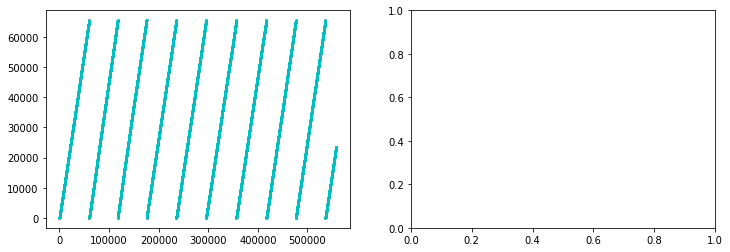

In [30]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
axes[0].scatter(range(real_time_Bendi.shape[1]), real_time_Bendi, s=0.2, c='c' )
# axes[1].scatter(real_time_Co60[0, :100000], c='b')
plt.show()

In [35]:
for i in tdb(range(real_time_Bendi.shape[1])):
    if real_time_Bendi[0, i] < 10:
        print(i, end='  ')

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  60051  60052  175646  175647  175648  175649  175650  175651  175652  175653  175654  175655  235712  235713  295675  295676  356693  356694  356695  356696  356697  356698  417286  417287  417288  417289  476585  476586  476587  476588  476589  476590  476591  476592  536242  536243  536244  536245  536246  536247  


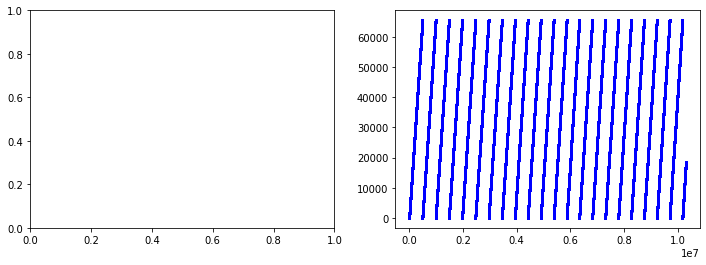

In [36]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 4))
# axes[0].scatter(range(real_time_Bendi.shape[1]), real_time_Bendi, s=0.2, c='c' )
axes[1].scatter(range(real_time_Co60.shape[1]), real_time_Co60, s=0.2, c='b')
plt.show()

In [12]:
start = time.time()
fr1 = open('../Cs137data/Cs137_180s_04.Lis', 'rb')
pulse2, real_time2, time_pulse2 = get_pulse_data(fr1)

end = time.time()
print('time = %0.3fs' % (end - start))
pulse1.shape

N/A% (0 of 20462) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (26 of 20462) |                     | Elapsed Time: 0:00:00 ETA:  00:00:00
  0% (59 of 20462) |                     | Elapsed Time: 0:00:00 ETA:   0:01:09
  0% (90 of 20462) |                     | Elapsed Time: 0:00:00 ETA:   0:01:09
  0% (123 of 20462) |                    | Elapsed Time: 0:00:00 ETA:   0:01:06
  0% (155 of 20462) |                    | Elapsed Time: 0:00:00 ETA:   0:01:05
  0% (186 of 20462) |                    | Elapsed Time: 0:00:00 ETA:   0:01:05
  1% (220 of 20462) |                    | Elapsed Time: 0:00:00 ETA:   0:01:04
  1% (252 of 20462) |                    | Elapsed Time: 0:00:00 ETA:   0:01:05
  1% (288 of 20462) |                    | Elapsed Time: 0:00:00 ETA:   0:01:03
  1% (322 of 20462) |                    | Elapsed Time: 0:00:01 ETA:   0:01:03
  1% (352 of 20462) |                    | Elapsed Time: 0:00:01 ETA:   0:01:04
  1% (383 of 20462) |                   

 15% (3140 of 20462) |##                 | Elapsed Time: 0:00:10 ETA:   0:00:56
 15% (3170 of 20462) |##                 | Elapsed Time: 0:00:10 ETA:   0:00:56
 15% (3202 of 20462) |##                 | Elapsed Time: 0:00:10 ETA:   0:00:55
 15% (3232 of 20462) |###                | Elapsed Time: 0:00:10 ETA:   0:00:56
 15% (3266 of 20462) |###                | Elapsed Time: 0:00:10 ETA:   0:00:55
 16% (3299 of 20462) |###                | Elapsed Time: 0:00:10 ETA:   0:00:55
 16% (3331 of 20462) |###                | Elapsed Time: 0:00:10 ETA:   0:00:55
 16% (3362 of 20462) |###                | Elapsed Time: 0:00:10 ETA:   0:00:55
 16% (3395 of 20462) |###                | Elapsed Time: 0:00:11 ETA:   0:00:54
 16% (3428 of 20462) |###                | Elapsed Time: 0:00:11 ETA:   0:00:54
 16% (3458 of 20462) |###                | Elapsed Time: 0:00:11 ETA:   0:00:54
 17% (3489 of 20462) |###                | Elapsed Time: 0:00:11 ETA:   0:00:54
 17% (3521 of 20462) |###               

 31% (6367 of 20462) |#####              | Elapsed Time: 0:00:20 ETA:   0:00:45
 31% (6402 of 20462) |#####              | Elapsed Time: 0:00:20 ETA:   0:00:44
 31% (6434 of 20462) |#####              | Elapsed Time: 0:00:20 ETA:   0:00:44
 31% (6467 of 20462) |######             | Elapsed Time: 0:00:20 ETA:   0:00:44
 31% (6495 of 20462) |######             | Elapsed Time: 0:00:21 ETA:   0:00:44
 31% (6526 of 20462) |######             | Elapsed Time: 0:00:21 ETA:   0:00:44
 32% (6558 of 20462) |######             | Elapsed Time: 0:00:21 ETA:   0:00:44
 32% (6588 of 20462) |######             | Elapsed Time: 0:00:21 ETA:   0:00:44
 32% (6617 of 20462) |######             | Elapsed Time: 0:00:21 ETA:   0:00:44
 32% (6647 of 20462) |######             | Elapsed Time: 0:00:21 ETA:   0:00:44
 32% (6679 of 20462) |######             | Elapsed Time: 0:00:21 ETA:   0:00:44
 32% (6713 of 20462) |######             | Elapsed Time: 0:00:21 ETA:   0:00:44
 32% (6735 of 20462) |######            

 46% (9584 of 20462) |########           | Elapsed Time: 0:00:30 ETA:   0:00:34
 46% (9617 of 20462) |########           | Elapsed Time: 0:00:31 ETA:   0:00:34
 47% (9648 of 20462) |########           | Elapsed Time: 0:00:31 ETA:   0:00:34
 47% (9680 of 20462) |########           | Elapsed Time: 0:00:31 ETA:   0:00:34
 47% (9714 of 20462) |#########          | Elapsed Time: 0:00:31 ETA:   0:00:34
 47% (9745 of 20462) |#########          | Elapsed Time: 0:00:31 ETA:   0:00:34
 47% (9780 of 20462) |#########          | Elapsed Time: 0:00:31 ETA:   0:00:33
 47% (9812 of 20462) |#########          | Elapsed Time: 0:00:31 ETA:   0:00:33
 48% (9843 of 20462) |#########          | Elapsed Time: 0:00:31 ETA:   0:00:33
 48% (9874 of 20462) |#########          | Elapsed Time: 0:00:31 ETA:   0:00:33
 48% (9907 of 20462) |#########          | Elapsed Time: 0:00:31 ETA:   0:00:33
 48% (9940 of 20462) |#########          | Elapsed Time: 0:00:32 ETA:   0:00:33
 48% (9971 of 20462) |#########         

 62% (12787 of 20462) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:24
 62% (12817 of 20462) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:24
 62% (12849 of 20462) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:24
 62% (12882 of 20462) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:23
 63% (12911 of 20462) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:23
 63% (12943 of 20462) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:23
 63% (12978 of 20462) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:23
 63% (13010 of 20462) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:23
 63% (13043 of 20462) |###########       | Elapsed Time: 0:00:42 ETA:   0:00:23
 63% (13075 of 20462) |###########       | Elapsed Time: 0:00:42 ETA:   0:00:23
 64% (13106 of 20462) |###########       | Elapsed Time: 0:00:42 ETA:   0:00:23
 64% (13142 of 20462) |###########       | Elapsed Time: 0:00:42 ETA:   0:00:23
 64% (13171 of 20462) |###########      

 78% (16093 of 20462) |##############    | Elapsed Time: 0:00:51 ETA:   0:00:13
 78% (16127 of 20462) |##############    | Elapsed Time: 0:00:51 ETA:   0:00:13
 78% (16162 of 20462) |##############    | Elapsed Time: 0:00:51 ETA:   0:00:13
 79% (16192 of 20462) |##############    | Elapsed Time: 0:00:51 ETA:   0:00:13
 79% (16224 of 20462) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:13
 79% (16257 of 20462) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:12
 79% (16290 of 20462) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:12
 79% (16318 of 20462) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:12
 79% (16350 of 20462) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:12
 80% (16385 of 20462) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:12
 80% (16417 of 20462) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:12
 80% (16449 of 20462) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:12
 80% (16482 of 20462) |##############   

 94% (19416 of 20462) |################# | Elapsed Time: 0:01:02 ETA:   0:00:03
 95% (19449 of 20462) |################# | Elapsed Time: 0:01:02 ETA:   0:00:03
 95% (19481 of 20462) |################# | Elapsed Time: 0:01:02 ETA:   0:00:03
 95% (19512 of 20462) |################# | Elapsed Time: 0:01:02 ETA:   0:00:03
 95% (19542 of 20462) |################# | Elapsed Time: 0:01:02 ETA:   0:00:02
 95% (19576 of 20462) |################# | Elapsed Time: 0:01:02 ETA:   0:00:02
 95% (19603 of 20462) |################# | Elapsed Time: 0:01:02 ETA:   0:00:02
 95% (19634 of 20462) |################# | Elapsed Time: 0:01:02 ETA:   0:00:02
 96% (19662 of 20462) |################# | Elapsed Time: 0:01:02 ETA:   0:00:02
 96% (19685 of 20462) |################# | Elapsed Time: 0:01:02 ETA:   0:00:02
 96% (19714 of 20462) |################# | Elapsed Time: 0:01:03 ETA:   0:00:02
 96% (19747 of 20462) |################# | Elapsed Time: 0:01:03 ETA:   0:00:02
 96% (19780 of 20462) |#################

time = 66.343s


(1, 858256)

In [13]:
start = time.time()
fr1 = open('../Cs137data/Cs137_180s_05.Lis', 'rb')
pulse3, real_time3, time_pulse3 = get_pulse_data(fr1)

end = time.time()
print('time = %0.3fs' % (end - start))
pulse1.shape

N/A% (0 of 20462) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (26 of 20462) |                     | Elapsed Time: 0:00:00 ETA:  00:00:00
  0% (58 of 20462) |                     | Elapsed Time: 0:00:00 ETA:   0:01:11
  0% (90 of 20462) |                     | Elapsed Time: 0:00:00 ETA:   0:01:11
  0% (121 of 20462) |                    | Elapsed Time: 0:00:00 ETA:   0:01:07
  0% (154 of 20462) |                    | Elapsed Time: 0:00:00 ETA:   0:01:07
  0% (186 of 20462) |                    | Elapsed Time: 0:00:00 ETA:   0:01:05
  1% (220 of 20462) |                    | Elapsed Time: 0:00:00 ETA:   0:01:04
  1% (253 of 20462) |                    | Elapsed Time: 0:00:00 ETA:   0:01:04
  1% (288 of 20462) |                    | Elapsed Time: 0:00:00 ETA:   0:01:03
  1% (321 of 20462) |                    | Elapsed Time: 0:00:01 ETA:   0:01:03
  1% (355 of 20462) |                    | Elapsed Time: 0:00:01 ETA:   0:01:03
  1% (389 of 20462) |                   

 15% (3229 of 20462) |##                 | Elapsed Time: 0:00:10 ETA:   0:00:54
 15% (3262 of 20462) |###                | Elapsed Time: 0:00:10 ETA:   0:00:54
 16% (3296 of 20462) |###                | Elapsed Time: 0:00:10 ETA:   0:00:54
 16% (3329 of 20462) |###                | Elapsed Time: 0:00:10 ETA:   0:00:54
 16% (3359 of 20462) |###                | Elapsed Time: 0:00:10 ETA:   0:00:54
 16% (3392 of 20462) |###                | Elapsed Time: 0:00:10 ETA:   0:00:53
 16% (3427 of 20462) |###                | Elapsed Time: 0:00:10 ETA:   0:00:53
 16% (3457 of 20462) |###                | Elapsed Time: 0:00:11 ETA:   0:00:53
 17% (3490 of 20462) |###                | Elapsed Time: 0:00:11 ETA:   0:00:53
 17% (3523 of 20462) |###                | Elapsed Time: 0:00:11 ETA:   0:00:53
 17% (3555 of 20462) |###                | Elapsed Time: 0:00:11 ETA:   0:00:53
 17% (3588 of 20462) |###                | Elapsed Time: 0:00:11 ETA:   0:00:52
 17% (3621 of 20462) |###               

 32% (6571 of 20462) |######             | Elapsed Time: 0:00:20 ETA:   0:00:43
 32% (6603 of 20462) |######             | Elapsed Time: 0:00:20 ETA:   0:00:43
 32% (6634 of 20462) |######             | Elapsed Time: 0:00:20 ETA:   0:00:43
 32% (6668 of 20462) |######             | Elapsed Time: 0:00:21 ETA:   0:00:43
 32% (6702 of 20462) |######             | Elapsed Time: 0:00:21 ETA:   0:00:43
 32% (6735 of 20462) |######             | Elapsed Time: 0:00:21 ETA:   0:00:42
 33% (6767 of 20462) |######             | Elapsed Time: 0:00:21 ETA:   0:00:42
 33% (6801 of 20462) |######             | Elapsed Time: 0:00:21 ETA:   0:00:42
 33% (6832 of 20462) |######             | Elapsed Time: 0:00:21 ETA:   0:00:42
 33% (6862 of 20462) |######             | Elapsed Time: 0:00:21 ETA:   0:00:42
 33% (6898 of 20462) |######             | Elapsed Time: 0:00:21 ETA:   0:00:42
 33% (6932 of 20462) |######             | Elapsed Time: 0:00:21 ETA:   0:00:42
 34% (6965 of 20462) |######            

 48% (9843 of 20462) |#########          | Elapsed Time: 0:00:31 ETA:   0:00:32
 48% (9872 of 20462) |#########          | Elapsed Time: 0:00:31 ETA:   0:00:32
 48% (9903 of 20462) |#########          | Elapsed Time: 0:00:31 ETA:   0:00:32
 48% (9935 of 20462) |#########          | Elapsed Time: 0:00:31 ETA:   0:00:33
 48% (9967 of 20462) |#########          | Elapsed Time: 0:00:31 ETA:   0:00:33
 48% (9997 of 20462) |#########          | Elapsed Time: 0:00:31 ETA:   0:00:33
 49% (10029 of 20462) |########          | Elapsed Time: 0:00:31 ETA:   0:00:32
 49% (10061 of 20462) |########          | Elapsed Time: 0:00:31 ETA:   0:00:32
 49% (10091 of 20462) |########          | Elapsed Time: 0:00:31 ETA:   0:00:32
 49% (10121 of 20462) |########          | Elapsed Time: 0:00:32 ETA:   0:00:32
 49% (10154 of 20462) |########          | Elapsed Time: 0:00:32 ETA:   0:00:32
 49% (10191 of 20462) |########          | Elapsed Time: 0:00:32 ETA:   0:00:32
 49% (10224 of 20462) |########         

 64% (13153 of 20462) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:22
 64% (13184 of 20462) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:22
 64% (13210 of 20462) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:22
 64% (13242 of 20462) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:22
 64% (13278 of 20462) |###########       | Elapsed Time: 0:00:42 ETA:   0:00:22
 65% (13307 of 20462) |###########       | Elapsed Time: 0:00:42 ETA:   0:00:22
 65% (13342 of 20462) |###########       | Elapsed Time: 0:00:42 ETA:   0:00:22
 65% (13373 of 20462) |###########       | Elapsed Time: 0:00:42 ETA:   0:00:21
 65% (13407 of 20462) |###########       | Elapsed Time: 0:00:42 ETA:   0:00:21
 65% (13440 of 20462) |###########       | Elapsed Time: 0:00:42 ETA:   0:00:21
 65% (13469 of 20462) |###########       | Elapsed Time: 0:00:42 ETA:   0:00:21
 65% (13501 of 20462) |###########       | Elapsed Time: 0:00:42 ETA:   0:00:21
 66% (13531 of 20462) |###########      

 80% (16450 of 20462) |##############    | Elapsed Time: 0:00:51 ETA:   0:00:12
 80% (16483 of 20462) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:12
 80% (16518 of 20462) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:12
 80% (16553 of 20462) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:11
 81% (16577 of 20462) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:11
 81% (16610 of 20462) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:11
 81% (16644 of 20462) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:11
 81% (16677 of 20462) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:11
 81% (16710 of 20462) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:11
 81% (16743 of 20462) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:11
 81% (16777 of 20462) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:11
 82% (16810 of 20462) |##############    | Elapsed Time: 0:00:53 ETA:   0:00:11
 82% (16836 of 20462) |##############   

 96% (19719 of 20462) |################# | Elapsed Time: 0:01:02 ETA:   0:00:02
 96% (19755 of 20462) |################# | Elapsed Time: 0:01:02 ETA:   0:00:02
 96% (19791 of 20462) |################# | Elapsed Time: 0:01:02 ETA:   0:00:02
 96% (19823 of 20462) |################# | Elapsed Time: 0:01:02 ETA:   0:00:02
 97% (19857 of 20462) |################# | Elapsed Time: 0:01:02 ETA:   0:00:01
 97% (19883 of 20462) |################# | Elapsed Time: 0:01:02 ETA:   0:00:01
 97% (19909 of 20462) |################# | Elapsed Time: 0:01:02 ETA:   0:00:01
 97% (19937 of 20462) |################# | Elapsed Time: 0:01:02 ETA:   0:00:01
 97% (19970 of 20462) |################# | Elapsed Time: 0:01:03 ETA:   0:00:01
 97% (19995 of 20462) |################# | Elapsed Time: 0:01:03 ETA:   0:00:01
 97% (20022 of 20462) |################# | Elapsed Time: 0:01:03 ETA:   0:00:01
 97% (20052 of 20462) |################# | Elapsed Time: 0:01:03 ETA:   0:00:01
 98% (20077 of 20462) |#################

time = 65.568s


(1, 858256)

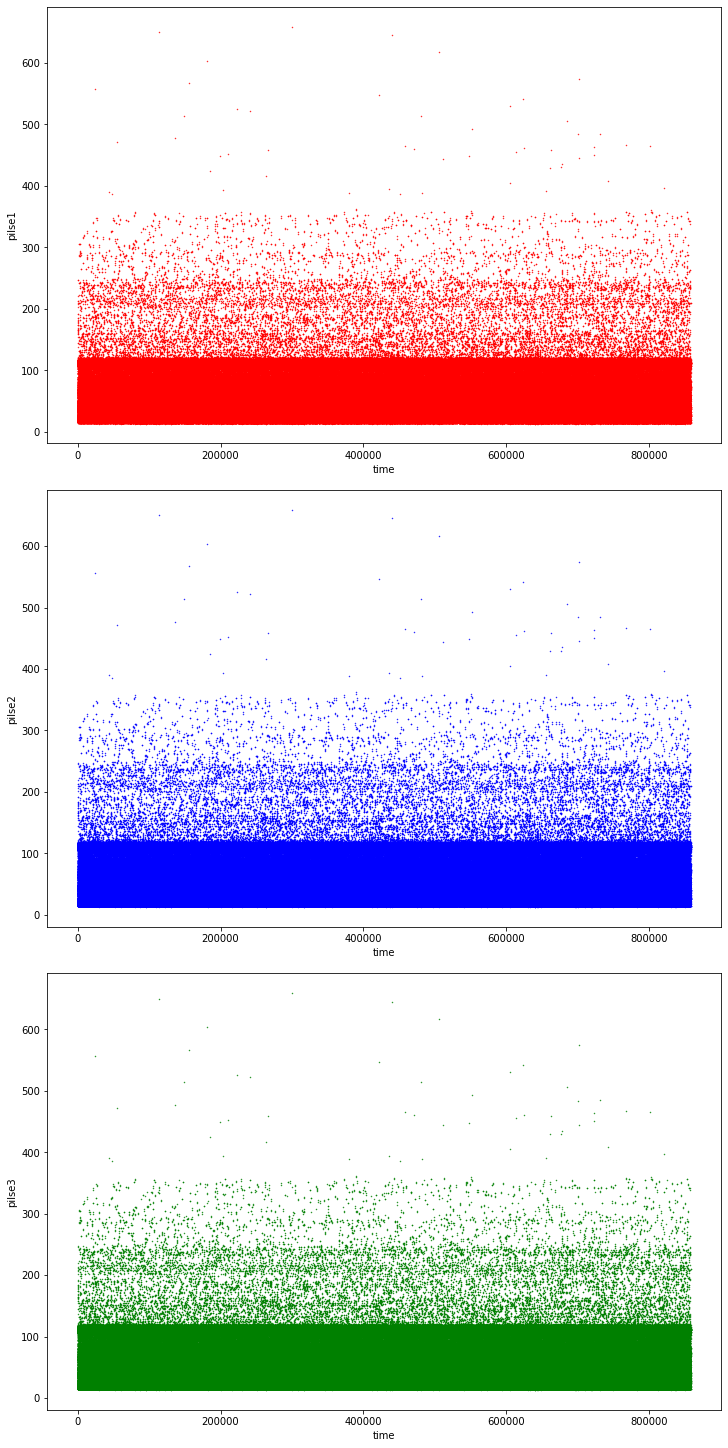

In [25]:
fig, axs = plt.subplots(3, 1, constrained_layout=True, figsize=(10, 20))
axs[0].scatter(range(pulse1.shape[1]), pulse1, s=0.2, c='r')
axs[0].set_xlabel('time')
axs[0].set_ylabel('pilse1')

axs[1].scatter(range(pulse2.shape[1]), pulse2, s=0.2, c='b')
axs[1].set_xlabel('time')
axs[1].set_ylabel('pilse2')

axs[2].scatter(range(pulse3.shape[1]), pulse3, s=0.2, c='g')
axs[2].set_xlabel('time')
axs[2].set_ylabel('pilse3')

plt.show()

In [26]:
start = time.time()
fr1 = open('../Cs137data/cs137.Lis', 'rb')
pulse4, real_time4, time_pulse4 = get_pulse_data(fr1)

end = time.time()
print('time = %0.3fs' % (end - start))
pulse5.shape

N/A% (0 of 18846) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
  1% (198 of 18846) |                    | Elapsed Time: 0:00:00 ETA:   0:00:09
  2% (420 of 18846) |                    | Elapsed Time: 0:00:00 ETA:   0:00:09
  3% (638 of 18846) |                    | Elapsed Time: 0:00:00 ETA:   0:00:08
  4% (878 of 18846) |                    | Elapsed Time: 0:00:00 ETA:   0:00:08
  5% (1083 of 18846) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:08
  6% (1193 of 18846) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:08
  7% (1415 of 18846) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:07
  8% (1649 of 18846) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:07
  9% (1880 of 18846) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:07
 11% (2119 of 18846) |##                 | Elapsed Time: 0:00:00 ETA:   0:00:07
 12% (2347 of 18846) |##                 | Elapsed Time: 0:00:01 ETA:   0:00:07
 13% (2574 of 18846) |##                

time = 9.221s


(1, 858256)

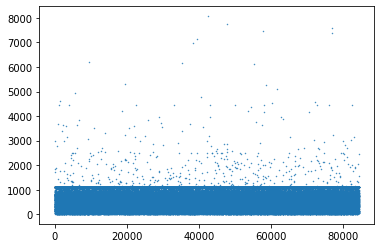

In [29]:
plt.scatter(range(pulse4.shape[1]), pulse4, s=0.2)
plt.show()

In [30]:
start = time.time()
fr1 = open('../Cs137data/co60.Lis', 'rb')
pulse5, real_time5, time_pulse5 = get_pulse_data(fr1)

end = time.time()
print('time = %0.3fs' % (end - start))
pulse5.shape

N/A% (0 of 19777) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
  1% (216 of 19777) |                    | Elapsed Time: 0:00:00 ETA:   0:00:09
  2% (422 of 19777) |                    | Elapsed Time: 0:00:00 ETA:   0:00:09
  3% (635 of 19777) |                    | Elapsed Time: 0:00:00 ETA:   0:00:09
  3% (752 of 19777) |                    | Elapsed Time: 0:00:00 ETA:   0:00:09
  4% (965 of 19777) |                    | Elapsed Time: 0:00:00 ETA:   0:00:08
  5% (1180 of 19777) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:08
  7% (1397 of 19777) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:08
  8% (1613 of 19777) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:08
  8% (1753 of 19777) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:08
  9% (1965 of 19777) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:08
 11% (2188 of 19777) |##                 | Elapsed Time: 0:00:01 ETA:   0:00:08
 12% (2385 of 19777) |##                

 89% (17613 of 19777) |################  | Elapsed Time: 0:00:09 ETA:   0:00:01
 89% (17775 of 19777) |################  | Elapsed Time: 0:00:09 ETA:   0:00:01
 90% (17973 of 19777) |################  | Elapsed Time: 0:00:09 ETA:   0:00:01
 91% (18138 of 19777) |################  | Elapsed Time: 0:00:09 ETA:   0:00:00
 92% (18275 of 19777) |################  | Elapsed Time: 0:00:09 ETA:   0:00:00
 93% (18456 of 19777) |################  | Elapsed Time: 0:00:09 ETA:   0:00:00
 94% (18633 of 19777) |################  | Elapsed Time: 0:00:09 ETA:   0:00:00
 94% (18776 of 19777) |################# | Elapsed Time: 0:00:10 ETA:   0:00:00
 95% (18934 of 19777) |################# | Elapsed Time: 0:00:10 ETA:   0:00:00
 96% (19138 of 19777) |################# | Elapsed Time: 0:00:10 ETA:   0:00:00
 97% (19277 of 19777) |################# | Elapsed Time: 0:00:10 ETA:   0:00:00
 98% (19437 of 19777) |################# | Elapsed Time: 0:00:10 ETA:   0:00:00
 99% (19633 of 19777) |#################

time = 10.937s


(1, 95885)

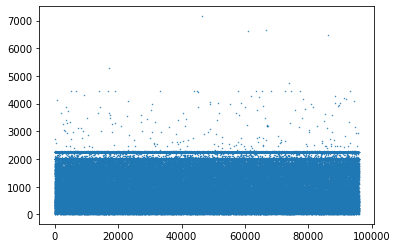

In [32]:
plt.scatter(range(pulse5.shape[1]), pulse5, s=0.2)
plt.show()

In [37]:
Tmax = [36.57, 31.84, 10.18, 54.59, 30.57, 48.99, 32.10, 23.65, 24.55, 25.35]
Tmin = [12.85, 23.16, 11.94, 21.15, 8.13, 18.6, 13.79, 11.44, 14.14, 12.98]

In [39]:
Tmax = np.array(Tmax)
Tmin = np.array(Tmin)
Tmax, Tmin

(array([36.57, 31.84, 10.18, 54.59, 30.57, 48.99, 32.1 , 23.65, 24.55,
        25.35]),
 array([12.85, 23.16, 11.94, 21.15,  8.13, 18.6 , 13.79, 11.44, 14.14,
        12.98]))

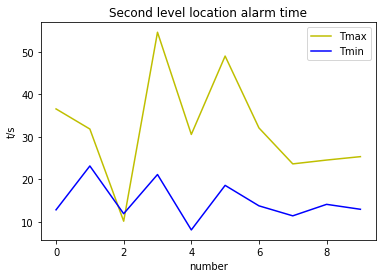

In [44]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(Tmax, c='y')
ax.plot(Tmin, c='b')
ax.set_xlabel('number')
ax.set_ylabel('t/s')
plt.legend(('Tmax', 'Tmin'),loc='upper right')

plt.title('Second level location alarm time')
plt.show()

In [58]:
fr = open('../Cs137data/lis/Go60-180s-001.lis', 'rb')
pulse, real_time, time_pulse = get_pulse_data(fr)
pulse.shape

N/A% (0 of 13538) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
  3% (515 of 13538) |                    | Elapsed Time: 0:00:00 ETA:  00:00:00
  6% (857 of 13538) |#                   | Elapsed Time: 0:00:00 ETA:   0:00:01
  8% (1200 of 13538) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:01
 10% (1371 of 13538) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:02
 11% (1540 of 13538) |##                 | Elapsed Time: 0:00:00 ETA:   0:00:02
 12% (1714 of 13538) |##                 | Elapsed Time: 0:00:00 ETA:   0:00:02
 13% (1886 of 13538) |##                 | Elapsed Time: 0:00:00 ETA:   0:00:02
 16% (2228 of 13538) |###                | Elapsed Time: 0:00:00 ETA:   0:00:02
 17% (2326 of 13538) |###                | Elapsed Time: 0:00:00 ETA:   0:00:03
 17% (2394 of 13538) |###                | Elapsed Time: 0:00:00 ETA:   0:00:03
 18% (2465 of 13538) |###                | Elapsed Time: 0:00:00 ETA:   0:00:03
 18% (2528 of 13538) |###               

100% (13538 of 13538) |##################| Elapsed Time: 0:00:08 Time:  0:00:08


(1, 98965)

In [59]:
fr = open('../Cs137data/lis/Cs137-180s-001.lis', 'rb')
pulse01, real_time01, time_pulse01 = get_pulse_data(fr)
pulse01.shape

N/A% (0 of 13538) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
  3% (515 of 13538) |                    | Elapsed Time: 0:00:00 ETA:  00:00:00
  6% (857 of 13538) |#                   | Elapsed Time: 0:00:00 ETA:   0:00:01
  8% (1200 of 13538) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:01
 10% (1371 of 13538) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:01
 11% (1540 of 13538) |##                 | Elapsed Time: 0:00:00 ETA:   0:00:02
 12% (1714 of 13538) |##                 | Elapsed Time: 0:00:00 ETA:   0:00:02
 13% (1886 of 13538) |##                 | Elapsed Time: 0:00:00 ETA:   0:00:02
 16% (2228 of 13538) |###                | Elapsed Time: 0:00:00 ETA:   0:00:02
 17% (2325 of 13538) |###                | Elapsed Time: 0:00:00 ETA:   0:00:02
 17% (2392 of 13538) |###                | Elapsed Time: 0:00:00 ETA:   0:00:03
 18% (2463 of 13538) |###                | Elapsed Time: 0:00:00 ETA:   0:00:03
 18% (2526 of 13538) |###               

100% (13538 of 13538) |##################| Elapsed Time: 0:00:09 Time:  0:00:09


(1, 98965)

In [11]:
for i in range(200):
    print(pulse[0][i], end='\t')


226	141	135	157	304	221	202	216	137	155	162	135	138	137	111	308	193	176	141	156	150	196	250	159	151	177	118	148	146	155	175	230	129	224	124	166	213	154	152	149	194	168	198	233	205	149	206	210	184	175	154	180	142	129	186	197	138	198	215	153	273	203	152	130	129	174	191	198	225	273	261	159	208	159	137	142	197	267	206	147	131	124	178	137	142	168	145	136	213	204	108	143	146	144	122	150	206	167	146	141	147	131	237	145	185	124	139	129	136	131	136	164	144	143	183	169	154	194	130	175	130	125	147	129	137	125	152	154	245	230	173	184	183	182	188	190	150	183	122	127	159	164	134	141	125	192	143	151	124	143	116	183	144	123	193	146	143	145	129	166	214	131	140	167	173	124	155	154	220	139	180	138	126	182	186	181	143	121	132	148	175	181	136	155	161	131	166	120	127	142	169	154	150	131	164	175	202	154	159	144	

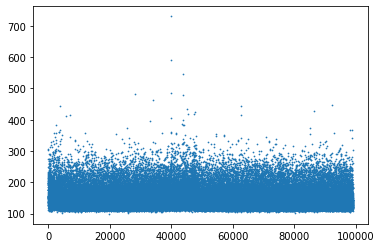

In [14]:
plt.scatter(range(pulse.shape[1]), pulse, s=0.5)
plt.show()

In [19]:
pulse.max(), pulse.min(), pulse.max() - pulse.min()

(731, 99, 632)

In [18]:
array1 = np.array(pulse)
array1

array([[226, 141, 135, ..., 135, 181, 143]], dtype=uint16)

In [54]:
array1[0, :100].shape, array1

((100,), array([[226, 141, 135, ..., 135, 181, 143]], dtype=uint16))

In [49]:
np.where((array1 > 98) & (array1 < 104)==True)

(array([0, 0, 0, 0], dtype=int64),
 array([ 4449, 19792, 26026, 80235], dtype=int64))

In [43]:
n1 = array1 > 98 
n2 = array1 < 104
n1, n2

(array([[ True,  True,  True, ...,  True,  True,  True]]),
 array([[False, False, False, ..., False, False, False]]))

In [46]:
n1 & n2

array([[False, False, False, ..., False, False, False]])

In [50]:
index1 = np.where(n1 & n2 == True)
index1

(array([0, 0, 0, 0], dtype=int64),
 array([ 4449, 19792, 26026, 80235], dtype=int64))

In [51]:
array1[index1] = (104 + 98)/2

In [53]:
array1[0, : 100]

array([226, 141, 135, 157, 304, 221, 202, 216, 137, 155, 162, 135, 138,
       137, 111, 308, 193, 176, 141, 156, 150, 196, 250, 159, 151, 177,
       118, 148, 146, 155, 175, 230, 129, 224, 124, 166, 213, 154, 152,
       149, 194, 168, 198, 233, 205, 149, 206, 210, 184, 175, 154, 180,
       142, 129, 186, 197, 138, 198, 215, 153, 273, 203, 152, 130, 129,
       174, 191, 198, 225, 273, 261, 159, 208, 159, 137, 142, 197, 267,
       206, 147, 131, 124, 178, 137, 142, 168, 145, 136, 213, 204, 108,
       143, 146, 144, 122, 150, 206, 167, 146, 141], dtype=uint16)

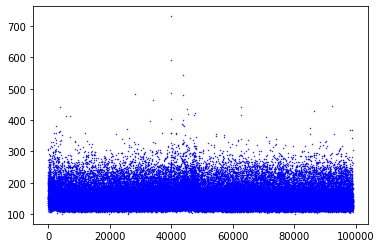

In [61]:
plt.scatter(range(array1.shape[1]), array1, s=0.2, c='b')
plt.show()

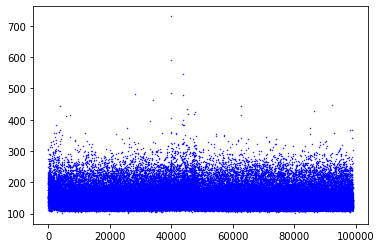

In [62]:
plt.scatter(range(pulse01.shape[1]), pulse01, s=0.2, c='b')
plt.show()

In [63]:
fr = open('../Cs137data/co60.Lis', 'rb')
pulse_1, real_1, real_pulse_1 = get_pulse_data(fr)
pulse_1.shape, pulse_1

N/A% (0 of 19777) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
  1% (205 of 19777) |                    | Elapsed Time: 0:00:00 ETA:   0:00:09
  2% (407 of 19777) |                    | Elapsed Time: 0:00:00 ETA:   0:00:09
  3% (621 of 19777) |                    | Elapsed Time: 0:00:00 ETA:   0:00:09
  3% (752 of 19777) |                    | Elapsed Time: 0:00:00 ETA:   0:00:09
  4% (969 of 19777) |                    | Elapsed Time: 0:00:00 ETA:   0:00:09
  5% (1184 of 19777) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:08
  7% (1401 of 19777) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:08
  8% (1617 of 19777) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:08
  8% (1753 of 19777) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:08
  9% (1962 of 19777) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:08
 11% (2179 of 19777) |##                 | Elapsed Time: 0:00:01 ETA:   0:00:08
 12% (2375 of 19777) |##                

 96% (19026 of 19777) |################# | Elapsed Time: 0:00:09 ETA:   0:00:00
 97% (19225 of 19777) |################# | Elapsed Time: 0:00:09 ETA:   0:00:00
 98% (19435 of 19777) |################# | Elapsed Time: 0:00:09 ETA:   0:00:00
 99% (19638 of 19777) |################# | Elapsed Time: 0:00:09 ETA:   0:00:00
100% (19777 of 19777) |##################| Elapsed Time: 0:00:09 Time:  0:00:09


((1, 95885), array([[1993,  341,  186, ..., 1993,  230, 1612]], dtype=uint16))

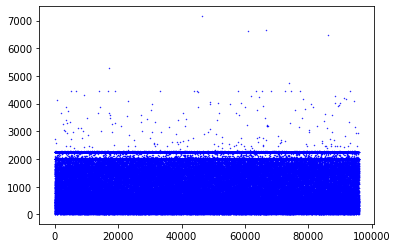

In [64]:
plt.scatter(range(pulse_1.shape[1]), pulse_1, s=0.2, c='b')
plt.show()

In [65]:
fr = open('../Cs137data/lis/Cs137-180s-000.lis', 'rb')
pulse_1, real_1, real_pulse_1 = get_pulse_data(fr)
pulse_1.shape, pulse_1

N/A% (0 of 13538) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
  3% (515 of 13538) |                    | Elapsed Time: 0:00:00 ETA:  00:00:00
  6% (857 of 13538) |#                   | Elapsed Time: 0:00:00 ETA:   0:00:01
  8% (1200 of 13538) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:01
 10% (1465 of 13538) |##                 | Elapsed Time: 0:00:00 ETA:   0:00:02
 11% (1543 of 13538) |##                 | Elapsed Time: 0:00:00 ETA:   0:00:02
 12% (1714 of 13538) |##                 | Elapsed Time: 0:00:00 ETA:   0:00:02
 13% (1886 of 13538) |##                 | Elapsed Time: 0:00:00 ETA:   0:00:02
 16% (2228 of 13538) |###                | Elapsed Time: 0:00:00 ETA:   0:00:02
 17% (2321 of 13538) |###                | Elapsed Time: 0:00:00 ETA:   0:00:03
 17% (2388 of 13538) |###                | Elapsed Time: 0:00:00 ETA:   0:00:03
 18% (2457 of 13538) |###                | Elapsed Time: 0:00:00 ETA:   0:00:03
 18% (2520 of 13538) |###               

 98% (13367 of 13538) |################# | Elapsed Time: 0:00:08 ETA:   0:00:00
 99% (13431 of 13538) |################# | Elapsed Time: 0:00:08 ETA:   0:00:00
 99% (13494 of 13538) |################# | Elapsed Time: 0:00:09 ETA:   0:00:00
100% (13538 of 13538) |##################| Elapsed Time: 0:00:09 Time:  0:00:09


((1, 98965), array([[226, 141, 135, ..., 135, 181, 143]], dtype=uint16))

In [66]:
fr = open('../Cs137data/lis/Go60-180s-000.lis', 'rb')
pulse_2, real_2, real_pulse_2 = get_pulse_data(fr)
pulse_2.shape, pulse_2

N/A% (0 of 13538) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
  3% (515 of 13538) |                    | Elapsed Time: 0:00:00 ETA:  00:00:00
  6% (857 of 13538) |#                   | Elapsed Time: 0:00:00 ETA:   0:00:01
  8% (1200 of 13538) |#                  | Elapsed Time: 0:00:00 ETA:   0:00:01
 10% (1465 of 13538) |##                 | Elapsed Time: 0:00:00 ETA:   0:00:02
 11% (1543 of 13538) |##                 | Elapsed Time: 0:00:00 ETA:   0:00:02
 12% (1714 of 13538) |##                 | Elapsed Time: 0:00:00 ETA:   0:00:02
 13% (1886 of 13538) |##                 | Elapsed Time: 0:00:00 ETA:   0:00:02
 16% (2228 of 13538) |###                | Elapsed Time: 0:00:00 ETA:   0:00:02
 17% (2320 of 13538) |###                | Elapsed Time: 0:00:00 ETA:   0:00:03
 17% (2387 of 13538) |###                | Elapsed Time: 0:00:00 ETA:   0:00:03
 18% (2454 of 13538) |###                | Elapsed Time: 0:00:00 ETA:   0:00:03
 18% (2517 of 13538) |###               

 98% (13367 of 13538) |################# | Elapsed Time: 0:00:08 ETA:   0:00:00
 99% (13433 of 13538) |################# | Elapsed Time: 0:00:08 ETA:   0:00:00
 99% (13495 of 13538) |################# | Elapsed Time: 0:00:08 ETA:   0:00:00
100% (13538 of 13538) |##################| Elapsed Time: 0:00:08 Time:  0:00:08


((1, 98965), array([[226, 141, 135, ..., 135, 181, 143]], dtype=uint16))

In [67]:
pulse_1, pulse_2

(array([[226, 141, 135, ..., 135, 181, 143]], dtype=uint16),
 array([[226, 141, 135, ..., 135, 181, 143]], dtype=uint16))

In [3]:
start = time.time()
fr = open('../Cs137data/lis/Cs-180s-000.Lis', 'rb')
pulse_s01, realtime_s01, realpulse_s01 = get_pulse_data(fr)
end = time.time()
pulse_s01.shape

(1, 1793377)

In [5]:
print('time = %0.3fs' % (end - start))

time = 117.743s


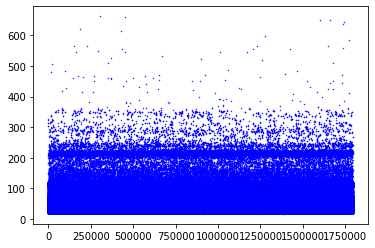

In [6]:
plt.scatter(range(pulse_s01.shape[1]), pulse_s01, s=0.2, c='b')
plt.show()

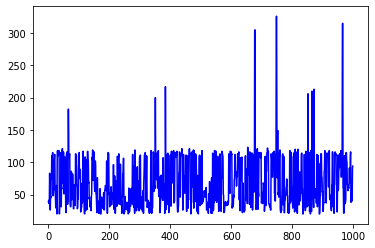

In [8]:
plt.plot(pulse_s01[0, :1000], c='b')
plt.show()

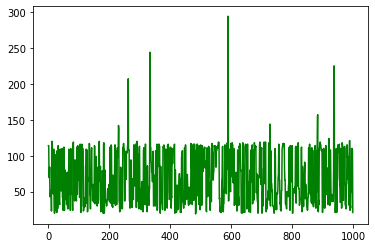

In [9]:
plt.plot(pulse_s01[0, 1000: 2000], c='g')
plt.show()

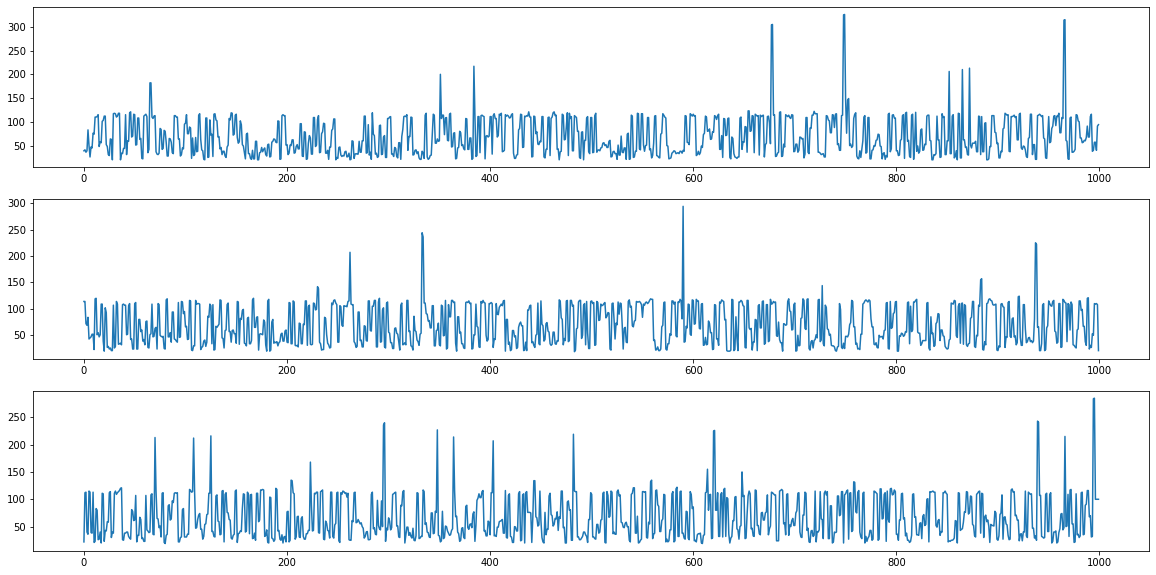

In [16]:
fig, axes = plt.subplots(3, 1, figsize=(20, 10))
for i in range(3):
    axes[i].plot(pulse_s01[0, i * 1000: i*1000 + 1000])
plt.show()

In [17]:
from collections import Counter

In [21]:
??Counter()

Object `Counter()` not found.


In [24]:
df = pd.DataFrame(pulse_s01)

In [25]:
df

0        1        2        3        4        5        6        7        \
0       39       41       36       39       83       50       26       47   

   8        9        ...  1793367  1793368  1793369  1793370  1793371  \
0       45       76  ...       46       33      109      109       21   

   1793372  1793373  1793374  1793375  1793376  
0       22       68       71       35       34  

[1 rows x 1793377 columns]

In [31]:
df.mean(axis=1)

0    68.569026
dtype: float64

In [39]:
df.cumsum(axis=0)

0        1        2        3        4        5        6        7        \
0       39       41       36       39       83       50       26       47   

   8        9        ...  1793367  1793368  1793369  1793370  1793371  \
0       45       76  ...       46       33      109      109       21   

   1793372  1793373  1793374  1793375  1793376  
0       22       68       71       35       34  

[1 rows x 1793377 columns]

In [ ]:
dataSet3 = np.zeros()
for i in range(pulse_s01.shape[1]):
    

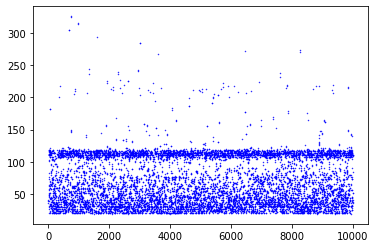

In [40]:
plt.scatter(range(10000), pulse_s01[0, :10000], s=0.2, c='b')
plt.show()

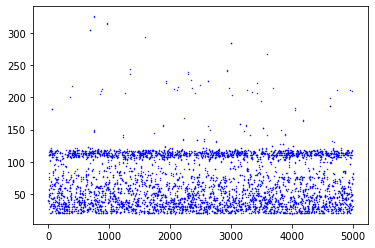

In [41]:
plt.scatter(range(5000), pulse_s01[0, :5000], s=0.2, c='b')
plt.show()

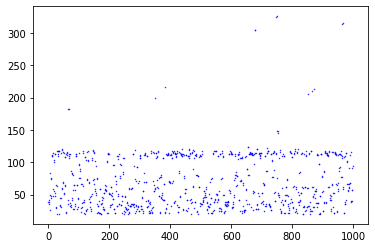

In [44]:
plt.scatter(range(1000), pulse_s01[0, :1000], s=0.2, c='b')
plt.show()

In [45]:
num = int(pulse_s01.shape[1]/5000)
num
    

358

In [48]:
dataSet3 = np.zeros((num, 5000))
dataSet3.shape

(358, 5000)

In [59]:
num0 = 0
for i in range(num):
    dataSet3[i, :] = pulse_s01[0, i*5000: i*5000 + 5000]
    
dataSet3[0, :]

array([39., 41., 36., ..., 81., 82., 32.])

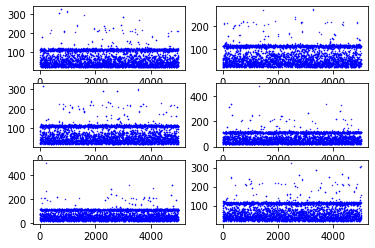

In [71]:
plt.subplot(321)
x = range(5000)
z = 'b'
plt.scatter(x, dataSet3[0, :], s=0.2, c=z)

plt.subplot(322)
plt.scatter(x, dataSet3[1, :], s=0.2, c=z)

verts = np.array([[-1, -1], [1, -1], [1, 1], [-1, -1]])
plt.subplot(323)
plt.scatter(x, dataSet3[2, :], s=0.2, c=z)

plt.subplot(324)
plt.scatter(x, dataSet3[3, :], s=0.2, c=z)

plt.subplot(325)
plt.scatter(x, dataSet3[4, :], s=0.2, c=z)

plt.subplot(326)
plt.scatter(x, dataSet3[5, :], s=0.2, c=z)

plt.show()

In [173]:
start = time.time()
fr = open('../Cs137data/lis/Cs137-10min-01.Lis', 'rb')
pulse_Cs_10min, rgo1, repgo1 = get_pulse_data(fr)
end = time.time()
print('time is : % 0.3fs' % (end - start))
pulse_Cs_10min.shape

N/A% (0 of 78073) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (14 of 78073) |                     | Elapsed Time: 0:00:00 ETA:   0:10:28
  0% (32 of 78073) |                     | Elapsed Time: 0:00:00 ETA:   0:08:47
  0% (52 of 78073) |                     | Elapsed Time: 0:00:00 ETA:   0:07:57
  0% (70 of 78073) |                     | Elapsed Time: 0:00:00 ETA:   0:07:46
  0% (89 of 78073) |                     | Elapsed Time: 0:00:00 ETA:   0:07:36
  0% (108 of 78073) |                    | Elapsed Time: 0:00:00 ETA:   0:07:29
  0% (127 of 78073) |                    | Elapsed Time: 0:00:00 ETA:   0:07:25
  0% (144 of 78073) |                    | Elapsed Time: 0:00:00 ETA:   0:07:27
  0% (162 of 78073) |                    | Elapsed Time: 0:00:00 ETA:   0:07:27
  0% (180 of 78073) |                    | Elapsed Time: 0:00:01 ETA:   0:07:25
  0% (199 of 78073) |                    | Elapsed Time: 0:00:01 ETA:   0:07:22
  0% (216 of 78073) |                   

  2% (1838 of 78073) |                   | Elapsed Time: 0:00:10 ETA:   0:07:20
  2% (1856 of 78073) |                   | Elapsed Time: 0:00:10 ETA:   0:07:21
  2% (1873 of 78073) |                   | Elapsed Time: 0:00:10 ETA:   0:07:22
  2% (1890 of 78073) |                   | Elapsed Time: 0:00:10 ETA:   0:07:24
  2% (1908 of 78073) |                   | Elapsed Time: 0:00:10 ETA:   0:07:25
  2% (1925 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:07:28
  2% (1942 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:07:29
  2% (1960 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:07:30
  2% (1977 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:07:30
  2% (1994 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:07:30
  2% (2011 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:07:32
  2% (2028 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:07:34
  2% (2046 of 78073) |                  

  4% (3758 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:46
  4% (3778 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:45
  4% (3796 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:44
  4% (3815 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:45
  4% (3834 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:45
  4% (3853 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:45
  4% (3870 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:46
  4% (3888 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:46
  5% (3907 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:45
  5% (3928 of 78073) |                   | Elapsed Time: 0:00:22 ETA:   0:06:44
  5% (3948 of 78073) |                   | Elapsed Time: 0:00:22 ETA:   0:06:44
  5% (3967 of 78073) |                   | Elapsed Time: 0:00:22 ETA:   0:06:43
  5% (3986 of 78073) |                  

  7% (5682 of 78073) |#                  | Elapsed Time: 0:00:31 ETA:   0:06:40
  7% (5701 of 78073) |#                  | Elapsed Time: 0:00:31 ETA:   0:06:39
  7% (5719 of 78073) |#                  | Elapsed Time: 0:00:31 ETA:   0:06:40
  7% (5740 of 78073) |#                  | Elapsed Time: 0:00:31 ETA:   0:06:38
  7% (5759 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:06:38
  7% (5778 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:06:38
  7% (5797 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:06:37
  7% (5817 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:06:37
  7% (5836 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:06:37
  7% (5856 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:06:36
  7% (5876 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:06:33
  7% (5895 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:06:33
  7% (5913 of 78073) |#                 

  9% (7620 of 78073) |#                  | Elapsed Time: 0:00:42 ETA:   0:06:25
  9% (7639 of 78073) |#                  | Elapsed Time: 0:00:42 ETA:   0:06:23
  9% (7658 of 78073) |#                  | Elapsed Time: 0:00:42 ETA:   0:06:23
  9% (7677 of 78073) |#                  | Elapsed Time: 0:00:42 ETA:   0:06:19
  9% (7697 of 78073) |#                  | Elapsed Time: 0:00:42 ETA:   0:06:21
  9% (7715 of 78073) |#                  | Elapsed Time: 0:00:42 ETA:   0:06:22
  9% (7735 of 78073) |#                  | Elapsed Time: 0:00:42 ETA:   0:06:20
  9% (7754 of 78073) |#                  | Elapsed Time: 0:00:42 ETA:   0:06:19
  9% (7774 of 78073) |#                  | Elapsed Time: 0:00:43 ETA:   0:06:18
  9% (7793 of 78073) |#                  | Elapsed Time: 0:00:43 ETA:   0:06:18
 10% (7813 of 78073) |#                  | Elapsed Time: 0:00:43 ETA:   0:06:17
 10% (7832 of 78073) |#                  | Elapsed Time: 0:00:43 ETA:   0:06:17
 10% (7850 of 78073) |#                 

 12% (9556 of 78073) |##                 | Elapsed Time: 0:00:52 ETA:   0:06:14
 12% (9575 of 78073) |##                 | Elapsed Time: 0:00:52 ETA:   0:06:12
 12% (9593 of 78073) |##                 | Elapsed Time: 0:00:52 ETA:   0:06:11
 12% (9612 of 78073) |##                 | Elapsed Time: 0:00:53 ETA:   0:06:10
 12% (9631 of 78073) |##                 | Elapsed Time: 0:00:53 ETA:   0:06:10
 12% (9650 of 78073) |##                 | Elapsed Time: 0:00:53 ETA:   0:06:10
 12% (9668 of 78073) |##                 | Elapsed Time: 0:00:53 ETA:   0:06:10
 12% (9687 of 78073) |##                 | Elapsed Time: 0:00:53 ETA:   0:06:10
 12% (9706 of 78073) |##                 | Elapsed Time: 0:00:53 ETA:   0:06:08
 12% (9725 of 78073) |##                 | Elapsed Time: 0:00:53 ETA:   0:06:07
 12% (9743 of 78073) |##                 | Elapsed Time: 0:00:53 ETA:   0:06:07
 12% (9762 of 78073) |##                 | Elapsed Time: 0:00:53 ETA:   0:06:09
 12% (9781 of 78073) |##                

 14% (11495 of 78073) |##                | Elapsed Time: 0:01:03 ETA:   0:05:52
 14% (11514 of 78073) |##                | Elapsed Time: 0:01:03 ETA:   0:05:51
 14% (11534 of 78073) |##                | Elapsed Time: 0:01:03 ETA:   0:05:49
 14% (11553 of 78073) |##                | Elapsed Time: 0:01:03 ETA:   0:05:50
 14% (11572 of 78073) |##                | Elapsed Time: 0:01:03 ETA:   0:05:51
 14% (11592 of 78073) |##                | Elapsed Time: 0:01:03 ETA:   0:05:51
 14% (11611 of 78073) |##                | Elapsed Time: 0:01:03 ETA:   0:05:51
 14% (11632 of 78073) |##                | Elapsed Time: 0:01:04 ETA:   0:05:49
 14% (11652 of 78073) |##                | Elapsed Time: 0:01:04 ETA:   0:05:50
 14% (11671 of 78073) |##                | Elapsed Time: 0:01:04 ETA:   0:05:51
 14% (11691 of 78073) |##                | Elapsed Time: 0:01:04 ETA:   0:05:51
 14% (11707 of 78073) |##                | Elapsed Time: 0:01:04 ETA:   0:05:51
 15% (11724 of 78073) |##               

 17% (13446 of 78073) |###               | Elapsed Time: 0:01:13 ETA:   0:05:52
 17% (13466 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:53
 17% (13486 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:54
 17% (13505 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:53
 17% (13524 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:55
 17% (13544 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:51
 17% (13563 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:51
 17% (13581 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:51
 17% (13599 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:51
 17% (13618 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:51
 17% (13636 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:51
 17% (13655 of 78073) |###               | Elapsed Time: 0:01:15 ETA:   0:05:51
 17% (13673 of 78073) |###              

 19% (15393 of 78073) |###               | Elapsed Time: 0:01:24 ETA:   0:05:38
 19% (15413 of 78073) |###               | Elapsed Time: 0:01:24 ETA:   0:05:36
 19% (15432 of 78073) |###               | Elapsed Time: 0:01:24 ETA:   0:05:37
 19% (15450 of 78073) |###               | Elapsed Time: 0:01:24 ETA:   0:05:36
 19% (15469 of 78073) |###               | Elapsed Time: 0:01:24 ETA:   0:05:37
 19% (15489 of 78073) |###               | Elapsed Time: 0:01:25 ETA:   0:05:39
 19% (15509 of 78073) |###               | Elapsed Time: 0:01:25 ETA:   0:05:39
 19% (15529 of 78073) |###               | Elapsed Time: 0:01:25 ETA:   0:05:36
 19% (15548 of 78073) |###               | Elapsed Time: 0:01:25 ETA:   0:05:37
 19% (15567 of 78073) |###               | Elapsed Time: 0:01:25 ETA:   0:05:37
 19% (15586 of 78073) |###               | Elapsed Time: 0:01:25 ETA:   0:05:37
 19% (15605 of 78073) |###               | Elapsed Time: 0:01:25 ETA:   0:05:36
 20% (15624 of 78073) |###              

 22% (17332 of 78073) |###               | Elapsed Time: 0:01:35 ETA:   0:05:35
 22% (17351 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:05:35
 22% (17370 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:05:34
 22% (17391 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:05:31
 22% (17410 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:05:32
 22% (17430 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:05:31
 22% (17449 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:05:31
 22% (17469 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:05:29
 22% (17488 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:05:28
 22% (17508 of 78073) |####              | Elapsed Time: 0:01:36 ETA:   0:05:29
 22% (17527 of 78073) |####              | Elapsed Time: 0:01:36 ETA:   0:05:28
 22% (17547 of 78073) |####              | Elapsed Time: 0:01:36 ETA:   0:05:28
 22% (17567 of 78073) |####             

 24% (19287 of 78073) |####              | Elapsed Time: 0:01:45 ETA:   0:05:17
 24% (19305 of 78073) |####              | Elapsed Time: 0:01:45 ETA:   0:05:18
 24% (19323 of 78073) |####              | Elapsed Time: 0:01:45 ETA:   0:05:18
 24% (19343 of 78073) |####              | Elapsed Time: 0:01:45 ETA:   0:05:17
 24% (19363 of 78073) |####              | Elapsed Time: 0:01:46 ETA:   0:05:16
 24% (19384 of 78073) |####              | Elapsed Time: 0:01:46 ETA:   0:05:14
 24% (19403 of 78073) |####              | Elapsed Time: 0:01:46 ETA:   0:05:15
 24% (19424 of 78073) |####              | Elapsed Time: 0:01:46 ETA:   0:05:13
 24% (19444 of 78073) |####              | Elapsed Time: 0:01:46 ETA:   0:05:13
 24% (19462 of 78073) |####              | Elapsed Time: 0:01:46 ETA:   0:05:13
 24% (19482 of 78073) |####              | Elapsed Time: 0:01:46 ETA:   0:05:12
 24% (19500 of 78073) |####              | Elapsed Time: 0:01:46 ETA:   0:05:12
 25% (19520 of 78073) |####             

 27% (21246 of 78073) |####              | Elapsed Time: 0:01:56 ETA:   0:05:08
 27% (21265 of 78073) |####              | Elapsed Time: 0:01:56 ETA:   0:05:08
 27% (21286 of 78073) |####              | Elapsed Time: 0:01:56 ETA:   0:05:08
 27% (21304 of 78073) |####              | Elapsed Time: 0:01:56 ETA:   0:05:07
 27% (21321 of 78073) |####              | Elapsed Time: 0:01:56 ETA:   0:05:09
 27% (21340 of 78073) |####              | Elapsed Time: 0:01:56 ETA:   0:05:10
 27% (21360 of 78073) |####              | Elapsed Time: 0:01:56 ETA:   0:05:10
 27% (21380 of 78073) |####              | Elapsed Time: 0:01:56 ETA:   0:05:08
 27% (21399 of 78073) |####              | Elapsed Time: 0:01:57 ETA:   0:05:07
 27% (21417 of 78073) |####              | Elapsed Time: 0:01:57 ETA:   0:05:07
 27% (21435 of 78073) |####              | Elapsed Time: 0:01:57 ETA:   0:05:07
 27% (21455 of 78073) |####              | Elapsed Time: 0:01:57 ETA:   0:05:06
 27% (21473 of 78073) |####             

 29% (23159 of 78073) |#####             | Elapsed Time: 0:02:06 ETA:   0:05:13
 29% (23178 of 78073) |#####             | Elapsed Time: 0:02:06 ETA:   0:05:11
 29% (23197 of 78073) |#####             | Elapsed Time: 0:02:07 ETA:   0:05:11
 29% (23214 of 78073) |#####             | Elapsed Time: 0:02:07 ETA:   0:05:13
 29% (23233 of 78073) |#####             | Elapsed Time: 0:02:07 ETA:   0:05:11
 29% (23251 of 78073) |#####             | Elapsed Time: 0:02:07 ETA:   0:05:12
 29% (23269 of 78073) |#####             | Elapsed Time: 0:02:07 ETA:   0:05:12
 29% (23288 of 78073) |#####             | Elapsed Time: 0:02:07 ETA:   0:05:11
 29% (23307 of 78073) |#####             | Elapsed Time: 0:02:07 ETA:   0:05:08
 29% (23325 of 78073) |#####             | Elapsed Time: 0:02:07 ETA:   0:05:07
 29% (23343 of 78073) |#####             | Elapsed Time: 0:02:07 ETA:   0:05:05
 29% (23363 of 78073) |#####             | Elapsed Time: 0:02:07 ETA:   0:05:03
 29% (23381 of 78073) |#####            

 32% (24995 of 78073) |#####             | Elapsed Time: 0:02:17 ETA:   0:04:51
 32% (25014 of 78073) |#####             | Elapsed Time: 0:02:17 ETA:   0:04:52
 32% (25033 of 78073) |#####             | Elapsed Time: 0:02:17 ETA:   0:04:52
 32% (25052 of 78073) |#####             | Elapsed Time: 0:02:17 ETA:   0:04:46
 32% (25072 of 78073) |#####             | Elapsed Time: 0:02:17 ETA:   0:04:45
 32% (25092 of 78073) |#####             | Elapsed Time: 0:02:17 ETA:   0:04:45
 32% (25111 of 78073) |#####             | Elapsed Time: 0:02:17 ETA:   0:04:44
 32% (25129 of 78073) |#####             | Elapsed Time: 0:02:18 ETA:   0:04:45
 32% (25144 of 78073) |#####             | Elapsed Time: 0:02:18 ETA:   0:04:49
 32% (25161 of 78073) |#####             | Elapsed Time: 0:02:18 ETA:   0:04:52
 32% (25179 of 78073) |#####             | Elapsed Time: 0:02:18 ETA:   0:04:52
 32% (25198 of 78073) |#####             | Elapsed Time: 0:02:18 ETA:   0:04:52
 32% (25218 of 78073) |#####            

 34% (26861 of 78073) |######            | Elapsed Time: 0:02:27 ETA:   0:04:51
 34% (26880 of 78073) |######            | Elapsed Time: 0:02:28 ETA:   0:04:51
 34% (26900 of 78073) |######            | Elapsed Time: 0:02:28 ETA:   0:04:50
 34% (26918 of 78073) |######            | Elapsed Time: 0:02:28 ETA:   0:04:50
 34% (26935 of 78073) |######            | Elapsed Time: 0:02:28 ETA:   0:04:49
 34% (26953 of 78073) |######            | Elapsed Time: 0:02:28 ETA:   0:04:49
 34% (26971 of 78073) |######            | Elapsed Time: 0:02:28 ETA:   0:04:50
 34% (26989 of 78073) |######            | Elapsed Time: 0:02:28 ETA:   0:04:51
 34% (27007 of 78073) |######            | Elapsed Time: 0:02:28 ETA:   0:04:51
 34% (27025 of 78073) |######            | Elapsed Time: 0:02:28 ETA:   0:04:51
 34% (27043 of 78073) |######            | Elapsed Time: 0:02:28 ETA:   0:04:52
 34% (27062 of 78073) |######            | Elapsed Time: 0:02:29 ETA:   0:04:51
 34% (27080 of 78073) |######           

 36% (28771 of 78073) |######            | Elapsed Time: 0:02:38 ETA:   0:04:37
 36% (28788 of 78073) |######            | Elapsed Time: 0:02:38 ETA:   0:04:36
 36% (28806 of 78073) |######            | Elapsed Time: 0:02:38 ETA:   0:04:36
 36% (28825 of 78073) |######            | Elapsed Time: 0:02:38 ETA:   0:04:36
 36% (28844 of 78073) |######            | Elapsed Time: 0:02:38 ETA:   0:04:36
 36% (28862 of 78073) |######            | Elapsed Time: 0:02:39 ETA:   0:04:35
 36% (28882 of 78073) |######            | Elapsed Time: 0:02:39 ETA:   0:04:34
 37% (28899 of 78073) |######            | Elapsed Time: 0:02:39 ETA:   0:04:36
 37% (28918 of 78073) |######            | Elapsed Time: 0:02:39 ETA:   0:04:34
 37% (28938 of 78073) |######            | Elapsed Time: 0:02:39 ETA:   0:04:33
 37% (28955 of 78073) |######            | Elapsed Time: 0:02:39 ETA:   0:04:35
 37% (28975 of 78073) |######            | Elapsed Time: 0:02:39 ETA:   0:04:33
 37% (28994 of 78073) |######           

 39% (30655 of 78073) |#######           | Elapsed Time: 0:02:49 ETA:   0:04:31
 39% (30674 of 78073) |#######           | Elapsed Time: 0:02:49 ETA:   0:04:31
 39% (30692 of 78073) |#######           | Elapsed Time: 0:02:49 ETA:   0:04:30
 39% (30708 of 78073) |#######           | Elapsed Time: 0:02:49 ETA:   0:04:31
 39% (30726 of 78073) |#######           | Elapsed Time: 0:02:49 ETA:   0:04:31
 39% (30744 of 78073) |#######           | Elapsed Time: 0:02:49 ETA:   0:04:31
 39% (30762 of 78073) |#######           | Elapsed Time: 0:02:49 ETA:   0:04:31
 39% (30779 of 78073) |#######           | Elapsed Time: 0:02:49 ETA:   0:04:31
 39% (30797 of 78073) |#######           | Elapsed Time: 0:02:49 ETA:   0:04:30
 39% (30817 of 78073) |#######           | Elapsed Time: 0:02:50 ETA:   0:04:28
 39% (30836 of 78073) |#######           | Elapsed Time: 0:02:50 ETA:   0:04:27
 39% (30855 of 78073) |#######           | Elapsed Time: 0:02:50 ETA:   0:04:26
 39% (30873 of 78073) |#######          

 41% (32593 of 78073) |#######           | Elapsed Time: 0:02:59 ETA:   0:04:04
 41% (32611 of 78073) |#######           | Elapsed Time: 0:02:59 ETA:   0:04:05
 41% (32630 of 78073) |#######           | Elapsed Time: 0:02:59 ETA:   0:04:04
 41% (32649 of 78073) |#######           | Elapsed Time: 0:02:59 ETA:   0:04:05
 41% (32669 of 78073) |#######           | Elapsed Time: 0:03:00 ETA:   0:04:05
 41% (32689 of 78073) |#######           | Elapsed Time: 0:03:00 ETA:   0:04:05
 41% (32708 of 78073) |#######           | Elapsed Time: 0:03:00 ETA:   0:04:06
 41% (32727 of 78073) |#######           | Elapsed Time: 0:03:00 ETA:   0:04:06
 41% (32745 of 78073) |#######           | Elapsed Time: 0:03:00 ETA:   0:04:07
 41% (32764 of 78073) |#######           | Elapsed Time: 0:03:00 ETA:   0:04:07
 41% (32783 of 78073) |#######           | Elapsed Time: 0:03:00 ETA:   0:04:06
 42% (32801 of 78073) |#######           | Elapsed Time: 0:03:00 ETA:   0:04:06
 42% (32821 of 78073) |#######          

 44% (34544 of 78073) |#######           | Elapsed Time: 0:03:10 ETA:   0:03:53
 44% (34562 of 78073) |#######           | Elapsed Time: 0:03:10 ETA:   0:03:54
 44% (34581 of 78073) |#######           | Elapsed Time: 0:03:10 ETA:   0:03:54
 44% (34600 of 78073) |#######           | Elapsed Time: 0:03:10 ETA:   0:03:54
 44% (34620 of 78073) |#######           | Elapsed Time: 0:03:10 ETA:   0:03:54
 44% (34638 of 78073) |#######           | Elapsed Time: 0:03:10 ETA:   0:03:54
 44% (34656 of 78073) |#######           | Elapsed Time: 0:03:10 ETA:   0:03:54
 44% (34675 of 78073) |#######           | Elapsed Time: 0:03:10 ETA:   0:03:54
 44% (34694 of 78073) |#######           | Elapsed Time: 0:03:11 ETA:   0:03:54
 44% (34713 of 78073) |########          | Elapsed Time: 0:03:11 ETA:   0:03:55
 44% (34730 of 78073) |########          | Elapsed Time: 0:03:11 ETA:   0:03:55
 44% (34748 of 78073) |########          | Elapsed Time: 0:03:11 ETA:   0:03:55
 44% (34767 of 78073) |########         

 46% (36464 of 78073) |########          | Elapsed Time: 0:03:20 ETA:   0:03:50
 46% (36482 of 78073) |########          | Elapsed Time: 0:03:20 ETA:   0:03:50
 46% (36499 of 78073) |########          | Elapsed Time: 0:03:20 ETA:   0:03:51
 46% (36517 of 78073) |########          | Elapsed Time: 0:03:21 ETA:   0:03:52
 46% (36535 of 78073) |########          | Elapsed Time: 0:03:21 ETA:   0:03:52
 46% (36553 of 78073) |########          | Elapsed Time: 0:03:21 ETA:   0:03:53
 46% (36566 of 78073) |########          | Elapsed Time: 0:03:21 ETA:   0:03:53
 46% (36583 of 78073) |########          | Elapsed Time: 0:03:21 ETA:   0:03:54
 46% (36600 of 78073) |########          | Elapsed Time: 0:03:21 ETA:   0:03:55
 46% (36619 of 78073) |########          | Elapsed Time: 0:03:21 ETA:   0:03:55
 46% (36639 of 78073) |########          | Elapsed Time: 0:03:21 ETA:   0:03:54
 46% (36658 of 78073) |########          | Elapsed Time: 0:03:21 ETA:   0:03:53
 46% (36676 of 78073) |########         

 49% (38351 of 78073) |########          | Elapsed Time: 0:03:31 ETA:   0:03:33
 49% (38369 of 78073) |########          | Elapsed Time: 0:03:31 ETA:   0:03:33
 49% (38388 of 78073) |########          | Elapsed Time: 0:03:31 ETA:   0:03:33
 49% (38407 of 78073) |########          | Elapsed Time: 0:03:31 ETA:   0:03:33
 49% (38427 of 78073) |########          | Elapsed Time: 0:03:31 ETA:   0:03:33
 49% (38447 of 78073) |########          | Elapsed Time: 0:03:31 ETA:   0:03:33
 49% (38465 of 78073) |########          | Elapsed Time: 0:03:31 ETA:   0:03:33
 49% (38485 of 78073) |########          | Elapsed Time: 0:03:32 ETA:   0:03:32
 49% (38505 of 78073) |########          | Elapsed Time: 0:03:32 ETA:   0:03:33
 49% (38527 of 78073) |########          | Elapsed Time: 0:03:32 ETA:   0:03:32
 49% (38543 of 78073) |########          | Elapsed Time: 0:03:32 ETA:   0:03:32
 49% (38563 of 78073) |########          | Elapsed Time: 0:03:32 ETA:   0:03:28
 49% (38580 of 78073) |########         

 51% (40272 of 78073) |#########         | Elapsed Time: 0:03:41 ETA:   0:03:21
 51% (40290 of 78073) |#########         | Elapsed Time: 0:03:41 ETA:   0:03:22
 51% (40309 of 78073) |#########         | Elapsed Time: 0:03:42 ETA:   0:03:21
 51% (40329 of 78073) |#########         | Elapsed Time: 0:03:42 ETA:   0:03:20
 51% (40348 of 78073) |#########         | Elapsed Time: 0:03:42 ETA:   0:03:21
 51% (40367 of 78073) |#########         | Elapsed Time: 0:03:42 ETA:   0:03:21
 51% (40387 of 78073) |#########         | Elapsed Time: 0:03:42 ETA:   0:03:20
 51% (40406 of 78073) |#########         | Elapsed Time: 0:03:42 ETA:   0:03:21
 51% (40424 of 78073) |#########         | Elapsed Time: 0:03:42 ETA:   0:03:22
 51% (40443 of 78073) |#########         | Elapsed Time: 0:03:42 ETA:   0:03:22
 51% (40463 of 78073) |#########         | Elapsed Time: 0:03:42 ETA:   0:03:21
 51% (40481 of 78073) |#########         | Elapsed Time: 0:03:42 ETA:   0:03:21
 51% (40500 of 78073) |#########        

 54% (42240 of 78073) |#########         | Elapsed Time: 0:03:52 ETA:   0:03:06
 54% (42259 of 78073) |#########         | Elapsed Time: 0:03:52 ETA:   0:03:06
 54% (42278 of 78073) |#########         | Elapsed Time: 0:03:52 ETA:   0:03:07
 54% (42298 of 78073) |#########         | Elapsed Time: 0:03:52 ETA:   0:03:06
 54% (42318 of 78073) |#########         | Elapsed Time: 0:03:52 ETA:   0:03:06
 54% (42337 of 78073) |#########         | Elapsed Time: 0:03:52 ETA:   0:03:06
 54% (42355 of 78073) |#########         | Elapsed Time: 0:03:53 ETA:   0:03:07
 54% (42374 of 78073) |#########         | Elapsed Time: 0:03:53 ETA:   0:03:07
 54% (42393 of 78073) |#########         | Elapsed Time: 0:03:53 ETA:   0:03:07
 54% (42413 of 78073) |#########         | Elapsed Time: 0:03:53 ETA:   0:03:08
 54% (42434 of 78073) |#########         | Elapsed Time: 0:03:53 ETA:   0:03:07
 54% (42452 of 78073) |#########         | Elapsed Time: 0:03:53 ETA:   0:03:08
 54% (42471 of 78073) |#########        

 56% (44147 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:09
 56% (44166 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:07
 56% (44185 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:05
 56% (44204 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:04
 56% (44224 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:03
 56% (44241 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:05
 56% (44258 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:06
 56% (44276 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:06
 56% (44296 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:05
 56% (44316 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:04
 56% (44336 of 78073) |##########        | Elapsed Time: 0:04:04 ETA:   0:03:04
 56% (44354 of 78073) |##########        | Elapsed Time: 0:04:04 ETA:   0:03:04
 56% (44372 of 78073) |##########       

 58% (45909 of 78073) |##########        | Elapsed Time: 0:04:13 ETA:   0:03:27
 58% (45926 of 78073) |##########        | Elapsed Time: 0:04:13 ETA:   0:03:29
 58% (45942 of 78073) |##########        | Elapsed Time: 0:04:13 ETA:   0:03:30
 58% (45960 of 78073) |##########        | Elapsed Time: 0:04:13 ETA:   0:03:30
 58% (45979 of 78073) |##########        | Elapsed Time: 0:04:14 ETA:   0:03:30
 58% (45998 of 78073) |##########        | Elapsed Time: 0:04:14 ETA:   0:03:27
 58% (46015 of 78073) |##########        | Elapsed Time: 0:04:14 ETA:   0:03:26
 58% (46034 of 78073) |##########        | Elapsed Time: 0:04:14 ETA:   0:03:23
 58% (46051 of 78073) |##########        | Elapsed Time: 0:04:14 ETA:   0:03:22
 59% (46068 of 78073) |##########        | Elapsed Time: 0:04:14 ETA:   0:03:21
 59% (46084 of 78073) |##########        | Elapsed Time: 0:04:14 ETA:   0:03:18
 59% (46099 of 78073) |##########        | Elapsed Time: 0:04:14 ETA:   0:03:18
 59% (46116 of 78073) |##########       

 61% (47656 of 78073) |##########        | Elapsed Time: 0:04:24 ETA:   0:02:58
 61% (47677 of 78073) |##########        | Elapsed Time: 0:04:24 ETA:   0:02:55
 61% (47695 of 78073) |##########        | Elapsed Time: 0:04:24 ETA:   0:02:55
 61% (47711 of 78073) |##########        | Elapsed Time: 0:04:24 ETA:   0:02:54
 61% (47727 of 78073) |###########       | Elapsed Time: 0:04:24 ETA:   0:02:54
 61% (47744 of 78073) |###########       | Elapsed Time: 0:04:24 ETA:   0:02:54
 61% (47760 of 78073) |###########       | Elapsed Time: 0:04:24 ETA:   0:02:55
 61% (47776 of 78073) |###########       | Elapsed Time: 0:04:24 ETA:   0:02:55
 61% (47792 of 78073) |###########       | Elapsed Time: 0:04:24 ETA:   0:02:55
 61% (47808 of 78073) |###########       | Elapsed Time: 0:04:25 ETA:   0:02:57
 61% (47826 of 78073) |###########       | Elapsed Time: 0:04:25 ETA:   0:02:58
 61% (47845 of 78073) |###########       | Elapsed Time: 0:04:25 ETA:   0:02:58
 61% (47865 of 78073) |###########      

 63% (49500 of 78073) |###########       | Elapsed Time: 0:04:34 ETA:   0:02:47
 63% (49520 of 78073) |###########       | Elapsed Time: 0:04:34 ETA:   0:02:46
 63% (49539 of 78073) |###########       | Elapsed Time: 0:04:35 ETA:   0:02:46
 63% (49558 of 78073) |###########       | Elapsed Time: 0:04:35 ETA:   0:02:45
 63% (49578 of 78073) |###########       | Elapsed Time: 0:04:35 ETA:   0:02:45
 63% (49599 of 78073) |###########       | Elapsed Time: 0:04:35 ETA:   0:02:42
 63% (49616 of 78073) |###########       | Elapsed Time: 0:04:35 ETA:   0:02:42
 63% (49634 of 78073) |###########       | Elapsed Time: 0:04:35 ETA:   0:02:42
 63% (49649 of 78073) |###########       | Elapsed Time: 0:04:35 ETA:   0:02:43
 63% (49663 of 78073) |###########       | Elapsed Time: 0:04:35 ETA:   0:02:43
 63% (49683 of 78073) |###########       | Elapsed Time: 0:04:35 ETA:   0:02:42
 63% (49700 of 78073) |###########       | Elapsed Time: 0:04:35 ETA:   0:02:41
 63% (49720 of 78073) |###########      

 65% (51467 of 78073) |###########       | Elapsed Time: 0:04:45 ETA:   0:02:20
 65% (51484 of 78073) |###########       | Elapsed Time: 0:04:45 ETA:   0:02:20
 65% (51504 of 78073) |###########       | Elapsed Time: 0:04:45 ETA:   0:02:20
 65% (51524 of 78073) |###########       | Elapsed Time: 0:04:45 ETA:   0:02:20
 66% (51543 of 78073) |###########       | Elapsed Time: 0:04:45 ETA:   0:02:20
 66% (51560 of 78073) |###########       | Elapsed Time: 0:04:45 ETA:   0:02:21
 66% (51576 of 78073) |###########       | Elapsed Time: 0:04:45 ETA:   0:02:23
 66% (51595 of 78073) |###########       | Elapsed Time: 0:04:46 ETA:   0:02:23
 66% (51614 of 78073) |###########       | Elapsed Time: 0:04:46 ETA:   0:02:23
 66% (51631 of 78073) |###########       | Elapsed Time: 0:04:46 ETA:   0:02:24
 66% (51649 of 78073) |###########       | Elapsed Time: 0:04:46 ETA:   0:02:24
 66% (51668 of 78073) |###########       | Elapsed Time: 0:04:46 ETA:   0:02:24
 66% (51685 of 78073) |###########      

 68% (53422 of 78073) |############      | Elapsed Time: 0:04:55 ETA:   0:02:16
 68% (53440 of 78073) |############      | Elapsed Time: 0:04:56 ETA:   0:02:17
 68% (53459 of 78073) |############      | Elapsed Time: 0:04:56 ETA:   0:02:17
 68% (53474 of 78073) |############      | Elapsed Time: 0:04:56 ETA:   0:02:17
 68% (53492 of 78073) |############      | Elapsed Time: 0:04:56 ETA:   0:02:17
 68% (53508 of 78073) |############      | Elapsed Time: 0:04:56 ETA:   0:02:18
 68% (53524 of 78073) |############      | Elapsed Time: 0:04:56 ETA:   0:02:20
 68% (53544 of 78073) |############      | Elapsed Time: 0:04:56 ETA:   0:02:20
 68% (53562 of 78073) |############      | Elapsed Time: 0:04:56 ETA:   0:02:21
 68% (53579 of 78073) |############      | Elapsed Time: 0:04:56 ETA:   0:02:22
 68% (53597 of 78073) |############      | Elapsed Time: 0:04:56 ETA:   0:02:22
 68% (53615 of 78073) |############      | Elapsed Time: 0:04:57 ETA:   0:02:22
 68% (53637 of 78073) |############     

 70% (55338 of 78073) |############      | Elapsed Time: 0:05:06 ETA:   0:01:58
 70% (55354 of 78073) |############      | Elapsed Time: 0:05:06 ETA:   0:01:59
 70% (55369 of 78073) |############      | Elapsed Time: 0:05:06 ETA:   0:02:00
 70% (55385 of 78073) |############      | Elapsed Time: 0:05:06 ETA:   0:02:01
 70% (55401 of 78073) |############      | Elapsed Time: 0:05:06 ETA:   0:02:03
 70% (55418 of 78073) |############      | Elapsed Time: 0:05:07 ETA:   0:02:03
 71% (55435 of 78073) |############      | Elapsed Time: 0:05:07 ETA:   0:02:04
 71% (55452 of 78073) |############      | Elapsed Time: 0:05:07 ETA:   0:02:05
 71% (55470 of 78073) |############      | Elapsed Time: 0:05:07 ETA:   0:02:05
 71% (55490 of 78073) |############      | Elapsed Time: 0:05:07 ETA:   0:02:05
 71% (55509 of 78073) |############      | Elapsed Time: 0:05:07 ETA:   0:02:05
 71% (55529 of 78073) |############      | Elapsed Time: 0:05:07 ETA:   0:02:05
 71% (55549 of 78073) |############     

 73% (57172 of 78073) |#############     | Elapsed Time: 0:05:17 ETA:   0:02:03
 73% (57188 of 78073) |#############     | Elapsed Time: 0:05:17 ETA:   0:02:03
 73% (57208 of 78073) |#############     | Elapsed Time: 0:05:17 ETA:   0:02:02
 73% (57227 of 78073) |#############     | Elapsed Time: 0:05:17 ETA:   0:02:01
 73% (57246 of 78073) |#############     | Elapsed Time: 0:05:17 ETA:   0:02:00
 73% (57263 of 78073) |#############     | Elapsed Time: 0:05:17 ETA:   0:01:59
 73% (57281 of 78073) |#############     | Elapsed Time: 0:05:17 ETA:   0:01:58
 73% (57301 of 78073) |#############     | Elapsed Time: 0:05:17 ETA:   0:01:57
 73% (57320 of 78073) |#############     | Elapsed Time: 0:05:17 ETA:   0:01:57
 73% (57337 of 78073) |#############     | Elapsed Time: 0:05:18 ETA:   0:01:56
 73% (57352 of 78073) |#############     | Elapsed Time: 0:05:18 ETA:   0:01:57
 73% (57373 of 78073) |#############     | Elapsed Time: 0:05:18 ETA:   0:01:56
 73% (57392 of 78073) |#############    

 75% (59042 of 78073) |#############     | Elapsed Time: 0:05:27 ETA:   0:01:57
 75% (59057 of 78073) |#############     | Elapsed Time: 0:05:27 ETA:   0:01:57
 75% (59071 of 78073) |#############     | Elapsed Time: 0:05:27 ETA:   0:01:58
 75% (59083 of 78073) |#############     | Elapsed Time: 0:05:27 ETA:   0:02:01
 75% (59098 of 78073) |#############     | Elapsed Time: 0:05:28 ETA:   0:02:03
 75% (59112 of 78073) |#############     | Elapsed Time: 0:05:28 ETA:   0:02:06
 75% (59126 of 78073) |#############     | Elapsed Time: 0:05:28 ETA:   0:02:09
 75% (59142 of 78073) |#############     | Elapsed Time: 0:05:28 ETA:   0:02:09
 75% (59155 of 78073) |#############     | Elapsed Time: 0:05:28 ETA:   0:02:10
 75% (59170 of 78073) |#############     | Elapsed Time: 0:05:28 ETA:   0:02:10
 75% (59184 of 78073) |#############     | Elapsed Time: 0:05:28 ETA:   0:02:10
 75% (59199 of 78073) |#############     | Elapsed Time: 0:05:28 ETA:   0:02:11
 75% (59213 of 78073) |#############    

 77% (60833 of 78073) |##############    | Elapsed Time: 0:05:38 ETA:   0:01:31
 77% (60853 of 78073) |##############    | Elapsed Time: 0:05:38 ETA:   0:01:30
 77% (60872 of 78073) |##############    | Elapsed Time: 0:05:38 ETA:   0:01:30
 77% (60892 of 78073) |##############    | Elapsed Time: 0:05:38 ETA:   0:01:30
 78% (60913 of 78073) |##############    | Elapsed Time: 0:05:38 ETA:   0:01:29
 78% (60935 of 78073) |##############    | Elapsed Time: 0:05:38 ETA:   0:01:29
 78% (60954 of 78073) |##############    | Elapsed Time: 0:05:38 ETA:   0:01:29
 78% (60973 of 78073) |##############    | Elapsed Time: 0:05:38 ETA:   0:01:28
 78% (60993 of 78073) |##############    | Elapsed Time: 0:05:39 ETA:   0:01:28
 78% (61012 of 78073) |##############    | Elapsed Time: 0:05:39 ETA:   0:01:28
 78% (61032 of 78073) |##############    | Elapsed Time: 0:05:39 ETA:   0:01:27
 78% (61051 of 78073) |##############    | Elapsed Time: 0:05:39 ETA:   0:01:28
 78% (61071 of 78073) |##############   

 80% (62798 of 78073) |##############    | Elapsed Time: 0:05:48 ETA:   0:01:24
 80% (62815 of 78073) |##############    | Elapsed Time: 0:05:48 ETA:   0:01:25
 80% (62832 of 78073) |##############    | Elapsed Time: 0:05:49 ETA:   0:01:25
 80% (62849 of 78073) |##############    | Elapsed Time: 0:05:49 ETA:   0:01:26
 80% (62867 of 78073) |##############    | Elapsed Time: 0:05:49 ETA:   0:01:26
 80% (62883 of 78073) |##############    | Elapsed Time: 0:05:49 ETA:   0:01:27
 80% (62902 of 78073) |##############    | Elapsed Time: 0:05:49 ETA:   0:01:27
 80% (62921 of 78073) |##############    | Elapsed Time: 0:05:49 ETA:   0:01:27
 80% (62938 of 78073) |##############    | Elapsed Time: 0:05:49 ETA:   0:01:27
 80% (62956 of 78073) |##############    | Elapsed Time: 0:05:49 ETA:   0:01:27
 80% (62977 of 78073) |##############    | Elapsed Time: 0:05:49 ETA:   0:01:26
 80% (62996 of 78073) |##############    | Elapsed Time: 0:05:50 ETA:   0:01:26
 80% (63016 of 78073) |##############   

 82% (64621 of 78073) |##############    | Elapsed Time: 0:05:59 ETA:   0:01:24
 82% (64635 of 78073) |##############    | Elapsed Time: 0:05:59 ETA:   0:01:25
 82% (64649 of 78073) |##############    | Elapsed Time: 0:05:59 ETA:   0:01:25
 82% (64666 of 78073) |##############    | Elapsed Time: 0:05:59 ETA:   0:01:25
 82% (64683 of 78073) |##############    | Elapsed Time: 0:05:59 ETA:   0:01:26
 82% (64702 of 78073) |##############    | Elapsed Time: 0:05:59 ETA:   0:01:25
 82% (64721 of 78073) |##############    | Elapsed Time: 0:06:00 ETA:   0:01:24
 82% (64740 of 78073) |##############    | Elapsed Time: 0:06:00 ETA:   0:01:25
 82% (64758 of 78073) |##############    | Elapsed Time: 0:06:00 ETA:   0:01:25
 82% (64777 of 78073) |##############    | Elapsed Time: 0:06:00 ETA:   0:01:25
 82% (64796 of 78073) |##############    | Elapsed Time: 0:06:00 ETA:   0:01:25
 83% (64814 of 78073) |##############    | Elapsed Time: 0:06:00 ETA:   0:01:25
 83% (64832 of 78073) |##############   

 84% (66354 of 78073) |###############   | Elapsed Time: 0:06:10 ETA:   0:01:09
 85% (66370 of 78073) |###############   | Elapsed Time: 0:06:10 ETA:   0:01:09
 85% (66388 of 78073) |###############   | Elapsed Time: 0:06:10 ETA:   0:01:10
 85% (66406 of 78073) |###############   | Elapsed Time: 0:06:10 ETA:   0:01:10
 85% (66422 of 78073) |###############   | Elapsed Time: 0:06:10 ETA:   0:01:10
 85% (66438 of 78073) |###############   | Elapsed Time: 0:06:10 ETA:   0:01:11
 85% (66455 of 78073) |###############   | Elapsed Time: 0:06:10 ETA:   0:01:11
 85% (66473 of 78073) |###############   | Elapsed Time: 0:06:10 ETA:   0:01:11
 85% (66489 of 78073) |###############   | Elapsed Time: 0:06:10 ETA:   0:01:12
 85% (66505 of 78073) |###############   | Elapsed Time: 0:06:10 ETA:   0:01:12
 85% (66521 of 78073) |###############   | Elapsed Time: 0:06:11 ETA:   0:01:13
 85% (66537 of 78073) |###############   | Elapsed Time: 0:06:11 ETA:   0:01:13
 85% (66554 of 78073) |###############  

 87% (68241 of 78073) |###############   | Elapsed Time: 0:06:20 ETA:   0:00:53
 87% (68259 of 78073) |###############   | Elapsed Time: 0:06:20 ETA:   0:00:53
 87% (68279 of 78073) |###############   | Elapsed Time: 0:06:20 ETA:   0:00:52
 87% (68296 of 78073) |###############   | Elapsed Time: 0:06:20 ETA:   0:00:53
 87% (68316 of 78073) |###############   | Elapsed Time: 0:06:21 ETA:   0:00:53
 87% (68335 of 78073) |###############   | Elapsed Time: 0:06:21 ETA:   0:00:52
 87% (68355 of 78073) |###############   | Elapsed Time: 0:06:21 ETA:   0:00:52
 87% (68373 of 78073) |###############   | Elapsed Time: 0:06:21 ETA:   0:00:52
 87% (68392 of 78073) |###############   | Elapsed Time: 0:06:21 ETA:   0:00:52
 87% (68410 of 78073) |###############   | Elapsed Time: 0:06:21 ETA:   0:00:52
 87% (68429 of 78073) |###############   | Elapsed Time: 0:06:21 ETA:   0:00:52
 87% (68448 of 78073) |###############   | Elapsed Time: 0:06:21 ETA:   0:00:52
 87% (68467 of 78073) |###############  

 89% (70167 of 78073) |################  | Elapsed Time: 0:06:31 ETA:   0:00:43
 89% (70185 of 78073) |################  | Elapsed Time: 0:06:31 ETA:   0:00:43
 89% (70204 of 78073) |################  | Elapsed Time: 0:06:31 ETA:   0:00:43
 89% (70222 of 78073) |################  | Elapsed Time: 0:06:31 ETA:   0:00:43
 89% (70240 of 78073) |################  | Elapsed Time: 0:06:31 ETA:   0:00:43
 89% (70257 of 78073) |################  | Elapsed Time: 0:06:31 ETA:   0:00:43
 90% (70276 of 78073) |################  | Elapsed Time: 0:06:31 ETA:   0:00:43
 90% (70295 of 78073) |################  | Elapsed Time: 0:06:31 ETA:   0:00:42
 90% (70316 of 78073) |################  | Elapsed Time: 0:06:31 ETA:   0:00:42
 90% (70335 of 78073) |################  | Elapsed Time: 0:06:32 ETA:   0:00:42
 90% (70355 of 78073) |################  | Elapsed Time: 0:06:32 ETA:   0:00:42
 90% (70374 of 78073) |################  | Elapsed Time: 0:06:32 ETA:   0:00:42
 90% (70392 of 78073) |################ 

 92% (72103 of 78073) |################  | Elapsed Time: 0:06:41 ETA:   0:00:32
 92% (72123 of 78073) |################  | Elapsed Time: 0:06:41 ETA:   0:00:32
 92% (72141 of 78073) |################  | Elapsed Time: 0:06:41 ETA:   0:00:32
 92% (72160 of 78073) |################  | Elapsed Time: 0:06:42 ETA:   0:00:32
 92% (72181 of 78073) |################  | Elapsed Time: 0:06:42 ETA:   0:00:32
 92% (72199 of 78073) |################  | Elapsed Time: 0:06:42 ETA:   0:00:32
 92% (72219 of 78073) |################  | Elapsed Time: 0:06:42 ETA:   0:00:32
 92% (72237 of 78073) |################  | Elapsed Time: 0:06:42 ETA:   0:00:32
 92% (72255 of 78073) |################  | Elapsed Time: 0:06:42 ETA:   0:00:31
 92% (72274 of 78073) |################  | Elapsed Time: 0:06:42 ETA:   0:00:31
 92% (72292 of 78073) |################  | Elapsed Time: 0:06:42 ETA:   0:00:31
 92% (72310 of 78073) |################  | Elapsed Time: 0:06:42 ETA:   0:00:31
 92% (72330 of 78073) |################ 

 94% (74034 of 78073) |################# | Elapsed Time: 0:06:52 ETA:   0:00:22
 94% (74053 of 78073) |################# | Elapsed Time: 0:06:52 ETA:   0:00:22
 94% (74073 of 78073) |################# | Elapsed Time: 0:06:52 ETA:   0:00:22
 94% (74092 of 78073) |################# | Elapsed Time: 0:06:52 ETA:   0:00:21
 94% (74111 of 78073) |################# | Elapsed Time: 0:06:52 ETA:   0:00:21
 94% (74120 of 78073) |################# | Elapsed Time: 0:06:52 ETA:   0:00:21
 94% (74139 of 78073) |################# | Elapsed Time: 0:06:52 ETA:   0:00:21
 94% (74157 of 78073) |################# | Elapsed Time: 0:06:52 ETA:   0:00:21
 95% (74176 of 78073) |################# | Elapsed Time: 0:06:53 ETA:   0:00:21
 95% (74195 of 78073) |################# | Elapsed Time: 0:06:53 ETA:   0:00:21
 95% (74213 of 78073) |################# | Elapsed Time: 0:06:53 ETA:   0:00:21
 95% (74232 of 78073) |################# | Elapsed Time: 0:06:53 ETA:   0:00:21
 95% (74251 of 78073) |#################

 97% (75964 of 78073) |################# | Elapsed Time: 0:07:02 ETA:   0:00:11
 97% (75983 of 78073) |################# | Elapsed Time: 0:07:02 ETA:   0:00:11
 97% (76002 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:11
 97% (76022 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:11
 97% (76042 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:11
 97% (76060 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:11
 97% (76079 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:10
 97% (76097 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:10
 97% (76115 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:10
 97% (76134 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:10
 97% (76152 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:10
 97% (76171 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:10
 97% (76192 of 78073) |#################

 99% (77897 of 78073) |################# | Elapsed Time: 0:07:13 ETA:   0:00:00
 99% (77915 of 78073) |################# | Elapsed Time: 0:07:13 ETA:   0:00:00
 99% (77934 of 78073) |################# | Elapsed Time: 0:07:13 ETA:   0:00:00
 99% (77953 of 78073) |################# | Elapsed Time: 0:07:13 ETA:   0:00:00
 99% (77973 of 78073) |################# | Elapsed Time: 0:07:13 ETA:   0:00:00
 99% (77994 of 78073) |################# | Elapsed Time: 0:07:13 ETA:   0:00:00
 99% (78014 of 78073) |################# | Elapsed Time: 0:07:14 ETA:   0:00:00
 99% (78034 of 78073) |################# | Elapsed Time: 0:07:14 ETA:   0:00:00
 99% (78054 of 78073) |################# | Elapsed Time: 0:07:14 ETA:   0:00:00
100% (78073 of 78073) |##################| Elapsed Time: 0:07:14 Time:  0:07:14


time is : -444.478s


(1, 5716374)

In [174]:
print('time is : % 0.3fs' % (end - start))

time is :  444.478s


In [179]:
num_Cs_10min = int(pulse_Cs_10min.shape[1]/5000)
dataSet_Cs10min = np.zeros((num_Cs_10min, 5000))
for i in range(num_Cs_10min):
    dataSet_Cs10min[i, :] = pulse_Cs_10min[0, i * 5000 : i *5000 + 5000]
dataSet_Cs10min, num_Cs_10min

(array([[ 23., 114., 114., ...,  80.,  79.,  20.],
        [ 21.,  22.,  20., ..., 112., 207., 202.],
        [ 33.,  34.,  20., ...,  32.,  30.,  36.],
        ...,
        [ 22.,  29.,  26., ...,  22.,  29.,  57.],
        [ 60.,  55.,  54., ...,  47.,  46.,  17.],
        [ 19., 111., 114., ..., 110., 110., 111.]]), 1143)

In [176]:
dataSet3.shape

(358, 5000)

In [177]:
dataSet3 = np.vstack((dataSet3, dataSet_Cs10min))

In [178]:
dataSet3.shape

(1501, 5000)

In [3]:
start = time.time()
fr = open('../Cs137data/lis/G60-180s-01.Lis', 'rb')
pulse_go_1, rgo1, repgo1 = get_pulse_data(fr)
end = time.time()
pulse_go_1.shape

N/A% (0 of 23660) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (16 of 23660) |                     | Elapsed Time: 0:00:00 ETA:   0:02:31
  0% (33 of 23660) |                     | Elapsed Time: 0:00:00 ETA:   0:02:26
  0% (50 of 23660) |                     | Elapsed Time: 0:00:00 ETA:   0:02:25
  0% (67 of 23660) |                     | Elapsed Time: 0:00:00 ETA:   0:02:24
  0% (83 of 23660) |                     | Elapsed Time: 0:00:00 ETA:   0:02:25
  0% (100 of 23660) |                    | Elapsed Time: 0:00:00 ETA:   0:02:24
  0% (118 of 23660) |                    | Elapsed Time: 0:00:00 ETA:   0:02:22
  0% (135 of 23660) |                    | Elapsed Time: 0:00:00 ETA:   0:02:23
  0% (152 of 23660) |                    | Elapsed Time: 0:00:00 ETA:   0:02:22
  0% (169 of 23660) |                    | Elapsed Time: 0:00:01 ETA:   0:02:22
  0% (187 of 23660) |                    | Elapsed Time: 0:00:01 ETA:   0:02:22
  0% (205 of 23660) |                   

  7% (1738 of 23660) |#                  | Elapsed Time: 0:00:10 ETA:   0:02:12
  7% (1754 of 23660) |#                  | Elapsed Time: 0:00:10 ETA:   0:02:12
  7% (1772 of 23660) |#                  | Elapsed Time: 0:00:10 ETA:   0:02:11
  7% (1791 of 23660) |#                  | Elapsed Time: 0:00:10 ETA:   0:02:10
  7% (1807 of 23660) |#                  | Elapsed Time: 0:00:10 ETA:   0:02:10
  7% (1825 of 23660) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:10
  7% (1842 of 23660) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:10
  7% (1858 of 23660) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:10
  7% (1874 of 23660) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:10
  7% (1891 of 23660) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:11
  8% (1907 of 23660) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:11
  8% (1925 of 23660) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:11
  8% (1944 of 23660) |#                 

 14% (3484 of 23660) |##                 | Elapsed Time: 0:00:21 ETA:   0:02:03
 14% (3502 of 23660) |##                 | Elapsed Time: 0:00:21 ETA:   0:02:02
 14% (3520 of 23660) |##                 | Elapsed Time: 0:00:21 ETA:   0:02:01
 14% (3537 of 23660) |##                 | Elapsed Time: 0:00:21 ETA:   0:02:00
 15% (3556 of 23660) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:59
 15% (3573 of 23660) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:59
 15% (3590 of 23660) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:59
 15% (3607 of 23660) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:59
 15% (3625 of 23660) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:58
 15% (3642 of 23660) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:59
 15% (3660 of 23660) |##                 | Elapsed Time: 0:00:22 ETA:   0:01:58
 15% (3679 of 23660) |##                 | Elapsed Time: 0:00:22 ETA:   0:01:58
 15% (3695 of 23660) |##                

 22% (5243 of 23660) |####               | Elapsed Time: 0:00:31 ETA:   0:01:51
 22% (5260 of 23660) |####               | Elapsed Time: 0:00:31 ETA:   0:01:51
 22% (5276 of 23660) |####               | Elapsed Time: 0:00:31 ETA:   0:01:51
 22% (5293 of 23660) |####               | Elapsed Time: 0:00:31 ETA:   0:01:50
 22% (5310 of 23660) |####               | Elapsed Time: 0:00:32 ETA:   0:01:50
 22% (5330 of 23660) |####               | Elapsed Time: 0:00:32 ETA:   0:01:50
 22% (5347 of 23660) |####               | Elapsed Time: 0:00:32 ETA:   0:01:50
 22% (5363 of 23660) |####               | Elapsed Time: 0:00:32 ETA:   0:01:51
 22% (5379 of 23660) |####               | Elapsed Time: 0:00:32 ETA:   0:01:51
 22% (5391 of 23660) |####               | Elapsed Time: 0:00:32 ETA:   0:01:51
 22% (5408 of 23660) |####               | Elapsed Time: 0:00:32 ETA:   0:01:50
 22% (5425 of 23660) |####               | Elapsed Time: 0:00:32 ETA:   0:01:50
 23% (5443 of 23660) |####              

 29% (6992 of 23660) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:38
 29% (7010 of 23660) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:38
 29% (7028 of 23660) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:38
 29% (7045 of 23660) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:38
 29% (7062 of 23660) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:38
 29% (7079 of 23660) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:37
 29% (7094 of 23660) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:37
 30% (7111 of 23660) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:38
 30% (7126 of 23660) |#####              | Elapsed Time: 0:00:43 ETA:   0:01:38
 30% (7143 of 23660) |#####              | Elapsed Time: 0:00:43 ETA:   0:01:39
 30% (7160 of 23660) |#####              | Elapsed Time: 0:00:43 ETA:   0:01:39
 30% (7177 of 23660) |#####              | Elapsed Time: 0:00:43 ETA:   0:01:39
 30% (7188 of 23660) |#####             

 36% (8737 of 23660) |#######            | Elapsed Time: 0:00:52 ETA:   0:01:29
 36% (8754 of 23660) |#######            | Elapsed Time: 0:00:52 ETA:   0:01:29
 37% (8771 of 23660) |#######            | Elapsed Time: 0:00:52 ETA:   0:01:29
 37% (8787 of 23660) |#######            | Elapsed Time: 0:00:52 ETA:   0:01:29
 37% (8804 of 23660) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:30
 37% (8822 of 23660) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:29
 37% (8839 of 23660) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:29
 37% (8855 of 23660) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:29
 37% (8872 of 23660) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:30
 37% (8890 of 23660) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:29
 37% (8906 of 23660) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:29
 37% (8923 of 23660) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:30
 37% (8939 of 23660) |#######           

 44% (10434 of 23660) |#######           | Elapsed Time: 0:01:03 ETA:   0:01:24
 44% (10450 of 23660) |#######           | Elapsed Time: 0:01:03 ETA:   0:01:23
 44% (10466 of 23660) |#######           | Elapsed Time: 0:01:03 ETA:   0:01:23
 44% (10482 of 23660) |#######           | Elapsed Time: 0:01:03 ETA:   0:01:22
 44% (10497 of 23660) |#######           | Elapsed Time: 0:01:03 ETA:   0:01:22
 44% (10513 of 23660) |#######           | Elapsed Time: 0:01:03 ETA:   0:01:21
 44% (10530 of 23660) |########          | Elapsed Time: 0:01:03 ETA:   0:01:20
 44% (10546 of 23660) |########          | Elapsed Time: 0:01:03 ETA:   0:01:21
 44% (10565 of 23660) |########          | Elapsed Time: 0:01:04 ETA:   0:01:20
 44% (10583 of 23660) |########          | Elapsed Time: 0:01:04 ETA:   0:01:19
 44% (10600 of 23660) |########          | Elapsed Time: 0:01:04 ETA:   0:01:20
 44% (10616 of 23660) |########          | Elapsed Time: 0:01:04 ETA:   0:01:19
 44% (10633 of 23660) |########         

 51% (12189 of 23660) |#########         | Elapsed Time: 0:01:13 ETA:   0:01:08
 51% (12207 of 23660) |#########         | Elapsed Time: 0:01:13 ETA:   0:01:07
 51% (12225 of 23660) |#########         | Elapsed Time: 0:01:14 ETA:   0:01:07
 51% (12242 of 23660) |#########         | Elapsed Time: 0:01:14 ETA:   0:01:07
 51% (12260 of 23660) |#########         | Elapsed Time: 0:01:14 ETA:   0:01:07
 51% (12277 of 23660) |#########         | Elapsed Time: 0:01:14 ETA:   0:01:06
 51% (12295 of 23660) |#########         | Elapsed Time: 0:01:14 ETA:   0:01:06
 52% (12313 of 23660) |#########         | Elapsed Time: 0:01:14 ETA:   0:01:06
 52% (12329 of 23660) |#########         | Elapsed Time: 0:01:14 ETA:   0:01:06
 52% (12346 of 23660) |#########         | Elapsed Time: 0:01:14 ETA:   0:01:06
 52% (12362 of 23660) |#########         | Elapsed Time: 0:01:14 ETA:   0:01:06
 52% (12379 of 23660) |#########         | Elapsed Time: 0:01:14 ETA:   0:01:07
 52% (12397 of 23660) |#########        

 59% (13982 of 23660) |##########        | Elapsed Time: 0:01:24 ETA:   0:00:57
 59% (13999 of 23660) |##########        | Elapsed Time: 0:01:24 ETA:   0:00:57
 59% (14016 of 23660) |##########        | Elapsed Time: 0:01:24 ETA:   0:00:57
 59% (14033 of 23660) |##########        | Elapsed Time: 0:01:24 ETA:   0:00:56
 59% (14051 of 23660) |##########        | Elapsed Time: 0:01:24 ETA:   0:00:56
 59% (14069 of 23660) |##########        | Elapsed Time: 0:01:24 ETA:   0:00:56
 59% (14086 of 23660) |##########        | Elapsed Time: 0:01:24 ETA:   0:00:55
 59% (14104 of 23660) |##########        | Elapsed Time: 0:01:25 ETA:   0:00:55
 59% (14122 of 23660) |##########        | Elapsed Time: 0:01:25 ETA:   0:00:55
 59% (14138 of 23660) |##########        | Elapsed Time: 0:01:25 ETA:   0:00:55
 59% (14155 of 23660) |##########        | Elapsed Time: 0:01:25 ETA:   0:00:55
 59% (14172 of 23660) |##########        | Elapsed Time: 0:01:25 ETA:   0:00:55
 59% (14188 of 23660) |##########       

 66% (15739 of 23660) |###########       | Elapsed Time: 0:01:34 ETA:   0:00:47
 66% (15756 of 23660) |###########       | Elapsed Time: 0:01:34 ETA:   0:00:47
 66% (15773 of 23660) |###########       | Elapsed Time: 0:01:35 ETA:   0:00:47
 66% (15789 of 23660) |############      | Elapsed Time: 0:01:35 ETA:   0:00:47
 66% (15806 of 23660) |############      | Elapsed Time: 0:01:35 ETA:   0:00:46
 66% (15824 of 23660) |############      | Elapsed Time: 0:01:35 ETA:   0:00:46
 66% (15840 of 23660) |############      | Elapsed Time: 0:01:35 ETA:   0:00:46
 67% (15857 of 23660) |############      | Elapsed Time: 0:01:35 ETA:   0:00:46
 67% (15874 of 23660) |############      | Elapsed Time: 0:01:35 ETA:   0:00:46
 67% (15889 of 23660) |############      | Elapsed Time: 0:01:35 ETA:   0:00:46
 67% (15907 of 23660) |############      | Elapsed Time: 0:01:35 ETA:   0:00:46
 67% (15925 of 23660) |############      | Elapsed Time: 0:01:35 ETA:   0:00:46
 67% (15943 of 23660) |############     

 74% (17519 of 23660) |#############     | Elapsed Time: 0:01:45 ETA:   0:00:36
 74% (17536 of 23660) |#############     | Elapsed Time: 0:01:45 ETA:   0:00:36
 74% (17555 of 23660) |#############     | Elapsed Time: 0:01:45 ETA:   0:00:35
 74% (17573 of 23660) |#############     | Elapsed Time: 0:01:45 ETA:   0:00:35
 74% (17590 of 23660) |#############     | Elapsed Time: 0:01:45 ETA:   0:00:35
 74% (17607 of 23660) |#############     | Elapsed Time: 0:01:45 ETA:   0:00:35
 74% (17625 of 23660) |#############     | Elapsed Time: 0:01:45 ETA:   0:00:35
 74% (17643 of 23660) |#############     | Elapsed Time: 0:01:46 ETA:   0:00:35
 74% (17660 of 23660) |#############     | Elapsed Time: 0:01:46 ETA:   0:00:35
 74% (17671 of 23660) |#############     | Elapsed Time: 0:01:46 ETA:   0:00:35
 74% (17689 of 23660) |#############     | Elapsed Time: 0:01:46 ETA:   0:00:35
 74% (17706 of 23660) |#############     | Elapsed Time: 0:01:46 ETA:   0:00:35
 74% (17724 of 23660) |#############    

 81% (19284 of 23660) |##############    | Elapsed Time: 0:01:55 ETA:   0:00:26
 81% (19301 of 23660) |##############    | Elapsed Time: 0:01:55 ETA:   0:00:26
 81% (19321 of 23660) |##############    | Elapsed Time: 0:01:56 ETA:   0:00:25
 81% (19338 of 23660) |##############    | Elapsed Time: 0:01:56 ETA:   0:00:25
 81% (19354 of 23660) |##############    | Elapsed Time: 0:01:56 ETA:   0:00:25
 81% (19371 of 23660) |##############    | Elapsed Time: 0:01:56 ETA:   0:00:25
 81% (19387 of 23660) |##############    | Elapsed Time: 0:01:56 ETA:   0:00:25
 82% (19404 of 23660) |##############    | Elapsed Time: 0:01:56 ETA:   0:00:25
 82% (19421 of 23660) |##############    | Elapsed Time: 0:01:56 ETA:   0:00:25
 82% (19437 of 23660) |##############    | Elapsed Time: 0:01:56 ETA:   0:00:25
 82% (19455 of 23660) |##############    | Elapsed Time: 0:01:56 ETA:   0:00:25
 82% (19468 of 23660) |##############    | Elapsed Time: 0:01:56 ETA:   0:00:25
 82% (19486 of 23660) |##############   

 88% (21039 of 23660) |################  | Elapsed Time: 0:02:06 ETA:   0:00:15
 88% (21055 of 23660) |################  | Elapsed Time: 0:02:06 ETA:   0:00:15
 89% (21073 of 23660) |################  | Elapsed Time: 0:02:06 ETA:   0:00:15
 89% (21090 of 23660) |################  | Elapsed Time: 0:02:06 ETA:   0:00:15
 89% (21107 of 23660) |################  | Elapsed Time: 0:02:06 ETA:   0:00:15
 89% (21124 of 23660) |################  | Elapsed Time: 0:02:06 ETA:   0:00:15
 89% (21141 of 23660) |################  | Elapsed Time: 0:02:07 ETA:   0:00:15
 89% (21160 of 23660) |################  | Elapsed Time: 0:02:07 ETA:   0:00:14
 89% (21176 of 23660) |################  | Elapsed Time: 0:02:07 ETA:   0:00:14
 89% (21192 of 23660) |################  | Elapsed Time: 0:02:07 ETA:   0:00:14
 89% (21210 of 23660) |################  | Elapsed Time: 0:02:07 ETA:   0:00:14
 89% (21227 of 23660) |################  | Elapsed Time: 0:02:07 ETA:   0:00:14
 89% (21243 of 23660) |################ 

 96% (22814 of 23660) |################# | Elapsed Time: 0:02:16 ETA:   0:00:04
 96% (22832 of 23660) |################# | Elapsed Time: 0:02:17 ETA:   0:00:04
 96% (22850 of 23660) |################# | Elapsed Time: 0:02:17 ETA:   0:00:04
 96% (22867 of 23660) |################# | Elapsed Time: 0:02:17 ETA:   0:00:04
 96% (22886 of 23660) |################# | Elapsed Time: 0:02:17 ETA:   0:00:04
 96% (22902 of 23660) |################# | Elapsed Time: 0:02:17 ETA:   0:00:04
 96% (22920 of 23660) |################# | Elapsed Time: 0:02:17 ETA:   0:00:04
 96% (22938 of 23660) |################# | Elapsed Time: 0:02:17 ETA:   0:00:04
 97% (22955 of 23660) |################# | Elapsed Time: 0:02:17 ETA:   0:00:04
 97% (22974 of 23660) |################# | Elapsed Time: 0:02:17 ETA:   0:00:04
 97% (22991 of 23660) |################# | Elapsed Time: 0:02:17 ETA:   0:00:03
 97% (23008 of 23660) |################# | Elapsed Time: 0:02:18 ETA:   0:00:03
 97% (23027 of 23660) |#################

(1, 1788856)

In [4]:
print('time = %0.3fs' % (end - start))

time = 144.327s


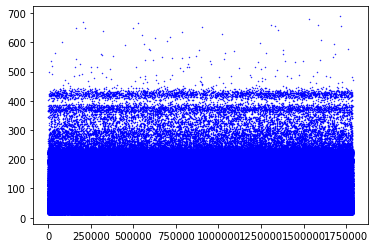

In [5]:
plt.scatter(range(pulse_go_1.shape[1]), pulse_go_1[0, :], s=0.2, c='b')
plt.show()

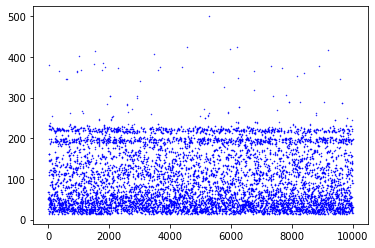

In [6]:
plt.scatter(range(10000), pulse_go_1[0, :10000], s=0.2, c='b')
plt.show()

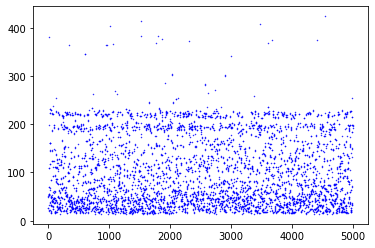

In [7]:
plt.scatter(range(5000), pulse_go_1[0, :5000], s=0.2, c='b')
plt.show()

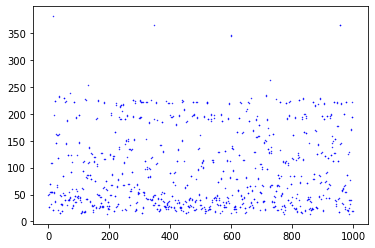

In [8]:
plt.scatter(range(1000), pulse_go_1[0, :1000], s=0.2, c='b')
plt.show()

In [77]:
num2 = int(pulse_go_1.shape[1]/5000)
num2

357

In [78]:
dataSet4 = np.zeros((num2, 5000))
for i in range(num2):
    dataSet4[i, :] = pulse_go_1[0, i * 5000: i * 5000 + 5000]
dataSet4

array([[ 50.,  51.,  26., ..., 199., 197., 193.],
       [193., 193., 195., ..., 199., 197.,  17.],
       [ 15., 129., 146., ...,  15.,  16.,  16.],
       ...,
       [ 58.,  16.,  15., ...,  37., 342., 345.],
       [ 26.,  27.,  54., ...,  64., 171., 170.],
       [ 76.,  76.,  72., ..., 223., 222., 122.]])

In [180]:
dataSet = np.vstack((dataSet3, dataSet4))
dataSet, dataSet.shape

(array([[ 39.,  41.,  36., ...,  81.,  82.,  32.],
        [ 33.,  20.,  28., ..., 111., 109.,  84.],
        [ 83.,  41.,  38., ...,  37.,  48.,  51.],
        ...,
        [ 58.,  16.,  15., ...,  37., 342., 345.],
        [ 26.,  27.,  54., ...,  64., 171., 170.],
        [ 76.,  76.,  72., ..., 223., 222., 122.]]), (1858, 5000))

In [81]:
df = pd.DataFrame(dataSet)

In [83]:
df.to_csv('../Cs137data/Cs_Go_dataSet.csv')

In [93]:
label_array = np.zeros((dataSet.shape[0], 1))
for i in range(dataSet.shape[0]):
    if i < num:
        label_array[i, 0] = 0
    elif (i < num2 + num) and (i > num):
        label_array[i, 0] = 1

In [94]:
label_array.shape, label_array

((715, 1), array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0

In [96]:
label_array[num],label_array[num+1]

(array([0.]), array([1.]))

In [97]:
df1 = pd.DataFrame(label_array)


In [98]:
df1.to_csv('../Cs137data/label_data.csv')

In [121]:
# 训练数据
x_train = dataSet
y_train = label_array
x_train = x_train/x_train.max()
x_train.min()

0.018867924528301886

In [255]:
def data_pca(x_train, x_test, COMPONENT_NUM):
    start = time.time()
    print("====>>===>>===>> PCA ")
    pca = PCA(n_components=COMPONENT_NUM, copy=True, whiten=False)  # 创建一个 PCA 对象
    pca.fit(x_train)    # 构建 PCA 模型
    pcaXTrain = pca.transform(x_train)
    pcaXTest = pca.transform(x_test)
    print('pca time is %0.3fs' % (time.time() - start))
    return pcaXTrain, pcaXTest

In [130]:
x_train, x_test = data_pca(x_train, x_train[300: 400], 0.95)
x_train.shape, x_test.shape

====>>===>>===>> PCA 


((715, 572), (100, 572))

In [131]:
x_train, x_test

(array([[-1.5106629 , -0.01904436,  0.23415061, ...,  0.35391583,
         -0.38828889,  0.24769418],
        [-1.49010162,  0.06260766, -0.10485162, ..., -0.02542048,
          0.13868142,  0.43955478],
        [-1.46513598, -0.04675054,  0.16369637, ...,  0.04994011,
          0.07725677,  0.13276566],
        ...,
        [ 1.39619359, -0.12239694,  0.21186636, ..., -0.03467454,
          0.04734603,  0.07283294],
        [ 1.62370527, -0.56741441, -1.29350268, ..., -0.00935304,
          0.03081929,  0.03898018],
        [ 1.55717884, -0.44760776, -0.3967067 , ...,  0.01268417,
         -0.00542091,  0.00395969]]),
 array([[-1.52946265,  0.04167283,  0.12942666, ...,  0.27772438,
         -0.11329826,  0.07980409],
        [-1.57291307, -0.07830368,  0.09053879, ...,  0.01520013,
         -0.0499296 , -0.24558424],
        [-1.65248486,  0.18618536, -0.07702884, ..., -0.2193529 ,
         -0.03804924, -0.46888185],
        ...,
        [ 1.60326362,  0.23679328,  0.09977244, ..., -

In [132]:
x_test.shape

(100, 572)

In [133]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=1000, input_shape=(x_train.shape[1], ), activation='relu'))
model.add(keras.layers.Dense(units=1000, activation='relu'))
model.add(keras.layers.Dense(units=2, activation='softmax'))

model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
# epochs：表示一共训练的周期， batch_size：把多少层组合成一个训练单元，多线程加速
history = model.fit(x_train, y_train, epochs=10, batch_size=32)
model.summary()
# 测试模型
 #保存模型
# model.save('model1.h5')
# 预测数据
# result = model.predict(x_test)

Train on 715 samples
Epoch 1/10
715/715 [==============================] - 1s 731us/sample - loss: 0.1099 - accuracy: 0.9441
Epoch 2/10
715/715 [==============================] - 0s 559us/sample - loss: 5.7424e-05 - accuracy: 1.0000
Epoch 3/10
715/715 [==============================] - 0s 559us/sample - loss: 2.1682e-05 - accuracy: 1.0000
Epoch 4/10
715/715 [==============================] - 0s 547us/sample - loss: 1.7760e-05 - accuracy: 1.0000
Epoch 5/10
715/715 [==============================] - 0s 582us/sample - loss: 1.5868e-05 - accuracy: 1.0000
Epoch 6/10
715/715 [==============================] - 0s 596us/sample - loss: 1.4251e-05 - accuracy: 1.0000
Epoch 7/10
715/715 [==============================] - 0s 596us/sample - loss: 1.2878e-05 - accuracy: 1.0000
Epoch 8/10
715/715 [==============================] - 0s 607us/sample - loss: 1.1653e-05 - accuracy: 1.0000
Epoch 9/10
715/715 [==============================] - 0s 530us/sample - loss: 1.0584e-05 - accuracy: 1.0000
Epoch 10/10

In [110]:
history.params

{'batch_size': 32,
 'epochs': 10,
 'steps': None,
 'samples': 715,
 'verbose': 1,
 'do_validation': False,
 'metrics': ['loss', 'accuracy']}

In [134]:
x_test, x_test.shape

(array([[-1.52946265,  0.04167283,  0.12942666, ...,  0.27772438,
         -0.11329826,  0.07980409],
        [-1.57291307, -0.07830368,  0.09053879, ...,  0.01520013,
         -0.0499296 , -0.24558424],
        [-1.65248486,  0.18618536, -0.07702884, ..., -0.2193529 ,
         -0.03804924, -0.46888185],
        ...,
        [ 1.60326362,  0.23679328,  0.09977244, ..., -0.02185165,
          0.02544121, -0.01090745],
        [ 1.47087369, -0.50948135,  0.41215979, ..., -0.02438759,
          0.00958152, -0.06601443],
        [ 1.28173953, -0.78087005,  0.34813757, ...,  0.02433702,
          0.01127478,  0.00971887]]), (100, 572))

In [135]:
result = model.predict(x_test)

In [136]:
result

array([[9.99934435e-01, 6.55022304e-05],
       [9.99978900e-01, 2.10609815e-05],
       [9.99994516e-01, 5.53368818e-06],
       [9.99998689e-01, 1.26436851e-06],
       [9.99967575e-01, 3.23830500e-05],
       [9.99999642e-01, 4.03389095e-07],
       [9.99994040e-01, 6.00352905e-06],
       [9.99984503e-01, 1.54442459e-05],
       [9.99998569e-01, 1.40530460e-06],
       [9.99996662e-01, 3.33538219e-06],
       [9.99999166e-01, 8.74265766e-07],
       [9.99955297e-01, 4.46439699e-05],
       [9.99986291e-01, 1.36518338e-05],
       [9.99962568e-01, 3.73824732e-05],
       [9.99985933e-01, 1.40916745e-05],
       [9.99966025e-01, 3.39884646e-05],
       [9.99988794e-01, 1.11460395e-05],
       [9.99995470e-01, 4.53837265e-06],
       [9.99931455e-01, 6.85483901e-05],
       [9.99983430e-01, 1.65404417e-05],
       [9.99999642e-01, 3.93539864e-07],
       [9.99969006e-01, 3.10447867e-05],
       [9.99951482e-01, 4.85007076e-05],
       [9.99984622e-01, 1.53433048e-05],
       [9.999792

In [137]:
array = np.zeros((len(result), 1))
for i in range(len(result)):
    array[i] = np.argmax(result[i])
array

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [143]:
num3 = 0
for i in range(100):
    if array[i, 0] == label_array[300 + i, 0]:
        num3 += 1

In [144]:
num3

100

In [145]:
fr = open('../Cs137data/lis/Cs137-180s-s1.Lis', 'rb')
pulse_Cs_02 , reCs2, RePCs2 = get_pulse_data(fr)
pulse_Cs_02.shape

N/A% (0 of 23880) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (14 of 23880) |                     | Elapsed Time: 0:00:00 ETA:   0:02:51
  0% (33 of 23880) |                     | Elapsed Time: 0:00:00 ETA:   0:02:28
  0% (50 of 23880) |                     | Elapsed Time: 0:00:00 ETA:   0:02:27
  0% (67 of 23880) |                     | Elapsed Time: 0:00:00 ETA:   0:02:26
  0% (85 of 23880) |                     | Elapsed Time: 0:00:00 ETA:   0:02:23
  0% (103 of 23880) |                    | Elapsed Time: 0:00:00 ETA:   0:02:21
  0% (122 of 23880) |                    | Elapsed Time: 0:00:00 ETA:   0:02:19
  0% (140 of 23880) |                    | Elapsed Time: 0:00:00 ETA:   0:02:19
  0% (158 of 23880) |                    | Elapsed Time: 0:00:00 ETA:   0:02:18
  0% (176 of 23880) |                    | Elapsed Time: 0:00:01 ETA:   0:02:18
  0% (193 of 23880) |                    | Elapsed Time: 0:00:01 ETA:   0:02:19
  0% (210 of 23880) |                   

  7% (1778 of 23880) |#                  | Elapsed Time: 0:00:10 ETA:   0:02:07
  7% (1796 of 23880) |#                  | Elapsed Time: 0:00:10 ETA:   0:02:07
  7% (1814 of 23880) |#                  | Elapsed Time: 0:00:10 ETA:   0:02:07
  7% (1832 of 23880) |#                  | Elapsed Time: 0:00:10 ETA:   0:02:06
  7% (1850 of 23880) |#                  | Elapsed Time: 0:00:10 ETA:   0:02:06
  7% (1867 of 23880) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:05
  7% (1884 of 23880) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:06
  7% (1902 of 23880) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:06
  8% (1920 of 23880) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:05
  8% (1937 of 23880) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:06
  8% (1956 of 23880) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:06
  8% (1975 of 23880) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:05
  8% (1992 of 23880) |#                 

 15% (3610 of 23880) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:57
 15% (3628 of 23880) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:57
 15% (3645 of 23880) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:57
 15% (3662 of 23880) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:57
 15% (3679 of 23880) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:57
 15% (3698 of 23880) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:57
 15% (3717 of 23880) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:56
 15% (3734 of 23880) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:56
 15% (3752 of 23880) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:57
 15% (3771 of 23880) |###                | Elapsed Time: 0:00:22 ETA:   0:01:56
 15% (3789 of 23880) |###                | Elapsed Time: 0:00:22 ETA:   0:01:56
 15% (3808 of 23880) |###                | Elapsed Time: 0:00:22 ETA:   0:01:56
 16% (3825 of 23880) |###               

 22% (5442 of 23880) |####               | Elapsed Time: 0:00:31 ETA:   0:01:44
 22% (5459 of 23880) |####               | Elapsed Time: 0:00:31 ETA:   0:01:45
 22% (5476 of 23880) |####               | Elapsed Time: 0:00:31 ETA:   0:01:45
 23% (5494 of 23880) |####               | Elapsed Time: 0:00:31 ETA:   0:01:44
 23% (5514 of 23880) |####               | Elapsed Time: 0:00:32 ETA:   0:01:44
 23% (5532 of 23880) |####               | Elapsed Time: 0:00:32 ETA:   0:01:45
 23% (5549 of 23880) |####               | Elapsed Time: 0:00:32 ETA:   0:01:45
 23% (5567 of 23880) |####               | Elapsed Time: 0:00:32 ETA:   0:01:45
 23% (5587 of 23880) |####               | Elapsed Time: 0:00:32 ETA:   0:01:44
 23% (5606 of 23880) |####               | Elapsed Time: 0:00:32 ETA:   0:01:43
 23% (5623 of 23880) |####               | Elapsed Time: 0:00:32 ETA:   0:01:43
 23% (5641 of 23880) |####               | Elapsed Time: 0:00:32 ETA:   0:01:43
 23% (5659 of 23880) |####              

 30% (7275 of 23880) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:34
 30% (7291 of 23880) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:35
 30% (7310 of 23880) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:35
 30% (7329 of 23880) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:34
 30% (7348 of 23880) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:33
 30% (7365 of 23880) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:34
 30% (7384 of 23880) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:33
 30% (7401 of 23880) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:33
 31% (7420 of 23880) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:33
 31% (7438 of 23880) |#####              | Elapsed Time: 0:00:43 ETA:   0:01:33
 31% (7456 of 23880) |#####              | Elapsed Time: 0:00:43 ETA:   0:01:32
 31% (7474 of 23880) |#####              | Elapsed Time: 0:00:43 ETA:   0:01:32
 31% (7492 of 23880) |#####             

 38% (9123 of 23880) |#######            | Elapsed Time: 0:00:52 ETA:   0:01:24
 38% (9140 of 23880) |#######            | Elapsed Time: 0:00:52 ETA:   0:01:24
 38% (9159 of 23880) |#######            | Elapsed Time: 0:00:52 ETA:   0:01:24
 38% (9178 of 23880) |#######            | Elapsed Time: 0:00:52 ETA:   0:01:24
 38% (9195 of 23880) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:24
 38% (9213 of 23880) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:23
 38% (9231 of 23880) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:23
 38% (9248 of 23880) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:23
 38% (9265 of 23880) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:23
 38% (9284 of 23880) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:23
 38% (9302 of 23880) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:23
 39% (9319 of 23880) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:23
 39% (9336 of 23880) |#######           

 45% (10955 of 23880) |########          | Elapsed Time: 0:01:03 ETA:   0:01:13
 45% (10973 of 23880) |########          | Elapsed Time: 0:01:03 ETA:   0:01:13
 46% (10991 of 23880) |########          | Elapsed Time: 0:01:03 ETA:   0:01:13
 46% (11010 of 23880) |########          | Elapsed Time: 0:01:03 ETA:   0:01:12
 46% (11026 of 23880) |########          | Elapsed Time: 0:01:03 ETA:   0:01:12
 46% (11043 of 23880) |########          | Elapsed Time: 0:01:03 ETA:   0:01:12
 46% (11062 of 23880) |########          | Elapsed Time: 0:01:03 ETA:   0:01:12
 46% (11080 of 23880) |########          | Elapsed Time: 0:01:03 ETA:   0:01:12
 46% (11097 of 23880) |########          | Elapsed Time: 0:01:03 ETA:   0:01:12
 46% (11115 of 23880) |########          | Elapsed Time: 0:01:04 ETA:   0:01:12
 46% (11134 of 23880) |########          | Elapsed Time: 0:01:04 ETA:   0:01:12
 46% (11153 of 23880) |########          | Elapsed Time: 0:01:04 ETA:   0:01:12
 46% (11171 of 23880) |########         

 53% (12785 of 23880) |#########         | Elapsed Time: 0:01:13 ETA:   0:01:03
 53% (12804 of 23880) |#########         | Elapsed Time: 0:01:13 ETA:   0:01:03
 53% (12823 of 23880) |#########         | Elapsed Time: 0:01:13 ETA:   0:01:02
 53% (12842 of 23880) |#########         | Elapsed Time: 0:01:13 ETA:   0:01:02
 53% (12860 of 23880) |#########         | Elapsed Time: 0:01:13 ETA:   0:01:02
 53% (12880 of 23880) |#########         | Elapsed Time: 0:01:14 ETA:   0:01:02
 54% (12899 of 23880) |#########         | Elapsed Time: 0:01:14 ETA:   0:01:02
 54% (12917 of 23880) |#########         | Elapsed Time: 0:01:14 ETA:   0:01:02
 54% (12935 of 23880) |#########         | Elapsed Time: 0:01:14 ETA:   0:01:02
 54% (12954 of 23880) |#########         | Elapsed Time: 0:01:14 ETA:   0:01:01
 54% (12971 of 23880) |#########         | Elapsed Time: 0:01:14 ETA:   0:01:01
 54% (12989 of 23880) |#########         | Elapsed Time: 0:01:14 ETA:   0:01:01
 54% (12998 of 23880) |#########        

 61% (14581 of 23880) |##########        | Elapsed Time: 0:01:24 ETA:   0:00:53
 61% (14601 of 23880) |###########       | Elapsed Time: 0:01:24 ETA:   0:00:52
 61% (14618 of 23880) |###########       | Elapsed Time: 0:01:24 ETA:   0:00:52
 61% (14636 of 23880) |###########       | Elapsed Time: 0:01:24 ETA:   0:00:52
 61% (14654 of 23880) |###########       | Elapsed Time: 0:01:24 ETA:   0:00:52
 61% (14672 of 23880) |###########       | Elapsed Time: 0:01:24 ETA:   0:00:52
 61% (14689 of 23880) |###########       | Elapsed Time: 0:01:24 ETA:   0:00:52
 61% (14707 of 23880) |###########       | Elapsed Time: 0:01:24 ETA:   0:00:52
 61% (14723 of 23880) |###########       | Elapsed Time: 0:01:24 ETA:   0:00:52
 61% (14741 of 23880) |###########       | Elapsed Time: 0:01:24 ETA:   0:00:52
 61% (14760 of 23880) |###########       | Elapsed Time: 0:01:25 ETA:   0:00:52
 61% (14779 of 23880) |###########       | Elapsed Time: 0:01:25 ETA:   0:00:52
 61% (14797 of 23880) |###########      

 68% (16396 of 23880) |############      | Elapsed Time: 0:01:34 ETA:   0:00:43
 68% (16414 of 23880) |############      | Elapsed Time: 0:01:34 ETA:   0:00:43
 68% (16432 of 23880) |############      | Elapsed Time: 0:01:34 ETA:   0:00:43
 68% (16450 of 23880) |############      | Elapsed Time: 0:01:34 ETA:   0:00:43
 68% (16467 of 23880) |############      | Elapsed Time: 0:01:34 ETA:   0:00:43
 69% (16485 of 23880) |############      | Elapsed Time: 0:01:35 ETA:   0:00:43
 69% (16504 of 23880) |############      | Elapsed Time: 0:01:35 ETA:   0:00:43
 69% (16521 of 23880) |############      | Elapsed Time: 0:01:35 ETA:   0:00:43
 69% (16537 of 23880) |############      | Elapsed Time: 0:01:35 ETA:   0:00:42
 69% (16556 of 23880) |############      | Elapsed Time: 0:01:35 ETA:   0:00:42
 69% (16572 of 23880) |############      | Elapsed Time: 0:01:35 ETA:   0:00:42
 69% (16589 of 23880) |############      | Elapsed Time: 0:01:35 ETA:   0:00:42
 69% (16605 of 23880) |############     

 76% (18224 of 23880) |#############     | Elapsed Time: 0:01:45 ETA:   0:00:32
 76% (18242 of 23880) |#############     | Elapsed Time: 0:01:45 ETA:   0:00:32
 76% (18259 of 23880) |#############     | Elapsed Time: 0:01:45 ETA:   0:00:32
 76% (18275 of 23880) |#############     | Elapsed Time: 0:01:45 ETA:   0:00:32
 76% (18293 of 23880) |#############     | Elapsed Time: 0:01:45 ETA:   0:00:32
 76% (18310 of 23880) |#############     | Elapsed Time: 0:01:45 ETA:   0:00:31
 76% (18330 of 23880) |#############     | Elapsed Time: 0:01:45 ETA:   0:00:31
 76% (18348 of 23880) |#############     | Elapsed Time: 0:01:45 ETA:   0:00:31
 76% (18366 of 23880) |#############     | Elapsed Time: 0:01:45 ETA:   0:00:31
 76% (18385 of 23880) |#############     | Elapsed Time: 0:01:45 ETA:   0:00:31
 77% (18403 of 23880) |#############     | Elapsed Time: 0:01:46 ETA:   0:00:31
 77% (18421 of 23880) |#############     | Elapsed Time: 0:01:46 ETA:   0:00:31
 77% (18439 of 23880) |#############    

 83% (20000 of 23880) |###############   | Elapsed Time: 0:01:55 ETA:   0:00:22
 83% (20016 of 23880) |###############   | Elapsed Time: 0:01:55 ETA:   0:00:22
 83% (20031 of 23880) |###############   | Elapsed Time: 0:01:55 ETA:   0:00:22
 83% (20045 of 23880) |###############   | Elapsed Time: 0:01:55 ETA:   0:00:22
 84% (20062 of 23880) |###############   | Elapsed Time: 0:01:56 ETA:   0:00:22
 84% (20077 of 23880) |###############   | Elapsed Time: 0:01:56 ETA:   0:00:23
 84% (20092 of 23880) |###############   | Elapsed Time: 0:01:56 ETA:   0:00:23
 84% (20109 of 23880) |###############   | Elapsed Time: 0:01:56 ETA:   0:00:23
 84% (20124 of 23880) |###############   | Elapsed Time: 0:01:56 ETA:   0:00:23
 84% (20138 of 23880) |###############   | Elapsed Time: 0:01:56 ETA:   0:00:23
 84% (20154 of 23880) |###############   | Elapsed Time: 0:01:56 ETA:   0:00:23
 84% (20169 of 23880) |###############   | Elapsed Time: 0:01:56 ETA:   0:00:23
 84% (20184 of 23880) |###############  

 90% (21690 of 23880) |################  | Elapsed Time: 0:02:06 ETA:   0:00:12
 90% (21707 of 23880) |################  | Elapsed Time: 0:02:06 ETA:   0:00:12
 90% (21726 of 23880) |################  | Elapsed Time: 0:02:06 ETA:   0:00:12
 91% (21744 of 23880) |################  | Elapsed Time: 0:02:06 ETA:   0:00:12
 91% (21755 of 23880) |################  | Elapsed Time: 0:02:06 ETA:   0:00:12
 91% (21765 of 23880) |################  | Elapsed Time: 0:02:06 ETA:   0:00:12
 91% (21780 of 23880) |################  | Elapsed Time: 0:02:06 ETA:   0:00:12
 91% (21799 of 23880) |################  | Elapsed Time: 0:02:06 ETA:   0:00:12
 91% (21816 of 23880) |################  | Elapsed Time: 0:02:07 ETA:   0:00:12
 91% (21834 of 23880) |################  | Elapsed Time: 0:02:07 ETA:   0:00:12
 91% (21852 of 23880) |################  | Elapsed Time: 0:02:07 ETA:   0:00:12
 91% (21868 of 23880) |################  | Elapsed Time: 0:02:07 ETA:   0:00:12
 91% (21887 of 23880) |################ 

 98% (23470 of 23880) |################# | Elapsed Time: 0:02:16 ETA:   0:00:02
 98% (23488 of 23880) |################# | Elapsed Time: 0:02:16 ETA:   0:00:02
 98% (23505 of 23880) |################# | Elapsed Time: 0:02:16 ETA:   0:00:02
 98% (23523 of 23880) |################# | Elapsed Time: 0:02:17 ETA:   0:00:02
 98% (23540 of 23880) |################# | Elapsed Time: 0:02:17 ETA:   0:00:02
 98% (23558 of 23880) |################# | Elapsed Time: 0:02:17 ETA:   0:00:01
 98% (23577 of 23880) |################# | Elapsed Time: 0:02:17 ETA:   0:00:01
 98% (23594 of 23880) |################# | Elapsed Time: 0:02:17 ETA:   0:00:01
 98% (23612 of 23880) |################# | Elapsed Time: 0:02:17 ETA:   0:00:01
 98% (23630 of 23880) |################# | Elapsed Time: 0:02:17 ETA:   0:00:01
 99% (23647 of 23880) |################# | Elapsed Time: 0:02:17 ETA:   0:00:01
 99% (23665 of 23880) |################# | Elapsed Time: 0:02:17 ETA:   0:00:01
 99% (23683 of 23880) |#################

TypeError: 'tuple' object is not callable

In [147]:
fr = open('../Cs137data/lis/G60-180s-02.Lis', 'rb')
pulse_Go_02 , reGo2, RePGo2 = get_pulse_data(fr)
pulse_Go_02.shape

N/A% (0 of 23635) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (17 of 23635) |                     | Elapsed Time: 0:00:00 ETA:   0:02:25
  0% (36 of 23635) |                     | Elapsed Time: 0:00:00 ETA:   0:02:14
  0% (54 of 23635) |                     | Elapsed Time: 0:00:00 ETA:   0:02:14
  0% (71 of 23635) |                     | Elapsed Time: 0:00:00 ETA:   0:02:16
  0% (89 of 23635) |                     | Elapsed Time: 0:00:00 ETA:   0:02:15
  0% (107 of 23635) |                    | Elapsed Time: 0:00:00 ETA:   0:02:15
  0% (127 of 23635) |                    | Elapsed Time: 0:00:00 ETA:   0:02:13
  0% (144 of 23635) |                    | Elapsed Time: 0:00:00 ETA:   0:02:13
  0% (163 of 23635) |                    | Elapsed Time: 0:00:00 ETA:   0:02:13
  0% (181 of 23635) |                    | Elapsed Time: 0:00:01 ETA:   0:02:13
  0% (199 of 23635) |                    | Elapsed Time: 0:00:01 ETA:   0:02:13
  0% (217 of 23635) |                   

  7% (1753 of 23635) |#                  | Elapsed Time: 0:00:10 ETA:   0:02:20
  7% (1771 of 23635) |#                  | Elapsed Time: 0:00:10 ETA:   0:02:19
  7% (1790 of 23635) |#                  | Elapsed Time: 0:00:10 ETA:   0:02:18
  7% (1807 of 23635) |#                  | Elapsed Time: 0:00:10 ETA:   0:02:18
  7% (1825 of 23635) |#                  | Elapsed Time: 0:00:10 ETA:   0:02:17
  7% (1844 of 23635) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:15
  7% (1862 of 23635) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:13
  7% (1880 of 23635) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:12
  8% (1898 of 23635) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:11
  8% (1916 of 23635) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:10
  8% (1934 of 23635) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:10
  8% (1952 of 23635) |#                  | Elapsed Time: 0:00:11 ETA:   0:02:09
  8% (1969 of 23635) |#                 

 14% (3521 of 23635) |##                 | Elapsed Time: 0:00:21 ETA:   0:02:00
 14% (3537 of 23635) |##                 | Elapsed Time: 0:00:21 ETA:   0:02:00
 15% (3550 of 23635) |##                 | Elapsed Time: 0:00:21 ETA:   0:02:02
 15% (3569 of 23635) |##                 | Elapsed Time: 0:00:21 ETA:   0:02:01
 15% (3589 of 23635) |##                 | Elapsed Time: 0:00:21 ETA:   0:02:01
 15% (3609 of 23635) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:59
 15% (3628 of 23635) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:57
 15% (3648 of 23635) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:56
 15% (3669 of 23635) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:55
 15% (3688 of 23635) |##                 | Elapsed Time: 0:00:21 ETA:   0:01:53
 15% (3708 of 23635) |##                 | Elapsed Time: 0:00:22 ETA:   0:01:51
 15% (3726 of 23635) |##                 | Elapsed Time: 0:00:22 ETA:   0:01:51
 15% (3747 of 23635) |###               

 22% (5367 of 23635) |####               | Elapsed Time: 0:00:31 ETA:   0:01:43
 22% (5382 of 23635) |####               | Elapsed Time: 0:00:31 ETA:   0:01:44
 22% (5397 of 23635) |####               | Elapsed Time: 0:00:31 ETA:   0:01:45
 22% (5416 of 23635) |####               | Elapsed Time: 0:00:31 ETA:   0:01:44
 22% (5436 of 23635) |####               | Elapsed Time: 0:00:31 ETA:   0:01:42
 23% (5456 of 23635) |####               | Elapsed Time: 0:00:31 ETA:   0:01:41
 23% (5475 of 23635) |####               | Elapsed Time: 0:00:32 ETA:   0:01:41
 23% (5493 of 23635) |####               | Elapsed Time: 0:00:32 ETA:   0:01:41
 23% (5512 of 23635) |####               | Elapsed Time: 0:00:32 ETA:   0:01:41
 23% (5530 of 23635) |####               | Elapsed Time: 0:00:32 ETA:   0:01:41
 23% (5550 of 23635) |####               | Elapsed Time: 0:00:32 ETA:   0:01:40
 23% (5568 of 23635) |####               | Elapsed Time: 0:00:32 ETA:   0:01:41
 23% (5587 of 23635) |####              

 30% (7181 of 23635) |#####              | Elapsed Time: 0:00:41 ETA:   0:01:37
 30% (7198 of 23635) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:35
 30% (7214 of 23635) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:36
 30% (7231 of 23635) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:35
 30% (7248 of 23635) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:35
 30% (7266 of 23635) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:35
 30% (7285 of 23635) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:34
 30% (7303 of 23635) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:34
 30% (7321 of 23635) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:34
 31% (7338 of 23635) |#####              | Elapsed Time: 0:00:42 ETA:   0:01:34
 31% (7356 of 23635) |#####              | Elapsed Time: 0:00:43 ETA:   0:01:34
 31% (7374 of 23635) |#####              | Elapsed Time: 0:00:43 ETA:   0:01:34
 31% (7393 of 23635) |#####             

 38% (9064 of 23635) |#######            | Elapsed Time: 0:00:52 ETA:   0:01:19
 38% (9083 of 23635) |#######            | Elapsed Time: 0:00:52 ETA:   0:01:19
 38% (9099 of 23635) |#######            | Elapsed Time: 0:00:52 ETA:   0:01:19
 38% (9117 of 23635) |#######            | Elapsed Time: 0:00:52 ETA:   0:01:19
 38% (9136 of 23635) |#######            | Elapsed Time: 0:00:52 ETA:   0:01:19
 38% (9155 of 23635) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:18
 38% (9174 of 23635) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:18
 38% (9194 of 23635) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:18
 38% (9212 of 23635) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:17
 39% (9230 of 23635) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:18
 39% (9248 of 23635) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:18
 39% (9267 of 23635) |#######            | Elapsed Time: 0:00:53 ETA:   0:01:18
 39% (9286 of 23635) |#######           

 46% (10998 of 23635) |########          | Elapsed Time: 0:01:03 ETA:   0:01:07
 46% (11017 of 23635) |########          | Elapsed Time: 0:01:03 ETA:   0:01:07
 46% (11035 of 23635) |########          | Elapsed Time: 0:01:03 ETA:   0:01:07
 46% (11053 of 23635) |########          | Elapsed Time: 0:01:03 ETA:   0:01:08
 46% (11070 of 23635) |########          | Elapsed Time: 0:01:03 ETA:   0:01:08
 46% (11089 of 23635) |########          | Elapsed Time: 0:01:03 ETA:   0:01:08
 46% (11107 of 23635) |########          | Elapsed Time: 0:01:03 ETA:   0:01:08
 47% (11125 of 23635) |########          | Elapsed Time: 0:01:03 ETA:   0:01:08
 47% (11145 of 23635) |########          | Elapsed Time: 0:01:03 ETA:   0:01:08
 47% (11164 of 23635) |########          | Elapsed Time: 0:01:03 ETA:   0:01:08
 47% (11183 of 23635) |########          | Elapsed Time: 0:01:04 ETA:   0:01:08
 47% (11203 of 23635) |########          | Elapsed Time: 0:01:04 ETA:   0:01:08
 47% (11222 of 23635) |########         

 54% (12917 of 23635) |#########         | Elapsed Time: 0:01:13 ETA:   0:00:58
 54% (12937 of 23635) |#########         | Elapsed Time: 0:01:13 ETA:   0:00:58
 54% (12955 of 23635) |#########         | Elapsed Time: 0:01:13 ETA:   0:00:58
 54% (12973 of 23635) |#########         | Elapsed Time: 0:01:13 ETA:   0:00:58
 54% (12992 of 23635) |#########         | Elapsed Time: 0:01:14 ETA:   0:00:58
 55% (13011 of 23635) |#########         | Elapsed Time: 0:01:14 ETA:   0:00:58
 55% (13030 of 23635) |#########         | Elapsed Time: 0:01:14 ETA:   0:00:58
 55% (13049 of 23635) |#########         | Elapsed Time: 0:01:14 ETA:   0:00:58
 55% (13067 of 23635) |#########         | Elapsed Time: 0:01:14 ETA:   0:00:57
 55% (13086 of 23635) |#########         | Elapsed Time: 0:01:14 ETA:   0:00:57
 55% (13104 of 23635) |#########         | Elapsed Time: 0:01:14 ETA:   0:00:57
 55% (13124 of 23635) |#########         | Elapsed Time: 0:01:14 ETA:   0:00:57
 55% (13143 of 23635) |##########       

 62% (14848 of 23635) |###########       | Elapsed Time: 0:01:24 ETA:   0:00:48
 62% (14869 of 23635) |###########       | Elapsed Time: 0:01:24 ETA:   0:00:48
 62% (14889 of 23635) |###########       | Elapsed Time: 0:01:24 ETA:   0:00:47
 63% (14908 of 23635) |###########       | Elapsed Time: 0:01:24 ETA:   0:00:47
 63% (14927 of 23635) |###########       | Elapsed Time: 0:01:24 ETA:   0:00:47
 63% (14947 of 23635) |###########       | Elapsed Time: 0:01:24 ETA:   0:00:47
 63% (14959 of 23635) |###########       | Elapsed Time: 0:01:24 ETA:   0:00:47
 63% (14978 of 23635) |###########       | Elapsed Time: 0:01:24 ETA:   0:00:46
 63% (14997 of 23635) |###########       | Elapsed Time: 0:01:24 ETA:   0:00:46
 63% (15017 of 23635) |###########       | Elapsed Time: 0:01:25 ETA:   0:00:46
 63% (15036 of 23635) |###########       | Elapsed Time: 0:01:25 ETA:   0:00:46
 63% (15055 of 23635) |###########       | Elapsed Time: 0:01:25 ETA:   0:00:45
 63% (15074 of 23635) |###########      

 70% (16772 of 23635) |############      | Elapsed Time: 0:01:34 ETA:   0:00:39
 71% (16792 of 23635) |############      | Elapsed Time: 0:01:34 ETA:   0:00:38
 71% (16809 of 23635) |############      | Elapsed Time: 0:01:34 ETA:   0:00:38
 71% (16828 of 23635) |############      | Elapsed Time: 0:01:34 ETA:   0:00:38
 71% (16846 of 23635) |############      | Elapsed Time: 0:01:35 ETA:   0:00:38
 71% (16865 of 23635) |############      | Elapsed Time: 0:01:35 ETA:   0:00:38
 71% (16881 of 23635) |############      | Elapsed Time: 0:01:35 ETA:   0:00:38
 71% (16900 of 23635) |############      | Elapsed Time: 0:01:35 ETA:   0:00:37
 71% (16917 of 23635) |############      | Elapsed Time: 0:01:35 ETA:   0:00:37
 71% (16933 of 23635) |############      | Elapsed Time: 0:01:35 ETA:   0:00:37
 71% (16948 of 23635) |############      | Elapsed Time: 0:01:35 ETA:   0:00:38
 71% (16963 of 23635) |############      | Elapsed Time: 0:01:35 ETA:   0:00:38
 71% (16977 of 23635) |############     

 78% (18565 of 23635) |##############    | Elapsed Time: 0:01:45 ETA:   0:00:28
 78% (18584 of 23635) |##############    | Elapsed Time: 0:01:45 ETA:   0:00:28
 78% (18603 of 23635) |##############    | Elapsed Time: 0:01:45 ETA:   0:00:28
 78% (18623 of 23635) |##############    | Elapsed Time: 0:01:45 ETA:   0:00:27
 78% (18643 of 23635) |##############    | Elapsed Time: 0:01:45 ETA:   0:00:27
 78% (18662 of 23635) |##############    | Elapsed Time: 0:01:45 ETA:   0:00:27
 79% (18679 of 23635) |##############    | Elapsed Time: 0:01:45 ETA:   0:00:27
 79% (18699 of 23635) |##############    | Elapsed Time: 0:01:45 ETA:   0:00:27
 79% (18720 of 23635) |##############    | Elapsed Time: 0:01:45 ETA:   0:00:26
 79% (18741 of 23635) |##############    | Elapsed Time: 0:01:46 ETA:   0:00:26
 79% (18757 of 23635) |##############    | Elapsed Time: 0:01:46 ETA:   0:00:26
 79% (18776 of 23635) |##############    | Elapsed Time: 0:01:46 ETA:   0:00:26
 79% (18795 of 23635) |##############   

 86% (20490 of 23635) |###############   | Elapsed Time: 0:01:55 ETA:   0:00:17
 86% (20509 of 23635) |###############   | Elapsed Time: 0:01:55 ETA:   0:00:17
 86% (20527 of 23635) |###############   | Elapsed Time: 0:01:55 ETA:   0:00:17
 86% (20547 of 23635) |###############   | Elapsed Time: 0:01:55 ETA:   0:00:16
 87% (20567 of 23635) |###############   | Elapsed Time: 0:01:56 ETA:   0:00:16
 87% (20587 of 23635) |###############   | Elapsed Time: 0:01:56 ETA:   0:00:16
 87% (20606 of 23635) |###############   | Elapsed Time: 0:01:56 ETA:   0:00:16
 87% (20624 of 23635) |###############   | Elapsed Time: 0:01:56 ETA:   0:00:16
 87% (20642 of 23635) |###############   | Elapsed Time: 0:01:56 ETA:   0:00:16
 87% (20659 of 23635) |###############   | Elapsed Time: 0:01:56 ETA:   0:00:16
 87% (20677 of 23635) |###############   | Elapsed Time: 0:01:56 ETA:   0:00:16
 87% (20695 of 23635) |###############   | Elapsed Time: 0:01:56 ETA:   0:00:16
 87% (20713 of 23635) |###############  

 94% (22403 of 23635) |################# | Elapsed Time: 0:02:06 ETA:   0:00:06
 94% (22420 of 23635) |################# | Elapsed Time: 0:02:06 ETA:   0:00:06
 94% (22439 of 23635) |################# | Elapsed Time: 0:02:06 ETA:   0:00:06
 95% (22457 of 23635) |################# | Elapsed Time: 0:02:06 ETA:   0:00:06
 95% (22476 of 23635) |################# | Elapsed Time: 0:02:06 ETA:   0:00:06
 95% (22494 of 23635) |################# | Elapsed Time: 0:02:06 ETA:   0:00:06
 95% (22514 of 23635) |################# | Elapsed Time: 0:02:06 ETA:   0:00:06
 95% (22532 of 23635) |################# | Elapsed Time: 0:02:06 ETA:   0:00:06
 95% (22550 of 23635) |################# | Elapsed Time: 0:02:06 ETA:   0:00:05
 95% (22569 of 23635) |################# | Elapsed Time: 0:02:07 ETA:   0:00:05
 95% (22587 of 23635) |################# | Elapsed Time: 0:02:07 ETA:   0:00:05
 95% (22604 of 23635) |################# | Elapsed Time: 0:02:07 ETA:   0:00:05
 95% (22622 of 23635) |#################

(1, 1760981)

In [148]:
fr = open('../Cs137data/lis/G60-180s-03.Lis', 'rb')
pulse_Go_03 , reGo3, RePGo3 = get_pulse_data(fr)
pulse_Go_03.shape

N/A% (0 of 137617) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (16 of 137617) |                    | Elapsed Time: 0:00:00 ETA:   0:14:34
  0% (35 of 137617) |                    | Elapsed Time: 0:00:00 ETA:   0:13:19
  0% (53 of 137617) |                    | Elapsed Time: 0:00:00 ETA:   0:13:09
  0% (72 of 137617) |                    | Elapsed Time: 0:00:00 ETA:   0:12:55
  0% (90 of 137617) |                    | Elapsed Time: 0:00:00 ETA:   0:13:00
  0% (108 of 137617) |                   | Elapsed Time: 0:00:00 ETA:   0:13:05
  0% (126 of 137617) |                   | Elapsed Time: 0:00:00 ETA:   0:13:07
  0% (145 of 137617) |                   | Elapsed Time: 0:00:00 ETA:   0:13:02
  0% (162 of 137617) |                   | Elapsed Time: 0:00:00 ETA:   0:13:06
  0% (182 of 137617) |                   | Elapsed Time: 0:00:01 ETA:   0:13:00
  0% (200 of 137617) |                   | Elapsed Time: 0:00:01 ETA:   0:13:01
  0% (218 of 137617) |                  

  1% (1886 of 137617) |                  | Elapsed Time: 0:00:10 ETA:   0:12:45
  1% (1905 of 137617) |                  | Elapsed Time: 0:00:10 ETA:   0:12:42
  1% (1924 of 137617) |                  | Elapsed Time: 0:00:10 ETA:   0:12:41
  1% (1942 of 137617) |                  | Elapsed Time: 0:00:10 ETA:   0:12:40
  1% (1960 of 137617) |                  | Elapsed Time: 0:00:11 ETA:   0:12:37
  1% (1980 of 137617) |                  | Elapsed Time: 0:00:11 ETA:   0:12:35
  1% (1997 of 137617) |                  | Elapsed Time: 0:00:11 ETA:   0:12:38
  1% (2015 of 137617) |                  | Elapsed Time: 0:00:11 ETA:   0:12:41
  1% (2033 of 137617) |                  | Elapsed Time: 0:00:11 ETA:   0:12:42
  1% (2051 of 137617) |                  | Elapsed Time: 0:00:11 ETA:   0:12:45
  1% (2069 of 137617) |                  | Elapsed Time: 0:00:11 ETA:   0:12:44
  1% (2087 of 137617) |                  | Elapsed Time: 0:00:11 ETA:   0:12:44
  1% (2104 of 137617) |                 

  2% (3784 of 137617) |                  | Elapsed Time: 0:00:21 ETA:   0:12:15
  2% (3802 of 137617) |                  | Elapsed Time: 0:00:21 ETA:   0:12:14
  2% (3822 of 137617) |                  | Elapsed Time: 0:00:21 ETA:   0:12:13
  2% (3840 of 137617) |                  | Elapsed Time: 0:00:21 ETA:   0:12:14
  2% (3858 of 137617) |                  | Elapsed Time: 0:00:21 ETA:   0:12:16
  2% (3875 of 137617) |                  | Elapsed Time: 0:00:21 ETA:   0:12:18
  2% (3894 of 137617) |                  | Elapsed Time: 0:00:21 ETA:   0:12:19
  2% (3912 of 137617) |                  | Elapsed Time: 0:00:21 ETA:   0:12:18
  2% (3931 of 137617) |                  | Elapsed Time: 0:00:21 ETA:   0:12:16
  2% (3950 of 137617) |                  | Elapsed Time: 0:00:22 ETA:   0:12:21
  2% (3968 of 137617) |                  | Elapsed Time: 0:00:22 ETA:   0:12:22
  2% (3986 of 137617) |                  | Elapsed Time: 0:00:22 ETA:   0:12:19
  2% (4005 of 137617) |                 

  4% (5683 of 137617) |                  | Elapsed Time: 0:00:31 ETA:   0:12:23
  4% (5701 of 137617) |                  | Elapsed Time: 0:00:31 ETA:   0:12:23
  4% (5721 of 137617) |                  | Elapsed Time: 0:00:31 ETA:   0:12:20
  4% (5740 of 137617) |                  | Elapsed Time: 0:00:32 ETA:   0:12:20
  4% (5761 of 137617) |                  | Elapsed Time: 0:00:32 ETA:   0:12:14
  4% (5780 of 137617) |                  | Elapsed Time: 0:00:32 ETA:   0:12:12
  4% (5800 of 137617) |                  | Elapsed Time: 0:00:32 ETA:   0:12:08
  4% (5818 of 137617) |                  | Elapsed Time: 0:00:32 ETA:   0:12:10
  4% (5837 of 137617) |                  | Elapsed Time: 0:00:32 ETA:   0:12:08
  4% (5856 of 137617) |                  | Elapsed Time: 0:00:32 ETA:   0:12:08
  4% (5874 of 137617) |                  | Elapsed Time: 0:00:32 ETA:   0:12:07
  4% (5893 of 137617) |                  | Elapsed Time: 0:00:32 ETA:   0:12:06
  4% (5912 of 137617) |                 

  5% (7595 of 137617) |                  | Elapsed Time: 0:00:42 ETA:   0:12:03
  5% (7613 of 137617) |                  | Elapsed Time: 0:00:42 ETA:   0:12:03
  5% (7629 of 137617) |                  | Elapsed Time: 0:00:42 ETA:   0:12:10
  5% (7647 of 137617) |#                 | Elapsed Time: 0:00:42 ETA:   0:12:10
  5% (7665 of 137617) |#                 | Elapsed Time: 0:00:42 ETA:   0:12:08
  5% (7682 of 137617) |#                 | Elapsed Time: 0:00:42 ETA:   0:12:11
  5% (7701 of 137617) |#                 | Elapsed Time: 0:00:42 ETA:   0:12:10
  5% (7720 of 137617) |#                 | Elapsed Time: 0:00:43 ETA:   0:12:10
  5% (7739 of 137617) |#                 | Elapsed Time: 0:00:43 ETA:   0:12:12
  5% (7759 of 137617) |#                 | Elapsed Time: 0:00:43 ETA:   0:12:08
  5% (7776 of 137617) |#                 | Elapsed Time: 0:00:43 ETA:   0:12:08
  5% (7794 of 137617) |#                 | Elapsed Time: 0:00:43 ETA:   0:12:09
  5% (7813 of 137617) |#                

  6% (9480 of 137617) |#                 | Elapsed Time: 0:00:52 ETA:   0:11:57
  6% (9498 of 137617) |#                 | Elapsed Time: 0:00:52 ETA:   0:11:57
  6% (9515 of 137617) |#                 | Elapsed Time: 0:00:53 ETA:   0:12:00
  6% (9534 of 137617) |#                 | Elapsed Time: 0:00:53 ETA:   0:11:59
  6% (9553 of 137617) |#                 | Elapsed Time: 0:00:53 ETA:   0:12:00
  6% (9570 of 137617) |#                 | Elapsed Time: 0:00:53 ETA:   0:12:04
  6% (9589 of 137617) |#                 | Elapsed Time: 0:00:53 ETA:   0:11:57
  6% (9607 of 137617) |#                 | Elapsed Time: 0:00:53 ETA:   0:11:58
  6% (9625 of 137617) |#                 | Elapsed Time: 0:00:53 ETA:   0:11:58
  7% (9644 of 137617) |#                 | Elapsed Time: 0:00:53 ETA:   0:11:58
  7% (9663 of 137617) |#                 | Elapsed Time: 0:00:53 ETA:   0:11:57
  7% (9683 of 137617) |#                 | Elapsed Time: 0:00:53 ETA:   0:11:51
  7% (9704 of 137617) |#                

  8% (11395 of 137617) |#                | Elapsed Time: 0:01:03 ETA:   0:11:42
  8% (11412 of 137617) |#                | Elapsed Time: 0:01:03 ETA:   0:11:42
  8% (11430 of 137617) |#                | Elapsed Time: 0:01:03 ETA:   0:11:40
  8% (11450 of 137617) |#                | Elapsed Time: 0:01:03 ETA:   0:11:38
  8% (11469 of 137617) |#                | Elapsed Time: 0:01:03 ETA:   0:11:35
  8% (11488 of 137617) |#                | Elapsed Time: 0:01:03 ETA:   0:11:35
  8% (11507 of 137617) |#                | Elapsed Time: 0:01:04 ETA:   0:11:37
  8% (11528 of 137617) |#                | Elapsed Time: 0:01:04 ETA:   0:11:33
  8% (11546 of 137617) |#                | Elapsed Time: 0:01:04 ETA:   0:11:37
  8% (11565 of 137617) |#                | Elapsed Time: 0:01:04 ETA:   0:11:36
  8% (11583 of 137617) |#                | Elapsed Time: 0:01:04 ETA:   0:11:36
  8% (11604 of 137617) |#                | Elapsed Time: 0:01:04 ETA:   0:11:34
  8% (11621 of 137617) |#               

  9% (13307 of 137617) |#                | Elapsed Time: 0:01:14 ETA:   0:11:23
  9% (13325 of 137617) |#                | Elapsed Time: 0:01:14 ETA:   0:11:25
  9% (13342 of 137617) |#                | Elapsed Time: 0:01:14 ETA:   0:11:29
  9% (13361 of 137617) |#                | Elapsed Time: 0:01:14 ETA:   0:11:29
  9% (13380 of 137617) |#                | Elapsed Time: 0:01:14 ETA:   0:11:30
  9% (13399 of 137617) |#                | Elapsed Time: 0:01:14 ETA:   0:11:29
  9% (13419 of 137617) |#                | Elapsed Time: 0:01:14 ETA:   0:11:28
  9% (13436 of 137617) |#                | Elapsed Time: 0:01:14 ETA:   0:11:28
  9% (13454 of 137617) |#                | Elapsed Time: 0:01:14 ETA:   0:11:30
  9% (13473 of 137617) |#                | Elapsed Time: 0:01:14 ETA:   0:11:29
  9% (13490 of 137617) |#                | Elapsed Time: 0:01:15 ETA:   0:11:33
  9% (13509 of 137617) |#                | Elapsed Time: 0:01:15 ETA:   0:11:32
  9% (13527 of 137617) |#               

 11% (15208 of 137617) |#                | Elapsed Time: 0:01:24 ETA:   0:11:22
 11% (15228 of 137617) |#                | Elapsed Time: 0:01:24 ETA:   0:11:20
 11% (15245 of 137617) |#                | Elapsed Time: 0:01:24 ETA:   0:11:23
 11% (15263 of 137617) |#                | Elapsed Time: 0:01:24 ETA:   0:11:22
 11% (15282 of 137617) |#                | Elapsed Time: 0:01:25 ETA:   0:11:17
 11% (15301 of 137617) |#                | Elapsed Time: 0:01:25 ETA:   0:11:15
 11% (15319 of 137617) |#                | Elapsed Time: 0:01:25 ETA:   0:11:17
 11% (15337 of 137617) |#                | Elapsed Time: 0:01:25 ETA:   0:11:17
 11% (15356 of 137617) |#                | Elapsed Time: 0:01:25 ETA:   0:11:15
 11% (15374 of 137617) |#                | Elapsed Time: 0:01:25 ETA:   0:11:18
 11% (15393 of 137617) |#                | Elapsed Time: 0:01:25 ETA:   0:11:19
 11% (15411 of 137617) |#                | Elapsed Time: 0:01:25 ETA:   0:11:19
 11% (15428 of 137617) |#               

 12% (17121 of 137617) |##               | Elapsed Time: 0:01:35 ETA:   0:11:03
 12% (17139 of 137617) |##               | Elapsed Time: 0:01:35 ETA:   0:11:04
 12% (17158 of 137617) |##               | Elapsed Time: 0:01:35 ETA:   0:11:05
 12% (17175 of 137617) |##               | Elapsed Time: 0:01:35 ETA:   0:11:05
 12% (17193 of 137617) |##               | Elapsed Time: 0:01:35 ETA:   0:11:10
 12% (17213 of 137617) |##               | Elapsed Time: 0:01:35 ETA:   0:11:06
 12% (17231 of 137617) |##               | Elapsed Time: 0:01:35 ETA:   0:11:06
 12% (17249 of 137617) |##               | Elapsed Time: 0:01:35 ETA:   0:11:07
 12% (17268 of 137617) |##               | Elapsed Time: 0:01:36 ETA:   0:11:11
 12% (17288 of 137617) |##               | Elapsed Time: 0:01:36 ETA:   0:11:06
 12% (17307 of 137617) |##               | Elapsed Time: 0:01:36 ETA:   0:11:09
 12% (17326 of 137617) |##               | Elapsed Time: 0:01:36 ETA:   0:11:07
 12% (17344 of 137617) |##              

 13% (19026 of 137617) |##               | Elapsed Time: 0:01:45 ETA:   0:11:04
 13% (19045 of 137617) |##               | Elapsed Time: 0:01:45 ETA:   0:11:06
 13% (19065 of 137617) |##               | Elapsed Time: 0:01:45 ETA:   0:11:06
 13% (19085 of 137617) |##               | Elapsed Time: 0:01:46 ETA:   0:11:05
 13% (19102 of 137617) |##               | Elapsed Time: 0:01:46 ETA:   0:11:07
 13% (19120 of 137617) |##               | Elapsed Time: 0:01:46 ETA:   0:11:10
 13% (19138 of 137617) |##               | Elapsed Time: 0:01:46 ETA:   0:11:09
 13% (19156 of 137617) |##               | Elapsed Time: 0:01:46 ETA:   0:11:08
 13% (19173 of 137617) |##               | Elapsed Time: 0:01:46 ETA:   0:11:10
 13% (19188 of 137617) |##               | Elapsed Time: 0:01:46 ETA:   0:11:11
 13% (19206 of 137617) |##               | Elapsed Time: 0:01:46 ETA:   0:11:09
 13% (19223 of 137617) |##               | Elapsed Time: 0:01:46 ETA:   0:11:15
 13% (19242 of 137617) |##              

 15% (20903 of 137617) |##               | Elapsed Time: 0:01:56 ETA:   0:11:04
 15% (20922 of 137617) |##               | Elapsed Time: 0:01:56 ETA:   0:11:03
 15% (20939 of 137617) |##               | Elapsed Time: 0:01:56 ETA:   0:11:01
 15% (20959 of 137617) |##               | Elapsed Time: 0:01:56 ETA:   0:10:58
 15% (20977 of 137617) |##               | Elapsed Time: 0:01:56 ETA:   0:11:01
 15% (20994 of 137617) |##               | Elapsed Time: 0:01:56 ETA:   0:11:01
 15% (21014 of 137617) |##               | Elapsed Time: 0:01:57 ETA:   0:10:57
 15% (21032 of 137617) |##               | Elapsed Time: 0:01:57 ETA:   0:10:54
 15% (21050 of 137617) |##               | Elapsed Time: 0:01:57 ETA:   0:10:52
 15% (21068 of 137617) |##               | Elapsed Time: 0:01:57 ETA:   0:10:53
 15% (21086 of 137617) |##               | Elapsed Time: 0:01:57 ETA:   0:10:53
 15% (21105 of 137617) |##               | Elapsed Time: 0:01:57 ETA:   0:10:49
 15% (21123 of 137617) |##              

 16% (22789 of 137617) |##               | Elapsed Time: 0:02:06 ETA:   0:10:42
 16% (22808 of 137617) |##               | Elapsed Time: 0:02:07 ETA:   0:10:40
 16% (22827 of 137617) |##               | Elapsed Time: 0:02:07 ETA:   0:10:41
 16% (22845 of 137617) |##               | Elapsed Time: 0:02:07 ETA:   0:10:43
 16% (22863 of 137617) |##               | Elapsed Time: 0:02:07 ETA:   0:10:42
 16% (22881 of 137617) |##               | Elapsed Time: 0:02:07 ETA:   0:10:42
 16% (22900 of 137617) |##               | Elapsed Time: 0:02:07 ETA:   0:10:43
 16% (22919 of 137617) |##               | Elapsed Time: 0:02:07 ETA:   0:10:43
 16% (22937 of 137617) |##               | Elapsed Time: 0:02:07 ETA:   0:10:43
 16% (22955 of 137617) |##               | Elapsed Time: 0:02:07 ETA:   0:10:43
 16% (22974 of 137617) |##               | Elapsed Time: 0:02:07 ETA:   0:10:41
 16% (22993 of 137617) |##               | Elapsed Time: 0:02:08 ETA:   0:10:41
 16% (23012 of 137617) |##              

 17% (24709 of 137617) |###              | Elapsed Time: 0:02:17 ETA:   0:10:17
 17% (24728 of 137617) |###              | Elapsed Time: 0:02:17 ETA:   0:10:15
 17% (24748 of 137617) |###              | Elapsed Time: 0:02:17 ETA:   0:10:13
 17% (24767 of 137617) |###              | Elapsed Time: 0:02:17 ETA:   0:10:12
 18% (24787 of 137617) |###              | Elapsed Time: 0:02:17 ETA:   0:10:10
 18% (24807 of 137617) |###              | Elapsed Time: 0:02:18 ETA:   0:10:10
 18% (24826 of 137617) |###              | Elapsed Time: 0:02:18 ETA:   0:10:10
 18% (24844 of 137617) |###              | Elapsed Time: 0:02:18 ETA:   0:10:10
 18% (24863 of 137617) |###              | Elapsed Time: 0:02:18 ETA:   0:10:12
 18% (24882 of 137617) |###              | Elapsed Time: 0:02:18 ETA:   0:10:11
 18% (24900 of 137617) |###              | Elapsed Time: 0:02:18 ETA:   0:10:11
 18% (24918 of 137617) |###              | Elapsed Time: 0:02:18 ETA:   0:10:13
 18% (24936 of 137617) |###             

 19% (26529 of 137617) |###              | Elapsed Time: 0:02:28 ETA:   0:11:07
 19% (26547 of 137617) |###              | Elapsed Time: 0:02:28 ETA:   0:11:08
 19% (26565 of 137617) |###              | Elapsed Time: 0:02:28 ETA:   0:11:06
 19% (26583 of 137617) |###              | Elapsed Time: 0:02:28 ETA:   0:11:09
 19% (26602 of 137617) |###              | Elapsed Time: 0:02:28 ETA:   0:11:08
 19% (26620 of 137617) |###              | Elapsed Time: 0:02:28 ETA:   0:11:00
 19% (26639 of 137617) |###              | Elapsed Time: 0:02:28 ETA:   0:10:54
 19% (26658 of 137617) |###              | Elapsed Time: 0:02:28 ETA:   0:10:43
 19% (26676 of 137617) |###              | Elapsed Time: 0:02:28 ETA:   0:10:36
 19% (26693 of 137617) |###              | Elapsed Time: 0:02:29 ETA:   0:10:35
 19% (26712 of 137617) |###              | Elapsed Time: 0:02:29 ETA:   0:10:31
 19% (26730 of 137617) |###              | Elapsed Time: 0:02:29 ETA:   0:10:27
 19% (26748 of 137617) |###             

 20% (28308 of 137617) |###              | Elapsed Time: 0:02:38 ETA:   0:10:11
 20% (28326 of 137617) |###              | Elapsed Time: 0:02:38 ETA:   0:10:12
 20% (28344 of 137617) |###              | Elapsed Time: 0:02:38 ETA:   0:10:15
 20% (28363 of 137617) |###              | Elapsed Time: 0:02:39 ETA:   0:10:16
 20% (28381 of 137617) |###              | Elapsed Time: 0:02:39 ETA:   0:10:15
 20% (28400 of 137617) |###              | Elapsed Time: 0:02:39 ETA:   0:10:14
 20% (28419 of 137617) |###              | Elapsed Time: 0:02:39 ETA:   0:10:13
 20% (28437 of 137617) |###              | Elapsed Time: 0:02:39 ETA:   0:10:14
 20% (28455 of 137617) |###              | Elapsed Time: 0:02:39 ETA:   0:10:13
 20% (28473 of 137617) |###              | Elapsed Time: 0:02:39 ETA:   0:10:14
 20% (28491 of 137617) |###              | Elapsed Time: 0:02:39 ETA:   0:10:14
 20% (28509 of 137617) |###              | Elapsed Time: 0:02:39 ETA:   0:10:11
 20% (28529 of 137617) |###             

 21% (30206 of 137617) |###              | Elapsed Time: 0:02:49 ETA:   0:09:55
 21% (30225 of 137617) |###              | Elapsed Time: 0:02:49 ETA:   0:09:53
 21% (30238 of 137617) |###              | Elapsed Time: 0:02:49 ETA:   0:10:02
 21% (30257 of 137617) |###              | Elapsed Time: 0:02:49 ETA:   0:10:00
 22% (30277 of 137617) |###              | Elapsed Time: 0:02:49 ETA:   0:09:59
 22% (30297 of 137617) |###              | Elapsed Time: 0:02:49 ETA:   0:09:57
 22% (30316 of 137617) |###              | Elapsed Time: 0:02:49 ETA:   0:09:55
 22% (30333 of 137617) |###              | Elapsed Time: 0:02:50 ETA:   0:10:00
 22% (30352 of 137617) |###              | Elapsed Time: 0:02:50 ETA:   0:10:00
 22% (30370 of 137617) |###              | Elapsed Time: 0:02:50 ETA:   0:10:01
 22% (30388 of 137617) |###              | Elapsed Time: 0:02:50 ETA:   0:09:59
 22% (30406 of 137617) |###              | Elapsed Time: 0:02:50 ETA:   0:09:59
 22% (30425 of 137617) |###             

 23% (32099 of 137617) |###              | Elapsed Time: 0:02:59 ETA:   0:09:44
 23% (32117 of 137617) |###              | Elapsed Time: 0:03:00 ETA:   0:09:47
 23% (32137 of 137617) |###              | Elapsed Time: 0:03:00 ETA:   0:09:44
 23% (32154 of 137617) |###              | Elapsed Time: 0:03:00 ETA:   0:09:48
 23% (32172 of 137617) |###              | Elapsed Time: 0:03:00 ETA:   0:09:49
 23% (32190 of 137617) |###              | Elapsed Time: 0:03:00 ETA:   0:09:49
 23% (32209 of 137617) |###              | Elapsed Time: 0:03:00 ETA:   0:09:48
 23% (32228 of 137617) |###              | Elapsed Time: 0:03:00 ETA:   0:09:46
 23% (32246 of 137617) |###              | Elapsed Time: 0:03:00 ETA:   0:09:46
 23% (32265 of 137617) |###              | Elapsed Time: 0:03:00 ETA:   0:09:49
 23% (32284 of 137617) |###              | Elapsed Time: 0:03:00 ETA:   0:09:48
 23% (32302 of 137617) |###              | Elapsed Time: 0:03:01 ETA:   0:09:49
 23% (32320 of 137617) |###             

 24% (34014 of 137617) |####             | Elapsed Time: 0:03:10 ETA:   0:09:29
 24% (34033 of 137617) |####             | Elapsed Time: 0:03:10 ETA:   0:09:29
 24% (34051 of 137617) |####             | Elapsed Time: 0:03:10 ETA:   0:09:31
 24% (34069 of 137617) |####             | Elapsed Time: 0:03:10 ETA:   0:09:33
 24% (34087 of 137617) |####             | Elapsed Time: 0:03:10 ETA:   0:09:32
 24% (34106 of 137617) |####             | Elapsed Time: 0:03:11 ETA:   0:09:30
 24% (34124 of 137617) |####             | Elapsed Time: 0:03:11 ETA:   0:09:31
 24% (34143 of 137617) |####             | Elapsed Time: 0:03:11 ETA:   0:09:30
 24% (34163 of 137617) |####             | Elapsed Time: 0:03:11 ETA:   0:09:29
 24% (34182 of 137617) |####             | Elapsed Time: 0:03:11 ETA:   0:09:28
 24% (34200 of 137617) |####             | Elapsed Time: 0:03:11 ETA:   0:09:30
 24% (34217 of 137617) |####             | Elapsed Time: 0:03:11 ETA:   0:09:32
 24% (34236 of 137617) |####            

 26% (35908 of 137617) |####             | Elapsed Time: 0:03:21 ETA:   0:09:33
 26% (35926 of 137617) |####             | Elapsed Time: 0:03:21 ETA:   0:09:33
 26% (35943 of 137617) |####             | Elapsed Time: 0:03:21 ETA:   0:09:34
 26% (35961 of 137617) |####             | Elapsed Time: 0:03:21 ETA:   0:09:33
 26% (35979 of 137617) |####             | Elapsed Time: 0:03:21 ETA:   0:09:34
 26% (35998 of 137617) |####             | Elapsed Time: 0:03:21 ETA:   0:09:32
 26% (36016 of 137617) |####             | Elapsed Time: 0:03:21 ETA:   0:09:32
 26% (36034 of 137617) |####             | Elapsed Time: 0:03:21 ETA:   0:09:32
 26% (36052 of 137617) |####             | Elapsed Time: 0:03:21 ETA:   0:09:31
 26% (36073 of 137617) |####             | Elapsed Time: 0:03:21 ETA:   0:09:31
 26% (36091 of 137617) |####             | Elapsed Time: 0:03:22 ETA:   0:09:31
 26% (36109 of 137617) |####             | Elapsed Time: 0:03:22 ETA:   0:09:32
 26% (36127 of 137617) |####            

 27% (37799 of 137617) |####             | Elapsed Time: 0:03:31 ETA:   0:09:13
 27% (37818 of 137617) |####             | Elapsed Time: 0:03:31 ETA:   0:09:14
 27% (37838 of 137617) |####             | Elapsed Time: 0:03:31 ETA:   0:09:12
 27% (37856 of 137617) |####             | Elapsed Time: 0:03:31 ETA:   0:09:12
 27% (37876 of 137617) |####             | Elapsed Time: 0:03:32 ETA:   0:09:11
 27% (37896 of 137617) |####             | Elapsed Time: 0:03:32 ETA:   0:09:10
 27% (37915 of 137617) |####             | Elapsed Time: 0:03:32 ETA:   0:09:10
 27% (37935 of 137617) |####             | Elapsed Time: 0:03:32 ETA:   0:09:07
 27% (37953 of 137617) |####             | Elapsed Time: 0:03:32 ETA:   0:09:08
 27% (37971 of 137617) |####             | Elapsed Time: 0:03:32 ETA:   0:09:08
 27% (37990 of 137617) |####             | Elapsed Time: 0:03:32 ETA:   0:09:07
 27% (38007 of 137617) |####             | Elapsed Time: 0:03:32 ETA:   0:09:07
 27% (38025 of 137617) |####            

 28% (39710 of 137617) |####             | Elapsed Time: 0:03:42 ETA:   0:09:05
 28% (39731 of 137617) |####             | Elapsed Time: 0:03:42 ETA:   0:09:01
 28% (39750 of 137617) |####             | Elapsed Time: 0:03:42 ETA:   0:09:01
 28% (39768 of 137617) |####             | Elapsed Time: 0:03:42 ETA:   0:09:01
 28% (39786 of 137617) |####             | Elapsed Time: 0:03:42 ETA:   0:09:02
 28% (39806 of 137617) |####             | Elapsed Time: 0:03:42 ETA:   0:09:00
 28% (39825 of 137617) |####             | Elapsed Time: 0:03:42 ETA:   0:09:01
 28% (39843 of 137617) |####             | Elapsed Time: 0:03:42 ETA:   0:08:59
 28% (39861 of 137617) |####             | Elapsed Time: 0:03:43 ETA:   0:08:59
 28% (39881 of 137617) |####             | Elapsed Time: 0:03:43 ETA:   0:08:58
 28% (39900 of 137617) |####             | Elapsed Time: 0:03:43 ETA:   0:08:57
 29% (39919 of 137617) |####             | Elapsed Time: 0:03:43 ETA:   0:08:56
 29% (39937 of 137617) |####            

 30% (41610 of 137617) |#####            | Elapsed Time: 0:03:52 ETA:   0:08:55
 30% (41628 of 137617) |#####            | Elapsed Time: 0:03:52 ETA:   0:08:55
 30% (41646 of 137617) |#####            | Elapsed Time: 0:03:53 ETA:   0:08:56
 30% (41664 of 137617) |#####            | Elapsed Time: 0:03:53 ETA:   0:08:57
 30% (41682 of 137617) |#####            | Elapsed Time: 0:03:53 ETA:   0:08:55
 30% (41697 of 137617) |#####            | Elapsed Time: 0:03:53 ETA:   0:09:08
 30% (41714 of 137617) |#####            | Elapsed Time: 0:03:53 ETA:   0:09:10
 30% (41732 of 137617) |#####            | Elapsed Time: 0:03:53 ETA:   0:09:12
 30% (41752 of 137617) |#####            | Elapsed Time: 0:03:53 ETA:   0:09:07
 30% (41769 of 137617) |#####            | Elapsed Time: 0:03:53 ETA:   0:09:07
 30% (41789 of 137617) |#####            | Elapsed Time: 0:03:53 ETA:   0:09:06
 30% (41808 of 137617) |#####            | Elapsed Time: 0:03:53 ETA:   0:09:04
 30% (41828 of 137617) |#####           

 31% (43507 of 137617) |#####            | Elapsed Time: 0:04:03 ETA:   0:08:44
 31% (43527 of 137617) |#####            | Elapsed Time: 0:04:03 ETA:   0:08:42
 31% (43545 of 137617) |#####            | Elapsed Time: 0:04:03 ETA:   0:08:43
 31% (43562 of 137617) |#####            | Elapsed Time: 0:04:03 ETA:   0:08:45
 31% (43582 of 137617) |#####            | Elapsed Time: 0:04:03 ETA:   0:08:44
 31% (43601 of 137617) |#####            | Elapsed Time: 0:04:03 ETA:   0:08:46
 31% (43620 of 137617) |#####            | Elapsed Time: 0:04:04 ETA:   0:08:45
 31% (43639 of 137617) |#####            | Elapsed Time: 0:04:04 ETA:   0:08:44
 31% (43656 of 137617) |#####            | Elapsed Time: 0:04:04 ETA:   0:08:46
 31% (43674 of 137617) |#####            | Elapsed Time: 0:04:04 ETA:   0:08:48
 31% (43692 of 137617) |#####            | Elapsed Time: 0:04:04 ETA:   0:08:49
 31% (43710 of 137617) |#####            | Elapsed Time: 0:04:04 ETA:   0:08:49
 31% (43728 of 137617) |#####           

 32% (45404 of 137617) |#####            | Elapsed Time: 0:04:13 ETA:   0:08:31
 33% (45424 of 137617) |#####            | Elapsed Time: 0:04:14 ETA:   0:08:30
 33% (45443 of 137617) |#####            | Elapsed Time: 0:04:14 ETA:   0:08:32
 33% (45460 of 137617) |#####            | Elapsed Time: 0:04:14 ETA:   0:08:36
 33% (45479 of 137617) |#####            | Elapsed Time: 0:04:14 ETA:   0:08:34
 33% (45497 of 137617) |#####            | Elapsed Time: 0:04:14 ETA:   0:08:35
 33% (45515 of 137617) |#####            | Elapsed Time: 0:04:14 ETA:   0:08:35
 33% (45533 of 137617) |#####            | Elapsed Time: 0:04:14 ETA:   0:08:36
 33% (45552 of 137617) |#####            | Elapsed Time: 0:04:14 ETA:   0:08:34
 33% (45570 of 137617) |#####            | Elapsed Time: 0:04:14 ETA:   0:08:34
 33% (45590 of 137617) |#####            | Elapsed Time: 0:04:14 ETA:   0:08:31
 33% (45609 of 137617) |#####            | Elapsed Time: 0:04:15 ETA:   0:08:28
 33% (45627 of 137617) |#####           

 34% (47306 of 137617) |#####            | Elapsed Time: 0:04:24 ETA:   0:08:23
 34% (47325 of 137617) |#####            | Elapsed Time: 0:04:24 ETA:   0:08:20
 34% (47344 of 137617) |#####            | Elapsed Time: 0:04:24 ETA:   0:08:21
 34% (47362 of 137617) |#####            | Elapsed Time: 0:04:24 ETA:   0:08:21
 34% (47382 of 137617) |#####            | Elapsed Time: 0:04:24 ETA:   0:08:18
 34% (47401 of 137617) |#####            | Elapsed Time: 0:04:25 ETA:   0:08:16
 34% (47418 of 137617) |#####            | Elapsed Time: 0:04:25 ETA:   0:08:18
 34% (47436 of 137617) |#####            | Elapsed Time: 0:04:25 ETA:   0:08:19
 34% (47454 of 137617) |#####            | Elapsed Time: 0:04:25 ETA:   0:08:19
 34% (47472 of 137617) |#####            | Elapsed Time: 0:04:25 ETA:   0:08:20
 34% (47489 of 137617) |#####            | Elapsed Time: 0:04:25 ETA:   0:08:21
 34% (47507 of 137617) |#####            | Elapsed Time: 0:04:25 ETA:   0:08:21
 34% (47526 of 137617) |#####           

 35% (49219 of 137617) |######           | Elapsed Time: 0:04:35 ETA:   0:08:01
 35% (49238 of 137617) |######           | Elapsed Time: 0:04:35 ETA:   0:08:00
 35% (49256 of 137617) |######           | Elapsed Time: 0:04:35 ETA:   0:08:03
 35% (49273 of 137617) |######           | Elapsed Time: 0:04:35 ETA:   0:08:04
 35% (49290 of 137617) |######           | Elapsed Time: 0:04:35 ETA:   0:08:03
 35% (49309 of 137617) |######           | Elapsed Time: 0:04:35 ETA:   0:08:04
 35% (49328 of 137617) |######           | Elapsed Time: 0:04:35 ETA:   0:08:04
 35% (49347 of 137617) |######           | Elapsed Time: 0:04:35 ETA:   0:08:03
 35% (49367 of 137617) |######           | Elapsed Time: 0:04:35 ETA:   0:08:03
 35% (49386 of 137617) |######           | Elapsed Time: 0:04:36 ETA:   0:08:05
 35% (49404 of 137617) |######           | Elapsed Time: 0:04:36 ETA:   0:08:04
 35% (49422 of 137617) |######           | Elapsed Time: 0:04:36 ETA:   0:08:03
 35% (49441 of 137617) |######          

 37% (51138 of 137617) |######           | Elapsed Time: 0:04:45 ETA:   0:07:58
 37% (51158 of 137617) |######           | Elapsed Time: 0:04:45 ETA:   0:07:57
 37% (51177 of 137617) |######           | Elapsed Time: 0:04:45 ETA:   0:07:57
 37% (51197 of 137617) |######           | Elapsed Time: 0:04:46 ETA:   0:07:56
 37% (51217 of 137617) |######           | Elapsed Time: 0:04:46 ETA:   0:07:56
 37% (51236 of 137617) |######           | Elapsed Time: 0:04:46 ETA:   0:07:54
 37% (51255 of 137617) |######           | Elapsed Time: 0:04:46 ETA:   0:07:54
 37% (51273 of 137617) |######           | Elapsed Time: 0:04:46 ETA:   0:07:55
 37% (51293 of 137617) |######           | Elapsed Time: 0:04:46 ETA:   0:07:53
 37% (51311 of 137617) |######           | Elapsed Time: 0:04:46 ETA:   0:07:53
 37% (51329 of 137617) |######           | Elapsed Time: 0:04:46 ETA:   0:07:53
 37% (51347 of 137617) |######           | Elapsed Time: 0:04:46 ETA:   0:07:53
 37% (51366 of 137617) |######          

 38% (53051 of 137617) |######           | Elapsed Time: 0:04:56 ETA:   0:07:49
 38% (53069 of 137617) |######           | Elapsed Time: 0:04:56 ETA:   0:07:51
 38% (53086 of 137617) |######           | Elapsed Time: 0:04:56 ETA:   0:07:52
 38% (53105 of 137617) |######           | Elapsed Time: 0:04:56 ETA:   0:07:50
 38% (53123 of 137617) |######           | Elapsed Time: 0:04:56 ETA:   0:07:51
 38% (53142 of 137617) |######           | Elapsed Time: 0:04:56 ETA:   0:07:38
 38% (53160 of 137617) |######           | Elapsed Time: 0:04:56 ETA:   0:07:39
 38% (53178 of 137617) |######           | Elapsed Time: 0:04:57 ETA:   0:07:39
 38% (53198 of 137617) |######           | Elapsed Time: 0:04:57 ETA:   0:07:38
 38% (53216 of 137617) |######           | Elapsed Time: 0:04:57 ETA:   0:07:38
 38% (53234 of 137617) |######           | Elapsed Time: 0:04:57 ETA:   0:07:38
 38% (53253 of 137617) |######           | Elapsed Time: 0:04:57 ETA:   0:07:39
 38% (53272 of 137617) |######          

 39% (54968 of 137617) |######           | Elapsed Time: 0:05:06 ETA:   0:07:38
 39% (54987 of 137617) |######           | Elapsed Time: 0:05:06 ETA:   0:07:38
 39% (55005 of 137617) |######           | Elapsed Time: 0:05:07 ETA:   0:07:40
 39% (55023 of 137617) |######           | Elapsed Time: 0:05:07 ETA:   0:07:40
 39% (55041 of 137617) |######           | Elapsed Time: 0:05:07 ETA:   0:07:40
 40% (55059 of 137617) |######           | Elapsed Time: 0:05:07 ETA:   0:07:40
 40% (55079 of 137617) |######           | Elapsed Time: 0:05:07 ETA:   0:07:37
 40% (55097 of 137617) |######           | Elapsed Time: 0:05:07 ETA:   0:07:37
 40% (55115 of 137617) |######           | Elapsed Time: 0:05:07 ETA:   0:07:37
 40% (55133 of 137617) |######           | Elapsed Time: 0:05:07 ETA:   0:07:36
 40% (55152 of 137617) |######           | Elapsed Time: 0:05:07 ETA:   0:07:35
 40% (55171 of 137617) |######           | Elapsed Time: 0:05:08 ETA:   0:07:35
 40% (55191 of 137617) |######          

 41% (56887 of 137617) |#######          | Elapsed Time: 0:05:17 ETA:   0:07:30
 41% (56906 of 137617) |#######          | Elapsed Time: 0:05:17 ETA:   0:07:30
 41% (56923 of 137617) |#######          | Elapsed Time: 0:05:17 ETA:   0:07:30
 41% (56942 of 137617) |#######          | Elapsed Time: 0:05:17 ETA:   0:07:29
 41% (56959 of 137617) |#######          | Elapsed Time: 0:05:17 ETA:   0:07:31
 41% (56977 of 137617) |#######          | Elapsed Time: 0:05:17 ETA:   0:07:32
 41% (56996 of 137617) |#######          | Elapsed Time: 0:05:18 ETA:   0:07:32
 41% (57014 of 137617) |#######          | Elapsed Time: 0:05:18 ETA:   0:07:35
 41% (57032 of 137617) |#######          | Elapsed Time: 0:05:18 ETA:   0:07:34
 41% (57051 of 137617) |#######          | Elapsed Time: 0:05:18 ETA:   0:07:33
 41% (57068 of 137617) |#######          | Elapsed Time: 0:05:18 ETA:   0:07:34
 41% (57087 of 137617) |#######          | Elapsed Time: 0:05:18 ETA:   0:07:33
 41% (57106 of 137617) |#######         

 42% (58802 of 137617) |#######          | Elapsed Time: 0:05:28 ETA:   0:07:19
 42% (58822 of 137617) |#######          | Elapsed Time: 0:05:28 ETA:   0:07:18
 42% (58839 of 137617) |#######          | Elapsed Time: 0:05:28 ETA:   0:07:20
 42% (58858 of 137617) |#######          | Elapsed Time: 0:05:28 ETA:   0:07:20
 42% (58875 of 137617) |#######          | Elapsed Time: 0:05:28 ETA:   0:07:21
 42% (58893 of 137617) |#######          | Elapsed Time: 0:05:28 ETA:   0:07:21
 42% (58912 of 137617) |#######          | Elapsed Time: 0:05:28 ETA:   0:07:20
 42% (58931 of 137617) |#######          | Elapsed Time: 0:05:28 ETA:   0:07:20
 42% (58949 of 137617) |#######          | Elapsed Time: 0:05:28 ETA:   0:07:20
 42% (58967 of 137617) |#######          | Elapsed Time: 0:05:28 ETA:   0:07:18
 42% (58985 of 137617) |#######          | Elapsed Time: 0:05:29 ETA:   0:07:19
 42% (59003 of 137617) |#######          | Elapsed Time: 0:05:29 ETA:   0:07:19
 42% (59022 of 137617) |#######         

 44% (60691 of 137617) |#######          | Elapsed Time: 0:05:38 ETA:   0:07:11
 44% (60710 of 137617) |#######          | Elapsed Time: 0:05:38 ETA:   0:07:10
 44% (60728 of 137617) |#######          | Elapsed Time: 0:05:38 ETA:   0:07:10
 44% (60746 of 137617) |#######          | Elapsed Time: 0:05:38 ETA:   0:07:10
 44% (60764 of 137617) |#######          | Elapsed Time: 0:05:39 ETA:   0:07:12
 44% (60783 of 137617) |#######          | Elapsed Time: 0:05:39 ETA:   0:07:09
 44% (60801 of 137617) |#######          | Elapsed Time: 0:05:39 ETA:   0:07:10
 44% (60819 of 137617) |#######          | Elapsed Time: 0:05:39 ETA:   0:07:10
 44% (60837 of 137617) |#######          | Elapsed Time: 0:05:39 ETA:   0:07:09
 44% (60856 of 137617) |#######          | Elapsed Time: 0:05:39 ETA:   0:07:10
 44% (60873 of 137617) |#######          | Elapsed Time: 0:05:39 ETA:   0:07:10
 44% (60893 of 137617) |#######          | Elapsed Time: 0:05:39 ETA:   0:07:08
 44% (60912 of 137617) |#######         

 45% (62591 of 137617) |#######          | Elapsed Time: 0:05:49 ETA:   0:06:56
 45% (62611 of 137617) |#######          | Elapsed Time: 0:05:49 ETA:   0:06:54
 45% (62630 of 137617) |#######          | Elapsed Time: 0:05:49 ETA:   0:06:54
 45% (62649 of 137617) |#######          | Elapsed Time: 0:05:49 ETA:   0:06:53
 45% (62666 of 137617) |#######          | Elapsed Time: 0:05:49 ETA:   0:06:53
 45% (62685 of 137617) |#######          | Elapsed Time: 0:05:49 ETA:   0:06:57
 45% (62706 of 137617) |#######          | Elapsed Time: 0:05:49 ETA:   0:06:53
 45% (62724 of 137617) |#######          | Elapsed Time: 0:05:49 ETA:   0:06:53
 45% (62743 of 137617) |#######          | Elapsed Time: 0:05:49 ETA:   0:06:53
 45% (62763 of 137617) |#######          | Elapsed Time: 0:05:50 ETA:   0:06:53
 45% (62783 of 137617) |#######          | Elapsed Time: 0:05:50 ETA:   0:06:52
 45% (62802 of 137617) |#######          | Elapsed Time: 0:05:50 ETA:   0:06:50
 45% (62821 of 137617) |#######         

 46% (64529 of 137617) |#######          | Elapsed Time: 0:05:59 ETA:   0:06:46
 46% (64547 of 137617) |#######          | Elapsed Time: 0:05:59 ETA:   0:06:45
 46% (64571 of 137617) |#######          | Elapsed Time: 0:06:00 ETA:   0:06:40
 46% (64591 of 137617) |#######          | Elapsed Time: 0:06:00 ETA:   0:06:40
 46% (64609 of 137617) |#######          | Elapsed Time: 0:06:00 ETA:   0:06:40
 46% (64628 of 137617) |#######          | Elapsed Time: 0:06:00 ETA:   0:06:39
 46% (64647 of 137617) |#######          | Elapsed Time: 0:06:00 ETA:   0:06:39
 46% (64665 of 137617) |#######          | Elapsed Time: 0:06:00 ETA:   0:06:40
 47% (64684 of 137617) |#######          | Elapsed Time: 0:06:00 ETA:   0:06:40
 47% (64702 of 137617) |#######          | Elapsed Time: 0:06:00 ETA:   0:06:40
 47% (64721 of 137617) |#######          | Elapsed Time: 0:06:00 ETA:   0:06:39
 47% (64739 of 137617) |#######          | Elapsed Time: 0:06:00 ETA:   0:06:40
 47% (64756 of 137617) |#######         

 48% (66416 of 137617) |########         | Elapsed Time: 0:06:10 ETA:   0:06:43
 48% (66436 of 137617) |########         | Elapsed Time: 0:06:10 ETA:   0:06:40
 48% (66456 of 137617) |########         | Elapsed Time: 0:06:10 ETA:   0:06:39
 48% (66475 of 137617) |########         | Elapsed Time: 0:06:10 ETA:   0:06:37
 48% (66493 of 137617) |########         | Elapsed Time: 0:06:10 ETA:   0:06:37
 48% (66514 of 137617) |########         | Elapsed Time: 0:06:10 ETA:   0:06:34
 48% (66531 of 137617) |########         | Elapsed Time: 0:06:10 ETA:   0:06:35
 48% (66548 of 137617) |########         | Elapsed Time: 0:06:11 ETA:   0:06:36
 48% (66566 of 137617) |########         | Elapsed Time: 0:06:11 ETA:   0:06:36
 48% (66585 of 137617) |########         | Elapsed Time: 0:06:11 ETA:   0:06:33
 48% (66605 of 137617) |########         | Elapsed Time: 0:06:11 ETA:   0:06:31
 48% (66623 of 137617) |########         | Elapsed Time: 0:06:11 ETA:   0:06:32
 48% (66641 of 137617) |########        

 49% (68328 of 137617) |########         | Elapsed Time: 0:06:20 ETA:   0:06:21
 49% (68346 of 137617) |########         | Elapsed Time: 0:06:21 ETA:   0:06:21
 49% (68365 of 137617) |########         | Elapsed Time: 0:06:21 ETA:   0:06:21
 49% (68384 of 137617) |########         | Elapsed Time: 0:06:21 ETA:   0:06:20
 49% (68404 of 137617) |########         | Elapsed Time: 0:06:21 ETA:   0:06:20
 49% (68421 of 137617) |########         | Elapsed Time: 0:06:21 ETA:   0:06:20
 49% (68441 of 137617) |########         | Elapsed Time: 0:06:21 ETA:   0:06:18
 49% (68459 of 137617) |########         | Elapsed Time: 0:06:21 ETA:   0:06:18
 49% (68478 of 137617) |########         | Elapsed Time: 0:06:21 ETA:   0:06:17
 49% (68496 of 137617) |########         | Elapsed Time: 0:06:21 ETA:   0:06:17
 49% (68515 of 137617) |########         | Elapsed Time: 0:06:22 ETA:   0:06:17
 49% (68534 of 137617) |########         | Elapsed Time: 0:06:22 ETA:   0:06:18
 49% (68552 of 137617) |########        

 51% (70237 of 137617) |########         | Elapsed Time: 0:06:31 ETA:   0:06:10
 51% (70255 of 137617) |########         | Elapsed Time: 0:06:31 ETA:   0:06:10
 51% (70274 of 137617) |########         | Elapsed Time: 0:06:31 ETA:   0:06:09
 51% (70292 of 137617) |########         | Elapsed Time: 0:06:31 ETA:   0:06:11
 51% (70311 of 137617) |########         | Elapsed Time: 0:06:31 ETA:   0:06:08
 51% (70330 of 137617) |########         | Elapsed Time: 0:06:32 ETA:   0:06:09
 51% (70349 of 137617) |########         | Elapsed Time: 0:06:32 ETA:   0:06:12
 51% (70371 of 137617) |########         | Elapsed Time: 0:06:32 ETA:   0:06:08
 51% (70390 of 137617) |########         | Elapsed Time: 0:06:32 ETA:   0:06:08
 51% (70409 of 137617) |########         | Elapsed Time: 0:06:32 ETA:   0:06:07
 51% (70426 of 137617) |########         | Elapsed Time: 0:06:32 ETA:   0:06:09
 51% (70444 of 137617) |########         | Elapsed Time: 0:06:32 ETA:   0:06:09
 51% (70463 of 137617) |########        

 52% (72123 of 137617) |########         | Elapsed Time: 0:06:42 ETA:   0:06:04
 52% (72145 of 137617) |########         | Elapsed Time: 0:06:42 ETA:   0:06:04
 52% (72164 of 137617) |########         | Elapsed Time: 0:06:42 ETA:   0:05:59
 52% (72183 of 137617) |########         | Elapsed Time: 0:06:42 ETA:   0:06:02
 52% (72201 of 137617) |########         | Elapsed Time: 0:06:42 ETA:   0:06:02
 52% (72218 of 137617) |########         | Elapsed Time: 0:06:42 ETA:   0:06:03
 52% (72237 of 137617) |########         | Elapsed Time: 0:06:42 ETA:   0:06:01
 52% (72254 of 137617) |########         | Elapsed Time: 0:06:42 ETA:   0:06:04
 52% (72273 of 137617) |########         | Elapsed Time: 0:06:42 ETA:   0:06:03
 52% (72292 of 137617) |########         | Elapsed Time: 0:06:43 ETA:   0:06:01
 52% (72311 of 137617) |########         | Elapsed Time: 0:06:43 ETA:   0:06:00
 52% (72330 of 137617) |########         | Elapsed Time: 0:06:43 ETA:   0:05:58
 52% (72349 of 137617) |########        

 53% (74033 of 137617) |#########        | Elapsed Time: 0:06:52 ETA:   0:05:55
 53% (74052 of 137617) |#########        | Elapsed Time: 0:06:52 ETA:   0:05:54
 53% (74071 of 137617) |#########        | Elapsed Time: 0:06:52 ETA:   0:05:54
 53% (74090 of 137617) |#########        | Elapsed Time: 0:06:52 ETA:   0:05:54
 53% (74111 of 137617) |#########        | Elapsed Time: 0:06:53 ETA:   0:05:51
 53% (74130 of 137617) |#########        | Elapsed Time: 0:06:53 ETA:   0:05:49
 53% (74148 of 137617) |#########        | Elapsed Time: 0:06:53 ETA:   0:05:49
 53% (74168 of 137617) |#########        | Elapsed Time: 0:06:53 ETA:   0:05:48
 53% (74186 of 137617) |#########        | Elapsed Time: 0:06:53 ETA:   0:05:49
 53% (74204 of 137617) |#########        | Elapsed Time: 0:06:53 ETA:   0:05:48
 53% (74223 of 137617) |#########        | Elapsed Time: 0:06:53 ETA:   0:05:48
 53% (74242 of 137617) |#########        | Elapsed Time: 0:06:53 ETA:   0:05:47
 53% (74260 of 137617) |#########       

 55% (75949 of 137617) |#########        | Elapsed Time: 0:07:03 ETA:   0:05:36
 55% (75967 of 137617) |#########        | Elapsed Time: 0:07:03 ETA:   0:05:39
 55% (75986 of 137617) |#########        | Elapsed Time: 0:07:03 ETA:   0:05:39
 55% (76005 of 137617) |#########        | Elapsed Time: 0:07:03 ETA:   0:05:40
 55% (76024 of 137617) |#########        | Elapsed Time: 0:07:03 ETA:   0:05:39
 55% (76042 of 137617) |#########        | Elapsed Time: 0:07:03 ETA:   0:05:39
 55% (76062 of 137617) |#########        | Elapsed Time: 0:07:03 ETA:   0:05:41
 55% (76083 of 137617) |#########        | Elapsed Time: 0:07:03 ETA:   0:05:40
 55% (76102 of 137617) |#########        | Elapsed Time: 0:07:04 ETA:   0:05:40
 55% (76123 of 137617) |#########        | Elapsed Time: 0:07:04 ETA:   0:05:39
 55% (76140 of 137617) |#########        | Elapsed Time: 0:07:04 ETA:   0:05:40
 55% (76158 of 137617) |#########        | Elapsed Time: 0:07:04 ETA:   0:05:40
 55% (76177 of 137617) |#########       

 56% (77876 of 137617) |#########        | Elapsed Time: 0:07:13 ETA:   0:05:30
 56% (77894 of 137617) |#########        | Elapsed Time: 0:07:13 ETA:   0:05:30
 56% (77914 of 137617) |#########        | Elapsed Time: 0:07:14 ETA:   0:05:28
 56% (77934 of 137617) |#########        | Elapsed Time: 0:07:14 ETA:   0:05:27
 56% (77950 of 137617) |#########        | Elapsed Time: 0:07:14 ETA:   0:05:31
 56% (77968 of 137617) |#########        | Elapsed Time: 0:07:14 ETA:   0:05:30
 56% (77986 of 137617) |#########        | Elapsed Time: 0:07:14 ETA:   0:05:29
 56% (78004 of 137617) |#########        | Elapsed Time: 0:07:14 ETA:   0:05:29
 56% (78023 of 137617) |#########        | Elapsed Time: 0:07:14 ETA:   0:05:27
 56% (78042 of 137617) |#########        | Elapsed Time: 0:07:14 ETA:   0:05:27
 56% (78063 of 137617) |#########        | Elapsed Time: 0:07:14 ETA:   0:05:24
 56% (78084 of 137617) |#########        | Elapsed Time: 0:07:14 ETA:   0:05:22
 56% (78102 of 137617) |#########       

 57% (79802 of 137617) |#########        | Elapsed Time: 0:07:24 ETA:   0:05:14
 58% (79820 of 137617) |#########        | Elapsed Time: 0:07:24 ETA:   0:05:14
 58% (79839 of 137617) |#########        | Elapsed Time: 0:07:24 ETA:   0:05:15
 58% (79857 of 137617) |#########        | Elapsed Time: 0:07:24 ETA:   0:05:15
 58% (79873 of 137617) |#########        | Elapsed Time: 0:07:24 ETA:   0:05:17
 58% (79890 of 137617) |#########        | Elapsed Time: 0:07:24 ETA:   0:05:19
 58% (79908 of 137617) |#########        | Elapsed Time: 0:07:24 ETA:   0:05:19
 58% (79926 of 137617) |#########        | Elapsed Time: 0:07:25 ETA:   0:05:21
 58% (79944 of 137617) |#########        | Elapsed Time: 0:07:25 ETA:   0:05:24
 58% (79962 of 137617) |#########        | Elapsed Time: 0:07:25 ETA:   0:05:23
 58% (79981 of 137617) |#########        | Elapsed Time: 0:07:25 ETA:   0:05:22
 58% (79998 of 137617) |#########        | Elapsed Time: 0:07:25 ETA:   0:05:23
 58% (80018 of 137617) |#########       

 59% (81722 of 137617) |##########       | Elapsed Time: 0:07:34 ETA:   0:05:04
 59% (81740 of 137617) |##########       | Elapsed Time: 0:07:35 ETA:   0:05:05
 59% (81760 of 137617) |##########       | Elapsed Time: 0:07:35 ETA:   0:05:03
 59% (81779 of 137617) |##########       | Elapsed Time: 0:07:35 ETA:   0:05:03
 59% (81799 of 137617) |##########       | Elapsed Time: 0:07:35 ETA:   0:05:02
 59% (81818 of 137617) |##########       | Elapsed Time: 0:07:35 ETA:   0:05:04
 59% (81836 of 137617) |##########       | Elapsed Time: 0:07:35 ETA:   0:05:04
 59% (81855 of 137617) |##########       | Elapsed Time: 0:07:35 ETA:   0:05:04
 59% (81873 of 137617) |##########       | Elapsed Time: 0:07:35 ETA:   0:05:05
 59% (81893 of 137617) |##########       | Elapsed Time: 0:07:35 ETA:   0:05:02
 59% (81915 of 137617) |##########       | Elapsed Time: 0:07:35 ETA:   0:05:00
 59% (81934 of 137617) |##########       | Elapsed Time: 0:07:36 ETA:   0:05:00
 59% (81953 of 137617) |##########      

 60% (83665 of 137617) |##########       | Elapsed Time: 0:07:45 ETA:   0:04:58
 60% (83684 of 137617) |##########       | Elapsed Time: 0:07:45 ETA:   0:04:58
 60% (83703 of 137617) |##########       | Elapsed Time: 0:07:45 ETA:   0:04:57
 60% (83721 of 137617) |##########       | Elapsed Time: 0:07:45 ETA:   0:04:57
 60% (83742 of 137617) |##########       | Elapsed Time: 0:07:45 ETA:   0:04:55
 60% (83763 of 137617) |##########       | Elapsed Time: 0:07:46 ETA:   0:04:54
 60% (83782 of 137617) |##########       | Elapsed Time: 0:07:46 ETA:   0:04:54
 60% (83800 of 137617) |##########       | Elapsed Time: 0:07:46 ETA:   0:04:54
 60% (83819 of 137617) |##########       | Elapsed Time: 0:07:46 ETA:   0:04:54
 60% (83841 of 137617) |##########       | Elapsed Time: 0:07:46 ETA:   0:04:51
 60% (83859 of 137617) |##########       | Elapsed Time: 0:07:46 ETA:   0:04:51
 60% (83878 of 137617) |##########       | Elapsed Time: 0:07:46 ETA:   0:04:51
 60% (83896 of 137617) |##########      

 62% (85584 of 137617) |##########       | Elapsed Time: 0:07:56 ETA:   0:04:41
 62% (85602 of 137617) |##########       | Elapsed Time: 0:07:56 ETA:   0:04:40
 62% (85621 of 137617) |##########       | Elapsed Time: 0:07:56 ETA:   0:04:43
 62% (85641 of 137617) |##########       | Elapsed Time: 0:07:56 ETA:   0:04:42
 62% (85661 of 137617) |##########       | Elapsed Time: 0:07:56 ETA:   0:04:41
 62% (85679 of 137617) |##########       | Elapsed Time: 0:07:56 ETA:   0:04:42
 62% (85698 of 137617) |##########       | Elapsed Time: 0:07:56 ETA:   0:04:42
 62% (85718 of 137617) |##########       | Elapsed Time: 0:07:56 ETA:   0:04:40
 62% (85738 of 137617) |##########       | Elapsed Time: 0:07:57 ETA:   0:04:39
 62% (85756 of 137617) |##########       | Elapsed Time: 0:07:57 ETA:   0:04:39
 62% (85776 of 137617) |##########       | Elapsed Time: 0:07:57 ETA:   0:04:38
 62% (85795 of 137617) |##########       | Elapsed Time: 0:07:57 ETA:   0:04:38
 62% (85814 of 137617) |##########      

 63% (87510 of 137617) |##########       | Elapsed Time: 0:08:06 ETA:   0:04:36
 63% (87527 of 137617) |##########       | Elapsed Time: 0:08:06 ETA:   0:04:37
 63% (87545 of 137617) |##########       | Elapsed Time: 0:08:06 ETA:   0:04:37
 63% (87563 of 137617) |##########       | Elapsed Time: 0:08:07 ETA:   0:04:39
 63% (87581 of 137617) |##########       | Elapsed Time: 0:08:07 ETA:   0:04:38
 63% (87601 of 137617) |##########       | Elapsed Time: 0:08:07 ETA:   0:04:37
 63% (87619 of 137617) |##########       | Elapsed Time: 0:08:07 ETA:   0:04:39
 63% (87637 of 137617) |##########       | Elapsed Time: 0:08:07 ETA:   0:04:39
 63% (87656 of 137617) |##########       | Elapsed Time: 0:08:07 ETA:   0:04:39
 63% (87677 of 137617) |##########       | Elapsed Time: 0:08:07 ETA:   0:04:36
 63% (87696 of 137617) |##########       | Elapsed Time: 0:08:07 ETA:   0:04:35
 63% (87714 of 137617) |##########       | Elapsed Time: 0:08:07 ETA:   0:04:35
 63% (87734 of 137617) |##########      

 64% (89436 of 137617) |###########      | Elapsed Time: 0:08:17 ETA:   0:04:21
 65% (89454 of 137617) |###########      | Elapsed Time: 0:08:17 ETA:   0:04:23
 65% (89471 of 137617) |###########      | Elapsed Time: 0:08:17 ETA:   0:04:23
 65% (89490 of 137617) |###########      | Elapsed Time: 0:08:17 ETA:   0:04:23
 65% (89509 of 137617) |###########      | Elapsed Time: 0:08:17 ETA:   0:04:26
 65% (89526 of 137617) |###########      | Elapsed Time: 0:08:17 ETA:   0:04:26
 65% (89545 of 137617) |###########      | Elapsed Time: 0:08:17 ETA:   0:04:24
 65% (89565 of 137617) |###########      | Elapsed Time: 0:08:18 ETA:   0:04:24
 65% (89586 of 137617) |###########      | Elapsed Time: 0:08:18 ETA:   0:04:23
 65% (89603 of 137617) |###########      | Elapsed Time: 0:08:18 ETA:   0:04:23
 65% (89622 of 137617) |###########      | Elapsed Time: 0:08:18 ETA:   0:04:24
 65% (89641 of 137617) |###########      | Elapsed Time: 0:08:18 ETA:   0:04:24
 65% (89661 of 137617) |###########     

 66% (91340 of 137617) |###########      | Elapsed Time: 0:08:27 ETA:   0:04:16
 66% (91360 of 137617) |###########      | Elapsed Time: 0:08:27 ETA:   0:04:16
 66% (91379 of 137617) |###########      | Elapsed Time: 0:08:28 ETA:   0:04:16
 66% (91398 of 137617) |###########      | Elapsed Time: 0:08:28 ETA:   0:04:15
 66% (91417 of 137617) |###########      | Elapsed Time: 0:08:28 ETA:   0:04:14
 66% (91436 of 137617) |###########      | Elapsed Time: 0:08:28 ETA:   0:04:14
 66% (91454 of 137617) |###########      | Elapsed Time: 0:08:28 ETA:   0:04:14
 66% (91472 of 137617) |###########      | Elapsed Time: 0:08:28 ETA:   0:04:15
 66% (91490 of 137617) |###########      | Elapsed Time: 0:08:28 ETA:   0:04:14
 66% (91509 of 137617) |###########      | Elapsed Time: 0:08:28 ETA:   0:04:14
 66% (91529 of 137617) |###########      | Elapsed Time: 0:08:28 ETA:   0:04:14
 66% (91547 of 137617) |###########      | Elapsed Time: 0:08:29 ETA:   0:04:14
 66% (91566 of 137617) |###########     

 67% (93259 of 137617) |###########      | Elapsed Time: 0:08:38 ETA:   0:04:06
 67% (93277 of 137617) |###########      | Elapsed Time: 0:08:38 ETA:   0:04:06
 67% (93295 of 137617) |###########      | Elapsed Time: 0:08:38 ETA:   0:04:06
 67% (93313 of 137617) |###########      | Elapsed Time: 0:08:38 ETA:   0:04:06
 67% (93332 of 137617) |###########      | Elapsed Time: 0:08:38 ETA:   0:04:06
 67% (93350 of 137617) |###########      | Elapsed Time: 0:08:38 ETA:   0:04:06
 67% (93369 of 137617) |###########      | Elapsed Time: 0:08:39 ETA:   0:04:06
 67% (93387 of 137617) |###########      | Elapsed Time: 0:08:39 ETA:   0:04:06
 67% (93406 of 137617) |###########      | Elapsed Time: 0:08:39 ETA:   0:04:06
 67% (93425 of 137617) |###########      | Elapsed Time: 0:08:39 ETA:   0:04:03
 67% (93442 of 137617) |###########      | Elapsed Time: 0:08:39 ETA:   0:04:04
 67% (93461 of 137617) |###########      | Elapsed Time: 0:08:39 ETA:   0:04:03
 67% (93482 of 137617) |###########     

 69% (95152 of 137617) |###########      | Elapsed Time: 0:08:48 ETA:   0:03:53
 69% (95174 of 137617) |###########      | Elapsed Time: 0:08:49 ETA:   0:03:50
 69% (95193 of 137617) |###########      | Elapsed Time: 0:08:49 ETA:   0:03:50
 69% (95212 of 137617) |###########      | Elapsed Time: 0:08:49 ETA:   0:03:49
 69% (95231 of 137617) |###########      | Elapsed Time: 0:08:49 ETA:   0:03:49
 69% (95250 of 137617) |###########      | Elapsed Time: 0:08:49 ETA:   0:03:49
 69% (95267 of 137617) |###########      | Elapsed Time: 0:08:49 ETA:   0:03:50
 69% (95286 of 137617) |###########      | Elapsed Time: 0:08:49 ETA:   0:03:50
 69% (95306 of 137617) |###########      | Elapsed Time: 0:08:49 ETA:   0:03:49
 69% (95326 of 137617) |###########      | Elapsed Time: 0:08:49 ETA:   0:03:48
 69% (95341 of 137617) |###########      | Elapsed Time: 0:08:50 ETA:   0:04:00
 69% (95360 of 137617) |###########      | Elapsed Time: 0:08:50 ETA:   0:04:01
 69% (95378 of 137617) |###########     

 70% (97064 of 137617) |###########      | Elapsed Time: 0:08:59 ETA:   0:03:47
 70% (97082 of 137617) |###########      | Elapsed Time: 0:08:59 ETA:   0:03:45
 70% (97101 of 137617) |###########      | Elapsed Time: 0:08:59 ETA:   0:03:44
 70% (97122 of 137617) |###########      | Elapsed Time: 0:08:59 ETA:   0:03:43
 70% (97143 of 137617) |############     | Elapsed Time: 0:09:00 ETA:   0:03:42
 70% (97162 of 137617) |############     | Elapsed Time: 0:09:00 ETA:   0:03:42
 70% (97181 of 137617) |############     | Elapsed Time: 0:09:00 ETA:   0:03:42
 70% (97200 of 137617) |############     | Elapsed Time: 0:09:00 ETA:   0:03:42
 70% (97219 of 137617) |############     | Elapsed Time: 0:09:00 ETA:   0:03:41
 70% (97237 of 137617) |############     | Elapsed Time: 0:09:00 ETA:   0:03:41
 70% (97254 of 137617) |############     | Elapsed Time: 0:09:00 ETA:   0:03:43
 70% (97272 of 137617) |############     | Elapsed Time: 0:09:00 ETA:   0:03:42
 70% (97290 of 137617) |############    

 71% (98969 of 137617) |############     | Elapsed Time: 0:09:10 ETA:   0:03:31
 71% (98988 of 137617) |############     | Elapsed Time: 0:09:10 ETA:   0:03:31
 71% (99006 of 137617) |############     | Elapsed Time: 0:09:10 ETA:   0:03:31
 71% (99027 of 137617) |############     | Elapsed Time: 0:09:10 ETA:   0:03:30
 71% (99046 of 137617) |############     | Elapsed Time: 0:09:10 ETA:   0:03:30
 71% (99064 of 137617) |############     | Elapsed Time: 0:09:10 ETA:   0:03:30
 71% (99082 of 137617) |############     | Elapsed Time: 0:09:10 ETA:   0:03:30
 72% (99101 of 137617) |############     | Elapsed Time: 0:09:10 ETA:   0:03:30
 72% (99120 of 137617) |############     | Elapsed Time: 0:09:11 ETA:   0:03:30
 72% (99137 of 137617) |############     | Elapsed Time: 0:09:11 ETA:   0:03:30
 72% (99155 of 137617) |############     | Elapsed Time: 0:09:11 ETA:   0:03:29
 72% (99172 of 137617) |############     | Elapsed Time: 0:09:11 ETA:   0:03:31
 72% (99192 of 137617) |############    

 73% (100880 of 137617) |###########     | Elapsed Time: 0:09:20 ETA:   0:03:22
 73% (100899 of 137617) |###########     | Elapsed Time: 0:09:20 ETA:   0:03:21
 73% (100918 of 137617) |###########     | Elapsed Time: 0:09:21 ETA:   0:03:21
 73% (100937 of 137617) |###########     | Elapsed Time: 0:09:21 ETA:   0:03:21
 73% (100955 of 137617) |###########     | Elapsed Time: 0:09:21 ETA:   0:03:20
 73% (100973 of 137617) |###########     | Elapsed Time: 0:09:21 ETA:   0:03:21
 73% (100992 of 137617) |###########     | Elapsed Time: 0:09:21 ETA:   0:03:21
 73% (101010 of 137617) |###########     | Elapsed Time: 0:09:21 ETA:   0:03:21
 73% (101028 of 137617) |###########     | Elapsed Time: 0:09:21 ETA:   0:03:22
 73% (101046 of 137617) |###########     | Elapsed Time: 0:09:21 ETA:   0:03:21
 73% (101063 of 137617) |###########     | Elapsed Time: 0:09:21 ETA:   0:03:22
 73% (101082 of 137617) |###########     | Elapsed Time: 0:09:21 ETA:   0:03:21
 73% (101100 of 137617) |###########    

 74% (102787 of 137617) |###########     | Elapsed Time: 0:09:31 ETA:   0:03:14
 74% (102805 of 137617) |###########     | Elapsed Time: 0:09:31 ETA:   0:03:13
 74% (102823 of 137617) |###########     | Elapsed Time: 0:09:31 ETA:   0:03:13
 74% (102842 of 137617) |###########     | Elapsed Time: 0:09:31 ETA:   0:03:13
 74% (102861 of 137617) |###########     | Elapsed Time: 0:09:31 ETA:   0:03:13
 74% (102878 of 137617) |###########     | Elapsed Time: 0:09:31 ETA:   0:03:13
 74% (102898 of 137617) |###########     | Elapsed Time: 0:09:32 ETA:   0:03:12
 74% (102918 of 137617) |###########     | Elapsed Time: 0:09:32 ETA:   0:03:11
 74% (102935 of 137617) |###########     | Elapsed Time: 0:09:32 ETA:   0:03:13
 74% (102954 of 137617) |###########     | Elapsed Time: 0:09:32 ETA:   0:03:13
 74% (102973 of 137617) |###########     | Elapsed Time: 0:09:32 ETA:   0:03:13
 74% (102992 of 137617) |###########     | Elapsed Time: 0:09:32 ETA:   0:03:12
 74% (103010 of 137617) |###########    

 76% (104705 of 137617) |############    | Elapsed Time: 0:09:42 ETA:   0:03:03
 76% (104725 of 137617) |############    | Elapsed Time: 0:09:42 ETA:   0:03:02
 76% (104744 of 137617) |############    | Elapsed Time: 0:09:42 ETA:   0:03:01
 76% (104761 of 137617) |############    | Elapsed Time: 0:09:42 ETA:   0:03:01
 76% (104778 of 137617) |############    | Elapsed Time: 0:09:42 ETA:   0:03:02
 76% (104797 of 137617) |############    | Elapsed Time: 0:09:42 ETA:   0:03:02
 76% (104816 of 137617) |############    | Elapsed Time: 0:09:42 ETA:   0:03:01
 76% (104833 of 137617) |############    | Elapsed Time: 0:09:42 ETA:   0:03:01
 76% (104851 of 137617) |############    | Elapsed Time: 0:09:42 ETA:   0:03:01
 76% (104869 of 137617) |############    | Elapsed Time: 0:09:42 ETA:   0:03:01
 76% (104888 of 137617) |############    | Elapsed Time: 0:09:43 ETA:   0:03:00
 76% (104907 of 137617) |############    | Elapsed Time: 0:09:43 ETA:   0:03:00
 76% (104925 of 137617) |############   

 77% (106624 of 137617) |############    | Elapsed Time: 0:09:52 ETA:   0:02:51
 77% (106642 of 137617) |############    | Elapsed Time: 0:09:52 ETA:   0:02:51
 77% (106659 of 137617) |############    | Elapsed Time: 0:09:52 ETA:   0:02:52
 77% (106679 of 137617) |############    | Elapsed Time: 0:09:52 ETA:   0:02:51
 77% (106696 of 137617) |############    | Elapsed Time: 0:09:53 ETA:   0:02:51
 77% (106714 of 137617) |############    | Elapsed Time: 0:09:53 ETA:   0:02:51
 77% (106732 of 137617) |############    | Elapsed Time: 0:09:53 ETA:   0:02:52
 77% (106750 of 137617) |############    | Elapsed Time: 0:09:53 ETA:   0:02:52
 77% (106769 of 137617) |############    | Elapsed Time: 0:09:53 ETA:   0:02:51
 77% (106787 of 137617) |############    | Elapsed Time: 0:09:53 ETA:   0:02:51
 77% (106805 of 137617) |############    | Elapsed Time: 0:09:53 ETA:   0:02:51
 77% (106823 of 137617) |############    | Elapsed Time: 0:09:53 ETA:   0:02:52
 77% (106843 of 137617) |############   

 78% (108550 of 137617) |############    | Elapsed Time: 0:10:03 ETA:   0:02:38
 78% (108565 of 137617) |############    | Elapsed Time: 0:10:03 ETA:   0:02:39
 78% (108583 of 137617) |############    | Elapsed Time: 0:10:03 ETA:   0:02:40
 78% (108602 of 137617) |############    | Elapsed Time: 0:10:03 ETA:   0:02:39
 78% (108621 of 137617) |############    | Elapsed Time: 0:10:03 ETA:   0:02:39
 78% (108640 of 137617) |############    | Elapsed Time: 0:10:03 ETA:   0:02:39
 78% (108658 of 137617) |############    | Elapsed Time: 0:10:03 ETA:   0:02:39
 78% (108677 of 137617) |############    | Elapsed Time: 0:10:04 ETA:   0:02:38
 78% (108696 of 137617) |############    | Elapsed Time: 0:10:04 ETA:   0:02:39
 78% (108713 of 137617) |############    | Elapsed Time: 0:10:04 ETA:   0:02:40
 79% (108731 of 137617) |############    | Elapsed Time: 0:10:04 ETA:   0:02:41
 79% (108751 of 137617) |############    | Elapsed Time: 0:10:04 ETA:   0:02:40
 79% (108769 of 137617) |############   

 80% (110437 of 137617) |############    | Elapsed Time: 0:10:13 ETA:   0:02:32
 80% (110456 of 137617) |############    | Elapsed Time: 0:10:14 ETA:   0:02:32
 80% (110473 of 137617) |############    | Elapsed Time: 0:10:14 ETA:   0:02:32
 80% (110493 of 137617) |############    | Elapsed Time: 0:10:14 ETA:   0:02:33
 80% (110511 of 137617) |############    | Elapsed Time: 0:10:14 ETA:   0:02:33
 80% (110527 of 137617) |############    | Elapsed Time: 0:10:14 ETA:   0:02:33
 80% (110547 of 137617) |############    | Elapsed Time: 0:10:14 ETA:   0:02:32
 80% (110565 of 137617) |############    | Elapsed Time: 0:10:14 ETA:   0:02:31
 80% (110583 of 137617) |############    | Elapsed Time: 0:10:14 ETA:   0:02:31
 80% (110600 of 137617) |############    | Elapsed Time: 0:10:14 ETA:   0:02:32
 80% (110618 of 137617) |############    | Elapsed Time: 0:10:14 ETA:   0:02:32
 80% (110638 of 137617) |############    | Elapsed Time: 0:10:15 ETA:   0:02:31
 80% (110656 of 137617) |############   

 81% (112330 of 137617) |#############   | Elapsed Time: 0:10:24 ETA:   0:02:20
 81% (112350 of 137617) |#############   | Elapsed Time: 0:10:24 ETA:   0:02:20
 81% (112368 of 137617) |#############   | Elapsed Time: 0:10:24 ETA:   0:02:20
 81% (112386 of 137617) |#############   | Elapsed Time: 0:10:24 ETA:   0:02:20
 81% (112404 of 137617) |#############   | Elapsed Time: 0:10:24 ETA:   0:02:20
 81% (112424 of 137617) |#############   | Elapsed Time: 0:10:25 ETA:   0:02:20
 81% (112443 of 137617) |#############   | Elapsed Time: 0:10:25 ETA:   0:02:19
 81% (112462 of 137617) |#############   | Elapsed Time: 0:10:25 ETA:   0:02:19
 81% (112480 of 137617) |#############   | Elapsed Time: 0:10:25 ETA:   0:02:19
 81% (112497 of 137617) |#############   | Elapsed Time: 0:10:25 ETA:   0:02:20
 81% (112515 of 137617) |#############   | Elapsed Time: 0:10:25 ETA:   0:02:20
 81% (112534 of 137617) |#############   | Elapsed Time: 0:10:25 ETA:   0:02:20
 81% (112552 of 137617) |#############  

 82% (114191 of 137617) |#############   | Elapsed Time: 0:10:35 ETA:   0:02:14
 82% (114208 of 137617) |#############   | Elapsed Time: 0:10:35 ETA:   0:02:14
 83% (114227 of 137617) |#############   | Elapsed Time: 0:10:35 ETA:   0:02:14
 83% (114248 of 137617) |#############   | Elapsed Time: 0:10:35 ETA:   0:02:13
 83% (114268 of 137617) |#############   | Elapsed Time: 0:10:35 ETA:   0:02:11
 83% (114285 of 137617) |#############   | Elapsed Time: 0:10:35 ETA:   0:02:12
 83% (114303 of 137617) |#############   | Elapsed Time: 0:10:35 ETA:   0:02:12
 83% (114325 of 137617) |#############   | Elapsed Time: 0:10:35 ETA:   0:02:10
 83% (114345 of 137617) |#############   | Elapsed Time: 0:10:35 ETA:   0:02:09
 83% (114366 of 137617) |#############   | Elapsed Time: 0:10:36 ETA:   0:02:08
 83% (114384 of 137617) |#############   | Elapsed Time: 0:10:36 ETA:   0:02:09
 83% (114402 of 137617) |#############   | Elapsed Time: 0:10:36 ETA:   0:02:09
 83% (114420 of 137617) |#############  

 84% (116085 of 137617) |#############   | Elapsed Time: 0:10:45 ETA:   0:02:01
 84% (116104 of 137617) |#############   | Elapsed Time: 0:10:45 ETA:   0:02:00
 84% (116122 of 137617) |#############   | Elapsed Time: 0:10:45 ETA:   0:02:00
 84% (116143 of 137617) |#############   | Elapsed Time: 0:10:45 ETA:   0:02:00
 84% (116162 of 137617) |#############   | Elapsed Time: 0:10:46 ETA:   0:02:00
 84% (116183 of 137617) |#############   | Elapsed Time: 0:10:46 ETA:   0:01:59
 84% (116201 of 137617) |#############   | Elapsed Time: 0:10:46 ETA:   0:01:59
 84% (116219 of 137617) |#############   | Elapsed Time: 0:10:46 ETA:   0:01:59
 84% (116237 of 137617) |#############   | Elapsed Time: 0:10:46 ETA:   0:01:59
 84% (116255 of 137617) |#############   | Elapsed Time: 0:10:46 ETA:   0:01:59
 84% (116273 of 137617) |#############   | Elapsed Time: 0:10:46 ETA:   0:01:59
 84% (116291 of 137617) |#############   | Elapsed Time: 0:10:46 ETA:   0:01:59
 84% (116310 of 137617) |#############  

 85% (117963 of 137617) |#############   | Elapsed Time: 0:10:56 ETA:   0:01:49
 85% (117981 of 137617) |#############   | Elapsed Time: 0:10:56 ETA:   0:01:50
 85% (117998 of 137617) |#############   | Elapsed Time: 0:10:56 ETA:   0:01:50
 85% (118016 of 137617) |#############   | Elapsed Time: 0:10:56 ETA:   0:01:50
 85% (118035 of 137617) |#############   | Elapsed Time: 0:10:56 ETA:   0:01:50
 85% (118052 of 137617) |#############   | Elapsed Time: 0:10:56 ETA:   0:01:50
 85% (118071 of 137617) |#############   | Elapsed Time: 0:10:56 ETA:   0:01:50
 85% (118089 of 137617) |#############   | Elapsed Time: 0:10:56 ETA:   0:01:50
 85% (118106 of 137617) |#############   | Elapsed Time: 0:10:57 ETA:   0:01:51
 85% (118127 of 137617) |#############   | Elapsed Time: 0:10:57 ETA:   0:01:49
 85% (118146 of 137617) |#############   | Elapsed Time: 0:10:57 ETA:   0:01:49
 85% (118163 of 137617) |#############   | Elapsed Time: 0:10:57 ETA:   0:01:49
 85% (118181 of 137617) |#############  

 87% (119842 of 137617) |#############   | Elapsed Time: 0:11:06 ETA:   0:01:40
 87% (119860 of 137617) |#############   | Elapsed Time: 0:11:06 ETA:   0:01:40
 87% (119877 of 137617) |#############   | Elapsed Time: 0:11:07 ETA:   0:01:40
 87% (119894 of 137617) |#############   | Elapsed Time: 0:11:07 ETA:   0:01:40
 87% (119912 of 137617) |#############   | Elapsed Time: 0:11:07 ETA:   0:01:41
 87% (119929 of 137617) |#############   | Elapsed Time: 0:11:07 ETA:   0:01:40
 87% (119947 of 137617) |#############   | Elapsed Time: 0:11:07 ETA:   0:01:40
 87% (119964 of 137617) |#############   | Elapsed Time: 0:11:07 ETA:   0:01:41
 87% (119982 of 137617) |#############   | Elapsed Time: 0:11:07 ETA:   0:01:41
 87% (120000 of 137617) |#############   | Elapsed Time: 0:11:07 ETA:   0:01:41
 87% (120018 of 137617) |#############   | Elapsed Time: 0:11:07 ETA:   0:01:40
 87% (120039 of 137617) |#############   | Elapsed Time: 0:11:07 ETA:   0:01:40
 87% (120058 of 137617) |#############  

 88% (121711 of 137617) |##############  | Elapsed Time: 0:11:17 ETA:   0:01:29
 88% (121730 of 137617) |##############  | Elapsed Time: 0:11:17 ETA:   0:01:29
 88% (121748 of 137617) |##############  | Elapsed Time: 0:11:17 ETA:   0:01:29
 88% (121767 of 137617) |##############  | Elapsed Time: 0:11:17 ETA:   0:01:29
 88% (121785 of 137617) |##############  | Elapsed Time: 0:11:17 ETA:   0:01:29
 88% (121803 of 137617) |##############  | Elapsed Time: 0:11:17 ETA:   0:01:28
 88% (121823 of 137617) |##############  | Elapsed Time: 0:11:18 ETA:   0:01:28
 88% (121843 of 137617) |##############  | Elapsed Time: 0:11:18 ETA:   0:01:28
 88% (121861 of 137617) |##############  | Elapsed Time: 0:11:18 ETA:   0:01:28
 88% (121880 of 137617) |##############  | Elapsed Time: 0:11:18 ETA:   0:01:28
 88% (121898 of 137617) |##############  | Elapsed Time: 0:11:18 ETA:   0:01:28
 88% (121916 of 137617) |##############  | Elapsed Time: 0:11:18 ETA:   0:01:28
 88% (121935 of 137617) |############## 

 89% (123601 of 137617) |##############  | Elapsed Time: 0:11:28 ETA:   0:01:19
 89% (123621 of 137617) |##############  | Elapsed Time: 0:11:28 ETA:   0:01:20
 89% (123638 of 137617) |##############  | Elapsed Time: 0:11:28 ETA:   0:01:19
 89% (123656 of 137617) |##############  | Elapsed Time: 0:11:28 ETA:   0:01:19
 89% (123675 of 137617) |##############  | Elapsed Time: 0:11:28 ETA:   0:01:18
 89% (123694 of 137617) |##############  | Elapsed Time: 0:11:28 ETA:   0:01:18
 89% (123712 of 137617) |##############  | Elapsed Time: 0:11:28 ETA:   0:01:18
 89% (123730 of 137617) |##############  | Elapsed Time: 0:11:28 ETA:   0:01:17
 89% (123749 of 137617) |##############  | Elapsed Time: 0:11:28 ETA:   0:01:17
 89% (123767 of 137617) |##############  | Elapsed Time: 0:11:28 ETA:   0:01:17
 89% (123785 of 137617) |##############  | Elapsed Time: 0:11:29 ETA:   0:01:17
 89% (123804 of 137617) |##############  | Elapsed Time: 0:11:29 ETA:   0:01:16
 89% (123822 of 137617) |############## 

 91% (125501 of 137617) |##############  | Elapsed Time: 0:11:38 ETA:   0:01:07
 91% (125519 of 137617) |##############  | Elapsed Time: 0:11:38 ETA:   0:01:07
 91% (125537 of 137617) |##############  | Elapsed Time: 0:11:38 ETA:   0:01:06
 91% (125559 of 137617) |##############  | Elapsed Time: 0:11:38 ETA:   0:01:06
 91% (125578 of 137617) |##############  | Elapsed Time: 0:11:39 ETA:   0:01:06
 91% (125596 of 137617) |##############  | Elapsed Time: 0:11:39 ETA:   0:01:05
 91% (125613 of 137617) |##############  | Elapsed Time: 0:11:39 ETA:   0:01:06
 91% (125632 of 137617) |##############  | Elapsed Time: 0:11:39 ETA:   0:01:05
 91% (125650 of 137617) |##############  | Elapsed Time: 0:11:39 ETA:   0:01:05
 91% (125671 of 137617) |##############  | Elapsed Time: 0:11:39 ETA:   0:01:05
 91% (125689 of 137617) |##############  | Elapsed Time: 0:11:39 ETA:   0:01:05
 91% (125708 of 137617) |##############  | Elapsed Time: 0:11:39 ETA:   0:01:05
 91% (125728 of 137617) |############## 

 92% (127439 of 137617) |##############  | Elapsed Time: 0:11:49 ETA:   0:00:56
 92% (127457 of 137617) |##############  | Elapsed Time: 0:11:49 ETA:   0:00:56
 92% (127476 of 137617) |##############  | Elapsed Time: 0:11:49 ETA:   0:00:56
 92% (127499 of 137617) |##############  | Elapsed Time: 0:11:49 ETA:   0:00:55
 92% (127518 of 137617) |##############  | Elapsed Time: 0:11:49 ETA:   0:00:55
 92% (127536 of 137617) |##############  | Elapsed Time: 0:11:49 ETA:   0:00:55
 92% (127554 of 137617) |##############  | Elapsed Time: 0:11:49 ETA:   0:00:54
 92% (127574 of 137617) |##############  | Elapsed Time: 0:11:49 ETA:   0:00:54
 92% (127594 of 137617) |##############  | Elapsed Time: 0:11:50 ETA:   0:00:54
 92% (127614 of 137617) |##############  | Elapsed Time: 0:11:50 ETA:   0:00:54
 92% (127632 of 137617) |##############  | Elapsed Time: 0:11:50 ETA:   0:00:54
 92% (127649 of 137617) |##############  | Elapsed Time: 0:11:50 ETA:   0:00:54
 92% (127671 of 137617) |############## 

 94% (129379 of 137617) |############### | Elapsed Time: 0:11:59 ETA:   0:00:45
 94% (129397 of 137617) |############### | Elapsed Time: 0:11:59 ETA:   0:00:44
 94% (129416 of 137617) |############### | Elapsed Time: 0:11:59 ETA:   0:00:44
 94% (129437 of 137617) |############### | Elapsed Time: 0:12:00 ETA:   0:00:44
 94% (129458 of 137617) |############### | Elapsed Time: 0:12:00 ETA:   0:00:44
 94% (129476 of 137617) |############### | Elapsed Time: 0:12:00 ETA:   0:00:44
 94% (129498 of 137617) |############### | Elapsed Time: 0:12:00 ETA:   0:00:44
 94% (129516 of 137617) |############### | Elapsed Time: 0:12:00 ETA:   0:00:44
 94% (129538 of 137617) |############### | Elapsed Time: 0:12:00 ETA:   0:00:43
 94% (129557 of 137617) |############### | Elapsed Time: 0:12:00 ETA:   0:00:43
 94% (129575 of 137617) |############### | Elapsed Time: 0:12:00 ETA:   0:00:43
 94% (129594 of 137617) |############### | Elapsed Time: 0:12:00 ETA:   0:00:43
 94% (129614 of 137617) |###############

 95% (131319 of 137617) |############### | Elapsed Time: 0:12:10 ETA:   0:00:34
 95% (131337 of 137617) |############### | Elapsed Time: 0:12:10 ETA:   0:00:34
 95% (131357 of 137617) |############### | Elapsed Time: 0:12:10 ETA:   0:00:34
 95% (131375 of 137617) |############### | Elapsed Time: 0:12:10 ETA:   0:00:34
 95% (131396 of 137617) |############### | Elapsed Time: 0:12:10 ETA:   0:00:33
 95% (131414 of 137617) |############### | Elapsed Time: 0:12:10 ETA:   0:00:33
 95% (131435 of 137617) |############### | Elapsed Time: 0:12:10 ETA:   0:00:33
 95% (131453 of 137617) |############### | Elapsed Time: 0:12:11 ETA:   0:00:33
 95% (131475 of 137617) |############### | Elapsed Time: 0:12:11 ETA:   0:00:32
 95% (131493 of 137617) |############### | Elapsed Time: 0:12:11 ETA:   0:00:32
 95% (131514 of 137617) |############### | Elapsed Time: 0:12:11 ETA:   0:00:32
 95% (131532 of 137617) |############### | Elapsed Time: 0:12:11 ETA:   0:00:32
 95% (131552 of 137617) |###############

 96% (133256 of 137617) |############### | Elapsed Time: 0:12:20 ETA:   0:00:23
 96% (133275 of 137617) |############### | Elapsed Time: 0:12:20 ETA:   0:00:23
 96% (133293 of 137617) |############### | Elapsed Time: 0:12:21 ETA:   0:00:23
 96% (133311 of 137617) |############### | Elapsed Time: 0:12:21 ETA:   0:00:23
 96% (133328 of 137617) |############### | Elapsed Time: 0:12:21 ETA:   0:00:23
 96% (133347 of 137617) |############### | Elapsed Time: 0:12:21 ETA:   0:00:23
 96% (133366 of 137617) |############### | Elapsed Time: 0:12:21 ETA:   0:00:23
 96% (133384 of 137617) |############### | Elapsed Time: 0:12:21 ETA:   0:00:23
 96% (133403 of 137617) |############### | Elapsed Time: 0:12:21 ETA:   0:00:23
 96% (133421 of 137617) |############### | Elapsed Time: 0:12:21 ETA:   0:00:23
 96% (133438 of 137617) |############### | Elapsed Time: 0:12:21 ETA:   0:00:23
 96% (133460 of 137617) |############### | Elapsed Time: 0:12:22 ETA:   0:00:23
 96% (133481 of 137617) |###############

 98% (135195 of 137617) |############### | Elapsed Time: 0:12:31 ETA:   0:00:13
 98% (135214 of 137617) |############### | Elapsed Time: 0:12:31 ETA:   0:00:13
 98% (135231 of 137617) |############### | Elapsed Time: 0:12:31 ETA:   0:00:13
 98% (135250 of 137617) |############### | Elapsed Time: 0:12:31 ETA:   0:00:12
 98% (135268 of 137617) |############### | Elapsed Time: 0:12:31 ETA:   0:00:12
 98% (135287 of 137617) |############### | Elapsed Time: 0:12:31 ETA:   0:00:12
 98% (135307 of 137617) |############### | Elapsed Time: 0:12:32 ETA:   0:00:12
 98% (135327 of 137617) |############### | Elapsed Time: 0:12:32 ETA:   0:00:12
 98% (135347 of 137617) |############### | Elapsed Time: 0:12:32 ETA:   0:00:12
 98% (135367 of 137617) |############### | Elapsed Time: 0:12:32 ETA:   0:00:12
 98% (135386 of 137617) |############### | Elapsed Time: 0:12:32 ETA:   0:00:12
 98% (135406 of 137617) |############### | Elapsed Time: 0:12:32 ETA:   0:00:12
 98% (135423 of 137617) |###############

 99% (137104 of 137617) |############### | Elapsed Time: 0:12:42 ETA:   0:00:02
 99% (137122 of 137617) |############### | Elapsed Time: 0:12:42 ETA:   0:00:02
 99% (137140 of 137617) |############### | Elapsed Time: 0:12:42 ETA:   0:00:02
 99% (137158 of 137617) |############### | Elapsed Time: 0:12:42 ETA:   0:00:02
 99% (137176 of 137617) |############### | Elapsed Time: 0:12:42 ETA:   0:00:02
 99% (137194 of 137617) |############### | Elapsed Time: 0:12:42 ETA:   0:00:02
 99% (137215 of 137617) |############### | Elapsed Time: 0:12:42 ETA:   0:00:02
 99% (137233 of 137617) |############### | Elapsed Time: 0:12:42 ETA:   0:00:02
 99% (137252 of 137617) |############### | Elapsed Time: 0:12:42 ETA:   0:00:02
 99% (137270 of 137617) |############### | Elapsed Time: 0:12:42 ETA:   0:00:01
 99% (137288 of 137617) |############### | Elapsed Time: 0:12:43 ETA:   0:00:01
 99% (137305 of 137617) |############### | Elapsed Time: 0:12:43 ETA:   0:00:01
 99% (137325 of 137617) |###############

(1, 10308620)

In [150]:
pulse_Go_03.shape[1]/5000

2061.724

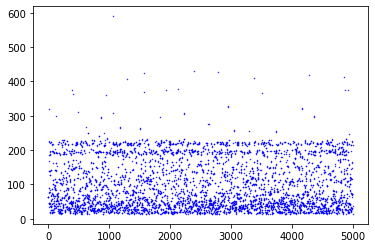

In [151]:
plt.scatter(range(5000), pulse_Go_03[0, :5000], s=0.2, c='b')
plt.show()

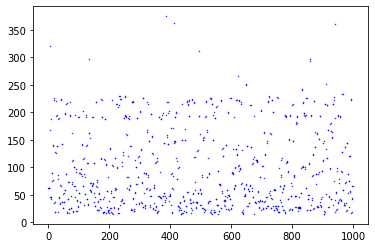

In [152]:
plt.scatter(range(1000), pulse_Go_03[0, :1000], s=0.2, c='b')
plt.show()

In [157]:
num4 = int(pulse_Go_03.shape[1]/5000)
dataSet5 = np.zeros((num4, 5000))
for i in range(num4):
    dataSet5[i, :]= pulse_Go_03[0, i * 5000: i * 5000 + 5000]
dataSet5.shape, dataSet5

((2061, 5000), array([[ 62.,  63.,  63., ...,  37.,  15., 216.],
        [217., 197., 199., ..., 186.,  29.,  29.],
        [202., 203., 138., ..., 128., 127., 112.],
        ...,
        [ 27.,  28.,  24., ..., 200., 198.,  51.],
        [ 24.,  23., 113., ...,  78., 115., 118.],
        [156.,  29.,  29., ..., 193., 195.,  14.]]))

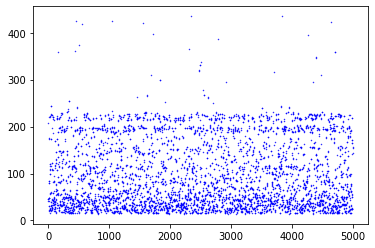

In [162]:
plt.scatter(range(5000), dataSet5[100, :], s=0.2, c='b')
plt.show()

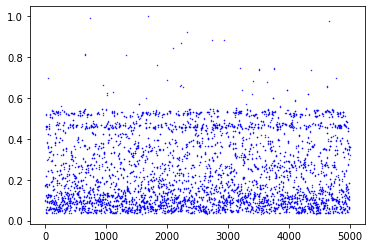

In [163]:
plt.scatter(range(5000), dataSet5[120, :]/dataSet5[120, :].max(), s=0.2, c='b')
plt.show()

In [164]:
num5 = int(pulse_Go_02.shape[1]/5000)
dataSet6 = np.zeros((num5, 5000))
for i in range(num5):
    dataSet6[i, :] = pulse_Go_02[0, i * 5000 : i * 5000 + 5000]
dataSet6.shape, dataSet6

((352, 5000), array([[152., 153.,  30., ...,  27.,  96.,  97.],
        [ 59.,  61.,  35., ..., 166.,  29.,  31.],
        [ 20.,  21., 145., ..., 196., 228., 227.],
        ...,
        [ 47.,  47.,  60., ..., 130., 131.,  18.],
        [114., 114.,  35., ..., 137., 101., 103.],
        [ 97.,  98., 132., ...,  48.,  48.,  51.]]))

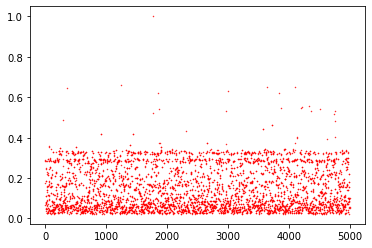

In [168]:
plt.scatter(range(5000), dataSet6[100, :]/dataSet6[100, :].max(), s=0.2, c='r')
plt.show()

In [183]:
dataSet5 = np.vstack((dataSet5, dataSet6))
dataSet5.shape

(2413, 5000)

In [185]:
dataSet, dataSet.shape, dataSet3.shape

(array([[ 39.,  41.,  36., ...,  81.,  82.,  32.],
        [ 33.,  20.,  28., ..., 111., 109.,  84.],
        [ 83.,  41.,  38., ...,  37.,  48.,  51.],
        ...,
        [ 47.,  47.,  60., ..., 130., 131.,  18.],
        [114., 114.,  35., ..., 137., 101., 103.],
        [ 97.,  98., 132., ...,  48.,  48.,  51.]]),
 (4271, 5000),
 (1501, 5000))

In [184]:
dataSet = np.vstack((dataSet, dataSet5))
dataSet.shape, dataSet

((4271, 5000), array([[ 39.,  41.,  36., ...,  81.,  82.,  32.],
        [ 33.,  20.,  28., ..., 111., 109.,  84.],
        [ 83.,  41.,  38., ...,  37.,  48.,  51.],
        ...,
        [ 47.,  47.,  60., ..., 130., 131.,  18.],
        [114., 114.,  35., ..., 137., 101., 103.],
        [ 97.,  98., 132., ...,  48.,  48.,  51.]]))

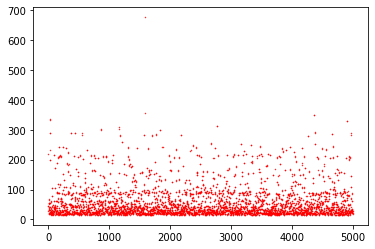

In [306]:
plt.scatter(range(5000), dataSet_Eu[1, :], s=0.2, c='r')
plt.show()

### Eu数据处理

In [303]:
start = time.time()
fr = open('../Cs137data/lis/Eu155-10min-01.Lis', 'rb')
pulse_Eu_10min, rgo1, repgo1 = get_pulse_data(fr)
end = time.time()
print('time is : % 0.3fs' % (end - start))
pulse_Eu_10min.shape

N/A% (0 of 62230) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (68 of 62230) |                     | Elapsed Time: 0:00:00 ETA:   0:01:32
  0% (158 of 62230) |                    | Elapsed Time: 0:00:00 ETA:   0:01:19
  0% (253 of 62230) |                    | Elapsed Time: 0:00:00 ETA:   0:01:14
  0% (348 of 62230) |                    | Elapsed Time: 0:00:00 ETA:   0:01:11
  0% (438 of 62230) |                    | Elapsed Time: 0:00:00 ETA:   0:01:11
  0% (536 of 62230) |                    | Elapsed Time: 0:00:00 ETA:   0:01:09
  1% (631 of 62230) |                    | Elapsed Time: 0:00:00 ETA:   0:01:08
  1% (724 of 62230) |                    | Elapsed Time: 0:00:00 ETA:   0:01:08
  1% (788 of 62230) |                    | Elapsed Time: 0:00:00 ETA:   0:01:08
  1% (884 of 62230) |                    | Elapsed Time: 0:00:01 ETA:   0:01:08
  1% (983 of 62230) |                    | Elapsed Time: 0:00:01 ETA:   0:01:07
  1% (1076 of 62230) |                  

 15% (9431 of 62230) |##                 | Elapsed Time: 0:00:10 ETA:   0:00:56
 15% (9525 of 62230) |##                 | Elapsed Time: 0:00:10 ETA:   0:00:56
 15% (9622 of 62230) |##                 | Elapsed Time: 0:00:10 ETA:   0:00:55
 15% (9719 of 62230) |##                 | Elapsed Time: 0:00:10 ETA:   0:00:55
 15% (9818 of 62230) |##                 | Elapsed Time: 0:00:10 ETA:   0:00:55
 15% (9911 of 62230) |###                | Elapsed Time: 0:00:10 ETA:   0:00:55
 16% (10011 of 62230) |##                | Elapsed Time: 0:00:10 ETA:   0:00:55
 16% (10110 of 62230) |##                | Elapsed Time: 0:00:10 ETA:   0:00:55
 16% (10210 of 62230) |##                | Elapsed Time: 0:00:11 ETA:   0:00:54
 16% (10307 of 62230) |##                | Elapsed Time: 0:00:11 ETA:   0:00:54
 16% (10398 of 62230) |###               | Elapsed Time: 0:00:11 ETA:   0:00:54
 16% (10497 of 62230) |###               | Elapsed Time: 0:00:11 ETA:   0:00:54
 17% (10594 of 62230) |###              

 30% (19149 of 62230) |#####             | Elapsed Time: 0:00:20 ETA:   0:00:45
 30% (19246 of 62230) |#####             | Elapsed Time: 0:00:20 ETA:   0:00:45
 31% (19342 of 62230) |#####             | Elapsed Time: 0:00:20 ETA:   0:00:45
 31% (19440 of 62230) |#####             | Elapsed Time: 0:00:20 ETA:   0:00:44
 31% (19534 of 62230) |#####             | Elapsed Time: 0:00:20 ETA:   0:00:44
 31% (19632 of 62230) |#####             | Elapsed Time: 0:00:20 ETA:   0:00:44
 31% (19694 of 62230) |#####             | Elapsed Time: 0:00:21 ETA:   0:00:44
 31% (19778 of 62230) |#####             | Elapsed Time: 0:00:21 ETA:   0:00:44
 31% (19865 of 62230) |#####             | Elapsed Time: 0:00:21 ETA:   0:00:44
 32% (19957 of 62230) |#####             | Elapsed Time: 0:00:21 ETA:   0:00:44
 32% (20047 of 62230) |#####             | Elapsed Time: 0:00:21 ETA:   0:00:44
 32% (20139 of 62230) |#####             | Elapsed Time: 0:00:21 ETA:   0:00:45
 32% (20230 of 62230) |#####            

 46% (28738 of 62230) |########          | Elapsed Time: 0:00:30 ETA:   0:00:35
 46% (28827 of 62230) |########          | Elapsed Time: 0:00:30 ETA:   0:00:35
 46% (28930 of 62230) |########          | Elapsed Time: 0:00:30 ETA:   0:00:34
 46% (29025 of 62230) |########          | Elapsed Time: 0:00:30 ETA:   0:00:34
 46% (29115 of 62230) |########          | Elapsed Time: 0:00:31 ETA:   0:00:34
 46% (29207 of 62230) |########          | Elapsed Time: 0:00:31 ETA:   0:00:34
 47% (29301 of 62230) |########          | Elapsed Time: 0:00:31 ETA:   0:00:34
 47% (29398 of 62230) |########          | Elapsed Time: 0:00:31 ETA:   0:00:34
 47% (29492 of 62230) |########          | Elapsed Time: 0:00:31 ETA:   0:00:34
 47% (29582 of 62230) |########          | Elapsed Time: 0:00:31 ETA:   0:00:34
 47% (29678 of 62230) |########          | Elapsed Time: 0:00:31 ETA:   0:00:34
 47% (29782 of 62230) |########          | Elapsed Time: 0:00:31 ETA:   0:00:33
 48% (29881 of 62230) |########         

 61% (38545 of 62230) |###########       | Elapsed Time: 0:00:40 ETA:   0:00:24
 62% (38599 of 62230) |###########       | Elapsed Time: 0:00:40 ETA:   0:00:24
 62% (38697 of 62230) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:24
 62% (38800 of 62230) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:24
 62% (38896 of 62230) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:24
 62% (38990 of 62230) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:23
 62% (39094 of 62230) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:23
 62% (39188 of 62230) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:23
 63% (39285 of 62230) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:23
 63% (39382 of 62230) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:23
 63% (39480 of 62230) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:23
 63% (39579 of 62230) |###########       | Elapsed Time: 0:00:41 ETA:   0:00:23
 63% (39677 of 62230) |###########      

 77% (48293 of 62230) |#############     | Elapsed Time: 0:00:51 ETA:   0:00:14
 77% (48390 of 62230) |#############     | Elapsed Time: 0:00:51 ETA:   0:00:14
 77% (48486 of 62230) |##############    | Elapsed Time: 0:00:51 ETA:   0:00:14
 78% (48582 of 62230) |##############    | Elapsed Time: 0:00:51 ETA:   0:00:14
 78% (48679 of 62230) |##############    | Elapsed Time: 0:00:51 ETA:   0:00:13
 78% (48772 of 62230) |##############    | Elapsed Time: 0:00:51 ETA:   0:00:13
 78% (48839 of 62230) |##############    | Elapsed Time: 0:00:51 ETA:   0:00:13
 78% (48937 of 62230) |##############    | Elapsed Time: 0:00:51 ETA:   0:00:13
 78% (49028 of 62230) |##############    | Elapsed Time: 0:00:51 ETA:   0:00:13
 78% (49127 of 62230) |##############    | Elapsed Time: 0:00:51 ETA:   0:00:13
 79% (49227 of 62230) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:13
 79% (49321 of 62230) |##############    | Elapsed Time: 0:00:52 ETA:   0:00:13
 79% (49417 of 62230) |##############   

 93% (58070 of 62230) |################  | Elapsed Time: 0:01:01 ETA:   0:00:04
 93% (58158 of 62230) |################  | Elapsed Time: 0:01:01 ETA:   0:00:04
 93% (58253 of 62230) |################  | Elapsed Time: 0:01:01 ETA:   0:00:04
 93% (58345 of 62230) |################  | Elapsed Time: 0:01:01 ETA:   0:00:04
 93% (58446 of 62230) |################  | Elapsed Time: 0:01:01 ETA:   0:00:04
 94% (58539 of 62230) |################  | Elapsed Time: 0:01:01 ETA:   0:00:03
 94% (58643 of 62230) |################  | Elapsed Time: 0:01:01 ETA:   0:00:03
 94% (58741 of 62230) |################  | Elapsed Time: 0:01:01 ETA:   0:00:03
 94% (58841 of 62230) |################# | Elapsed Time: 0:01:02 ETA:   0:00:03
 94% (58933 of 62230) |################# | Elapsed Time: 0:01:02 ETA:   0:00:03
 94% (59030 of 62230) |################# | Elapsed Time: 0:01:02 ETA:   0:00:03
 94% (59080 of 62230) |################# | Elapsed Time: 0:01:02 ETA:   0:00:03
 95% (59175 of 62230) |#################

time is :  66.968s


(1, 804375)

In [304]:
print('time = %0.3fs' % (end - start))

time = 66.968s


In [305]:
num_Eu = int(pulse_Eu_10min.shape[1]/5000)
print('num_Eu = %d' % num_Eu)
dataSet_Eu = np.zeros((num_Eu, 5000))
for i in range(num_Eu):
    dataSet_Eu[i, :] = pulse_Eu_10min[0, i * 5000 : i * 5000 + 5000]
dataSet_Eu.shape, dataSet_Eu

num_Eu = 160


((160, 5000), array([[ 29.,  27., 236., ...,  27.,  27., 219.],
        [218.,  44.,  44., ...,  19.,  21.,  28.],
        [ 27.,  54.,  56., ...,  78.,  77.,  21.],
        ...,
        [ 50.,  52.,  36., ...,  28.,  42.,  41.],
        [ 25.,  23.,  20., ...,  42.,  41.,  48.],
        [ 50.,  34.,  35., ..., 172.,  87.,  88.]]))

### 数据合并

In [311]:
dataSet = np.delete(dataSet, range(dataSet3.shape[0] + dataSet4.shape[0] + dataSet5.shape[0], dataSet.shape[0]), 
                    axis=0)
dataSet.shape

(4271, 5000)

In [312]:
dataSet = np.vstack((dataSet, dataSet_Eu))

In [313]:
dataSet.shape

(4431, 5000)

### Cs137， Go60混合数据

In [261]:
start = time.time()
fr = open('../Cs137data/lis/Cs_Go_10min_01.Lis', 'rb')
pulse_Cs_Go_10min, rgo1, repgo1 = get_pulse_data(fr)
end = time.time()
print('time is : % 0.3fs' % (end - start))
pulse_Cs_Go_10min.shape

N/A% (0 of 112028) |                     | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (10 of 112028) |                    | Elapsed Time: 0:00:00 ETA:   0:19:05
  0% (22 of 112028) |                    | Elapsed Time: 0:00:00 ETA:   0:17:41
  0% (35 of 112028) |                    | Elapsed Time: 0:00:00 ETA:   0:16:58
  0% (45 of 112028) |                    | Elapsed Time: 0:00:00 ETA:   0:17:27
  0% (57 of 112028) |                    | Elapsed Time: 0:00:00 ETA:   0:17:05
  0% (69 of 112028) |                    | Elapsed Time: 0:00:00 ETA:   0:16:53
  0% (81 of 112028) |                    | Elapsed Time: 0:00:00 ETA:   0:16:48
  0% (93 of 112028) |                    | Elapsed Time: 0:00:00 ETA:   0:16:46
  0% (105 of 112028) |                   | Elapsed Time: 0:00:00 ETA:   0:16:40
  0% (118 of 112028) |                   | Elapsed Time: 0:00:01 ETA:   0:16:28
  0% (129 of 112028) |                   | Elapsed Time: 0:00:01 ETA:   0:16:31
  0% (141 of 112028) |                  

  1% (1246 of 112028) |                  | Elapsed Time: 0:00:10 ETA:   0:15:30
  1% (1259 of 112028) |                  | Elapsed Time: 0:00:10 ETA:   0:15:21
  1% (1270 of 112028) |                  | Elapsed Time: 0:00:11 ETA:   0:15:21
  1% (1282 of 112028) |                  | Elapsed Time: 0:00:11 ETA:   0:15:16
  1% (1293 of 112028) |                  | Elapsed Time: 0:00:11 ETA:   0:15:12
  1% (1303 of 112028) |                  | Elapsed Time: 0:00:11 ETA:   0:15:31
  1% (1315 of 112028) |                  | Elapsed Time: 0:00:11 ETA:   0:15:38
  1% (1326 of 112028) |                  | Elapsed Time: 0:00:11 ETA:   0:15:50
  1% (1339 of 112028) |                  | Elapsed Time: 0:00:11 ETA:   0:15:48
  1% (1351 of 112028) |                  | Elapsed Time: 0:00:11 ETA:   0:15:54
  1% (1364 of 112028) |                  | Elapsed Time: 0:00:11 ETA:   0:15:53
  1% (1377 of 112028) |                  | Elapsed Time: 0:00:11 ETA:   0:15:51
  1% (1390 of 112028) |                 

  2% (2501 of 112028) |                  | Elapsed Time: 0:00:21 ETA:   0:14:40
  2% (2518 of 112028) |                  | Elapsed Time: 0:00:21 ETA:   0:14:25
  2% (2532 of 112028) |                  | Elapsed Time: 0:00:21 ETA:   0:14:24
  2% (2545 of 112028) |                  | Elapsed Time: 0:00:21 ETA:   0:14:16
  2% (2560 of 112028) |                  | Elapsed Time: 0:00:21 ETA:   0:14:11
  2% (2575 of 112028) |                  | Elapsed Time: 0:00:22 ETA:   0:13:55
  2% (2590 of 112028) |                  | Elapsed Time: 0:00:22 ETA:   0:13:51
  2% (2602 of 112028) |                  | Elapsed Time: 0:00:22 ETA:   0:13:53
  2% (2617 of 112028) |                  | Elapsed Time: 0:00:22 ETA:   0:13:48
  2% (2632 of 112028) |                  | Elapsed Time: 0:00:22 ETA:   0:13:41
  2% (2642 of 112028) |                  | Elapsed Time: 0:00:22 ETA:   0:13:48
  2% (2653 of 112028) |                  | Elapsed Time: 0:00:22 ETA:   0:13:49
  2% (2663 of 112028) |                 

  3% (3909 of 112028) |                  | Elapsed Time: 0:00:32 ETA:   0:13:11
  3% (3921 of 112028) |                  | Elapsed Time: 0:00:32 ETA:   0:13:08
  3% (3933 of 112028) |                  | Elapsed Time: 0:00:32 ETA:   0:13:15
  3% (3948 of 112028) |                  | Elapsed Time: 0:00:32 ETA:   0:13:14
  3% (3963 of 112028) |                  | Elapsed Time: 0:00:32 ETA:   0:13:08
  3% (3975 of 112028) |                  | Elapsed Time: 0:00:32 ETA:   0:13:14
  3% (3991 of 112028) |                  | Elapsed Time: 0:00:32 ETA:   0:13:12
  3% (4006 of 112028) |                  | Elapsed Time: 0:00:32 ETA:   0:13:03
  3% (4021 of 112028) |                  | Elapsed Time: 0:00:33 ETA:   0:13:05
  3% (4033 of 112028) |                  | Elapsed Time: 0:00:33 ETA:   0:13:15
  3% (4045 of 112028) |                  | Elapsed Time: 0:00:33 ETA:   0:13:24
  3% (4060 of 112028) |                  | Elapsed Time: 0:00:33 ETA:   0:13:13
  3% (4073 of 112028) |                 

  4% (5390 of 112028) |                  | Elapsed Time: 0:00:43 ETA:   0:12:39
  4% (5403 of 112028) |                  | Elapsed Time: 0:00:43 ETA:   0:12:39
  4% (5420 of 112028) |                  | Elapsed Time: 0:00:43 ETA:   0:12:33
  4% (5433 of 112028) |                  | Elapsed Time: 0:00:43 ETA:   0:12:33
  4% (5445 of 112028) |                  | Elapsed Time: 0:00:43 ETA:   0:12:40
  4% (5457 of 112028) |                  | Elapsed Time: 0:00:43 ETA:   0:12:39
  4% (5470 of 112028) |                  | Elapsed Time: 0:00:43 ETA:   0:12:41
  4% (5482 of 112028) |                  | Elapsed Time: 0:00:43 ETA:   0:12:50
  4% (5494 of 112028) |                  | Elapsed Time: 0:00:43 ETA:   0:12:58
  4% (5509 of 112028) |                  | Elapsed Time: 0:00:43 ETA:   0:12:49
  4% (5524 of 112028) |                  | Elapsed Time: 0:00:44 ETA:   0:12:53
  4% (5539 of 112028) |                  | Elapsed Time: 0:00:44 ETA:   0:12:56
  4% (5552 of 112028) |                 

  6% (6858 of 112028) |#                 | Elapsed Time: 0:00:53 ETA:   0:12:32
  6% (6869 of 112028) |#                 | Elapsed Time: 0:00:53 ETA:   0:12:37
  6% (6885 of 112028) |#                 | Elapsed Time: 0:00:53 ETA:   0:12:35
  6% (6897 of 112028) |#                 | Elapsed Time: 0:00:53 ETA:   0:12:44
  6% (6912 of 112028) |#                 | Elapsed Time: 0:00:54 ETA:   0:12:32
  6% (6927 of 112028) |#                 | Elapsed Time: 0:00:54 ETA:   0:12:35
  6% (6944 of 112028) |#                 | Elapsed Time: 0:00:54 ETA:   0:12:31
  6% (6957 of 112028) |#                 | Elapsed Time: 0:00:54 ETA:   0:12:36
  6% (6970 of 112028) |#                 | Elapsed Time: 0:00:54 ETA:   0:12:34
  6% (6983 of 112028) |#                 | Elapsed Time: 0:00:54 ETA:   0:12:42
  6% (6999 of 112028) |#                 | Elapsed Time: 0:00:54 ETA:   0:12:43
  6% (7015 of 112028) |#                 | Elapsed Time: 0:00:54 ETA:   0:12:44
  6% (7028 of 112028) |#                

  7% (8355 of 112028) |#                 | Elapsed Time: 0:01:04 ETA:   0:12:20
  7% (8371 of 112028) |#                 | Elapsed Time: 0:01:04 ETA:   0:12:18
  7% (8387 of 112028) |#                 | Elapsed Time: 0:01:04 ETA:   0:12:15
  7% (8399 of 112028) |#                 | Elapsed Time: 0:01:04 ETA:   0:12:13
  7% (8415 of 112028) |#                 | Elapsed Time: 0:01:04 ETA:   0:12:06
  7% (8431 of 112028) |#                 | Elapsed Time: 0:01:04 ETA:   0:12:00
  7% (8446 of 112028) |#                 | Elapsed Time: 0:01:05 ETA:   0:11:58
  7% (8458 of 112028) |#                 | Elapsed Time: 0:01:05 ETA:   0:12:01
  7% (8474 of 112028) |#                 | Elapsed Time: 0:01:05 ETA:   0:11:59
  7% (8491 of 112028) |#                 | Elapsed Time: 0:01:05 ETA:   0:11:55
  7% (8505 of 112028) |#                 | Elapsed Time: 0:01:05 ETA:   0:12:00
  7% (8522 of 112028) |#                 | Elapsed Time: 0:01:05 ETA:   0:11:52
  7% (8534 of 112028) |#                

  8% (9847 of 112028) |#                 | Elapsed Time: 0:01:15 ETA:   0:12:08
  8% (9859 of 112028) |#                 | Elapsed Time: 0:01:15 ETA:   0:12:05
  8% (9874 of 112028) |#                 | Elapsed Time: 0:01:15 ETA:   0:12:13
  8% (9890 of 112028) |#                 | Elapsed Time: 0:01:15 ETA:   0:12:18
  8% (9906 of 112028) |#                 | Elapsed Time: 0:01:15 ETA:   0:12:09
  8% (9918 of 112028) |#                 | Elapsed Time: 0:01:15 ETA:   0:12:17
  8% (9934 of 112028) |#                 | Elapsed Time: 0:01:15 ETA:   0:12:12
  8% (9949 of 112028) |#                 | Elapsed Time: 0:01:15 ETA:   0:12:15
  8% (9965 of 112028) |#                 | Elapsed Time: 0:01:16 ETA:   0:12:02
  8% (9977 of 112028) |#                 | Elapsed Time: 0:01:16 ETA:   0:12:10
  8% (9993 of 112028) |#                 | Elapsed Time: 0:01:16 ETA:   0:12:09
  8% (10007 of 112028) |#                | Elapsed Time: 0:01:16 ETA:   0:12:13
  8% (10019 of 112028) |#               

 10% (11326 of 112028) |#                | Elapsed Time: 0:01:26 ETA:   0:12:36
 10% (11342 of 112028) |#                | Elapsed Time: 0:01:26 ETA:   0:12:21
 10% (11358 of 112028) |#                | Elapsed Time: 0:01:26 ETA:   0:12:19
 10% (11370 of 112028) |#                | Elapsed Time: 0:01:26 ETA:   0:12:25
 10% (11386 of 112028) |#                | Elapsed Time: 0:01:26 ETA:   0:12:22
 10% (11403 of 112028) |#                | Elapsed Time: 0:01:26 ETA:   0:12:17
 10% (11419 of 112028) |#                | Elapsed Time: 0:01:26 ETA:   0:12:13
 10% (11432 of 112028) |#                | Elapsed Time: 0:01:26 ETA:   0:12:17
 10% (11447 of 112028) |#                | Elapsed Time: 0:01:26 ETA:   0:12:14
 10% (11463 of 112028) |#                | Elapsed Time: 0:01:26 ETA:   0:12:11
 10% (11479 of 112028) |#                | Elapsed Time: 0:01:27 ETA:   0:12:05
 10% (11490 of 112028) |#                | Elapsed Time: 0:01:27 ETA:   0:12:12
 10% (11505 of 112028) |#               

 11% (12806 of 112028) |#                | Elapsed Time: 0:01:36 ETA:   0:11:48
 11% (12821 of 112028) |#                | Elapsed Time: 0:01:36 ETA:   0:11:48
 11% (12834 of 112028) |#                | Elapsed Time: 0:01:37 ETA:   0:11:58
 11% (12850 of 112028) |#                | Elapsed Time: 0:01:37 ETA:   0:11:51
 11% (12867 of 112028) |#                | Elapsed Time: 0:01:37 ETA:   0:11:47
 11% (12883 of 112028) |#                | Elapsed Time: 0:01:37 ETA:   0:11:47
 11% (12895 of 112028) |#                | Elapsed Time: 0:01:37 ETA:   0:11:56
 11% (12911 of 112028) |#                | Elapsed Time: 0:01:37 ETA:   0:11:47
 11% (12927 of 112028) |#                | Elapsed Time: 0:01:37 ETA:   0:11:47
 11% (12942 of 112028) |#                | Elapsed Time: 0:01:37 ETA:   0:11:49
 11% (12954 of 112028) |#                | Elapsed Time: 0:01:37 ETA:   0:11:57
 11% (12970 of 112028) |#                | Elapsed Time: 0:01:37 ETA:   0:11:46
 11% (12986 of 112028) |#               

 12% (14190 of 112028) |##               | Elapsed Time: 0:01:47 ETA:   0:14:06
 12% (14203 of 112028) |##               | Elapsed Time: 0:01:47 ETA:   0:14:15
 12% (14212 of 112028) |##               | Elapsed Time: 0:01:47 ETA:   0:14:31
 12% (14225 of 112028) |##               | Elapsed Time: 0:01:47 ETA:   0:14:18
 12% (14239 of 112028) |##               | Elapsed Time: 0:01:47 ETA:   0:14:17
 12% (14249 of 112028) |##               | Elapsed Time: 0:01:48 ETA:   0:14:29
 12% (14261 of 112028) |##               | Elapsed Time: 0:01:48 ETA:   0:14:22
 12% (14273 of 112028) |##               | Elapsed Time: 0:01:48 ETA:   0:14:21
 12% (14286 of 112028) |##               | Elapsed Time: 0:01:48 ETA:   0:14:13
 12% (14300 of 112028) |##               | Elapsed Time: 0:01:48 ETA:   0:14:05
 12% (14315 of 112028) |##               | Elapsed Time: 0:01:48 ETA:   0:13:47
 12% (14331 of 112028) |##               | Elapsed Time: 0:01:48 ETA:   0:13:35
 12% (14342 of 112028) |##              

 13% (15622 of 112028) |##               | Elapsed Time: 0:01:58 ETA:   0:12:15
 13% (15635 of 112028) |##               | Elapsed Time: 0:01:58 ETA:   0:12:24
 13% (15650 of 112028) |##               | Elapsed Time: 0:01:58 ETA:   0:12:20
 13% (15666 of 112028) |##               | Elapsed Time: 0:01:58 ETA:   0:12:12
 13% (15678 of 112028) |##               | Elapsed Time: 0:01:58 ETA:   0:12:12
 14% (15694 of 112028) |##               | Elapsed Time: 0:01:58 ETA:   0:12:09
 14% (15709 of 112028) |##               | Elapsed Time: 0:01:58 ETA:   0:12:08
 14% (15721 of 112028) |##               | Elapsed Time: 0:01:59 ETA:   0:12:18
 14% (15736 of 112028) |##               | Elapsed Time: 0:01:59 ETA:   0:12:09
 14% (15751 of 112028) |##               | Elapsed Time: 0:01:59 ETA:   0:12:12
 14% (15766 of 112028) |##               | Elapsed Time: 0:01:59 ETA:   0:12:14
 14% (15776 of 112028) |##               | Elapsed Time: 0:01:59 ETA:   0:12:14
 14% (15790 of 112028) |##              

 15% (17104 of 112028) |##               | Elapsed Time: 0:02:08 ETA:   0:11:19
 15% (17119 of 112028) |##               | Elapsed Time: 0:02:09 ETA:   0:11:22
 15% (17134 of 112028) |##               | Elapsed Time: 0:02:09 ETA:   0:11:24
 15% (17149 of 112028) |##               | Elapsed Time: 0:02:09 ETA:   0:11:24
 15% (17161 of 112028) |##               | Elapsed Time: 0:02:09 ETA:   0:11:25
 15% (17176 of 112028) |##               | Elapsed Time: 0:02:09 ETA:   0:11:25
 15% (17192 of 112028) |##               | Elapsed Time: 0:02:09 ETA:   0:11:25
 15% (17208 of 112028) |##               | Elapsed Time: 0:02:09 ETA:   0:11:26
 15% (17220 of 112028) |##               | Elapsed Time: 0:02:09 ETA:   0:11:26
 15% (17235 of 112028) |##               | Elapsed Time: 0:02:09 ETA:   0:11:27
 15% (17251 of 112028) |##               | Elapsed Time: 0:02:10 ETA:   0:11:21
 15% (17267 of 112028) |##               | Elapsed Time: 0:02:10 ETA:   0:11:11
 15% (17280 of 112028) |##              

 16% (18591 of 112028) |##               | Elapsed Time: 0:02:19 ETA:   0:11:15
 16% (18606 of 112028) |##               | Elapsed Time: 0:02:19 ETA:   0:11:15
 16% (18618 of 112028) |##               | Elapsed Time: 0:02:19 ETA:   0:11:23
 16% (18633 of 112028) |##               | Elapsed Time: 0:02:19 ETA:   0:11:21
 16% (18648 of 112028) |##               | Elapsed Time: 0:02:20 ETA:   0:11:12
 16% (18663 of 112028) |##               | Elapsed Time: 0:02:20 ETA:   0:11:10
 16% (18675 of 112028) |##               | Elapsed Time: 0:02:20 ETA:   0:11:18
 16% (18690 of 112028) |##               | Elapsed Time: 0:02:20 ETA:   0:11:14
 16% (18706 of 112028) |##               | Elapsed Time: 0:02:20 ETA:   0:11:09
 16% (18723 of 112028) |##               | Elapsed Time: 0:02:20 ETA:   0:11:06
 16% (18736 of 112028) |##               | Elapsed Time: 0:02:20 ETA:   0:11:14
 16% (18751 of 112028) |##               | Elapsed Time: 0:02:20 ETA:   0:11:13
 16% (18766 of 112028) |##              

 17% (19933 of 112028) |###              | Elapsed Time: 0:02:30 ETA:   0:12:09
 17% (19947 of 112028) |###              | Elapsed Time: 0:02:30 ETA:   0:12:11
 17% (19961 of 112028) |###              | Elapsed Time: 0:02:30 ETA:   0:11:56
 17% (19972 of 112028) |###              | Elapsed Time: 0:02:30 ETA:   0:12:06
 17% (19987 of 112028) |###              | Elapsed Time: 0:02:30 ETA:   0:12:08
 17% (20002 of 112028) |###              | Elapsed Time: 0:02:30 ETA:   0:12:01
 17% (20014 of 112028) |###              | Elapsed Time: 0:02:31 ETA:   0:12:06
 17% (20028 of 112028) |###              | Elapsed Time: 0:02:31 ETA:   0:12:00
 17% (20041 of 112028) |###              | Elapsed Time: 0:02:31 ETA:   0:11:54
 17% (20052 of 112028) |###              | Elapsed Time: 0:02:31 ETA:   0:12:04
 17% (20067 of 112028) |###              | Elapsed Time: 0:02:31 ETA:   0:12:05
 17% (20083 of 112028) |###              | Elapsed Time: 0:02:31 ETA:   0:11:56
 17% (20098 of 112028) |###             

 19% (21321 of 112028) |###              | Elapsed Time: 0:02:41 ETA:   0:11:55
 19% (21333 of 112028) |###              | Elapsed Time: 0:02:41 ETA:   0:11:51
 19% (21349 of 112028) |###              | Elapsed Time: 0:02:41 ETA:   0:11:39
 19% (21364 of 112028) |###              | Elapsed Time: 0:02:41 ETA:   0:11:33
 19% (21376 of 112028) |###              | Elapsed Time: 0:02:41 ETA:   0:11:39
 19% (21391 of 112028) |###              | Elapsed Time: 0:02:41 ETA:   0:11:31
 19% (21406 of 112028) |###              | Elapsed Time: 0:02:41 ETA:   0:11:30
 19% (21421 of 112028) |###              | Elapsed Time: 0:02:41 ETA:   0:11:28
 19% (21433 of 112028) |###              | Elapsed Time: 0:02:42 ETA:   0:11:29
 19% (21446 of 112028) |###              | Elapsed Time: 0:02:42 ETA:   0:11:54
 19% (21459 of 112028) |###              | Elapsed Time: 0:02:42 ETA:   0:11:57
 19% (21470 of 112028) |###              | Elapsed Time: 0:02:42 ETA:   0:11:56
 19% (21485 of 112028) |###             

 20% (22725 of 112028) |###              | Elapsed Time: 0:02:51 ETA:   0:11:15
 20% (22739 of 112028) |###              | Elapsed Time: 0:02:52 ETA:   0:11:13
 20% (22751 of 112028) |###              | Elapsed Time: 0:02:52 ETA:   0:11:11
 20% (22765 of 112028) |###              | Elapsed Time: 0:02:52 ETA:   0:11:15
 20% (22780 of 112028) |###              | Elapsed Time: 0:02:52 ETA:   0:11:16
 20% (22792 of 112028) |###              | Elapsed Time: 0:02:52 ETA:   0:11:23
 20% (22807 of 112028) |###              | Elapsed Time: 0:02:52 ETA:   0:11:15
 20% (22820 of 112028) |###              | Elapsed Time: 0:02:52 ETA:   0:11:20
 20% (22830 of 112028) |###              | Elapsed Time: 0:02:52 ETA:   0:11:33
 20% (22843 of 112028) |###              | Elapsed Time: 0:02:52 ETA:   0:11:29
 20% (22858 of 112028) |###              | Elapsed Time: 0:02:53 ETA:   0:11:30
 20% (22869 of 112028) |###              | Elapsed Time: 0:02:53 ETA:   0:11:37
 20% (22884 of 112028) |###             

 21% (24135 of 112028) |###              | Elapsed Time: 0:03:02 ETA:   0:10:50
 21% (24149 of 112028) |###              | Elapsed Time: 0:03:02 ETA:   0:10:51
 21% (24160 of 112028) |###              | Elapsed Time: 0:03:02 ETA:   0:11:00
 21% (24174 of 112028) |###              | Elapsed Time: 0:03:02 ETA:   0:10:51
 21% (24189 of 112028) |###              | Elapsed Time: 0:03:03 ETA:   0:10:52
 21% (24202 of 112028) |###              | Elapsed Time: 0:03:03 ETA:   0:10:58
 21% (24217 of 112028) |###              | Elapsed Time: 0:03:03 ETA:   0:10:49
 21% (24232 of 112028) |###              | Elapsed Time: 0:03:03 ETA:   0:10:50
 21% (24248 of 112028) |###              | Elapsed Time: 0:03:03 ETA:   0:10:49
 21% (24260 of 112028) |###              | Elapsed Time: 0:03:03 ETA:   0:10:50
 21% (24274 of 112028) |###              | Elapsed Time: 0:03:03 ETA:   0:10:52
 21% (24288 of 112028) |###              | Elapsed Time: 0:03:03 ETA:   0:10:56
 21% (24298 of 112028) |###             

 22% (25539 of 112028) |###              | Elapsed Time: 0:03:13 ETA:   0:10:32
 22% (25556 of 112028) |###              | Elapsed Time: 0:03:13 ETA:   0:10:20
 22% (25572 of 112028) |###              | Elapsed Time: 0:03:13 ETA:   0:10:19
 22% (25587 of 112028) |###              | Elapsed Time: 0:03:13 ETA:   0:10:18
 22% (25599 of 112028) |###              | Elapsed Time: 0:03:13 ETA:   0:10:24
 22% (25615 of 112028) |###              | Elapsed Time: 0:03:13 ETA:   0:10:13
 22% (25630 of 112028) |###              | Elapsed Time: 0:03:13 ETA:   0:10:15
 22% (25643 of 112028) |###              | Elapsed Time: 0:03:14 ETA:   0:10:18
 22% (25660 of 112028) |###              | Elapsed Time: 0:03:14 ETA:   0:10:15
 22% (25676 of 112028) |###              | Elapsed Time: 0:03:14 ETA:   0:10:07
 22% (25691 of 112028) |###              | Elapsed Time: 0:03:14 ETA:   0:10:07
 22% (25704 of 112028) |###              | Elapsed Time: 0:03:14 ETA:   0:10:15
 22% (25717 of 112028) |###             

 24% (27014 of 112028) |####             | Elapsed Time: 0:03:24 ETA:   0:10:24
 24% (27025 of 112028) |####             | Elapsed Time: 0:03:24 ETA:   0:10:33
 24% (27040 of 112028) |####             | Elapsed Time: 0:03:24 ETA:   0:10:34
 24% (27051 of 112028) |####             | Elapsed Time: 0:03:24 ETA:   0:10:40
 24% (27065 of 112028) |####             | Elapsed Time: 0:03:24 ETA:   0:10:35
 24% (27080 of 112028) |####             | Elapsed Time: 0:03:24 ETA:   0:10:36
 24% (27093 of 112028) |####             | Elapsed Time: 0:03:24 ETA:   0:10:33
 24% (27107 of 112028) |####             | Elapsed Time: 0:03:24 ETA:   0:10:37
 24% (27121 of 112028) |####             | Elapsed Time: 0:03:24 ETA:   0:10:39
 24% (27136 of 112028) |####             | Elapsed Time: 0:03:25 ETA:   0:10:38
 24% (27147 of 112028) |####             | Elapsed Time: 0:03:25 ETA:   0:10:39
 24% (27163 of 112028) |####             | Elapsed Time: 0:03:25 ETA:   0:10:38
 24% (27176 of 112028) |####            

 25% (28418 of 112028) |####             | Elapsed Time: 0:03:34 ETA:   0:11:11
 25% (28433 of 112028) |####             | Elapsed Time: 0:03:35 ETA:   0:11:06
 25% (28445 of 112028) |####             | Elapsed Time: 0:03:35 ETA:   0:11:09
 25% (28461 of 112028) |####             | Elapsed Time: 0:03:35 ETA:   0:10:48
 25% (28477 of 112028) |####             | Elapsed Time: 0:03:35 ETA:   0:10:43
 25% (28492 of 112028) |####             | Elapsed Time: 0:03:35 ETA:   0:10:42
 25% (28505 of 112028) |####             | Elapsed Time: 0:03:35 ETA:   0:10:38
 25% (28521 of 112028) |####             | Elapsed Time: 0:03:35 ETA:   0:10:40
 25% (28536 of 112028) |####             | Elapsed Time: 0:03:35 ETA:   0:10:42
 25% (28552 of 112028) |####             | Elapsed Time: 0:03:35 ETA:   0:10:21
 25% (28564 of 112028) |####             | Elapsed Time: 0:03:35 ETA:   0:10:21
 25% (28579 of 112028) |####             | Elapsed Time: 0:03:36 ETA:   0:10:21
 25% (28594 of 112028) |####            

 26% (29899 of 112028) |####             | Elapsed Time: 0:03:45 ETA:   0:10:18
 26% (29914 of 112028) |####             | Elapsed Time: 0:03:45 ETA:   0:10:16
 26% (29927 of 112028) |####             | Elapsed Time: 0:03:45 ETA:   0:10:12
 26% (29940 of 112028) |####             | Elapsed Time: 0:03:45 ETA:   0:10:17
 26% (29952 of 112028) |####             | Elapsed Time: 0:03:46 ETA:   0:10:24
 26% (29965 of 112028) |####             | Elapsed Time: 0:03:46 ETA:   0:10:24
 26% (29977 of 112028) |####             | Elapsed Time: 0:03:46 ETA:   0:10:29
 26% (29990 of 112028) |####             | Elapsed Time: 0:03:46 ETA:   0:10:33
 26% (30006 of 112028) |####             | Elapsed Time: 0:03:46 ETA:   0:10:34
 26% (30022 of 112028) |####             | Elapsed Time: 0:03:46 ETA:   0:10:25
 26% (30035 of 112028) |####             | Elapsed Time: 0:03:46 ETA:   0:10:32
 26% (30050 of 112028) |####             | Elapsed Time: 0:03:46 ETA:   0:10:26
 26% (30065 of 112028) |####            

 27% (31347 of 112028) |####             | Elapsed Time: 0:03:56 ETA:   0:10:04
 27% (31362 of 112028) |####             | Elapsed Time: 0:03:56 ETA:   0:09:58
 28% (31378 of 112028) |####             | Elapsed Time: 0:03:56 ETA:   0:09:53
 28% (31394 of 112028) |####             | Elapsed Time: 0:03:56 ETA:   0:09:46
 28% (31405 of 112028) |####             | Elapsed Time: 0:03:56 ETA:   0:09:55
 28% (31421 of 112028) |####             | Elapsed Time: 0:03:56 ETA:   0:09:53
 28% (31437 of 112028) |####             | Elapsed Time: 0:03:57 ETA:   0:09:53
 28% (31449 of 112028) |####             | Elapsed Time: 0:03:57 ETA:   0:09:54
 28% (31465 of 112028) |####             | Elapsed Time: 0:03:57 ETA:   0:09:54
 28% (31479 of 112028) |####             | Elapsed Time: 0:03:57 ETA:   0:09:53
 28% (31494 of 112028) |####             | Elapsed Time: 0:03:57 ETA:   0:09:54
 28% (31509 of 112028) |####             | Elapsed Time: 0:03:57 ETA:   0:09:46
 28% (31521 of 112028) |####            

 29% (32822 of 112028) |####             | Elapsed Time: 0:04:07 ETA:   0:09:53
 29% (32837 of 112028) |####             | Elapsed Time: 0:04:07 ETA:   0:09:51
 29% (32851 of 112028) |####             | Elapsed Time: 0:04:07 ETA:   0:09:47
 29% (32861 of 112028) |####             | Elapsed Time: 0:04:07 ETA:   0:09:59
 29% (32875 of 112028) |####             | Elapsed Time: 0:04:07 ETA:   0:10:01
 29% (32890 of 112028) |####             | Elapsed Time: 0:04:07 ETA:   0:09:57
 29% (32902 of 112028) |####             | Elapsed Time: 0:04:07 ETA:   0:10:02
 29% (32919 of 112028) |####             | Elapsed Time: 0:04:07 ETA:   0:09:54
 29% (32933 of 112028) |####             | Elapsed Time: 0:04:08 ETA:   0:09:54
 29% (32949 of 112028) |####             | Elapsed Time: 0:04:08 ETA:   0:09:43
 29% (32961 of 112028) |#####            | Elapsed Time: 0:04:08 ETA:   0:09:48
 29% (32978 of 112028) |#####            | Elapsed Time: 0:04:08 ETA:   0:09:40
 29% (32988 of 112028) |#####           

 30% (34195 of 112028) |#####            | Elapsed Time: 0:04:17 ETA:   0:10:10
 30% (34208 of 112028) |#####            | Elapsed Time: 0:04:18 ETA:   0:09:56
 30% (34224 of 112028) |#####            | Elapsed Time: 0:04:18 ETA:   0:09:50
 30% (34240 of 112028) |#####            | Elapsed Time: 0:04:18 ETA:   0:09:35
 30% (34256 of 112028) |#####            | Elapsed Time: 0:04:18 ETA:   0:09:22
 30% (34267 of 112028) |#####            | Elapsed Time: 0:04:18 ETA:   0:09:18
 30% (34279 of 112028) |#####            | Elapsed Time: 0:04:18 ETA:   0:09:23
 30% (34291 of 112028) |#####            | Elapsed Time: 0:04:18 ETA:   0:09:26
 30% (34306 of 112028) |#####            | Elapsed Time: 0:04:18 ETA:   0:09:18
 30% (34320 of 112028) |#####            | Elapsed Time: 0:04:18 ETA:   0:09:20
 30% (34336 of 112028) |#####            | Elapsed Time: 0:04:18 ETA:   0:09:20
 30% (34348 of 112028) |#####            | Elapsed Time: 0:04:19 ETA:   0:09:22
 30% (34362 of 112028) |#####           

 31% (35701 of 112028) |#####            | Elapsed Time: 0:04:28 ETA:   0:08:59
 31% (35718 of 112028) |#####            | Elapsed Time: 0:04:28 ETA:   0:08:54
 31% (35734 of 112028) |#####            | Elapsed Time: 0:04:28 ETA:   0:08:55
 31% (35750 of 112028) |#####            | Elapsed Time: 0:04:28 ETA:   0:08:54
 31% (35757 of 112028) |#####            | Elapsed Time: 0:04:29 ETA:   0:09:07
 31% (35772 of 112028) |#####            | Elapsed Time: 0:04:29 ETA:   0:09:09
 31% (35785 of 112028) |#####            | Elapsed Time: 0:04:29 ETA:   0:09:15
 31% (35800 of 112028) |#####            | Elapsed Time: 0:04:29 ETA:   0:09:19
 31% (35816 of 112028) |#####            | Elapsed Time: 0:04:29 ETA:   0:09:14
 31% (35829 of 112028) |#####            | Elapsed Time: 0:04:29 ETA:   0:09:24
 31% (35842 of 112028) |#####            | Elapsed Time: 0:04:29 ETA:   0:09:32
 32% (35858 of 112028) |#####            | Elapsed Time: 0:04:29 ETA:   0:09:28
 32% (35874 of 112028) |#####           

 33% (37213 of 112028) |#####            | Elapsed Time: 0:04:39 ETA:   0:08:37
 33% (37230 of 112028) |#####            | Elapsed Time: 0:04:39 ETA:   0:08:36
 33% (37244 of 112028) |#####            | Elapsed Time: 0:04:39 ETA:   0:08:33
 33% (37260 of 112028) |#####            | Elapsed Time: 0:04:39 ETA:   0:08:32
 33% (37277 of 112028) |#####            | Elapsed Time: 0:04:39 ETA:   0:08:32
 33% (37290 of 112028) |#####            | Elapsed Time: 0:04:39 ETA:   0:08:46
 33% (37306 of 112028) |#####            | Elapsed Time: 0:04:40 ETA:   0:08:43
 33% (37322 of 112028) |#####            | Elapsed Time: 0:04:40 ETA:   0:08:42
 33% (37338 of 112028) |#####            | Elapsed Time: 0:04:40 ETA:   0:08:41
 33% (37352 of 112028) |#####            | Elapsed Time: 0:04:40 ETA:   0:08:46
 33% (37367 of 112028) |#####            | Elapsed Time: 0:04:40 ETA:   0:08:46
 33% (37383 of 112028) |#####            | Elapsed Time: 0:04:40 ETA:   0:08:41
 33% (37396 of 112028) |#####           

 34% (38751 of 112028) |#####            | Elapsed Time: 0:04:50 ETA:   0:08:15
 34% (38764 of 112028) |#####            | Elapsed Time: 0:04:50 ETA:   0:08:19
 34% (38778 of 112028) |#####            | Elapsed Time: 0:04:50 ETA:   0:08:22
 34% (38791 of 112028) |#####            | Elapsed Time: 0:04:50 ETA:   0:08:23
 34% (38805 of 112028) |#####            | Elapsed Time: 0:04:50 ETA:   0:08:27
 34% (38821 of 112028) |#####            | Elapsed Time: 0:04:50 ETA:   0:08:27
 34% (38834 of 112028) |#####            | Elapsed Time: 0:04:50 ETA:   0:08:31
 34% (38850 of 112028) |#####            | Elapsed Time: 0:04:50 ETA:   0:08:31
 34% (38867 of 112028) |#####            | Elapsed Time: 0:04:50 ETA:   0:08:26
 34% (38875 of 112028) |#####            | Elapsed Time: 0:04:51 ETA:   0:08:39
 34% (38887 of 112028) |#####            | Elapsed Time: 0:04:51 ETA:   0:08:47
 34% (38902 of 112028) |#####            | Elapsed Time: 0:04:51 ETA:   0:08:48
 34% (38917 of 112028) |#####           

 35% (40272 of 112028) |######           | Elapsed Time: 0:05:00 ETA:   0:08:24
 35% (40288 of 112028) |######           | Elapsed Time: 0:05:00 ETA:   0:08:22
 35% (40301 of 112028) |######           | Elapsed Time: 0:05:01 ETA:   0:08:26
 35% (40314 of 112028) |######           | Elapsed Time: 0:05:01 ETA:   0:08:31
 35% (40330 of 112028) |######           | Elapsed Time: 0:05:01 ETA:   0:08:25
 36% (40346 of 112028) |######           | Elapsed Time: 0:05:01 ETA:   0:08:27
 36% (40361 of 112028) |######           | Elapsed Time: 0:05:01 ETA:   0:08:27
 36% (40374 of 112028) |######           | Elapsed Time: 0:05:01 ETA:   0:08:30
 36% (40390 of 112028) |######           | Elapsed Time: 0:05:01 ETA:   0:08:23
 36% (40406 of 112028) |######           | Elapsed Time: 0:05:01 ETA:   0:08:24
 36% (40422 of 112028) |######           | Elapsed Time: 0:05:01 ETA:   0:08:24
 36% (40439 of 112028) |######           | Elapsed Time: 0:05:01 ETA:   0:08:23
 36% (40451 of 112028) |######          

 37% (41736 of 112028) |######           | Elapsed Time: 0:05:11 ETA:   0:08:30
 37% (41751 of 112028) |######           | Elapsed Time: 0:05:11 ETA:   0:08:30
 37% (41767 of 112028) |######           | Elapsed Time: 0:05:11 ETA:   0:08:23
 37% (41782 of 112028) |######           | Elapsed Time: 0:05:11 ETA:   0:08:18
 37% (41794 of 112028) |######           | Elapsed Time: 0:05:12 ETA:   0:08:24
 37% (41811 of 112028) |######           | Elapsed Time: 0:05:12 ETA:   0:08:10
 37% (41827 of 112028) |######           | Elapsed Time: 0:05:12 ETA:   0:08:06
 37% (41844 of 112028) |######           | Elapsed Time: 0:05:12 ETA:   0:08:04
 37% (41857 of 112028) |######           | Elapsed Time: 0:05:12 ETA:   0:08:02
 37% (41873 of 112028) |######           | Elapsed Time: 0:05:12 ETA:   0:08:01
 37% (41889 of 112028) |######           | Elapsed Time: 0:05:12 ETA:   0:08:01
 37% (41904 of 112028) |######           | Elapsed Time: 0:05:12 ETA:   0:07:55
 37% (41916 of 112028) |######          

 38% (43013 of 112028) |######           | Elapsed Time: 0:05:22 ETA:   0:12:10
 38% (43025 of 112028) |######           | Elapsed Time: 0:05:22 ETA:   0:12:18
 38% (43041 of 112028) |######           | Elapsed Time: 0:05:22 ETA:   0:12:04
 38% (43048 of 112028) |######           | Elapsed Time: 0:05:22 ETA:   0:12:24
 38% (43056 of 112028) |######           | Elapsed Time: 0:05:22 ETA:   0:12:55
 38% (43061 of 112028) |######           | Elapsed Time: 0:05:23 ETA:   0:13:14
 38% (43073 of 112028) |######           | Elapsed Time: 0:05:23 ETA:   0:13:01
 38% (43080 of 112028) |######           | Elapsed Time: 0:05:23 ETA:   0:13:49
 38% (43094 of 112028) |######           | Elapsed Time: 0:05:23 ETA:   0:13:24
 38% (43103 of 112028) |######           | Elapsed Time: 0:05:23 ETA:   0:13:21
 38% (43113 of 112028) |######           | Elapsed Time: 0:05:23 ETA:   0:13:33
 38% (43120 of 112028) |######           | Elapsed Time: 0:05:23 ETA:   0:13:35
 38% (43132 of 112028) |######          

 39% (44432 of 112028) |######           | Elapsed Time: 0:05:33 ETA:   0:08:49
 39% (44441 of 112028) |######           | Elapsed Time: 0:05:33 ETA:   0:08:58
 39% (44456 of 112028) |######           | Elapsed Time: 0:05:33 ETA:   0:08:57
 39% (44468 of 112028) |######           | Elapsed Time: 0:05:33 ETA:   0:09:03
 39% (44476 of 112028) |######           | Elapsed Time: 0:05:33 ETA:   0:09:10
 39% (44490 of 112028) |######           | Elapsed Time: 0:05:33 ETA:   0:09:07
 39% (44502 of 112028) |######           | Elapsed Time: 0:05:33 ETA:   0:09:11
 39% (44518 of 112028) |######           | Elapsed Time: 0:05:34 ETA:   0:09:02
 39% (44533 of 112028) |######           | Elapsed Time: 0:05:34 ETA:   0:08:58
 39% (44548 of 112028) |######           | Elapsed Time: 0:05:34 ETA:   0:08:57
 39% (44560 of 112028) |######           | Elapsed Time: 0:05:34 ETA:   0:08:55
 39% (44575 of 112028) |######           | Elapsed Time: 0:05:34 ETA:   0:08:56
 39% (44590 of 112028) |######          

 40% (45885 of 112028) |######           | Elapsed Time: 0:05:44 ETA:   0:08:02
 40% (45897 of 112028) |######           | Elapsed Time: 0:05:44 ETA:   0:08:08
 40% (45912 of 112028) |######           | Elapsed Time: 0:05:44 ETA:   0:08:01
 40% (45927 of 112028) |######           | Elapsed Time: 0:05:44 ETA:   0:08:02
 41% (45938 of 112028) |######           | Elapsed Time: 0:05:44 ETA:   0:08:09
 41% (45954 of 112028) |######           | Elapsed Time: 0:05:44 ETA:   0:08:06
 41% (45970 of 112028) |######           | Elapsed Time: 0:05:44 ETA:   0:07:57
 41% (45985 of 112028) |######           | Elapsed Time: 0:05:44 ETA:   0:07:55
 41% (45997 of 112028) |######           | Elapsed Time: 0:05:44 ETA:   0:07:58
 41% (46010 of 112028) |######           | Elapsed Time: 0:05:45 ETA:   0:07:57
 41% (46023 of 112028) |######           | Elapsed Time: 0:05:45 ETA:   0:08:01
 41% (46037 of 112028) |######           | Elapsed Time: 0:05:45 ETA:   0:08:02
 41% (46053 of 112028) |######          

 42% (47353 of 112028) |#######          | Elapsed Time: 0:05:54 ETA:   0:07:51
 42% (47369 of 112028) |#######          | Elapsed Time: 0:05:54 ETA:   0:07:46
 42% (47381 of 112028) |#######          | Elapsed Time: 0:05:55 ETA:   0:07:49
 42% (47397 of 112028) |#######          | Elapsed Time: 0:05:55 ETA:   0:07:49
 42% (47412 of 112028) |#######          | Elapsed Time: 0:05:55 ETA:   0:07:44
 42% (47426 of 112028) |#######          | Elapsed Time: 0:05:55 ETA:   0:07:44
 42% (47438 of 112028) |#######          | Elapsed Time: 0:05:55 ETA:   0:07:51
 42% (47455 of 112028) |#######          | Elapsed Time: 0:05:55 ETA:   0:07:50
 42% (47471 of 112028) |#######          | Elapsed Time: 0:05:55 ETA:   0:07:43
 42% (47485 of 112028) |#######          | Elapsed Time: 0:05:55 ETA:   0:07:43
 42% (47497 of 112028) |#######          | Elapsed Time: 0:05:55 ETA:   0:07:48
 42% (47511 of 112028) |#######          | Elapsed Time: 0:05:55 ETA:   0:07:47
 42% (47526 of 112028) |#######         

 43% (48739 of 112028) |#######          | Elapsed Time: 0:06:05 ETA:   0:08:22
 43% (48754 of 112028) |#######          | Elapsed Time: 0:06:05 ETA:   0:08:20
 43% (48766 of 112028) |#######          | Elapsed Time: 0:06:05 ETA:   0:08:24
 43% (48782 of 112028) |#######          | Elapsed Time: 0:06:05 ETA:   0:08:15
 43% (48796 of 112028) |#######          | Elapsed Time: 0:06:05 ETA:   0:08:15
 43% (48811 of 112028) |#######          | Elapsed Time: 0:06:06 ETA:   0:08:13
 43% (48823 of 112028) |#######          | Elapsed Time: 0:06:06 ETA:   0:08:11
 43% (48837 of 112028) |#######          | Elapsed Time: 0:06:06 ETA:   0:08:10
 43% (48850 of 112028) |#######          | Elapsed Time: 0:06:06 ETA:   0:08:13
 43% (48862 of 112028) |#######          | Elapsed Time: 0:06:06 ETA:   0:08:10
 43% (48877 of 112028) |#######          | Elapsed Time: 0:06:06 ETA:   0:08:09
 43% (48892 of 112028) |#######          | Elapsed Time: 0:06:06 ETA:   0:08:08
 43% (48903 of 112028) |#######         

 44% (50093 of 112028) |#######          | Elapsed Time: 0:06:16 ETA:   0:08:17
 44% (50108 of 112028) |#######          | Elapsed Time: 0:06:16 ETA:   0:08:12
 44% (50122 of 112028) |#######          | Elapsed Time: 0:06:16 ETA:   0:08:02
 44% (50134 of 112028) |#######          | Elapsed Time: 0:06:16 ETA:   0:08:03
 44% (50149 of 112028) |#######          | Elapsed Time: 0:06:16 ETA:   0:08:00
 44% (50163 of 112028) |#######          | Elapsed Time: 0:06:16 ETA:   0:08:00
 44% (50174 of 112028) |#######          | Elapsed Time: 0:06:16 ETA:   0:07:59
 44% (50188 of 112028) |#######          | Elapsed Time: 0:06:17 ETA:   0:07:59
 44% (50203 of 112028) |#######          | Elapsed Time: 0:06:17 ETA:   0:07:57
 44% (50215 of 112028) |#######          | Elapsed Time: 0:06:17 ETA:   0:08:01
 44% (50229 of 112028) |#######          | Elapsed Time: 0:06:17 ETA:   0:07:56
 44% (50242 of 112028) |#######          | Elapsed Time: 0:06:17 ETA:   0:07:56
 44% (50257 of 112028) |#######         

 45% (51496 of 112028) |#######          | Elapsed Time: 0:06:27 ETA:   0:07:34
 45% (51510 of 112028) |#######          | Elapsed Time: 0:06:27 ETA:   0:07:34
 45% (51518 of 112028) |#######          | Elapsed Time: 0:06:27 ETA:   0:07:40
 46% (51535 of 112028) |#######          | Elapsed Time: 0:06:27 ETA:   0:07:38
 46% (51551 of 112028) |#######          | Elapsed Time: 0:06:27 ETA:   0:07:38
 46% (51566 of 112028) |#######          | Elapsed Time: 0:06:27 ETA:   0:07:37
 46% (51577 of 112028) |#######          | Elapsed Time: 0:06:27 ETA:   0:07:39
 46% (51592 of 112028) |#######          | Elapsed Time: 0:06:27 ETA:   0:07:39
 46% (51607 of 112028) |#######          | Elapsed Time: 0:06:27 ETA:   0:07:40
 46% (51622 of 112028) |#######          | Elapsed Time: 0:06:28 ETA:   0:07:38
 46% (51634 of 112028) |#######          | Elapsed Time: 0:06:28 ETA:   0:07:37
 46% (51648 of 112028) |#######          | Elapsed Time: 0:06:28 ETA:   0:07:40
 46% (51662 of 112028) |#######         

 47% (52890 of 112028) |########         | Elapsed Time: 0:06:37 ETA:   0:07:47
 47% (52905 of 112028) |########         | Elapsed Time: 0:06:37 ETA:   0:07:40
 47% (52917 of 112028) |########         | Elapsed Time: 0:06:38 ETA:   0:07:41
 47% (52933 of 112028) |########         | Elapsed Time: 0:06:38 ETA:   0:07:39
 47% (52947 of 112028) |########         | Elapsed Time: 0:06:38 ETA:   0:07:42
 47% (52963 of 112028) |########         | Elapsed Time: 0:06:38 ETA:   0:07:35
 47% (52974 of 112028) |########         | Elapsed Time: 0:06:38 ETA:   0:07:40
 47% (52987 of 112028) |########         | Elapsed Time: 0:06:38 ETA:   0:07:43
 47% (53002 of 112028) |########         | Elapsed Time: 0:06:38 ETA:   0:07:38
 47% (53014 of 112028) |########         | Elapsed Time: 0:06:38 ETA:   0:07:41
 47% (53029 of 112028) |########         | Elapsed Time: 0:06:38 ETA:   0:07:42
 47% (53045 of 112028) |########         | Elapsed Time: 0:06:39 ETA:   0:07:38
 47% (53060 of 112028) |########        

 48% (54334 of 112028) |########         | Elapsed Time: 0:06:48 ETA:   0:07:18
 48% (54349 of 112028) |########         | Elapsed Time: 0:06:48 ETA:   0:07:17
 48% (54365 of 112028) |########         | Elapsed Time: 0:06:48 ETA:   0:07:10
 48% (54377 of 112028) |########         | Elapsed Time: 0:06:48 ETA:   0:07:14
 48% (54392 of 112028) |########         | Elapsed Time: 0:06:49 ETA:   0:07:14
 48% (54407 of 112028) |########         | Elapsed Time: 0:06:49 ETA:   0:07:16
 48% (54421 of 112028) |########         | Elapsed Time: 0:06:49 ETA:   0:07:13
 48% (54431 of 112028) |########         | Elapsed Time: 0:06:49 ETA:   0:07:21
 48% (54446 of 112028) |########         | Elapsed Time: 0:06:49 ETA:   0:07:20
 48% (54459 of 112028) |########         | Elapsed Time: 0:06:49 ETA:   0:07:21
 48% (54472 of 112028) |########         | Elapsed Time: 0:06:49 ETA:   0:07:25
 48% (54485 of 112028) |########         | Elapsed Time: 0:06:49 ETA:   0:07:30
 48% (54500 of 112028) |########        

 49% (55739 of 112028) |########         | Elapsed Time: 0:06:59 ETA:   0:07:06
 49% (55755 of 112028) |########         | Elapsed Time: 0:06:59 ETA:   0:06:58
 49% (55770 of 112028) |########         | Elapsed Time: 0:06:59 ETA:   0:06:59
 49% (55784 of 112028) |########         | Elapsed Time: 0:06:59 ETA:   0:06:55
 49% (55796 of 112028) |########         | Elapsed Time: 0:06:59 ETA:   0:07:00
 49% (55811 of 112028) |########         | Elapsed Time: 0:06:59 ETA:   0:06:59
 49% (55827 of 112028) |########         | Elapsed Time: 0:07:00 ETA:   0:06:53
 49% (55838 of 112028) |########         | Elapsed Time: 0:07:00 ETA:   0:06:58
 49% (55853 of 112028) |########         | Elapsed Time: 0:07:00 ETA:   0:06:58
 49% (55867 of 112028) |########         | Elapsed Time: 0:07:00 ETA:   0:06:59
 49% (55878 of 112028) |########         | Elapsed Time: 0:07:00 ETA:   0:07:00
 49% (55892 of 112028) |########         | Elapsed Time: 0:07:00 ETA:   0:06:58
 49% (55907 of 112028) |########        

 51% (57165 of 112028) |########         | Elapsed Time: 0:07:10 ETA:   0:07:03
 51% (57178 of 112028) |########         | Elapsed Time: 0:07:10 ETA:   0:07:05
 51% (57193 of 112028) |########         | Elapsed Time: 0:07:10 ETA:   0:07:06
 51% (57208 of 112028) |########         | Elapsed Time: 0:07:10 ETA:   0:06:59
 51% (57220 of 112028) |########         | Elapsed Time: 0:07:10 ETA:   0:07:03
 51% (57236 of 112028) |########         | Elapsed Time: 0:07:10 ETA:   0:07:02
 51% (57252 of 112028) |########         | Elapsed Time: 0:07:10 ETA:   0:06:59
 51% (57268 of 112028) |########         | Elapsed Time: 0:07:10 ETA:   0:06:54
 51% (57280 of 112028) |########         | Elapsed Time: 0:07:10 ETA:   0:07:00
 51% (57295 of 112028) |########         | Elapsed Time: 0:07:11 ETA:   0:06:59
 51% (57311 of 112028) |########         | Elapsed Time: 0:07:11 ETA:   0:06:56
 51% (57326 of 112028) |########         | Elapsed Time: 0:07:11 ETA:   0:06:51
 51% (57338 of 112028) |########        

 52% (58614 of 112028) |########         | Elapsed Time: 0:07:20 ETA:   0:06:29
 52% (58627 of 112028) |########         | Elapsed Time: 0:07:21 ETA:   0:06:31
 52% (58639 of 112028) |########         | Elapsed Time: 0:07:21 ETA:   0:06:31
 52% (58652 of 112028) |########         | Elapsed Time: 0:07:21 ETA:   0:06:34
 52% (58663 of 112028) |########         | Elapsed Time: 0:07:21 ETA:   0:06:40
 52% (58679 of 112028) |########         | Elapsed Time: 0:07:21 ETA:   0:06:38
 52% (58694 of 112028) |########         | Elapsed Time: 0:07:21 ETA:   0:06:34
 52% (58711 of 112028) |########         | Elapsed Time: 0:07:21 ETA:   0:06:34
 52% (58723 of 112028) |########         | Elapsed Time: 0:07:21 ETA:   0:06:39
 52% (58738 of 112028) |########         | Elapsed Time: 0:07:21 ETA:   0:06:39
 52% (58753 of 112028) |########         | Elapsed Time: 0:07:21 ETA:   0:06:34
 52% (58767 of 112028) |########         | Elapsed Time: 0:07:22 ETA:   0:06:36
 52% (58779 of 112028) |########        

 53% (60028 of 112028) |#########        | Elapsed Time: 0:07:31 ETA:   0:06:37
 53% (60044 of 112028) |#########        | Elapsed Time: 0:07:31 ETA:   0:06:32
 53% (60059 of 112028) |#########        | Elapsed Time: 0:07:31 ETA:   0:06:30
 53% (60074 of 112028) |#########        | Elapsed Time: 0:07:31 ETA:   0:06:25
 53% (60086 of 112028) |#########        | Elapsed Time: 0:07:32 ETA:   0:06:29
 53% (60102 of 112028) |#########        | Elapsed Time: 0:07:32 ETA:   0:06:24
 53% (60117 of 112028) |#########        | Elapsed Time: 0:07:32 ETA:   0:06:21
 53% (60129 of 112028) |#########        | Elapsed Time: 0:07:32 ETA:   0:06:21
 53% (60144 of 112028) |#########        | Elapsed Time: 0:07:32 ETA:   0:06:20
 53% (60157 of 112028) |#########        | Elapsed Time: 0:07:32 ETA:   0:06:21
 53% (60172 of 112028) |#########        | Elapsed Time: 0:07:32 ETA:   0:06:17
 53% (60183 of 112028) |#########        | Elapsed Time: 0:07:32 ETA:   0:06:21
 53% (60198 of 112028) |#########       

 54% (61475 of 112028) |#########        | Elapsed Time: 0:07:42 ETA:   0:06:17
 54% (61487 of 112028) |#########        | Elapsed Time: 0:07:42 ETA:   0:06:20
 54% (61499 of 112028) |#########        | Elapsed Time: 0:07:42 ETA:   0:06:24
 54% (61514 of 112028) |#########        | Elapsed Time: 0:07:42 ETA:   0:06:19
 54% (61526 of 112028) |#########        | Elapsed Time: 0:07:42 ETA:   0:06:24
 54% (61541 of 112028) |#########        | Elapsed Time: 0:07:42 ETA:   0:06:25
 54% (61556 of 112028) |#########        | Elapsed Time: 0:07:43 ETA:   0:06:24
 54% (61571 of 112028) |#########        | Elapsed Time: 0:07:43 ETA:   0:06:20
 54% (61584 of 112028) |#########        | Elapsed Time: 0:07:43 ETA:   0:06:23
 54% (61599 of 112028) |#########        | Elapsed Time: 0:07:43 ETA:   0:06:22
 54% (61615 of 112028) |#########        | Elapsed Time: 0:07:43 ETA:   0:06:15
 55% (61627 of 112028) |#########        | Elapsed Time: 0:07:43 ETA:   0:06:21
 55% (61643 of 112028) |#########       

 56% (62900 of 112028) |#########        | Elapsed Time: 0:07:53 ETA:   0:06:00
 56% (62915 of 112028) |#########        | Elapsed Time: 0:07:53 ETA:   0:05:55
 56% (62926 of 112028) |#########        | Elapsed Time: 0:07:53 ETA:   0:05:55
 56% (62942 of 112028) |#########        | Elapsed Time: 0:07:53 ETA:   0:06:00
 56% (62957 of 112028) |#########        | Elapsed Time: 0:07:53 ETA:   0:05:55
 56% (62970 of 112028) |#########        | Elapsed Time: 0:07:53 ETA:   0:05:58
 56% (62984 of 112028) |#########        | Elapsed Time: 0:07:53 ETA:   0:05:57
 56% (62998 of 112028) |#########        | Elapsed Time: 0:07:53 ETA:   0:06:00
 56% (63013 of 112028) |#########        | Elapsed Time: 0:07:53 ETA:   0:05:56
 56% (63025 of 112028) |#########        | Elapsed Time: 0:07:53 ETA:   0:06:00
 56% (63040 of 112028) |#########        | Elapsed Time: 0:07:54 ETA:   0:05:58
 56% (63055 of 112028) |#########        | Elapsed Time: 0:07:54 ETA:   0:05:58
 56% (63067 of 112028) |#########       

 57% (64324 of 112028) |#########        | Elapsed Time: 0:08:03 ETA:   0:05:50
 57% (64336 of 112028) |#########        | Elapsed Time: 0:08:03 ETA:   0:05:54
 57% (64350 of 112028) |#########        | Elapsed Time: 0:08:03 ETA:   0:05:55
 57% (64365 of 112028) |#########        | Elapsed Time: 0:08:04 ETA:   0:05:55
 57% (64379 of 112028) |#########        | Elapsed Time: 0:08:04 ETA:   0:05:51
 57% (64391 of 112028) |#########        | Elapsed Time: 0:08:04 ETA:   0:05:56
 57% (64406 of 112028) |#########        | Elapsed Time: 0:08:04 ETA:   0:05:56
 57% (64421 of 112028) |#########        | Elapsed Time: 0:08:04 ETA:   0:05:51
 57% (64433 of 112028) |#########        | Elapsed Time: 0:08:04 ETA:   0:05:55
 57% (64448 of 112028) |#########        | Elapsed Time: 0:08:04 ETA:   0:05:55
 57% (64463 of 112028) |#########        | Elapsed Time: 0:08:04 ETA:   0:05:57
 57% (64478 of 112028) |#########        | Elapsed Time: 0:08:04 ETA:   0:05:53
 57% (64490 of 112028) |#########       

 58% (65764 of 112028) |#########        | Elapsed Time: 0:08:14 ETA:   0:05:41
 58% (65776 of 112028) |#########        | Elapsed Time: 0:08:14 ETA:   0:05:42
 58% (65791 of 112028) |#########        | Elapsed Time: 0:08:14 ETA:   0:05:43
 58% (65806 of 112028) |#########        | Elapsed Time: 0:08:14 ETA:   0:05:36
 58% (65820 of 112028) |#########        | Elapsed Time: 0:08:14 ETA:   0:05:35
 58% (65831 of 112028) |#########        | Elapsed Time: 0:08:15 ETA:   0:05:41
 58% (65843 of 112028) |#########        | Elapsed Time: 0:08:15 ETA:   0:05:46
 58% (65857 of 112028) |#########        | Elapsed Time: 0:08:15 ETA:   0:05:43
 58% (65868 of 112028) |#########        | Elapsed Time: 0:08:15 ETA:   0:05:47
 58% (65884 of 112028) |#########        | Elapsed Time: 0:08:15 ETA:   0:05:45
 58% (65899 of 112028) |##########       | Elapsed Time: 0:08:15 ETA:   0:05:46
 58% (65914 of 112028) |##########       | Elapsed Time: 0:08:15 ETA:   0:05:42
 58% (65926 of 112028) |##########      

 59% (67176 of 112028) |##########       | Elapsed Time: 0:08:25 ETA:   0:05:36
 59% (67188 of 112028) |##########       | Elapsed Time: 0:08:25 ETA:   0:05:40
 59% (67203 of 112028) |##########       | Elapsed Time: 0:08:25 ETA:   0:05:39
 60% (67219 of 112028) |##########       | Elapsed Time: 0:08:25 ETA:   0:05:36
 60% (67231 of 112028) |##########       | Elapsed Time: 0:08:25 ETA:   0:05:38
 60% (67246 of 112028) |##########       | Elapsed Time: 0:08:25 ETA:   0:05:38
 60% (67261 of 112028) |##########       | Elapsed Time: 0:08:25 ETA:   0:05:38
 60% (67273 of 112028) |##########       | Elapsed Time: 0:08:25 ETA:   0:05:37
 60% (67286 of 112028) |##########       | Elapsed Time: 0:08:26 ETA:   0:05:39
 60% (67301 of 112028) |##########       | Elapsed Time: 0:08:26 ETA:   0:05:39
 60% (67316 of 112028) |##########       | Elapsed Time: 0:08:26 ETA:   0:05:37
 60% (67327 of 112028) |##########       | Elapsed Time: 0:08:26 ETA:   0:05:37
 60% (67342 of 112028) |##########      

 61% (68592 of 112028) |##########       | Elapsed Time: 0:08:35 ETA:   0:05:30
 61% (68604 of 112028) |##########       | Elapsed Time: 0:08:36 ETA:   0:05:33
 61% (68616 of 112028) |##########       | Elapsed Time: 0:08:36 ETA:   0:05:32
 61% (68631 of 112028) |##########       | Elapsed Time: 0:08:36 ETA:   0:05:31
 61% (68645 of 112028) |##########       | Elapsed Time: 0:08:36 ETA:   0:05:31
 61% (68660 of 112028) |##########       | Elapsed Time: 0:08:36 ETA:   0:05:32
 61% (68671 of 112028) |##########       | Elapsed Time: 0:08:36 ETA:   0:05:33
 61% (68686 of 112028) |##########       | Elapsed Time: 0:08:36 ETA:   0:05:34
 61% (68700 of 112028) |##########       | Elapsed Time: 0:08:36 ETA:   0:05:34
 61% (68712 of 112028) |##########       | Elapsed Time: 0:08:36 ETA:   0:05:35
 61% (68727 of 112028) |##########       | Elapsed Time: 0:08:36 ETA:   0:05:35
 61% (68743 of 112028) |##########       | Elapsed Time: 0:08:37 ETA:   0:05:34
 61% (68755 of 112028) |##########      

 62% (69996 of 112028) |##########       | Elapsed Time: 0:08:46 ETA:   0:05:19
 62% (70007 of 112028) |##########       | Elapsed Time: 0:08:46 ETA:   0:05:19
 62% (70022 of 112028) |##########       | Elapsed Time: 0:08:46 ETA:   0:05:19
 62% (70036 of 112028) |##########       | Elapsed Time: 0:08:46 ETA:   0:05:19
 62% (70048 of 112028) |##########       | Elapsed Time: 0:08:47 ETA:   0:05:19
 62% (70060 of 112028) |##########       | Elapsed Time: 0:08:47 ETA:   0:05:18
 62% (70075 of 112028) |##########       | Elapsed Time: 0:08:47 ETA:   0:05:17
 62% (70086 of 112028) |##########       | Elapsed Time: 0:08:47 ETA:   0:05:18
 62% (70101 of 112028) |##########       | Elapsed Time: 0:08:47 ETA:   0:05:19
 62% (70116 of 112028) |##########       | Elapsed Time: 0:08:47 ETA:   0:05:19
 62% (70131 of 112028) |##########       | Elapsed Time: 0:08:47 ETA:   0:05:20
 62% (70142 of 112028) |##########       | Elapsed Time: 0:08:47 ETA:   0:05:21
 62% (70157 of 112028) |##########      

 63% (71411 of 112028) |##########       | Elapsed Time: 0:08:57 ETA:   0:05:06
 63% (71426 of 112028) |##########       | Elapsed Time: 0:08:57 ETA:   0:05:07
 63% (71441 of 112028) |##########       | Elapsed Time: 0:08:57 ETA:   0:05:07
 63% (71456 of 112028) |##########       | Elapsed Time: 0:08:57 ETA:   0:05:04
 63% (71469 of 112028) |##########       | Elapsed Time: 0:08:57 ETA:   0:05:06
 63% (71484 of 112028) |##########       | Elapsed Time: 0:08:57 ETA:   0:05:02
 63% (71495 of 112028) |##########       | Elapsed Time: 0:08:58 ETA:   0:05:06
 63% (71507 of 112028) |##########       | Elapsed Time: 0:08:58 ETA:   0:05:10
 63% (71523 of 112028) |##########       | Elapsed Time: 0:08:58 ETA:   0:05:09
 63% (71537 of 112028) |##########       | Elapsed Time: 0:08:58 ETA:   0:05:08
 63% (71548 of 112028) |##########       | Elapsed Time: 0:08:58 ETA:   0:05:08
 63% (71562 of 112028) |##########       | Elapsed Time: 0:08:58 ETA:   0:05:09
 63% (71577 of 112028) |##########      

 64% (72808 of 112028) |###########      | Elapsed Time: 0:09:08 ETA:   0:05:14
 65% (72823 of 112028) |###########      | Elapsed Time: 0:09:08 ETA:   0:05:13
 65% (72838 of 112028) |###########      | Elapsed Time: 0:09:08 ETA:   0:05:12
 65% (72852 of 112028) |###########      | Elapsed Time: 0:09:08 ETA:   0:05:09
 65% (72863 of 112028) |###########      | Elapsed Time: 0:09:08 ETA:   0:05:11
 65% (72875 of 112028) |###########      | Elapsed Time: 0:09:08 ETA:   0:05:17
 65% (72888 of 112028) |###########      | Elapsed Time: 0:09:08 ETA:   0:05:19
 65% (72900 of 112028) |###########      | Elapsed Time: 0:09:08 ETA:   0:05:20
 65% (72915 of 112028) |###########      | Elapsed Time: 0:09:09 ETA:   0:05:16
 65% (72929 of 112028) |###########      | Elapsed Time: 0:09:09 ETA:   0:05:18
 65% (72940 of 112028) |###########      | Elapsed Time: 0:09:09 ETA:   0:05:23
 65% (72955 of 112028) |###########      | Elapsed Time: 0:09:09 ETA:   0:05:18
 65% (72969 of 112028) |###########     

 66% (74204 of 112028) |###########      | Elapsed Time: 0:09:18 ETA:   0:04:54
 66% (74216 of 112028) |###########      | Elapsed Time: 0:09:18 ETA:   0:04:53
 66% (74232 of 112028) |###########      | Elapsed Time: 0:09:19 ETA:   0:04:51
 66% (74244 of 112028) |###########      | Elapsed Time: 0:09:19 ETA:   0:04:54
 66% (74256 of 112028) |###########      | Elapsed Time: 0:09:19 ETA:   0:04:56
 66% (74267 of 112028) |###########      | Elapsed Time: 0:09:19 ETA:   0:04:56
 66% (74282 of 112028) |###########      | Elapsed Time: 0:09:19 ETA:   0:04:56
 66% (74297 of 112028) |###########      | Elapsed Time: 0:09:19 ETA:   0:04:53
 66% (74308 of 112028) |###########      | Elapsed Time: 0:09:19 ETA:   0:04:54
 66% (74323 of 112028) |###########      | Elapsed Time: 0:09:19 ETA:   0:04:51
 66% (74337 of 112028) |###########      | Elapsed Time: 0:09:19 ETA:   0:04:50
 66% (74348 of 112028) |###########      | Elapsed Time: 0:09:20 ETA:   0:04:50
 66% (74363 of 112028) |###########     

 67% (75591 of 112028) |###########      | Elapsed Time: 0:09:29 ETA:   0:04:42
 67% (75607 of 112028) |###########      | Elapsed Time: 0:09:29 ETA:   0:04:39
 67% (75618 of 112028) |###########      | Elapsed Time: 0:09:29 ETA:   0:04:41
 67% (75633 of 112028) |###########      | Elapsed Time: 0:09:29 ETA:   0:04:41
 67% (75648 of 112028) |###########      | Elapsed Time: 0:09:29 ETA:   0:04:40
 67% (75660 of 112028) |###########      | Elapsed Time: 0:09:30 ETA:   0:04:40
 67% (75674 of 112028) |###########      | Elapsed Time: 0:09:30 ETA:   0:04:39
 67% (75688 of 112028) |###########      | Elapsed Time: 0:09:30 ETA:   0:04:39
 67% (75700 of 112028) |###########      | Elapsed Time: 0:09:30 ETA:   0:04:37
 67% (75714 of 112028) |###########      | Elapsed Time: 0:09:30 ETA:   0:04:39
 67% (75729 of 112028) |###########      | Elapsed Time: 0:09:30 ETA:   0:04:38
 67% (75744 of 112028) |###########      | Elapsed Time: 0:09:30 ETA:   0:04:34
 67% (75756 of 112028) |###########     

 68% (76936 of 112028) |###########      | Elapsed Time: 0:09:40 ETA:   0:04:30
 68% (76948 of 112028) |###########      | Elapsed Time: 0:09:40 ETA:   0:04:32
 68% (76962 of 112028) |###########      | Elapsed Time: 0:09:40 ETA:   0:04:33
 68% (76977 of 112028) |###########      | Elapsed Time: 0:09:40 ETA:   0:04:30
 68% (76989 of 112028) |###########      | Elapsed Time: 0:09:40 ETA:   0:04:34
 68% (77004 of 112028) |###########      | Elapsed Time: 0:09:40 ETA:   0:04:33
 68% (77019 of 112028) |###########      | Elapsed Time: 0:09:40 ETA:   0:04:31
 68% (77033 of 112028) |###########      | Elapsed Time: 0:09:41 ETA:   0:04:28
 68% (77045 of 112028) |###########      | Elapsed Time: 0:09:41 ETA:   0:04:30
 68% (77059 of 112028) |###########      | Elapsed Time: 0:09:41 ETA:   0:04:31
 68% (77074 of 112028) |###########      | Elapsed Time: 0:09:41 ETA:   0:04:28
 68% (77086 of 112028) |###########      | Elapsed Time: 0:09:41 ETA:   0:04:30
 68% (77101 of 112028) |###########     

 69% (78346 of 112028) |###########      | Elapsed Time: 0:09:51 ETA:   0:04:13
 69% (78361 of 112028) |###########      | Elapsed Time: 0:09:51 ETA:   0:04:13
 69% (78376 of 112028) |###########      | Elapsed Time: 0:09:51 ETA:   0:04:12
 69% (78387 of 112028) |###########      | Elapsed Time: 0:09:51 ETA:   0:04:13
 69% (78403 of 112028) |###########      | Elapsed Time: 0:09:51 ETA:   0:04:13
 69% (78419 of 112028) |###########      | Elapsed Time: 0:09:51 ETA:   0:04:11
 70% (78435 of 112028) |###########      | Elapsed Time: 0:09:51 ETA:   0:04:13
 70% (78447 of 112028) |###########      | Elapsed Time: 0:09:51 ETA:   0:04:12
 70% (78462 of 112028) |###########      | Elapsed Time: 0:09:51 ETA:   0:04:12
 70% (78476 of 112028) |###########      | Elapsed Time: 0:09:51 ETA:   0:04:12
 70% (78490 of 112028) |###########      | Elapsed Time: 0:09:52 ETA:   0:04:10
 70% (78501 of 112028) |###########      | Elapsed Time: 0:09:52 ETA:   0:04:10
 70% (78516 of 112028) |###########     

 71% (79757 of 112028) |############     | Elapsed Time: 0:10:01 ETA:   0:04:11
 71% (79772 of 112028) |############     | Elapsed Time: 0:10:01 ETA:   0:04:11
 71% (79784 of 112028) |############     | Elapsed Time: 0:10:01 ETA:   0:04:11
 71% (79798 of 112028) |############     | Elapsed Time: 0:10:02 ETA:   0:04:13
 71% (79812 of 112028) |############     | Elapsed Time: 0:10:02 ETA:   0:04:10
 71% (79824 of 112028) |############     | Elapsed Time: 0:10:02 ETA:   0:04:10
 71% (79839 of 112028) |############     | Elapsed Time: 0:10:02 ETA:   0:04:07
 71% (79853 of 112028) |############     | Elapsed Time: 0:10:02 ETA:   0:04:05
 71% (79868 of 112028) |############     | Elapsed Time: 0:10:02 ETA:   0:04:06
 71% (79880 of 112028) |############     | Elapsed Time: 0:10:02 ETA:   0:04:05
 71% (79895 of 112028) |############     | Elapsed Time: 0:10:02 ETA:   0:04:04
 71% (79910 of 112028) |############     | Elapsed Time: 0:10:02 ETA:   0:04:03
 71% (79922 of 112028) |############    

 72% (81156 of 112028) |############     | Elapsed Time: 0:10:12 ETA:   0:03:58
 72% (81170 of 112028) |############     | Elapsed Time: 0:10:12 ETA:   0:03:58
 72% (81182 of 112028) |############     | Elapsed Time: 0:10:12 ETA:   0:03:58
 72% (81197 of 112028) |############     | Elapsed Time: 0:10:12 ETA:   0:03:58
 72% (81212 of 112028) |############     | Elapsed Time: 0:10:12 ETA:   0:03:58
 72% (81226 of 112028) |############     | Elapsed Time: 0:10:12 ETA:   0:03:55
 72% (81237 of 112028) |############     | Elapsed Time: 0:10:13 ETA:   0:03:59
 72% (81251 of 112028) |############     | Elapsed Time: 0:10:13 ETA:   0:03:59
 72% (81266 of 112028) |############     | Elapsed Time: 0:10:13 ETA:   0:03:54
 72% (81278 of 112028) |############     | Elapsed Time: 0:10:13 ETA:   0:03:56
 72% (81292 of 112028) |############     | Elapsed Time: 0:10:13 ETA:   0:03:57
 72% (81306 of 112028) |############     | Elapsed Time: 0:10:13 ETA:   0:03:57
 72% (81319 of 112028) |############    

 73% (82538 of 112028) |############     | Elapsed Time: 0:10:23 ETA:   0:03:43
 73% (82551 of 112028) |############     | Elapsed Time: 0:10:23 ETA:   0:03:45
 73% (82563 of 112028) |############     | Elapsed Time: 0:10:23 ETA:   0:03:45
 73% (82578 of 112028) |############     | Elapsed Time: 0:10:23 ETA:   0:03:44
 73% (82593 of 112028) |############     | Elapsed Time: 0:10:23 ETA:   0:03:44
 73% (82604 of 112028) |############     | Elapsed Time: 0:10:23 ETA:   0:03:44
 73% (82618 of 112028) |############     | Elapsed Time: 0:10:23 ETA:   0:03:44
 73% (82633 of 112028) |############     | Elapsed Time: 0:10:23 ETA:   0:03:45
 73% (82647 of 112028) |############     | Elapsed Time: 0:10:24 ETA:   0:03:42
 73% (82658 of 112028) |############     | Elapsed Time: 0:10:24 ETA:   0:03:45
 73% (82672 of 112028) |############     | Elapsed Time: 0:10:24 ETA:   0:03:46
 73% (82688 of 112028) |############     | Elapsed Time: 0:10:24 ETA:   0:03:43
 73% (82699 of 112028) |############    

 74% (83933 of 112028) |############     | Elapsed Time: 0:10:33 ETA:   0:03:36
 74% (83947 of 112028) |############     | Elapsed Time: 0:10:34 ETA:   0:03:37
 74% (83958 of 112028) |############     | Elapsed Time: 0:10:34 ETA:   0:03:37
 74% (83972 of 112028) |############     | Elapsed Time: 0:10:34 ETA:   0:03:34
 74% (83987 of 112028) |############     | Elapsed Time: 0:10:34 ETA:   0:03:34
 74% (83999 of 112028) |############     | Elapsed Time: 0:10:34 ETA:   0:03:31
 74% (84014 of 112028) |############     | Elapsed Time: 0:10:34 ETA:   0:03:31
 75% (84029 of 112028) |############     | Elapsed Time: 0:10:34 ETA:   0:03:31
 75% (84039 of 112028) |############     | Elapsed Time: 0:10:34 ETA:   0:03:31
 75% (84054 of 112028) |############     | Elapsed Time: 0:10:34 ETA:   0:03:31
 75% (84068 of 112028) |############     | Elapsed Time: 0:10:34 ETA:   0:03:31
 75% (84079 of 112028) |############     | Elapsed Time: 0:10:35 ETA:   0:03:34
 75% (84092 of 112028) |############    

 76% (85332 of 112028) |############     | Elapsed Time: 0:10:44 ETA:   0:03:23
 76% (85344 of 112028) |############     | Elapsed Time: 0:10:44 ETA:   0:03:25
 76% (85358 of 112028) |############     | Elapsed Time: 0:10:44 ETA:   0:03:24
 76% (85373 of 112028) |############     | Elapsed Time: 0:10:44 ETA:   0:03:24
 76% (85384 of 112028) |############     | Elapsed Time: 0:10:45 ETA:   0:03:24
 76% (85399 of 112028) |############     | Elapsed Time: 0:10:45 ETA:   0:03:25
 76% (85414 of 112028) |############     | Elapsed Time: 0:10:45 ETA:   0:03:24
 76% (85426 of 112028) |############     | Elapsed Time: 0:10:45 ETA:   0:03:27
 76% (85441 of 112028) |############     | Elapsed Time: 0:10:45 ETA:   0:03:24
 76% (85458 of 112028) |############     | Elapsed Time: 0:10:45 ETA:   0:03:23
 76% (85473 of 112028) |############     | Elapsed Time: 0:10:45 ETA:   0:03:24
 76% (85485 of 112028) |############     | Elapsed Time: 0:10:45 ETA:   0:03:24
 76% (85499 of 112028) |############    

 77% (86760 of 112028) |#############    | Elapsed Time: 0:10:55 ETA:   0:03:08
 77% (86775 of 112028) |#############    | Elapsed Time: 0:10:55 ETA:   0:03:08
 77% (86790 of 112028) |#############    | Elapsed Time: 0:10:55 ETA:   0:03:08
 77% (86802 of 112028) |#############    | Elapsed Time: 0:10:55 ETA:   0:03:08
 77% (86818 of 112028) |#############    | Elapsed Time: 0:10:55 ETA:   0:03:08
 77% (86832 of 112028) |#############    | Elapsed Time: 0:10:55 ETA:   0:03:08
 77% (86846 of 112028) |#############    | Elapsed Time: 0:10:56 ETA:   0:03:07
 77% (86857 of 112028) |#############    | Elapsed Time: 0:10:56 ETA:   0:03:10
 77% (86872 of 112028) |#############    | Elapsed Time: 0:10:56 ETA:   0:03:10
 77% (86887 of 112028) |#############    | Elapsed Time: 0:10:56 ETA:   0:03:10
 77% (86898 of 112028) |#############    | Elapsed Time: 0:10:56 ETA:   0:03:10
 77% (86913 of 112028) |#############    | Elapsed Time: 0:10:56 ETA:   0:03:10
 77% (86928 of 112028) |#############   

 78% (88186 of 112028) |#############    | Elapsed Time: 0:11:06 ETA:   0:02:58
 78% (88198 of 112028) |#############    | Elapsed Time: 0:11:06 ETA:   0:02:58
 78% (88213 of 112028) |#############    | Elapsed Time: 0:11:06 ETA:   0:02:58
 78% (88226 of 112028) |#############    | Elapsed Time: 0:11:06 ETA:   0:03:00
 78% (88238 of 112028) |#############    | Elapsed Time: 0:11:06 ETA:   0:02:59
 78% (88253 of 112028) |#############    | Elapsed Time: 0:11:06 ETA:   0:02:58
 78% (88266 of 112028) |#############    | Elapsed Time: 0:11:06 ETA:   0:02:59
 78% (88280 of 112028) |#############    | Elapsed Time: 0:11:06 ETA:   0:02:57
 78% (88292 of 112028) |#############    | Elapsed Time: 0:11:07 ETA:   0:02:58
 78% (88306 of 112028) |#############    | Elapsed Time: 0:11:07 ETA:   0:02:59
 78% (88322 of 112028) |#############    | Elapsed Time: 0:11:07 ETA:   0:02:56
 78% (88338 of 112028) |#############    | Elapsed Time: 0:11:07 ETA:   0:02:55
 78% (88351 of 112028) |#############   

 79% (89599 of 112028) |#############    | Elapsed Time: 0:11:16 ETA:   0:02:49
 79% (89614 of 112028) |#############    | Elapsed Time: 0:11:16 ETA:   0:02:48
 80% (89626 of 112028) |#############    | Elapsed Time: 0:11:17 ETA:   0:02:49
 80% (89642 of 112028) |#############    | Elapsed Time: 0:11:17 ETA:   0:02:49
 80% (89656 of 112028) |#############    | Elapsed Time: 0:11:17 ETA:   0:02:49
 80% (89668 of 112028) |#############    | Elapsed Time: 0:11:17 ETA:   0:02:48
 80% (89683 of 112028) |#############    | Elapsed Time: 0:11:17 ETA:   0:02:48
 80% (89698 of 112028) |#############    | Elapsed Time: 0:11:17 ETA:   0:02:48
 80% (89713 of 112028) |#############    | Elapsed Time: 0:11:17 ETA:   0:02:46
 80% (89724 of 112028) |#############    | Elapsed Time: 0:11:17 ETA:   0:02:46
 80% (89739 of 112028) |#############    | Elapsed Time: 0:11:17 ETA:   0:02:46
 80% (89754 of 112028) |#############    | Elapsed Time: 0:11:17 ETA:   0:02:46
 80% (89766 of 112028) |#############   

 81% (90999 of 112028) |#############    | Elapsed Time: 0:11:27 ETA:   0:02:43
 81% (91011 of 112028) |#############    | Elapsed Time: 0:11:27 ETA:   0:02:43
 81% (91027 of 112028) |#############    | Elapsed Time: 0:11:27 ETA:   0:02:42
 81% (91042 of 112028) |#############    | Elapsed Time: 0:11:27 ETA:   0:02:43
 81% (91054 of 112028) |#############    | Elapsed Time: 0:11:28 ETA:   0:02:42
 81% (91069 of 112028) |#############    | Elapsed Time: 0:11:28 ETA:   0:02:41
 81% (91083 of 112028) |#############    | Elapsed Time: 0:11:28 ETA:   0:02:41
 81% (91095 of 112028) |#############    | Elapsed Time: 0:11:28 ETA:   0:02:41
 81% (91110 of 112028) |#############    | Elapsed Time: 0:11:28 ETA:   0:02:40
 81% (91125 of 112028) |#############    | Elapsed Time: 0:11:28 ETA:   0:02:41
 81% (91140 of 112028) |#############    | Elapsed Time: 0:11:28 ETA:   0:02:38
 81% (91152 of 112028) |#############    | Elapsed Time: 0:11:28 ETA:   0:02:39
 81% (91168 of 112028) |#############   

 82% (92394 of 112028) |##############   | Elapsed Time: 0:11:38 ETA:   0:02:41
 82% (92409 of 112028) |##############   | Elapsed Time: 0:11:38 ETA:   0:02:30
 82% (92424 of 112028) |##############   | Elapsed Time: 0:11:38 ETA:   0:02:29
 82% (92436 of 112028) |##############   | Elapsed Time: 0:11:38 ETA:   0:02:29
 82% (92449 of 112028) |##############   | Elapsed Time: 0:11:38 ETA:   0:02:30
 82% (92463 of 112028) |##############   | Elapsed Time: 0:11:38 ETA:   0:02:29
 82% (92474 of 112028) |##############   | Elapsed Time: 0:11:39 ETA:   0:02:29
 82% (92488 of 112028) |##############   | Elapsed Time: 0:11:39 ETA:   0:02:29
 82% (92504 of 112028) |##############   | Elapsed Time: 0:11:39 ETA:   0:02:28
 82% (92519 of 112028) |##############   | Elapsed Time: 0:11:39 ETA:   0:02:28
 82% (92531 of 112028) |##############   | Elapsed Time: 0:11:39 ETA:   0:02:27
 82% (92543 of 112028) |##############   | Elapsed Time: 0:11:39 ETA:   0:02:28
 82% (92558 of 112028) |##############  

 83% (93803 of 112028) |##############   | Elapsed Time: 0:11:49 ETA:   0:02:17
 83% (93815 of 112028) |##############   | Elapsed Time: 0:11:49 ETA:   0:02:17
 83% (93829 of 112028) |##############   | Elapsed Time: 0:11:49 ETA:   0:02:17
 83% (93843 of 112028) |##############   | Elapsed Time: 0:11:49 ETA:   0:02:17
 83% (93855 of 112028) |##############   | Elapsed Time: 0:11:49 ETA:   0:02:17
 83% (93871 of 112028) |##############   | Elapsed Time: 0:11:49 ETA:   0:02:16
 83% (93887 of 112028) |##############   | Elapsed Time: 0:11:49 ETA:   0:02:16
 83% (93902 of 112028) |##############   | Elapsed Time: 0:11:49 ETA:   0:02:15
 83% (93914 of 112028) |##############   | Elapsed Time: 0:11:49 ETA:   0:02:16
 83% (93929 of 112028) |##############   | Elapsed Time: 0:11:50 ETA:   0:02:16
 83% (93944 of 112028) |##############   | Elapsed Time: 0:11:50 ETA:   0:02:15
 83% (93955 of 112028) |##############   | Elapsed Time: 0:11:50 ETA:   0:02:16
 83% (93966 of 112028) |##############  

 84% (95215 of 112028) |##############   | Elapsed Time: 0:11:59 ETA:   0:02:06
 85% (95230 of 112028) |##############   | Elapsed Time: 0:11:59 ETA:   0:02:05
 85% (95242 of 112028) |##############   | Elapsed Time: 0:12:00 ETA:   0:02:05
 85% (95257 of 112028) |##############   | Elapsed Time: 0:12:00 ETA:   0:02:05
 85% (95268 of 112028) |##############   | Elapsed Time: 0:12:00 ETA:   0:02:06
 85% (95281 of 112028) |##############   | Elapsed Time: 0:12:00 ETA:   0:02:07
 85% (95292 of 112028) |##############   | Elapsed Time: 0:12:00 ETA:   0:02:08
 85% (95307 of 112028) |##############   | Elapsed Time: 0:12:00 ETA:   0:02:08
 85% (95321 of 112028) |##############   | Elapsed Time: 0:12:00 ETA:   0:02:08
 85% (95333 of 112028) |##############   | Elapsed Time: 0:12:00 ETA:   0:02:08
 85% (95349 of 112028) |##############   | Elapsed Time: 0:12:00 ETA:   0:02:08
 85% (95363 of 112028) |##############   | Elapsed Time: 0:12:00 ETA:   0:02:08
 85% (95377 of 112028) |##############  

 86% (96618 of 112028) |##############   | Elapsed Time: 0:12:10 ETA:   0:01:57
 86% (96634 of 112028) |##############   | Elapsed Time: 0:12:10 ETA:   0:01:57
 86% (96648 of 112028) |##############   | Elapsed Time: 0:12:10 ETA:   0:01:57
 86% (96663 of 112028) |##############   | Elapsed Time: 0:12:10 ETA:   0:01:55
 86% (96675 of 112028) |##############   | Elapsed Time: 0:12:10 ETA:   0:01:57
 86% (96689 of 112028) |##############   | Elapsed Time: 0:12:11 ETA:   0:01:58
 86% (96703 of 112028) |##############   | Elapsed Time: 0:12:11 ETA:   0:01:57
 86% (96714 of 112028) |##############   | Elapsed Time: 0:12:11 ETA:   0:01:57
 86% (96728 of 112028) |##############   | Elapsed Time: 0:12:11 ETA:   0:01:57
 86% (96743 of 112028) |##############   | Elapsed Time: 0:12:11 ETA:   0:01:55
 86% (96755 of 112028) |##############   | Elapsed Time: 0:12:11 ETA:   0:01:56
 86% (96770 of 112028) |##############   | Elapsed Time: 0:12:11 ETA:   0:01:57
 86% (96785 of 112028) |##############  

 87% (98016 of 112028) |##############   | Elapsed Time: 0:12:21 ETA:   0:01:49
 87% (98030 of 112028) |##############   | Elapsed Time: 0:12:21 ETA:   0:01:49
 87% (98046 of 112028) |##############   | Elapsed Time: 0:12:21 ETA:   0:01:48
 87% (98057 of 112028) |##############   | Elapsed Time: 0:12:21 ETA:   0:01:48
 87% (98071 of 112028) |##############   | Elapsed Time: 0:12:21 ETA:   0:01:48
 87% (98085 of 112028) |##############   | Elapsed Time: 0:12:21 ETA:   0:01:48
 87% (98096 of 112028) |##############   | Elapsed Time: 0:12:21 ETA:   0:01:49
 87% (98111 of 112028) |##############   | Elapsed Time: 0:12:22 ETA:   0:01:48
 87% (98126 of 112028) |##############   | Elapsed Time: 0:12:22 ETA:   0:01:48
 87% (98137 of 112028) |##############   | Elapsed Time: 0:12:22 ETA:   0:01:49
 87% (98153 of 112028) |##############   | Elapsed Time: 0:12:22 ETA:   0:01:47
 87% (98168 of 112028) |##############   | Elapsed Time: 0:12:22 ETA:   0:01:46
 87% (98182 of 112028) |##############  

 88% (99403 of 112028) |###############  | Elapsed Time: 0:12:31 ETA:   0:01:37
 88% (99413 of 112028) |###############  | Elapsed Time: 0:12:32 ETA:   0:01:38
 88% (99428 of 112028) |###############  | Elapsed Time: 0:12:32 ETA:   0:01:36
 88% (99442 of 112028) |###############  | Elapsed Time: 0:12:32 ETA:   0:01:36
 88% (99452 of 112028) |###############  | Elapsed Time: 0:12:32 ETA:   0:01:38
 88% (99466 of 112028) |###############  | Elapsed Time: 0:12:32 ETA:   0:01:37
 88% (99482 of 112028) |###############  | Elapsed Time: 0:12:32 ETA:   0:01:36
 88% (99493 of 112028) |###############  | Elapsed Time: 0:12:32 ETA:   0:01:37
 88% (99507 of 112028) |###############  | Elapsed Time: 0:12:32 ETA:   0:01:37
 88% (99522 of 112028) |###############  | Elapsed Time: 0:12:32 ETA:   0:01:36
 88% (99533 of 112028) |###############  | Elapsed Time: 0:12:33 ETA:   0:01:37
 88% (99544 of 112028) |###############  | Elapsed Time: 0:12:33 ETA:   0:01:37
 88% (99559 of 112028) |############### 

 89% (100784 of 112028) |##############  | Elapsed Time: 0:12:42 ETA:   0:01:25
 89% (100799 of 112028) |##############  | Elapsed Time: 0:12:42 ETA:   0:01:25
 89% (100814 of 112028) |##############  | Elapsed Time: 0:12:42 ETA:   0:01:25
 90% (100827 of 112028) |##############  | Elapsed Time: 0:12:43 ETA:   0:01:24
 90% (100838 of 112028) |##############  | Elapsed Time: 0:12:43 ETA:   0:01:26
 90% (100851 of 112028) |##############  | Elapsed Time: 0:12:43 ETA:   0:01:26
 90% (100865 of 112028) |##############  | Elapsed Time: 0:12:43 ETA:   0:01:25
 90% (100877 of 112028) |##############  | Elapsed Time: 0:12:43 ETA:   0:01:26
 90% (100891 of 112028) |##############  | Elapsed Time: 0:12:43 ETA:   0:01:27
 90% (100906 of 112028) |##############  | Elapsed Time: 0:12:43 ETA:   0:01:26
 90% (100920 of 112028) |##############  | Elapsed Time: 0:12:43 ETA:   0:01:26
 90% (100932 of 112028) |##############  | Elapsed Time: 0:12:43 ETA:   0:01:26
 90% (100946 of 112028) |############## 

 91% (102187 of 112028) |##############  | Elapsed Time: 0:12:53 ETA:   0:01:15
 91% (102200 of 112028) |##############  | Elapsed Time: 0:12:53 ETA:   0:01:15
 91% (102216 of 112028) |##############  | Elapsed Time: 0:12:53 ETA:   0:01:15
 91% (102231 of 112028) |##############  | Elapsed Time: 0:12:53 ETA:   0:01:15
 91% (102244 of 112028) |##############  | Elapsed Time: 0:12:53 ETA:   0:01:15
 91% (102256 of 112028) |##############  | Elapsed Time: 0:12:53 ETA:   0:01:14
 91% (102268 of 112028) |##############  | Elapsed Time: 0:12:54 ETA:   0:01:15
 91% (102283 of 112028) |##############  | Elapsed Time: 0:12:54 ETA:   0:01:14
 91% (102295 of 112028) |##############  | Elapsed Time: 0:12:54 ETA:   0:01:14
 91% (102310 of 112028) |##############  | Elapsed Time: 0:12:54 ETA:   0:01:13
 91% (102324 of 112028) |##############  | Elapsed Time: 0:12:54 ETA:   0:01:14
 91% (102335 of 112028) |##############  | Elapsed Time: 0:12:54 ETA:   0:01:14
 91% (102350 of 112028) |############## 

 92% (103590 of 112028) |##############  | Elapsed Time: 0:13:04 ETA:   0:01:05
 92% (103605 of 112028) |##############  | Elapsed Time: 0:13:04 ETA:   0:01:05
 92% (103615 of 112028) |##############  | Elapsed Time: 0:13:04 ETA:   0:01:06
 92% (103630 of 112028) |##############  | Elapsed Time: 0:13:04 ETA:   0:01:05
 92% (103643 of 112028) |##############  | Elapsed Time: 0:13:04 ETA:   0:01:09
 92% (103651 of 112028) |##############  | Elapsed Time: 0:13:05 ETA:   0:01:21
 92% (103663 of 112028) |##############  | Elapsed Time: 0:13:05 ETA:   0:01:22
 92% (103674 of 112028) |##############  | Elapsed Time: 0:13:05 ETA:   0:01:23
 92% (103689 of 112028) |##############  | Elapsed Time: 0:13:05 ETA:   0:01:22
 92% (103705 of 112028) |##############  | Elapsed Time: 0:13:05 ETA:   0:01:21
 92% (103720 of 112028) |##############  | Elapsed Time: 0:13:05 ETA:   0:01:20
 92% (103731 of 112028) |##############  | Elapsed Time: 0:13:05 ETA:   0:01:22
 92% (103746 of 112028) |############## 

 93% (104976 of 112028) |##############  | Elapsed Time: 0:13:15 ETA:   0:00:53
 93% (104990 of 112028) |##############  | Elapsed Time: 0:13:15 ETA:   0:00:53
 93% (105003 of 112028) |##############  | Elapsed Time: 0:13:15 ETA:   0:00:53
 93% (105015 of 112028) |##############  | Elapsed Time: 0:13:15 ETA:   0:00:53
 93% (105030 of 112028) |############### | Elapsed Time: 0:13:15 ETA:   0:00:53
 93% (105044 of 112028) |############### | Elapsed Time: 0:13:16 ETA:   0:00:53
 93% (105059 of 112028) |############### | Elapsed Time: 0:13:16 ETA:   0:00:53
 93% (105070 of 112028) |############### | Elapsed Time: 0:13:16 ETA:   0:00:53
 93% (105085 of 112028) |############### | Elapsed Time: 0:13:16 ETA:   0:00:53
 93% (105100 of 112028) |############### | Elapsed Time: 0:13:16 ETA:   0:00:53
 93% (105112 of 112028) |############### | Elapsed Time: 0:13:16 ETA:   0:00:53
 93% (105127 of 112028) |############### | Elapsed Time: 0:13:16 ETA:   0:00:53
 93% (105141 of 112028) |###############

 94% (106229 of 112028) |############### | Elapsed Time: 0:13:27 ETA:   0:00:53
 94% (106241 of 112028) |############### | Elapsed Time: 0:13:27 ETA:   0:00:53
 94% (106255 of 112028) |############### | Elapsed Time: 0:13:27 ETA:   0:00:52
 94% (106270 of 112028) |############### | Elapsed Time: 0:13:28 ETA:   0:00:51
 94% (106284 of 112028) |############### | Elapsed Time: 0:13:28 ETA:   0:00:51
 94% (106296 of 112028) |############### | Elapsed Time: 0:13:28 ETA:   0:00:50
 94% (106311 of 112028) |############### | Elapsed Time: 0:13:28 ETA:   0:00:48
 94% (106326 of 112028) |############### | Elapsed Time: 0:13:28 ETA:   0:00:47
 94% (106338 of 112028) |############### | Elapsed Time: 0:13:28 ETA:   0:00:47
 94% (106353 of 112028) |############### | Elapsed Time: 0:13:28 ETA:   0:00:45
 94% (106368 of 112028) |############### | Elapsed Time: 0:13:28 ETA:   0:00:44
 94% (106380 of 112028) |############### | Elapsed Time: 0:13:28 ETA:   0:00:43
 94% (106392 of 112028) |###############

 95% (107527 of 112028) |############### | Elapsed Time: 0:13:40 ETA:   0:00:47
 95% (107535 of 112028) |############### | Elapsed Time: 0:13:40 ETA:   0:00:50
 95% (107546 of 112028) |############### | Elapsed Time: 0:13:40 ETA:   0:00:49
 96% (107560 of 112028) |############### | Elapsed Time: 0:13:40 ETA:   0:00:47
 96% (107574 of 112028) |############### | Elapsed Time: 0:13:40 ETA:   0:00:46
 96% (107585 of 112028) |############### | Elapsed Time: 0:13:40 ETA:   0:00:45
 96% (107600 of 112028) |############### | Elapsed Time: 0:13:40 ETA:   0:00:44
 96% (107615 of 112028) |############### | Elapsed Time: 0:13:41 ETA:   0:00:38
 96% (107627 of 112028) |############### | Elapsed Time: 0:13:41 ETA:   0:00:38
 96% (107633 of 112028) |############### | Elapsed Time: 0:13:41 ETA:   0:00:42
 96% (107645 of 112028) |############### | Elapsed Time: 0:13:41 ETA:   0:00:42
 96% (107660 of 112028) |############### | Elapsed Time: 0:13:41 ETA:   0:00:42
 96% (107675 of 112028) |###############

 97% (108829 of 112028) |############### | Elapsed Time: 0:13:52 ETA:   0:00:24
 97% (108843 of 112028) |############### | Elapsed Time: 0:13:52 ETA:   0:00:24
 97% (108855 of 112028) |############### | Elapsed Time: 0:13:53 ETA:   0:00:24
 97% (108871 of 112028) |############### | Elapsed Time: 0:13:53 ETA:   0:00:24
 97% (108885 of 112028) |############### | Elapsed Time: 0:13:53 ETA:   0:00:24
 97% (108900 of 112028) |############### | Elapsed Time: 0:13:53 ETA:   0:00:23
 97% (108912 of 112028) |############### | Elapsed Time: 0:13:53 ETA:   0:00:23
 97% (108927 of 112028) |############### | Elapsed Time: 0:13:53 ETA:   0:00:23
 97% (108943 of 112028) |############### | Elapsed Time: 0:13:53 ETA:   0:00:23
 97% (108955 of 112028) |############### | Elapsed Time: 0:13:53 ETA:   0:00:23
 97% (108970 of 112028) |############### | Elapsed Time: 0:13:53 ETA:   0:00:23
 97% (108985 of 112028) |############### | Elapsed Time: 0:13:53 ETA:   0:00:23
 97% (108999 of 112028) |###############

 98% (110103 of 112028) |############### | Elapsed Time: 0:14:07 ETA:   0:00:34
 98% (110113 of 112028) |############### | Elapsed Time: 0:14:07 ETA:   0:00:36
 98% (110127 of 112028) |############### | Elapsed Time: 0:14:08 ETA:   0:00:36
 98% (110141 of 112028) |############### | Elapsed Time: 0:14:08 ETA:   0:00:35
 98% (110153 of 112028) |############### | Elapsed Time: 0:14:08 ETA:   0:00:33
 98% (110167 of 112028) |############### | Elapsed Time: 0:14:09 ETA:   0:00:41
 98% (110179 of 112028) |############### | Elapsed Time: 0:14:09 ETA:   0:00:38
 98% (110186 of 112028) |############### | Elapsed Time: 0:14:09 ETA:   0:00:38
 98% (110195 of 112028) |############### | Elapsed Time: 0:14:09 ETA:   0:00:33
 98% (110207 of 112028) |############### | Elapsed Time: 0:14:10 ETA:   0:00:44
 98% (110222 of 112028) |############### | Elapsed Time: 0:14:10 ETA:   0:00:39
 98% (110234 of 112028) |############### | Elapsed Time: 0:14:10 ETA:   0:00:36
 98% (110247 of 112028) |###############

 99% (111240 of 112028) |############### | Elapsed Time: 0:14:20 ETA:   0:00:07
 99% (111255 of 112028) |############### | Elapsed Time: 0:14:20 ETA:   0:00:07
 99% (111267 of 112028) |############### | Elapsed Time: 0:14:21 ETA:   0:00:07
 99% (111283 of 112028) |############### | Elapsed Time: 0:14:21 ETA:   0:00:07
 99% (111298 of 112028) |############### | Elapsed Time: 0:14:21 ETA:   0:00:06
 99% (111313 of 112028) |############### | Elapsed Time: 0:14:21 ETA:   0:00:06
 99% (111324 of 112028) |############### | Elapsed Time: 0:14:21 ETA:   0:00:06
 99% (111339 of 112028) |############### | Elapsed Time: 0:14:21 ETA:   0:00:06
 99% (111354 of 112028) |############### | Elapsed Time: 0:14:21 ETA:   0:00:05
 99% (111366 of 112028) |############### | Elapsed Time: 0:14:21 ETA:   0:00:05
 99% (111380 of 112028) |############### | Elapsed Time: 0:14:21 ETA:   0:00:05
 99% (111395 of 112028) |############### | Elapsed Time: 0:14:22 ETA:   0:00:05
 99% (111406 of 112028) |###############

time is :  893.523s


(1, 11013440)

In [262]:
num_Mix = int(pulse_Cs_Go_10min.shape[1]/5000)
num_Mix

2202

In [263]:
dataSet_Mix = np.zeros((num_Mix, 5000))
for i in range(num_Mix):
    dataSet_Mix[i, :] = pulse_Cs_Go_10min[0, i * 5000: i * 5000 + 5000]
dataSet_Mix, dataSet_Mix.shape

(array([[ 21.,  36.,  24., ...,  31.,  25.,  28.],
        [ 19.,  30.,  45., ..., 148., 148.,  24.],
        [ 25.,  75., 217., ..., 116., 118., 209.],
        ...,
        [ 20.,  20., 111., ...,  46.,  45., 109.],
        [112.,  17., 142., ...,  54.,  28.,  30.],
        [114., 114., 113., ..., 115., 114., 154.]]), (2202, 5000))

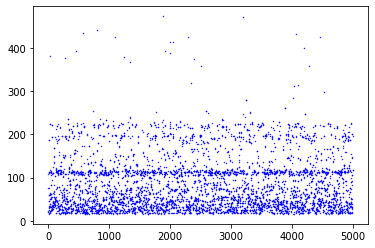

In [266]:
plt.scatter(range(5000), dataSet_Mix[1000, :], s=0.2, c='b')
plt.show()

In [267]:
# dataSet = np.delete(dataSet, range(5414, 6557), axis=0)
# dataSet.shape

(5414, 5000)

In [314]:

dataSet = np.vstack((dataSet, dataSet_Mix))
dataSet, dataSet.shape

(array([[ 39.,  41.,  36., ...,  81.,  82.,  32.],
        [ 33.,  20.,  28., ..., 111., 109.,  84.],
        [ 83.,  41.,  38., ...,  37.,  48.,  51.],
        ...,
        [ 20.,  20., 111., ...,  46.,  45., 109.],
        [112.,  17., 142., ...,  54.,  28.,  30.],
        [114., 114., 113., ..., 115., 114., 154.]]), (6633, 5000))

In [315]:
df = pd.DataFrame(dataSet)
df.to_csv('../Cs137data/dataSet_no_Bendi.csv')

### 本底数据是否应该放入数据中？

In [194]:
start = time.time()
fr = open('../Cs137data/lis/Cs137-10min-01.Lis', 'rb')
pulse_Bendi_10min, rgo1, repgo1 = get_pulse_data(fr)
end = time.time()
print('time is : % 0.3fs' % (end - start))
pulse_Bendi_10min.shape

N/A% (0 of 78073) |                      | Elapsed Time: 0:00:00 ETA:  --:--:--
  0% (17 of 78073) |                     | Elapsed Time: 0:00:00 ETA:   0:07:42
  0% (36 of 78073) |                     | Elapsed Time: 0:00:00 ETA:   0:07:18
  0% (55 of 78073) |                     | Elapsed Time: 0:00:00 ETA:   0:07:12
  0% (73 of 78073) |                     | Elapsed Time: 0:00:00 ETA:   0:07:14
  0% (92 of 78073) |                     | Elapsed Time: 0:00:00 ETA:   0:07:13
  0% (111 of 78073) |                    | Elapsed Time: 0:00:00 ETA:   0:07:12
  0% (130 of 78073) |                    | Elapsed Time: 0:00:00 ETA:   0:07:11
  0% (148 of 78073) |                    | Elapsed Time: 0:00:00 ETA:   0:07:12
  0% (165 of 78073) |                    | Elapsed Time: 0:00:00 ETA:   0:07:15
  0% (184 of 78073) |                    | Elapsed Time: 0:00:01 ETA:   0:07:14
  0% (203 of 78073) |                    | Elapsed Time: 0:00:01 ETA:   0:07:13
  0% (220 of 78073) |                   

  2% (1837 of 78073) |                   | Elapsed Time: 0:00:10 ETA:   0:07:11
  2% (1855 of 78073) |                   | Elapsed Time: 0:00:10 ETA:   0:07:10
  2% (1873 of 78073) |                   | Elapsed Time: 0:00:10 ETA:   0:07:12
  2% (1891 of 78073) |                   | Elapsed Time: 0:00:10 ETA:   0:07:12
  2% (1910 of 78073) |                   | Elapsed Time: 0:00:10 ETA:   0:07:08
  2% (1928 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:07:08
  2% (1947 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:07:09
  2% (1966 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:07:08
  2% (1977 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:07:08
  2% (1994 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:07:09
  2% (2012 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:07:11
  2% (2030 of 78073) |                   | Elapsed Time: 0:00:11 ETA:   0:07:11
  2% (2049 of 78073) |                  

  4% (3758 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:46
  4% (3778 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:45
  4% (3797 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:44
  4% (3817 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:44
  4% (3835 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:44
  4% (3854 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:44
  4% (3872 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:47
  4% (3890 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:46
  5% (3908 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:46
  5% (3929 of 78073) |                   | Elapsed Time: 0:00:21 ETA:   0:06:45
  5% (3949 of 78073) |                   | Elapsed Time: 0:00:22 ETA:   0:06:45
  5% (3967 of 78073) |                   | Elapsed Time: 0:00:22 ETA:   0:06:45
  5% (3986 of 78073) |                  

  7% (5689 of 78073) |#                  | Elapsed Time: 0:00:31 ETA:   0:06:37
  7% (5708 of 78073) |#                  | Elapsed Time: 0:00:31 ETA:   0:06:38
  7% (5728 of 78073) |#                  | Elapsed Time: 0:00:31 ETA:   0:06:37
  7% (5746 of 78073) |#                  | Elapsed Time: 0:00:31 ETA:   0:06:37
  7% (5765 of 78073) |#                  | Elapsed Time: 0:00:31 ETA:   0:06:36
  7% (5785 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:06:36
  7% (5805 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:06:36
  7% (5825 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:06:36
  7% (5844 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:06:34
  7% (5863 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:06:35
  7% (5883 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:06:34
  7% (5902 of 78073) |#                  | Elapsed Time: 0:00:32 ETA:   0:06:32
  7% (5919 of 78073) |#                 

  9% (7616 of 78073) |#                  | Elapsed Time: 0:00:42 ETA:   0:06:23
  9% (7635 of 78073) |#                  | Elapsed Time: 0:00:42 ETA:   0:06:24
  9% (7654 of 78073) |#                  | Elapsed Time: 0:00:42 ETA:   0:06:24
  9% (7671 of 78073) |#                  | Elapsed Time: 0:00:42 ETA:   0:06:24
  9% (7691 of 78073) |#                  | Elapsed Time: 0:00:42 ETA:   0:06:23
  9% (7709 of 78073) |#                  | Elapsed Time: 0:00:42 ETA:   0:06:25
  9% (7729 of 78073) |#                  | Elapsed Time: 0:00:42 ETA:   0:06:24
  9% (7745 of 78073) |#                  | Elapsed Time: 0:00:42 ETA:   0:06:26
  9% (7764 of 78073) |#                  | Elapsed Time: 0:00:42 ETA:   0:06:26
  9% (7783 of 78073) |#                  | Elapsed Time: 0:00:43 ETA:   0:06:25
  9% (7802 of 78073) |#                  | Elapsed Time: 0:00:43 ETA:   0:06:25
 10% (7821 of 78073) |#                  | Elapsed Time: 0:00:43 ETA:   0:06:25
 10% (7839 of 78073) |#                 

 12% (9538 of 78073) |##                 | Elapsed Time: 0:00:52 ETA:   0:06:12
 12% (9556 of 78073) |##                 | Elapsed Time: 0:00:52 ETA:   0:06:13
 12% (9574 of 78073) |##                 | Elapsed Time: 0:00:52 ETA:   0:06:12
 12% (9593 of 78073) |##                 | Elapsed Time: 0:00:52 ETA:   0:06:11
 12% (9611 of 78073) |##                 | Elapsed Time: 0:00:53 ETA:   0:06:10
 12% (9629 of 78073) |##                 | Elapsed Time: 0:00:53 ETA:   0:06:10
 12% (9648 of 78073) |##                 | Elapsed Time: 0:00:53 ETA:   0:06:10
 12% (9666 of 78073) |##                 | Elapsed Time: 0:00:53 ETA:   0:06:11
 12% (9685 of 78073) |##                 | Elapsed Time: 0:00:53 ETA:   0:06:11
 12% (9704 of 78073) |##                 | Elapsed Time: 0:00:53 ETA:   0:06:10
 12% (9722 of 78073) |##                 | Elapsed Time: 0:00:53 ETA:   0:06:10
 12% (9740 of 78073) |##                 | Elapsed Time: 0:00:53 ETA:   0:06:10
 12% (9758 of 78073) |##                

 14% (11473 of 78073) |##                | Elapsed Time: 0:01:03 ETA:   0:05:57
 14% (11494 of 78073) |##                | Elapsed Time: 0:01:03 ETA:   0:05:54
 14% (11513 of 78073) |##                | Elapsed Time: 0:01:03 ETA:   0:05:53
 14% (11534 of 78073) |##                | Elapsed Time: 0:01:03 ETA:   0:05:52
 14% (11553 of 78073) |##                | Elapsed Time: 0:01:03 ETA:   0:05:52
 14% (11571 of 78073) |##                | Elapsed Time: 0:01:03 ETA:   0:05:53
 14% (11590 of 78073) |##                | Elapsed Time: 0:01:03 ETA:   0:05:53
 14% (11609 of 78073) |##                | Elapsed Time: 0:01:03 ETA:   0:05:53
 14% (11630 of 78073) |##                | Elapsed Time: 0:01:04 ETA:   0:05:51
 14% (11650 of 78073) |##                | Elapsed Time: 0:01:04 ETA:   0:05:52
 14% (11670 of 78073) |##                | Elapsed Time: 0:01:04 ETA:   0:05:52
 14% (11689 of 78073) |##                | Elapsed Time: 0:01:04 ETA:   0:05:52
 14% (11706 of 78073) |##               

 17% (13407 of 78073) |###               | Elapsed Time: 0:01:13 ETA:   0:05:54
 17% (13425 of 78073) |###               | Elapsed Time: 0:01:13 ETA:   0:05:54
 17% (13445 of 78073) |###               | Elapsed Time: 0:01:13 ETA:   0:05:53
 17% (13464 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:55
 17% (13483 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:56
 17% (13502 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:56
 17% (13520 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:56
 17% (13540 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:54
 17% (13559 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:54
 17% (13578 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:53
 17% (13596 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:53
 17% (13614 of 78073) |###               | Elapsed Time: 0:01:14 ETA:   0:05:53
 17% (13632 of 78073) |###              

 19% (15354 of 78073) |###               | Elapsed Time: 0:01:24 ETA:   0:05:43
 19% (15372 of 78073) |###               | Elapsed Time: 0:01:24 ETA:   0:05:42
 19% (15390 of 78073) |###               | Elapsed Time: 0:01:24 ETA:   0:05:42
 19% (15411 of 78073) |###               | Elapsed Time: 0:01:24 ETA:   0:05:39
 19% (15430 of 78073) |###               | Elapsed Time: 0:01:24 ETA:   0:05:40
 19% (15447 of 78073) |###               | Elapsed Time: 0:01:24 ETA:   0:05:40
 19% (15465 of 78073) |###               | Elapsed Time: 0:01:24 ETA:   0:05:42
 19% (15484 of 78073) |###               | Elapsed Time: 0:01:25 ETA:   0:05:42
 19% (15505 of 78073) |###               | Elapsed Time: 0:01:25 ETA:   0:05:41
 19% (15523 of 78073) |###               | Elapsed Time: 0:01:25 ETA:   0:05:41
 19% (15543 of 78073) |###               | Elapsed Time: 0:01:25 ETA:   0:05:41
 19% (15562 of 78073) |###               | Elapsed Time: 0:01:25 ETA:   0:05:41
 19% (15580 of 78073) |###              

 22% (17285 of 78073) |###               | Elapsed Time: 0:01:34 ETA:   0:05:34
 22% (17304 of 78073) |###               | Elapsed Time: 0:01:34 ETA:   0:05:34
 22% (17322 of 78073) |###               | Elapsed Time: 0:01:35 ETA:   0:05:34
 22% (17341 of 78073) |###               | Elapsed Time: 0:01:35 ETA:   0:05:33
 22% (17360 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:05:34
 22% (17381 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:05:32
 22% (17400 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:05:30
 22% (17419 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:05:31
 22% (17439 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:05:31
 22% (17459 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:05:30
 22% (17479 of 78073) |####              | Elapsed Time: 0:01:35 ETA:   0:05:28
 22% (17498 of 78073) |####              | Elapsed Time: 0:01:36 ETA:   0:05:28
 22% (17518 of 78073) |####             

 24% (19229 of 78073) |####              | Elapsed Time: 0:01:45 ETA:   0:05:22
 24% (19246 of 78073) |####              | Elapsed Time: 0:01:45 ETA:   0:05:22
 24% (19266 of 78073) |####              | Elapsed Time: 0:01:45 ETA:   0:05:22
 24% (19285 of 78073) |####              | Elapsed Time: 0:01:45 ETA:   0:05:20
 24% (19304 of 78073) |####              | Elapsed Time: 0:01:45 ETA:   0:05:20
 24% (19324 of 78073) |####              | Elapsed Time: 0:01:45 ETA:   0:05:20
 24% (19344 of 78073) |####              | Elapsed Time: 0:01:46 ETA:   0:05:19
 24% (19363 of 78073) |####              | Elapsed Time: 0:01:46 ETA:   0:05:19
 24% (19383 of 78073) |####              | Elapsed Time: 0:01:46 ETA:   0:05:17
 24% (19400 of 78073) |####              | Elapsed Time: 0:01:46 ETA:   0:05:18
 24% (19419 of 78073) |####              | Elapsed Time: 0:01:46 ETA:   0:05:19
 24% (19439 of 78073) |####              | Elapsed Time: 0:01:46 ETA:   0:05:19
 24% (19457 of 78073) |####             

 27% (21163 of 78073) |####              | Elapsed Time: 0:01:56 ETA:   0:05:13
 27% (21184 of 78073) |####              | Elapsed Time: 0:01:56 ETA:   0:05:12
 27% (21203 of 78073) |####              | Elapsed Time: 0:01:56 ETA:   0:05:11
 27% (21220 of 78073) |####              | Elapsed Time: 0:01:56 ETA:   0:05:13
 27% (21239 of 78073) |####              | Elapsed Time: 0:01:56 ETA:   0:05:12
 27% (21258 of 78073) |####              | Elapsed Time: 0:01:56 ETA:   0:05:12
 27% (21279 of 78073) |####              | Elapsed Time: 0:01:56 ETA:   0:05:11
 27% (21297 of 78073) |####              | Elapsed Time: 0:01:56 ETA:   0:05:11
 27% (21315 of 78073) |####              | Elapsed Time: 0:01:56 ETA:   0:05:11
 27% (21333 of 78073) |####              | Elapsed Time: 0:01:56 ETA:   0:05:12
 27% (21353 of 78073) |####              | Elapsed Time: 0:01:57 ETA:   0:05:11
 27% (21372 of 78073) |####              | Elapsed Time: 0:01:57 ETA:   0:05:11
 27% (21392 of 78073) |####             

 29% (23115 of 78073) |#####             | Elapsed Time: 0:02:06 ETA:   0:04:55
 29% (23134 of 78073) |#####             | Elapsed Time: 0:02:06 ETA:   0:04:55
 29% (23153 of 78073) |#####             | Elapsed Time: 0:02:06 ETA:   0:04:55
 29% (23171 of 78073) |#####             | Elapsed Time: 0:02:06 ETA:   0:04:55
 29% (23191 of 78073) |#####             | Elapsed Time: 0:02:06 ETA:   0:04:54
 29% (23210 of 78073) |#####             | Elapsed Time: 0:02:07 ETA:   0:04:54
 29% (23229 of 78073) |#####             | Elapsed Time: 0:02:07 ETA:   0:04:54
 29% (23248 of 78073) |#####             | Elapsed Time: 0:02:07 ETA:   0:04:54
 29% (23266 of 78073) |#####             | Elapsed Time: 0:02:07 ETA:   0:04:53
 29% (23284 of 78073) |#####             | Elapsed Time: 0:02:07 ETA:   0:04:54
 29% (23302 of 78073) |#####             | Elapsed Time: 0:02:07 ETA:   0:04:55
 29% (23322 of 78073) |#####             | Elapsed Time: 0:02:07 ETA:   0:04:54
 29% (23341 of 78073) |#####            

 32% (24989 of 78073) |#####             | Elapsed Time: 0:02:17 ETA:   0:05:01
 32% (25006 of 78073) |#####             | Elapsed Time: 0:02:17 ETA:   0:05:01
 32% (25023 of 78073) |#####             | Elapsed Time: 0:02:17 ETA:   0:05:01
 32% (25041 of 78073) |#####             | Elapsed Time: 0:02:17 ETA:   0:05:02
 32% (25058 of 78073) |#####             | Elapsed Time: 0:02:17 ETA:   0:05:03
 32% (25075 of 78073) |#####             | Elapsed Time: 0:02:17 ETA:   0:05:05
 32% (25093 of 78073) |#####             | Elapsed Time: 0:02:17 ETA:   0:05:05
 32% (25109 of 78073) |#####             | Elapsed Time: 0:02:17 ETA:   0:05:04
 32% (25126 of 78073) |#####             | Elapsed Time: 0:02:17 ETA:   0:05:05
 32% (25144 of 78073) |#####             | Elapsed Time: 0:02:18 ETA:   0:05:06
 32% (25163 of 78073) |#####             | Elapsed Time: 0:02:18 ETA:   0:05:03
 32% (25180 of 78073) |#####             | Elapsed Time: 0:02:18 ETA:   0:05:05
 32% (25198 of 78073) |#####            

 34% (26920 of 78073) |######            | Elapsed Time: 0:02:27 ETA:   0:04:42
 34% (26939 of 78073) |######            | Elapsed Time: 0:02:27 ETA:   0:04:41
 34% (26957 of 78073) |######            | Elapsed Time: 0:02:27 ETA:   0:04:42
 34% (26977 of 78073) |######            | Elapsed Time: 0:02:27 ETA:   0:04:42
 34% (26997 of 78073) |######            | Elapsed Time: 0:02:28 ETA:   0:04:43
 34% (27017 of 78073) |######            | Elapsed Time: 0:02:28 ETA:   0:04:44
 34% (27036 of 78073) |######            | Elapsed Time: 0:02:28 ETA:   0:04:44
 34% (27053 of 78073) |######            | Elapsed Time: 0:02:28 ETA:   0:04:44
 34% (27072 of 78073) |######            | Elapsed Time: 0:02:28 ETA:   0:04:43
 34% (27091 of 78073) |######            | Elapsed Time: 0:02:28 ETA:   0:04:43
 34% (27111 of 78073) |######            | Elapsed Time: 0:02:28 ETA:   0:04:43
 34% (27128 of 78073) |######            | Elapsed Time: 0:02:28 ETA:   0:04:45
 34% (27147 of 78073) |######           

 37% (28892 of 78073) |######            | Elapsed Time: 0:02:38 ETA:   0:04:23
 37% (28911 of 78073) |######            | Elapsed Time: 0:02:38 ETA:   0:04:23
 37% (28931 of 78073) |######            | Elapsed Time: 0:02:38 ETA:   0:04:21
 37% (28949 of 78073) |######            | Elapsed Time: 0:02:38 ETA:   0:04:22
 37% (28968 of 78073) |######            | Elapsed Time: 0:02:38 ETA:   0:04:23
 37% (28988 of 78073) |######            | Elapsed Time: 0:02:38 ETA:   0:04:22
 37% (29007 of 78073) |######            | Elapsed Time: 0:02:38 ETA:   0:04:21
 37% (29025 of 78073) |######            | Elapsed Time: 0:02:38 ETA:   0:04:22
 37% (29044 of 78073) |######            | Elapsed Time: 0:02:39 ETA:   0:04:21
 37% (29064 of 78073) |######            | Elapsed Time: 0:02:39 ETA:   0:04:21
 37% (29082 of 78073) |######            | Elapsed Time: 0:02:39 ETA:   0:04:21
 37% (29101 of 78073) |######            | Elapsed Time: 0:02:39 ETA:   0:04:21
 37% (29119 of 78073) |######           

 39% (30846 of 78073) |#######           | Elapsed Time: 0:02:48 ETA:   0:04:15
 39% (30865 of 78073) |#######           | Elapsed Time: 0:02:48 ETA:   0:04:14
 39% (30885 of 78073) |#######           | Elapsed Time: 0:02:48 ETA:   0:04:14
 39% (30903 of 78073) |#######           | Elapsed Time: 0:02:48 ETA:   0:04:15
 39% (30921 of 78073) |#######           | Elapsed Time: 0:02:49 ETA:   0:04:16
 39% (30940 of 78073) |#######           | Elapsed Time: 0:02:49 ETA:   0:04:16
 39% (30959 of 78073) |#######           | Elapsed Time: 0:02:49 ETA:   0:04:15
 39% (30978 of 78073) |#######           | Elapsed Time: 0:02:49 ETA:   0:04:15
 39% (30997 of 78073) |#######           | Elapsed Time: 0:02:49 ETA:   0:04:15
 39% (31016 of 78073) |#######           | Elapsed Time: 0:02:49 ETA:   0:04:14
 39% (31036 of 78073) |#######           | Elapsed Time: 0:02:49 ETA:   0:04:13
 39% (31055 of 78073) |#######           | Elapsed Time: 0:02:49 ETA:   0:04:14
 39% (31074 of 78073) |#######          

 42% (32816 of 78073) |#######           | Elapsed Time: 0:02:59 ETA:   0:04:05
 42% (32835 of 78073) |#######           | Elapsed Time: 0:02:59 ETA:   0:04:03
 42% (32854 of 78073) |#######           | Elapsed Time: 0:02:59 ETA:   0:04:04
 42% (32872 of 78073) |#######           | Elapsed Time: 0:02:59 ETA:   0:04:04
 42% (32891 of 78073) |#######           | Elapsed Time: 0:02:59 ETA:   0:04:04
 42% (32909 of 78073) |#######           | Elapsed Time: 0:02:59 ETA:   0:04:04
 42% (32928 of 78073) |#######           | Elapsed Time: 0:02:59 ETA:   0:04:04
 42% (32947 of 78073) |#######           | Elapsed Time: 0:02:59 ETA:   0:04:06
 42% (32967 of 78073) |#######           | Elapsed Time: 0:03:00 ETA:   0:04:05
 42% (32987 of 78073) |#######           | Elapsed Time: 0:03:00 ETA:   0:04:03
 42% (33006 of 78073) |#######           | Elapsed Time: 0:03:00 ETA:   0:04:03
 42% (33024 of 78073) |#######           | Elapsed Time: 0:03:00 ETA:   0:04:04
 42% (33043 of 78073) |#######          

 44% (34752 of 78073) |########          | Elapsed Time: 0:03:09 ETA:   0:03:53
 44% (34772 of 78073) |########          | Elapsed Time: 0:03:09 ETA:   0:03:53
 44% (34792 of 78073) |########          | Elapsed Time: 0:03:10 ETA:   0:03:52
 44% (34813 of 78073) |########          | Elapsed Time: 0:03:10 ETA:   0:03:51
 44% (34832 of 78073) |########          | Elapsed Time: 0:03:10 ETA:   0:03:52
 44% (34852 of 78073) |########          | Elapsed Time: 0:03:10 ETA:   0:03:51
 44% (34872 of 78073) |########          | Elapsed Time: 0:03:10 ETA:   0:03:51
 44% (34891 of 78073) |########          | Elapsed Time: 0:03:10 ETA:   0:03:50
 44% (34910 of 78073) |########          | Elapsed Time: 0:03:10 ETA:   0:03:50
 44% (34929 of 78073) |########          | Elapsed Time: 0:03:10 ETA:   0:03:51
 44% (34947 of 78073) |########          | Elapsed Time: 0:03:10 ETA:   0:03:51
 44% (34966 of 78073) |########          | Elapsed Time: 0:03:10 ETA:   0:03:52
 44% (34985 of 78073) |########         

 47% (36699 of 78073) |########          | Elapsed Time: 0:03:20 ETA:   0:03:46
 47% (36719 of 78073) |########          | Elapsed Time: 0:03:20 ETA:   0:03:45
 47% (36737 of 78073) |########          | Elapsed Time: 0:03:20 ETA:   0:03:45
 47% (36757 of 78073) |########          | Elapsed Time: 0:03:20 ETA:   0:03:46
 47% (36775 of 78073) |########          | Elapsed Time: 0:03:20 ETA:   0:03:45
 47% (36794 of 78073) |########          | Elapsed Time: 0:03:20 ETA:   0:03:46
 47% (36816 of 78073) |########          | Elapsed Time: 0:03:21 ETA:   0:03:44
 47% (36835 of 78073) |########          | Elapsed Time: 0:03:21 ETA:   0:03:44
 47% (36854 of 78073) |########          | Elapsed Time: 0:03:21 ETA:   0:03:43
 47% (36874 of 78073) |########          | Elapsed Time: 0:03:21 ETA:   0:03:42
 47% (36892 of 78073) |########          | Elapsed Time: 0:03:21 ETA:   0:03:42
 47% (36911 of 78073) |########          | Elapsed Time: 0:03:21 ETA:   0:03:42
 47% (36930 of 78073) |########         

 49% (38654 of 78073) |########          | Elapsed Time: 0:03:30 ETA:   0:03:29
 49% (38672 of 78073) |########          | Elapsed Time: 0:03:31 ETA:   0:03:30
 49% (38691 of 78073) |########          | Elapsed Time: 0:03:31 ETA:   0:03:30
 49% (38710 of 78073) |########          | Elapsed Time: 0:03:31 ETA:   0:03:31
 49% (38728 of 78073) |########          | Elapsed Time: 0:03:31 ETA:   0:03:31
 49% (38747 of 78073) |########          | Elapsed Time: 0:03:31 ETA:   0:03:30
 49% (38766 of 78073) |########          | Elapsed Time: 0:03:31 ETA:   0:03:30
 49% (38785 of 78073) |########          | Elapsed Time: 0:03:31 ETA:   0:03:29
 49% (38803 of 78073) |########          | Elapsed Time: 0:03:31 ETA:   0:03:29
 49% (38823 of 78073) |########          | Elapsed Time: 0:03:31 ETA:   0:03:29
 49% (38842 of 78073) |########          | Elapsed Time: 0:03:31 ETA:   0:03:29
 49% (38862 of 78073) |########          | Elapsed Time: 0:03:32 ETA:   0:03:29
 49% (38882 of 78073) |########         

 52% (40613 of 78073) |#########         | Elapsed Time: 0:03:41 ETA:   0:03:23
 52% (40632 of 78073) |#########         | Elapsed Time: 0:03:41 ETA:   0:03:23
 52% (40650 of 78073) |#########         | Elapsed Time: 0:03:41 ETA:   0:03:23
 52% (40670 of 78073) |#########         | Elapsed Time: 0:03:41 ETA:   0:03:22
 52% (40690 of 78073) |#########         | Elapsed Time: 0:03:41 ETA:   0:03:22
 52% (40710 of 78073) |#########         | Elapsed Time: 0:03:42 ETA:   0:03:21
 52% (40729 of 78073) |#########         | Elapsed Time: 0:03:42 ETA:   0:03:22
 52% (40748 of 78073) |#########         | Elapsed Time: 0:03:42 ETA:   0:03:22
 52% (40767 of 78073) |#########         | Elapsed Time: 0:03:42 ETA:   0:03:21
 52% (40787 of 78073) |#########         | Elapsed Time: 0:03:42 ETA:   0:03:21
 52% (40807 of 78073) |#########         | Elapsed Time: 0:03:42 ETA:   0:03:20
 52% (40827 of 78073) |#########         | Elapsed Time: 0:03:42 ETA:   0:03:19
 52% (40846 of 78073) |#########        

 54% (42567 of 78073) |#########         | Elapsed Time: 0:03:52 ETA:   0:03:13
 54% (42586 of 78073) |#########         | Elapsed Time: 0:03:52 ETA:   0:03:13
 54% (42604 of 78073) |#########         | Elapsed Time: 0:03:52 ETA:   0:03:13
 54% (42622 of 78073) |#########         | Elapsed Time: 0:03:52 ETA:   0:03:13
 54% (42640 of 78073) |#########         | Elapsed Time: 0:03:52 ETA:   0:03:14
 54% (42659 of 78073) |#########         | Elapsed Time: 0:03:52 ETA:   0:03:13
 54% (42678 of 78073) |#########         | Elapsed Time: 0:03:52 ETA:   0:03:13
 54% (42697 of 78073) |#########         | Elapsed Time: 0:03:52 ETA:   0:03:14
 54% (42716 of 78073) |#########         | Elapsed Time: 0:03:52 ETA:   0:03:14
 54% (42734 of 78073) |#########         | Elapsed Time: 0:03:53 ETA:   0:03:14
 54% (42751 of 78073) |#########         | Elapsed Time: 0:03:53 ETA:   0:03:13
 54% (42771 of 78073) |#########         | Elapsed Time: 0:03:53 ETA:   0:03:12
 54% (42791 of 78073) |#########        

 57% (44510 of 78073) |##########        | Elapsed Time: 0:04:02 ETA:   0:03:02
 57% (44528 of 78073) |##########        | Elapsed Time: 0:04:02 ETA:   0:03:03
 57% (44548 of 78073) |##########        | Elapsed Time: 0:04:02 ETA:   0:03:03
 57% (44567 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:02
 57% (44586 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:01
 57% (44604 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:01
 57% (44623 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:01
 57% (44642 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:01
 57% (44661 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:00
 57% (44679 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:00
 57% (44698 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:01
 57% (44717 of 78073) |##########        | Elapsed Time: 0:04:03 ETA:   0:03:01
 57% (44735 of 78073) |##########       

 59% (46449 of 78073) |##########        | Elapsed Time: 0:04:13 ETA:   0:02:53
 59% (46468 of 78073) |##########        | Elapsed Time: 0:04:13 ETA:   0:02:53
 59% (46487 of 78073) |##########        | Elapsed Time: 0:04:13 ETA:   0:02:53
 59% (46505 of 78073) |##########        | Elapsed Time: 0:04:13 ETA:   0:02:53
 59% (46524 of 78073) |##########        | Elapsed Time: 0:04:13 ETA:   0:02:53
 59% (46545 of 78073) |##########        | Elapsed Time: 0:04:13 ETA:   0:02:52
 59% (46565 of 78073) |##########        | Elapsed Time: 0:04:13 ETA:   0:02:51
 59% (46586 of 78073) |##########        | Elapsed Time: 0:04:13 ETA:   0:02:51
 59% (46605 of 78073) |##########        | Elapsed Time: 0:04:14 ETA:   0:02:51
 59% (46624 of 78073) |##########        | Elapsed Time: 0:04:14 ETA:   0:02:50
 59% (46641 of 78073) |##########        | Elapsed Time: 0:04:14 ETA:   0:02:51
 59% (46660 of 78073) |##########        | Elapsed Time: 0:04:14 ETA:   0:02:51
 59% (46678 of 78073) |##########       

 61% (48387 of 78073) |###########       | Elapsed Time: 0:04:23 ETA:   0:02:45
 62% (48406 of 78073) |###########       | Elapsed Time: 0:04:23 ETA:   0:02:44
 62% (48426 of 78073) |###########       | Elapsed Time: 0:04:24 ETA:   0:02:44
 62% (48446 of 78073) |###########       | Elapsed Time: 0:04:24 ETA:   0:02:44
 62% (48465 of 78073) |###########       | Elapsed Time: 0:04:24 ETA:   0:02:44
 62% (48484 of 78073) |###########       | Elapsed Time: 0:04:24 ETA:   0:02:44
 62% (48503 of 78073) |###########       | Elapsed Time: 0:04:24 ETA:   0:02:44
 62% (48523 of 78073) |###########       | Elapsed Time: 0:04:24 ETA:   0:02:44
 62% (48541 of 78073) |###########       | Elapsed Time: 0:04:24 ETA:   0:02:44
 62% (48562 of 78073) |###########       | Elapsed Time: 0:04:24 ETA:   0:02:44
 62% (48580 of 78073) |###########       | Elapsed Time: 0:04:24 ETA:   0:02:43
 62% (48598 of 78073) |###########       | Elapsed Time: 0:04:24 ETA:   0:02:44
 62% (48617 of 78073) |###########      

 64% (50334 of 78073) |###########       | Elapsed Time: 0:04:34 ETA:   0:02:31
 64% (50352 of 78073) |###########       | Elapsed Time: 0:04:34 ETA:   0:02:32
 64% (50373 of 78073) |###########       | Elapsed Time: 0:04:34 ETA:   0:02:30
 64% (50392 of 78073) |###########       | Elapsed Time: 0:04:34 ETA:   0:02:30
 64% (50402 of 78073) |###########       | Elapsed Time: 0:04:34 ETA:   0:02:30
 64% (50420 of 78073) |###########       | Elapsed Time: 0:04:34 ETA:   0:02:30
 64% (50440 of 78073) |###########       | Elapsed Time: 0:04:34 ETA:   0:02:30
 64% (50460 of 78073) |###########       | Elapsed Time: 0:04:35 ETA:   0:02:30
 64% (50479 of 78073) |###########       | Elapsed Time: 0:04:35 ETA:   0:02:30
 64% (50496 of 78073) |###########       | Elapsed Time: 0:04:35 ETA:   0:02:30
 64% (50513 of 78073) |###########       | Elapsed Time: 0:04:35 ETA:   0:02:31
 64% (50531 of 78073) |###########       | Elapsed Time: 0:04:35 ETA:   0:02:31
 64% (50549 of 78073) |###########      

 66% (52271 of 78073) |############      | Elapsed Time: 0:04:44 ETA:   0:02:19
 66% (52289 of 78073) |############      | Elapsed Time: 0:04:45 ETA:   0:02:20
 66% (52308 of 78073) |############      | Elapsed Time: 0:04:45 ETA:   0:02:19
 67% (52327 of 78073) |############      | Elapsed Time: 0:04:45 ETA:   0:02:19
 67% (52347 of 78073) |############      | Elapsed Time: 0:04:45 ETA:   0:02:19
 67% (52365 of 78073) |############      | Elapsed Time: 0:04:45 ETA:   0:02:19
 67% (52379 of 78073) |############      | Elapsed Time: 0:04:45 ETA:   0:02:19
 67% (52398 of 78073) |############      | Elapsed Time: 0:04:45 ETA:   0:02:19
 67% (52416 of 78073) |############      | Elapsed Time: 0:04:45 ETA:   0:02:19
 67% (52435 of 78073) |############      | Elapsed Time: 0:04:45 ETA:   0:02:19
 67% (52454 of 78073) |############      | Elapsed Time: 0:04:45 ETA:   0:02:19
 67% (52474 of 78073) |############      | Elapsed Time: 0:04:46 ETA:   0:02:18
 67% (52493 of 78073) |############     

 69% (54217 of 78073) |############      | Elapsed Time: 0:04:55 ETA:   0:02:08
 69% (54234 of 78073) |############      | Elapsed Time: 0:04:55 ETA:   0:02:09
 69% (54254 of 78073) |############      | Elapsed Time: 0:04:55 ETA:   0:02:08
 69% (54273 of 78073) |############      | Elapsed Time: 0:04:55 ETA:   0:02:08
 69% (54290 of 78073) |############      | Elapsed Time: 0:04:55 ETA:   0:02:11
 69% (54309 of 78073) |############      | Elapsed Time: 0:04:55 ETA:   0:02:11
 69% (54329 of 78073) |############      | Elapsed Time: 0:04:56 ETA:   0:02:11
 69% (54349 of 78073) |############      | Elapsed Time: 0:04:56 ETA:   0:02:11
 69% (54367 of 78073) |############      | Elapsed Time: 0:04:56 ETA:   0:02:11
 69% (54386 of 78073) |############      | Elapsed Time: 0:04:56 ETA:   0:02:11
 69% (54404 of 78073) |############      | Elapsed Time: 0:04:56 ETA:   0:02:10
 69% (54423 of 78073) |############      | Elapsed Time: 0:04:56 ETA:   0:02:10
 69% (54442 of 78073) |############     

 71% (56183 of 78073) |############      | Elapsed Time: 0:05:06 ETA:   0:01:56
 71% (56203 of 78073) |############      | Elapsed Time: 0:05:06 ETA:   0:01:56
 72% (56221 of 78073) |############      | Elapsed Time: 0:05:06 ETA:   0:01:57
 72% (56240 of 78073) |############      | Elapsed Time: 0:05:06 ETA:   0:01:56
 72% (56259 of 78073) |############      | Elapsed Time: 0:05:06 ETA:   0:01:56
 72% (56278 of 78073) |############      | Elapsed Time: 0:05:06 ETA:   0:01:57
 72% (56297 of 78073) |############      | Elapsed Time: 0:05:06 ETA:   0:01:56
 72% (56316 of 78073) |############      | Elapsed Time: 0:05:06 ETA:   0:01:57
 72% (56332 of 78073) |############      | Elapsed Time: 0:05:06 ETA:   0:01:56
 72% (56352 of 78073) |############      | Elapsed Time: 0:05:06 ETA:   0:01:57
 72% (56371 of 78073) |############      | Elapsed Time: 0:05:07 ETA:   0:01:56
 72% (56392 of 78073) |#############     | Elapsed Time: 0:05:07 ETA:   0:01:56
 72% (56411 of 78073) |#############    

 74% (58137 of 78073) |#############     | Elapsed Time: 0:05:16 ETA:   0:01:46
 74% (58156 of 78073) |#############     | Elapsed Time: 0:05:16 ETA:   0:01:46
 74% (58174 of 78073) |#############     | Elapsed Time: 0:05:16 ETA:   0:01:46
 74% (58195 of 78073) |#############     | Elapsed Time: 0:05:16 ETA:   0:01:45
 74% (58214 of 78073) |#############     | Elapsed Time: 0:05:17 ETA:   0:01:45
 74% (58233 of 78073) |#############     | Elapsed Time: 0:05:17 ETA:   0:01:45
 74% (58251 of 78073) |#############     | Elapsed Time: 0:05:17 ETA:   0:01:45
 74% (58269 of 78073) |#############     | Elapsed Time: 0:05:17 ETA:   0:01:45
 74% (58288 of 78073) |#############     | Elapsed Time: 0:05:17 ETA:   0:01:45
 74% (58306 of 78073) |#############     | Elapsed Time: 0:05:17 ETA:   0:01:46
 74% (58325 of 78073) |#############     | Elapsed Time: 0:05:17 ETA:   0:01:46
 74% (58343 of 78073) |#############     | Elapsed Time: 0:05:17 ETA:   0:01:46
 74% (58363 of 78073) |#############    

 76% (60103 of 78073) |#############     | Elapsed Time: 0:05:27 ETA:   0:01:37
 77% (60122 of 78073) |#############     | Elapsed Time: 0:05:27 ETA:   0:01:36
 77% (60140 of 78073) |#############     | Elapsed Time: 0:05:27 ETA:   0:01:37
 77% (60159 of 78073) |#############     | Elapsed Time: 0:05:27 ETA:   0:01:36
 77% (60178 of 78073) |#############     | Elapsed Time: 0:05:27 ETA:   0:01:36
 77% (60198 of 78073) |#############     | Elapsed Time: 0:05:27 ETA:   0:01:36
 77% (60218 of 78073) |#############     | Elapsed Time: 0:05:27 ETA:   0:01:36
 77% (60238 of 78073) |#############     | Elapsed Time: 0:05:27 ETA:   0:01:36
 77% (60257 of 78073) |#############     | Elapsed Time: 0:05:28 ETA:   0:01:36
 77% (60278 of 78073) |#############     | Elapsed Time: 0:05:28 ETA:   0:01:35
 77% (60297 of 78073) |#############     | Elapsed Time: 0:05:28 ETA:   0:01:35
 77% (60315 of 78073) |#############     | Elapsed Time: 0:05:28 ETA:   0:01:35
 77% (60333 of 78073) |#############    

 79% (62042 of 78073) |##############    | Elapsed Time: 0:05:37 ETA:   0:01:27
 79% (62061 of 78073) |##############    | Elapsed Time: 0:05:37 ETA:   0:01:27
 79% (62080 of 78073) |##############    | Elapsed Time: 0:05:37 ETA:   0:01:27
 79% (62099 of 78073) |##############    | Elapsed Time: 0:05:38 ETA:   0:01:27
 79% (62119 of 78073) |##############    | Elapsed Time: 0:05:38 ETA:   0:01:27
 79% (62139 of 78073) |##############    | Elapsed Time: 0:05:38 ETA:   0:01:27
 79% (62157 of 78073) |##############    | Elapsed Time: 0:05:38 ETA:   0:01:26
 79% (62176 of 78073) |##############    | Elapsed Time: 0:05:38 ETA:   0:01:26
 79% (62195 of 78073) |##############    | Elapsed Time: 0:05:38 ETA:   0:01:26
 79% (62214 of 78073) |##############    | Elapsed Time: 0:05:38 ETA:   0:01:26
 79% (62232 of 78073) |##############    | Elapsed Time: 0:05:38 ETA:   0:01:26
 79% (62251 of 78073) |##############    | Elapsed Time: 0:05:38 ETA:   0:01:26
 79% (62261 of 78073) |##############   

 81% (63978 of 78073) |##############    | Elapsed Time: 0:05:48 ETA:   0:01:17
 81% (63996 of 78073) |##############    | Elapsed Time: 0:05:48 ETA:   0:01:17
 81% (64015 of 78073) |##############    | Elapsed Time: 0:05:48 ETA:   0:01:17
 82% (64034 of 78073) |##############    | Elapsed Time: 0:05:48 ETA:   0:01:17
 82% (64054 of 78073) |##############    | Elapsed Time: 0:05:48 ETA:   0:01:16
 82% (64073 of 78073) |##############    | Elapsed Time: 0:05:48 ETA:   0:01:16
 82% (64093 of 78073) |##############    | Elapsed Time: 0:05:48 ETA:   0:01:16
 82% (64113 of 78073) |##############    | Elapsed Time: 0:05:49 ETA:   0:01:15
 82% (64130 of 78073) |##############    | Elapsed Time: 0:05:49 ETA:   0:01:16
 82% (64147 of 78073) |##############    | Elapsed Time: 0:05:49 ETA:   0:01:16
 82% (64166 of 78073) |##############    | Elapsed Time: 0:05:49 ETA:   0:01:15
 82% (64184 of 78073) |##############    | Elapsed Time: 0:05:49 ETA:   0:01:15
 82% (64202 of 78073) |##############   

 84% (65921 of 78073) |###############   | Elapsed Time: 0:05:58 ETA:   0:01:06
 84% (65940 of 78073) |###############   | Elapsed Time: 0:05:58 ETA:   0:01:06
 84% (65960 of 78073) |###############   | Elapsed Time: 0:05:59 ETA:   0:01:06
 84% (65979 of 78073) |###############   | Elapsed Time: 0:05:59 ETA:   0:01:05
 84% (65998 of 78073) |###############   | Elapsed Time: 0:05:59 ETA:   0:01:05
 84% (66017 of 78073) |###############   | Elapsed Time: 0:05:59 ETA:   0:01:05
 84% (66035 of 78073) |###############   | Elapsed Time: 0:05:59 ETA:   0:01:05
 84% (66053 of 78073) |###############   | Elapsed Time: 0:05:59 ETA:   0:01:05
 84% (66073 of 78073) |###############   | Elapsed Time: 0:05:59 ETA:   0:01:04
 84% (66092 of 78073) |###############   | Elapsed Time: 0:05:59 ETA:   0:01:04
 84% (66112 of 78073) |###############   | Elapsed Time: 0:05:59 ETA:   0:01:04
 84% (66131 of 78073) |###############   | Elapsed Time: 0:06:00 ETA:   0:01:04
 84% (66151 of 78073) |###############  

 86% (67804 of 78073) |###############   | Elapsed Time: 0:06:10 ETA:   0:02:19
 86% (67824 of 78073) |###############   | Elapsed Time: 0:06:10 ETA:   0:02:08
 86% (67843 of 78073) |###############   | Elapsed Time: 0:06:10 ETA:   0:02:18
 86% (67863 of 78073) |###############   | Elapsed Time: 0:06:10 ETA:   0:02:15
 86% (67881 of 78073) |###############   | Elapsed Time: 0:06:10 ETA:   0:02:15
 86% (67900 of 78073) |###############   | Elapsed Time: 0:06:10 ETA:   0:02:15
 86% (67920 of 78073) |###############   | Elapsed Time: 0:06:10 ETA:   0:02:14
 87% (67939 of 78073) |###############   | Elapsed Time: 0:06:11 ETA:   0:02:05
 87% (67957 of 78073) |###############   | Elapsed Time: 0:06:11 ETA:   0:01:59
 87% (67976 of 78073) |###############   | Elapsed Time: 0:06:11 ETA:   0:01:52
 87% (67995 of 78073) |###############   | Elapsed Time: 0:06:11 ETA:   0:01:47
 87% (68015 of 78073) |###############   | Elapsed Time: 0:06:11 ETA:   0:01:42
 87% (68032 of 78073) |###############  

 89% (69724 of 78073) |################  | Elapsed Time: 0:06:20 ETA:   0:00:45
 89% (69743 of 78073) |################  | Elapsed Time: 0:06:20 ETA:   0:00:45
 89% (69760 of 78073) |################  | Elapsed Time: 0:06:21 ETA:   0:00:45
 89% (69779 of 78073) |################  | Elapsed Time: 0:06:21 ETA:   0:00:45
 89% (69795 of 78073) |################  | Elapsed Time: 0:06:21 ETA:   0:00:45
 89% (69814 of 78073) |################  | Elapsed Time: 0:06:21 ETA:   0:00:45
 89% (69833 of 78073) |################  | Elapsed Time: 0:06:21 ETA:   0:00:45
 89% (69853 of 78073) |################  | Elapsed Time: 0:06:21 ETA:   0:00:45
 89% (69871 of 78073) |################  | Elapsed Time: 0:06:21 ETA:   0:00:45
 89% (69891 of 78073) |################  | Elapsed Time: 0:06:21 ETA:   0:00:45
 89% (69910 of 78073) |################  | Elapsed Time: 0:06:21 ETA:   0:00:45
 89% (69929 of 78073) |################  | Elapsed Time: 0:06:21 ETA:   0:00:44
 89% (69949 of 78073) |################ 

 91% (71670 of 78073) |################  | Elapsed Time: 0:06:31 ETA:   0:00:34
 91% (71688 of 78073) |################  | Elapsed Time: 0:06:31 ETA:   0:00:34
 91% (71706 of 78073) |################  | Elapsed Time: 0:06:31 ETA:   0:00:34
 91% (71724 of 78073) |################  | Elapsed Time: 0:06:31 ETA:   0:00:34
 91% (71743 of 78073) |################  | Elapsed Time: 0:06:31 ETA:   0:00:34
 91% (71763 of 78073) |################  | Elapsed Time: 0:06:31 ETA:   0:00:34
 91% (71785 of 78073) |################  | Elapsed Time: 0:06:32 ETA:   0:00:33
 91% (71804 of 78073) |################  | Elapsed Time: 0:06:32 ETA:   0:00:33
 91% (71822 of 78073) |################  | Elapsed Time: 0:06:32 ETA:   0:00:33
 92% (71841 of 78073) |################  | Elapsed Time: 0:06:32 ETA:   0:00:33
 92% (71858 of 78073) |################  | Elapsed Time: 0:06:32 ETA:   0:00:33
 92% (71878 of 78073) |################  | Elapsed Time: 0:06:32 ETA:   0:00:33
 92% (71897 of 78073) |################ 

 94% (73603 of 78073) |################  | Elapsed Time: 0:06:41 ETA:   0:00:24
 94% (73622 of 78073) |################  | Elapsed Time: 0:06:42 ETA:   0:00:24
 94% (73642 of 78073) |################  | Elapsed Time: 0:06:42 ETA:   0:00:24
 94% (73661 of 78073) |################  | Elapsed Time: 0:06:42 ETA:   0:00:24
 94% (73680 of 78073) |################  | Elapsed Time: 0:06:42 ETA:   0:00:23
 94% (73699 of 78073) |################  | Elapsed Time: 0:06:42 ETA:   0:00:23
 94% (73718 of 78073) |################  | Elapsed Time: 0:06:42 ETA:   0:00:23
 94% (73736 of 78073) |################# | Elapsed Time: 0:06:42 ETA:   0:00:23
 94% (73755 of 78073) |################# | Elapsed Time: 0:06:42 ETA:   0:00:23
 94% (73774 of 78073) |################# | Elapsed Time: 0:06:42 ETA:   0:00:23
 94% (73793 of 78073) |################# | Elapsed Time: 0:06:43 ETA:   0:00:23
 94% (73812 of 78073) |################# | Elapsed Time: 0:06:43 ETA:   0:00:23
 94% (73831 of 78073) |#################

 96% (75544 of 78073) |################# | Elapsed Time: 0:06:52 ETA:   0:00:13
 96% (75562 of 78073) |################# | Elapsed Time: 0:06:52 ETA:   0:00:13
 96% (75582 of 78073) |################# | Elapsed Time: 0:06:52 ETA:   0:00:13
 96% (75601 of 78073) |################# | Elapsed Time: 0:06:52 ETA:   0:00:13
 96% (75619 of 78073) |################# | Elapsed Time: 0:06:52 ETA:   0:00:13
 96% (75638 of 78073) |################# | Elapsed Time: 0:06:53 ETA:   0:00:13
 96% (75657 of 78073) |################# | Elapsed Time: 0:06:53 ETA:   0:00:13
 96% (75676 of 78073) |################# | Elapsed Time: 0:06:53 ETA:   0:00:12
 96% (75694 of 78073) |################# | Elapsed Time: 0:06:53 ETA:   0:00:12
 96% (75711 of 78073) |################# | Elapsed Time: 0:06:53 ETA:   0:00:12
 96% (75730 of 78073) |################# | Elapsed Time: 0:06:53 ETA:   0:00:12
 97% (75749 of 78073) |################# | Elapsed Time: 0:06:53 ETA:   0:00:12
 97% (75768 of 78073) |#################

 99% (77470 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:03
 99% (77487 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:03
 99% (77506 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:03
 99% (77526 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:03
 99% (77545 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:02
 99% (77562 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:02
 99% (77581 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:02
 99% (77599 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:02
 99% (77618 of 78073) |################# | Elapsed Time: 0:07:03 ETA:   0:00:02
 99% (77637 of 78073) |################# | Elapsed Time: 0:07:04 ETA:   0:00:02
 99% (77657 of 78073) |################# | Elapsed Time: 0:07:04 ETA:   0:00:02
 99% (77675 of 78073) |################# | Elapsed Time: 0:07:04 ETA:   0:00:02
 99% (77693 of 78073) |#################

time is :  435.081s


(1, 5716374)

### dataSet label and save dataSet to csv

In [200]:
num_Bendi = int(pulse_Bendi_10min.shape[1]/5000)
'num_Bendi = ', num_Bendi

('num_Bendi = ', 1143)

In [202]:
dataSet_Bendi = np.zeros((num_Bendi, 5000))
for i in range(num_Bendi):
    dataSet_Bendi[i, :] = pulse_Bendi_10min[0, i * 5000 : i  * 5000 + 5000]
dataSet_Bendi.shape, dataSet_Bendi

((1143, 5000), array([[ 23., 114., 114., ...,  80.,  79.,  20.],
        [ 21.,  22.,  20., ..., 112., 207., 202.],
        [ 33.,  34.,  20., ...,  32.,  30.,  36.],
        ...,
        [ 22.,  29.,  26., ...,  22.,  29.,  57.],
        [ 60.,  55.,  54., ...,  47.,  46.,  17.],
        [ 19., 111., 114., ..., 110., 110., 111.]]))

In [207]:
df = pd.DataFrame(dataSet_Bendi)
df.head()

0      1      2      3      4      5      6      7     8      9     ...  \
0  23.0  114.0  114.0  117.0  116.0   36.0   35.0   28.0  25.0   24.0  ...   
1  21.0   22.0   20.0   56.0  110.0  109.0  116.0  116.0  38.0  113.0  ...   
2  33.0   34.0   20.0  110.0  109.0   21.0   23.0   53.0  53.0   18.0  ...   
3  35.0  115.0  114.0   31.0   32.0   97.0   96.0   26.0  29.0  114.0  ...   
4  39.0   39.0   55.0   53.0   27.0   27.0   65.0   66.0  43.0   44.0  ...   

   4990  4991  4992   4993  4994   4995   4996   4997   4998   4999  
0  64.0  25.0  24.0   38.0  39.0  112.0  114.0   80.0   79.0   20.0  
1  38.0  39.0  69.0   69.0  41.0   41.0  110.0  112.0  207.0  202.0  
2  20.0  36.0  35.0   27.0  28.0  116.0  118.0   32.0   30.0   36.0  
3  76.0  77.0  99.0  100.0  36.0   35.0   44.0   44.0   25.0   25.0  
4  32.0  25.0  26.0   32.0  18.0   29.0   31.0   68.0   69.0   21.0  

[5 rows x 5000 columns]

In [208]:
df.to_csv('../Cs137data/dataSet_Bendi.csv')

### dataSet2 包含本底数据

In [316]:
dataSet2 = np.vstack((dataSet, dataSet_Bendi))
dataSet2.shape

(7776, 5000)

In [317]:
df = pd.DataFrame(dataSet2)

In [318]:
df.to_csv('../Cs137data/dataSet_and_Bendi.csv')

### Label 

In [307]:
dataSet3.shape

(1501, 5000)

In [308]:
dataSet4.shape, dataSet5.shape

((357, 5000), (2413, 5000))

In [319]:
dataSet_Eu.shape

(160, 5000)

In [320]:
dataSet_Mix.shape

(2202, 5000)

In [321]:
label_no_Bendi = np.zeros((dataSet.shape[0], 1))
label_no_Bendi, label_no_Bendi.shape

(array([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]]), (6633, 1))

In [322]:
n1 = dataSet3.shape[0]
for i in range(n1):
    label_no_Bendi[i, 0] = 0

In [323]:
n2 = dataSet4.shape[0] + dataSet5.shape[0]
for i in range(n2):
    label_no_Bendi[n1 + i, 0] = 1

In [324]:
n3 = dataSet_Eu.shape[0]
for i in range(n3):
    label_no_Bendi[n1 + n2 + i, 0] = 2

In [325]:
n4 = dataSet_Mix.shape[0]
for i in range(n4):
    label_no_Bendi[i + n1 + n2 + n3, 0] = 3

In [326]:
label_no_Bendi.shape, label_no_Bendi

((6633, 1), array([[0.],
        [0.],
        [0.],
        ...,
        [3.],
        [3.],
        [3.]]))

In [327]:
dataSet_label = np.hstack((dataSet, label_no_Bendi))
dataSet_label.shape, dataSet_label

((6633, 5001), array([[ 39.,  41.,  36., ...,  82.,  32.,   0.],
        [ 33.,  20.,  28., ..., 109.,  84.,   0.],
        [ 83.,  41.,  38., ...,  48.,  51.,   0.],
        ...,
        [ 20.,  20., 111., ...,  45., 109.,   3.],
        [112.,  17., 142., ...,  28.,  30.,   3.],
        [114., 114., 113., ..., 114., 154.,   3.]]))

In [328]:
df = pd.DataFrame(dataSet_label)
df.to_csv('../Cs137data/dataSet_no_Bendi.csv')

In [329]:
df.rename(columns={5000: 'label'})

0      1      2      3      4      5      6      7     8     9  ...  \
0      39.0   41.0   36.0   39.0   83.0   50.0   26.0   47.0  45.0  76.0  ...   
1      33.0   20.0   28.0   31.0   41.0   43.0   52.0   53.0  31.0  22.0  ...   
2      83.0   41.0   38.0   87.0   31.0   20.0   26.0   70.0  69.0  23.0  ...   
3     111.0  114.0  112.0   42.0   39.0   36.0   38.0   40.0  25.0  24.0  ...   
4     112.0   67.0   67.0   80.0   78.0   37.0   39.0   48.0  49.0  86.0  ...   
...     ...    ...    ...    ...    ...    ...    ...    ...   ...   ...  ...   
6628   20.0   21.0  118.0  116.0  112.0   29.0  110.0  113.0  89.0  90.0  ...   
6629   47.0   17.0   20.0   67.0   67.0   20.0   19.0   95.0  94.0  27.0  ...   
6630   20.0   20.0  111.0  112.0  101.0   95.0   53.0   55.0  79.0  82.0  ...   
6631  112.0   17.0  142.0   91.0   82.0   82.0   31.0   32.0  26.0  26.0  ...   
6632  114.0  114.0  113.0  114.0  114.0  368.0  114.0  119.0  29.0  51.0  ...   

       4991   4992   4993   4994   4995   4996   4997   4998   4999  label  
0      40.0   39.0   49.0   48.0   73.0   74.0   81.0   82.0   32.0    0.0  
1      51.0   52.0   37.0   36.0  111.0  111.0  111.0  109.0   84.0    0.0  
2     112.0  111.0   81.0   28.0   32.0   39.0   37.0   48.0   51.0    0.0  
3     112.0  113.0   51.0   49.0   59.0   58.0   41.0   42.0  110.0    0.0  
4     118.0  116.0  110.0  105.0   89.0   27.0  107.0  106.0   25.0    0.0  
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  
6628   49.0   42.0   39.0   67.0  118.0  116.0   52.0   51.0   46.0    3.0  
6629  249.0  249.0   51.0   50.0   36.0   36.0   24.0   23.0  109.0    3.0  
6630  102.0   36.0   35.0  208.0  207.0  220.0   46.0   45.0  109.0    3.0  
6631   68.0   21.0   39.0   39.0  182.0   54.0   54.0   28.0   30.0    3.0  
6632   22.0   78.0   78.0  219.0  193.0   37.0  115.0  114.0  154.0    3.0  

[6633 rows x 5001 columns]

In [330]:
label_Bendi = np.zeros((dataSet_Bendi.shape[0], 1))
for i in  range(dataSet_Bendi.shape[0]):
    label_Bendi[i, 0] = 4
label_Bendi

array([[4.],
       [4.],
       [4.],
       ...,
       [4.],
       [4.],
       [4.]])

In [331]:
label_has_Bendi = np.vstack((label_no_Bendi, label_Bendi))
label_has_Bendi, label_has_Bendi.shape

(array([[0.],
        [0.],
        [0.],
        ...,
        [4.],
        [4.],
        [4.]]), (7776, 1))

In [332]:
dataSet_has_Bendi = np.hstack((dataSet2, label_has_Bendi))
dataSet_has_Bendi.shape, dataSet_has_Bendi

((7776, 5001), array([[ 39.,  41.,  36., ...,  82.,  32.,   0.],
        [ 33.,  20.,  28., ..., 109.,  84.,   0.],
        [ 83.,  41.,  38., ...,  48.,  51.,   0.],
        ...,
        [ 22.,  29.,  26., ...,  29.,  57.,   4.],
        [ 60.,  55.,  54., ...,  46.,  17.,   4.],
        [ 19., 111., 114., ..., 110., 111.,   4.]]))

In [333]:
df1 = pd.DataFrame(dataSet_has_Bendi)


In [334]:
df1.rename(columns={5000: 'label'})
df1

0      1      2      3      4      5      6      7      8     9     \
0      39.0   41.0   36.0   39.0   83.0   50.0   26.0   47.0   45.0  76.0   
1      33.0   20.0   28.0   31.0   41.0   43.0   52.0   53.0   31.0  22.0   
2      83.0   41.0   38.0   87.0   31.0   20.0   26.0   70.0   69.0  23.0   
3     111.0  114.0  112.0   42.0   39.0   36.0   38.0   40.0   25.0  24.0   
4     112.0   67.0   67.0   80.0   78.0   37.0   39.0   48.0   49.0  86.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...   ...   
7771   22.0   22.0   37.0   35.0  111.0  112.0  114.0  117.0   62.0  61.0   
7772   37.0   36.0   23.0   25.0  106.0  105.0   26.0  120.0  118.0  25.0   
7773   22.0   29.0   26.0   60.0   62.0  119.0  116.0   51.0   49.0  26.0   
7774   60.0   55.0   54.0   19.0  111.0  112.0   70.0   70.0   18.0  18.0   
7775   19.0  111.0  114.0  114.0   84.0   84.0   23.0   21.0   77.0  77.0   

      ...   4991   4992   4993   4994   4995   4996   4997   4998   4999  5000  
0     ...   40.0   39.0   49.0   48.0   73.0   74.0   81.0   82.0   32.0   0.0  
1     ...   51.0   52.0   37.0   36.0  111.0  111.0  111.0  109.0   84.0   0.0  
2     ...  112.0  111.0   81.0   28.0   32.0   39.0   37.0   48.0   51.0   0.0  
3     ...  112.0  113.0   51.0   49.0   59.0   58.0   41.0   42.0  110.0   0.0  
4     ...  118.0  116.0  110.0  105.0   89.0   27.0  107.0  106.0   25.0   0.0  
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   ...  
7771  ...   34.0   34.0   52.0   52.0   25.0   24.0   22.0   18.0   21.0   4.0  
7772  ...  105.0  106.0  110.0  107.0  114.0  113.0   66.0   69.0   24.0   4.0  
7773  ...  110.0  111.0   53.0   51.0  111.0  113.0   22.0   29.0   57.0   4.0  
7774  ...   21.0   98.0  100.0  112.0   54.0   54.0   47.0   46.0   17.0   4.0  
7775  ...   53.0   57.0   37.0   38.0  115.0  117.0  110.0  110.0  111.0   4.0  

[7776 rows x 5001 columns]

In [335]:
df1.to_csv('../Cs137data/dataSet_Bendi.csv')

### 模型训练

In [336]:
dataSet_test = np.vstack((dataSet3[np.random.randint(0, 1000, 300)], dataSet5[np.random.randint(0, 1000, 300)],
                         dataSet_Eu[np.random.randint(0, 160, 100)], dataSet_Mix[np.random.randint(0, 1000, 300)]))

dataSet_test.shape

(1000, 5000)

In [341]:
dataSet_test, dataSet, dataSet.shape

(array([[119.,  73.,  73., ..., 114.,  40.,  42.],
        [ 44.,  21.,  19., ...,  35.,  35., 117.],
        [ 55., 122., 125., ..., 109., 112.,  42.],
        ...,
        [ 39.,  33.,  25., ..., 215., 157., 161.],
        [ 19.,  18.,  46., ...,  77., 108., 109.],
        [ 40.,  24.,  47., ..., 117., 190., 190.]]),
 array([[ 39.,  41.,  36., ...,  81.,  82.,  32.],
        [ 33.,  20.,  28., ..., 111., 109.,  84.],
        [ 83.,  41.,  38., ...,  37.,  48.,  51.],
        ...,
        [ 20.,  20., 111., ...,  46.,  45., 109.],
        [112.,  17., 142., ...,  54.,  28.,  30.],
        [114., 114., 113., ..., 115., 114., 154.]]),
 (6633, 5000))

In [245]:
np.random.randint(0, 1000, 200)

array([217, 690, 853, 799, 827, 396, 654, 521,  91, 828, 281, 838, 807,
       858, 416, 550, 650, 146, 485, 728, 568, 516, 927, 316, 385, 871,
       270, 629, 104,  19, 206, 446, 113, 876, 700, 148, 688, 811, 226,
       570, 634, 894, 703, 528, 865, 543, 675, 534,  33, 542, 950, 256,
       947, 642, 392, 674, 450, 550, 680, 891, 307, 151, 880, 553, 916,
       835, 341, 782, 802, 915, 969, 106, 304, 248, 520, 656, 372, 786,
       714, 762,  77,  39, 714,  75, 803, 413, 426, 476, 608, 969, 164,
       288, 404, 870, 205, 202,   4, 793, 347, 218,  60, 525, 758, 104,
        13, 698, 434, 183, 321, 805, 485,  22, 689, 298, 361, 665,  38,
       139, 939, 132, 260, 408, 248, 949,  88, 916, 738, 808, 949, 559,
       738,  36, 681, 430,  49, 452, 376, 567, 710, 822, 996, 221, 366,
       254, 610, 352, 692, 979, 227, 687, 943, 794, 818, 543,  37, 933,
       379,  60, 646, 414, 127, 530,  34, 232, 550, 614, 863, 430, 413,
       239, 237,   6, 338, 989, 499, 923, 249, 576,  82, 759, 93

array([[ 97.,  36.,  34., ...,  27., 109., 106.],
       [ 73.,  18.,  41., ...,  37.,  19.,  20.],
       [115., 114., 113., ..., 113.,  25.,  27.],
       ...,
       [ 21.,  37.,  37., ..., 115.,  21.,  21.],
       [112.,  35.,  40., ...,  34.,  33.,  35.],
       [113., 115.,  21., ..., 109., 110.,  52.]])

In [343]:
x_train = dataSet/dataSet.max()
x_label = label_no_Bendi
y_test = dataSet_test/dataSet.max()
y_label = np.zeros((1000, 1))
for i in range(1000):
    if i < 300:
        y_label[i, 0] = 0
    elif i< 400 and i >= 300:
        y_label[i, 0] = 1
    elif i < 700 and i >= 400:
        y_label[i, 0] = 2
    else:
        y_label[i, 0] = 3
y_label, x_train.shape, y_test

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
      

In [344]:

pca_train, pca_test = data_pca(x_train, y_test, 0.95)
end = time.time()

pca_train.shape, pca_test.shape, 

====>>===>>===>> PCA 


MemoryError: 

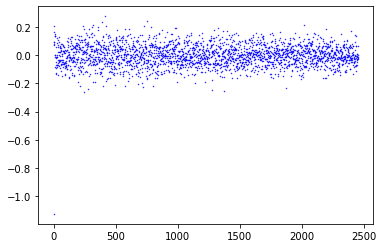

In [257]:
plt.scatter(range(2452), pca_train[100, :], s=0.2, c='b')
plt.show()

In [292]:
model = keras.Sequential()
model.add(keras.layers.Dense(units=1000, input_shape=(pca_train.shape[1], ), activation='relu'))
model.add(keras.layers.Dense(units=1000, activation='relu'))
model.add(keras.layers.Dense(units=4, activation='softmax'))

model.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])
# epochs：表示一共训练的周期， batch_size：把多少层组合成一个训练单元，多线程加速
history = model.fit(pca_train, x_label, epochs=10, batch_size=32)
model.summary()

Train on 7616 samples
Epoch 1/10
7616/7616 [==============================] - 28s 4ms/sample - loss: 0.3827 - accuracy: 0.7831
Epoch 2/10
7616/7616 [==============================] - 8s 1ms/sample - loss: 0.2711 - accuracy: 0.8243
Epoch 3/10
7616/7616 [==============================] - 9s 1ms/sample - loss: 0.2458 - accuracy: 0.8368
Epoch 4/10
7616/7616 [==============================] - 9s 1ms/sample - loss: 0.2441 - accuracy: 0.8392
Epoch 5/10
7616/7616 [==============================] - 9s 1ms/sample - loss: 0.2414 - accuracy: 0.8390
Epoch 6/10
7616/7616 [==============================] - 9s 1ms/sample - loss: 0.2392 - accuracy: 0.8452
Epoch 7/10
7616/7616 [==============================] - 9s 1ms/sample - loss: 0.2395 - accuracy: 0.8452
Epoch 8/10
7616/7616 [==============================] - 9s 1ms/sample - loss: 0.2391 - accuracy: 0.8430
Epoch 9/10
7616/7616 [==============================] - 9s 1ms/sample - loss: 0.2367 - accuracy: 0.8441
Epoch 10/10
7616/7616 [==================

In [294]:
result = model.predict(pca_test)

In [295]:
array = np.zeros((len(result), 1))
for i in range(len(result)):
    array[i] = np.argmax(result[i])
array

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [298]:
num4 = 0
for i in range(1000):
    if array[i, 0] == y_label[i, 0]:
        num4 += 1
num4   

801

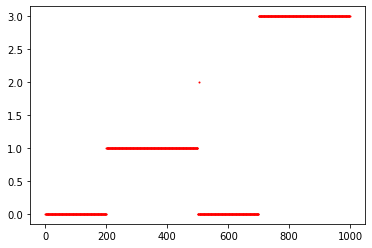

In [300]:
plt.scatter(range(1000), array.T, s=1, c='r')
plt.show()

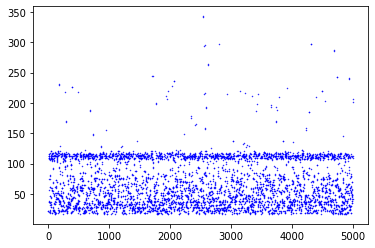

In [301]:
plt.scatter(range(5000), dataSet_Eu[1, :], s=0.2, c='b')
plt.show()

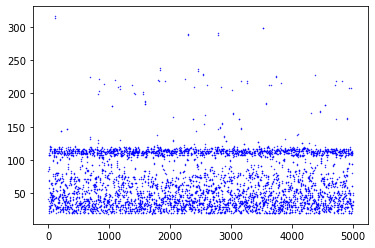

In [302]:
plt.scatter(range(5000), dataSet3[2, :], s=0.2, c='b')
plt.show()